<a href="https://colab.research.google.com/github/Mohamed981/Machine-Learning/blob/main/SER_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akram98","key":"0c937412328533cd929081f8c9607116"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!mkdir datasets

In [ ]:
cd ..

/content


In [ ]:
cd datasets

/content/datasets


In [ ]:
!kaggle competitions download -c tabular-playground-series-jul-2021

  0% 0.00/580k [00:00<?, ?B/s]
100% 580k/580k [00:00<00:00, 87.0MB/s]
  0% 0.00/151k [00:00<?, ?B/s]
100% 151k/151k [00:00<00:00, 48.9MB/s]
  0% 0.00/76.9k [00:00<?, ?B/s]
100% 76.9k/76.9k [00:00<00:00, 72.9MB/s]


In [ ]:
!kaggle datasets download -d dmitrybabko/speech-emotion-recognition-en/Crema

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!unzip speech-emotion-recognition-en.zip

Streaming output truncated to the last 5000 lines.
  inflating: Crema/1088_IWW_FEA_XX.wav  
  inflating: Crema/1088_IWW_HAP_XX.wav  
  inflating: Crema/1088_IWW_NEU_XX.wav  
  inflating: Crema/1088_IWW_SAD_XX.wav  
  inflating: Crema/1088_MTI_ANG_XX.wav  
  inflating: Crema/1088_MTI_DIS_XX.wav  
  inflating: Crema/1088_MTI_FEA_XX.wav  
  inflating: Crema/1088_MTI_HAP_XX.wav  
  inflating: Crema/1088_MTI_NEU_XX.wav  
  inflating: Crema/1088_MTI_SAD_XX.wav  
  inflating: Crema/1088_TAI_ANG_XX.wav  
  inflating: Crema/1088_TAI_DIS_XX.wav  
  inflating: Crema/1088_TAI_FEA_XX.wav  
  inflating: Crema/1088_TAI_HAP_XX.wav  
  inflating: Crema/1088_TAI_NEU_XX.wav  
  inflating: Crema/1088_TAI_SAD_XX.wav  
  inflating: Crema/1088_TIE_ANG_XX.wav  
  inflating: Crema/1088_TIE_DIS_XX.wav  
  inflating: Crema/1088_TIE_FEA_XX.wav  
  inflating: Crema/1088_TIE_HAP_XX.wav  
  inflating: Crema/1088_TIE_NEU_XX.wav  
  inflating: Crema/1088_TIE_SAD_XX.wav  
  inflating: Crema/1088_TSI_ANG_XX.wav  
  infl

In [ ]:
!gsutil cp -r Crema /content/drive/MyDrive/Last

Streaming output truncated to the last 5000 lines.
Copying file://Crema/1077_ITH_SAD_XX.wav...
Copying file://Crema/1074_DFA_SAD_XX.wav...
Copying file://Crema/1077_IWL_DIS_XX.wav...
Copying file://Crema/1006_DFA_HAP_XX.wav...
Copying file://Crema/1044_DFA_NEU_XX.wav...
Copying file://Crema/1084_IWW_SAD_XX.wav...
Copying file://Crema/1083_TSI_FEA_XX.wav...
Copying file://Crema/1048_IEO_DIS_LO.wav...
Copying file://Crema/1010_ITH_ANG_XX.wav...
Copying file://Crema/1016_IOM_HAP_XX.wav...
Copying file://Crema/1037_IWW_HAP_XX.wav...
Copying file://Crema/1086_IWL_DIS_XX.wav...
Copying file://Crema/1022_DFA_ANG_XX.wav...
Copying file://Crema/1046_TSI_SAD_XX.wav...
Copying file://Crema/1064_ITS_DIS_XX.wav...
Copying file://Crema/1076_ITH_SAD_XX.wav...
Copying file://Crema/1007_IWL_DIS_XX.wav...
Copying file://Crema/1054_IOM_HAP_XX.wav...
Copying file://Crema/1010_TSI_DIS_XX.wav...
Copying file://Crema/1025_IWL_HAP_XX.wav...
Copying file://Crema/1084_ITS_DIS_XX.wav...
Copying file://Crema/1006

In [ ]:
import os
import re

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Audio
from keras import layers
from keras import models
from keras import backend as K
import keras
from keras import regularizers
import tensorflow
# from tensorflow.keras.models import Model
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
import pickle
from tqdm import tqdm
import time

import itertools

In [ ]:
model = tf.keras.Sequential([
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            layers.ZeroPadding2D((3, 3)),
            ## Conv2D with 32 7x7 filters and stride of 1
            layers.Conv2D(512, kernel_size=5,strides=1 ),
            ## BatchNormalization for axis 3
            layers.BatchNormalization(axis=3),
            ## ReLU
            layers.ReLU(),
            ## Max Pooling 2D with default parameters
            layers.MaxPool2D(),
            ## Flatten layer
            layers.Flatten(),
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tf.keras.layers.Dense(1,activation='sigmoid')
            # YOUR CODE STARTS HERE
            
            
            # YOUR CODE ENDS HERE
        ])

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
pwd

'/content/datasets'

**Crema collecting**

In [ ]:
dir = "/content/drive/MyDrive/Last/Crema"
emotion_df = []
emotions=[]
for wav in os.listdir(dir):
    audio = wav.partition(".wav")[0].split("_")
    emotions.append(audio[2])
    if audio[2] == 'SAD':
        emotion_df.append(("sad", dir + "/" + wav))
    elif audio[2] == 'ANG':
        emotion_df.append(("angry", dir + "/" + wav))
    elif audio[2] == 'DIS':
        emotion_df.append(("disgust", dir + "/" + wav))
    elif audio[2] == 'FEA':
        emotion_df.append(("fear", dir + "/" + wav))
    elif audio[2] == 'HAP':
        emotion_df.append(("happy", dir + "/" + wav))
    elif audio[2] == 'NEU':
        emotion_df.append(("neutral", dir + "/" + wav))

emotions=np.unique(np.array([emotions]))

Crema_df = pd.DataFrame.from_dict(emotion_df)
Crema_df.rename(columns={1 : "Path", 0 : "Emotion"}, inplace=True)

Crema_df.head()

Emotion                                               Path
0    angry  /content/drive/MyDrive/Last/Crema/1047_IOM_ANG...
1  disgust  /content/drive/MyDrive/Last/Crema/1036_WSI_DIS...
2  disgust  /content/drive/MyDrive/Last/Crema/1029_TSI_DIS...
3  neutral  /content/drive/MyDrive/Last/Crema/1063_MTI_NEU...
4    happy  /content/drive/MyDrive/Last/Crema/1021_ITS_HAP...

In [ ]:
Crema_df.describe().T

count unique                                                top  freq
Emotion  7442      6                                            disgust  1271
Path     7442   7442  /content/drive/MyDrive/Last/Crema/1056_IEO_FEA...     1

**Plotting Samples**

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

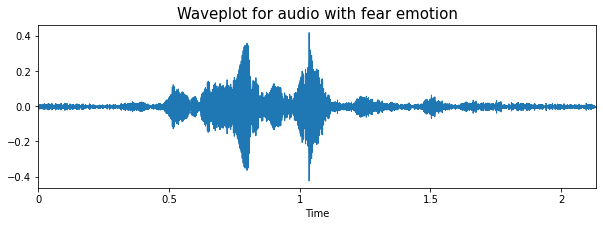

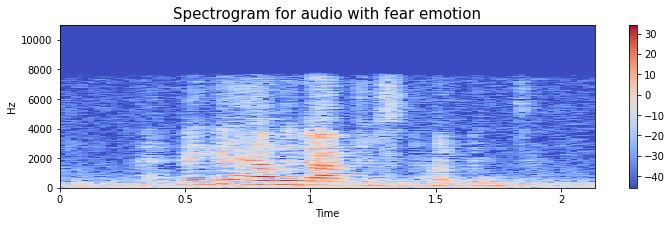

In [ ]:
emotion='fear'
path = np.array(Crema_df.Path[Crema_df.Emotion==emotion])[3]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


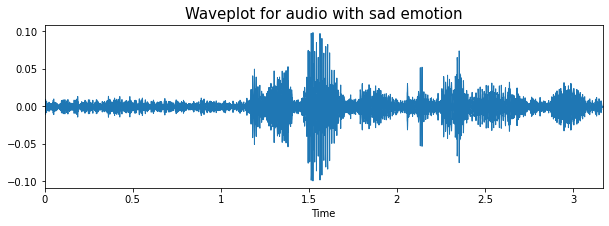

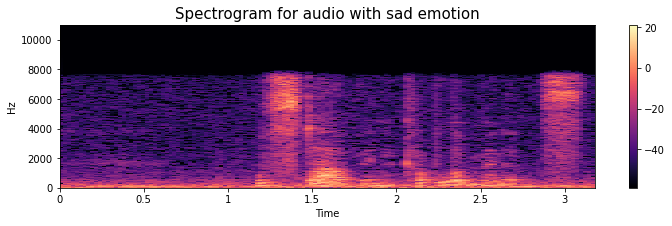

In [ ]:
emotion='sad'
path = np.array(Crema_df.Path[Crema_df.Emotion==emotion])[3]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)



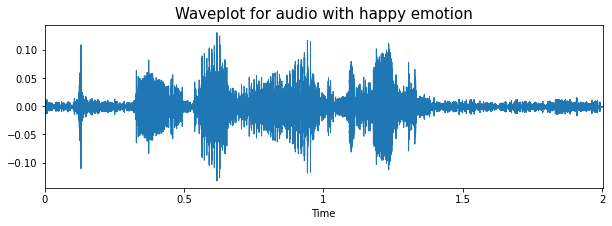

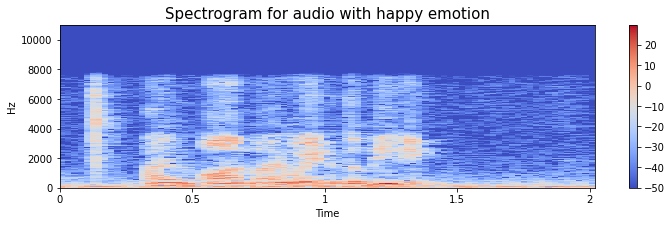

In [ ]:
emotion='happy'
path = np.array(Crema_df.Path[Crema_df.Emotion==emotion])[3]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

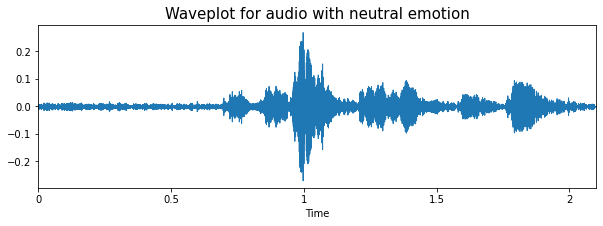

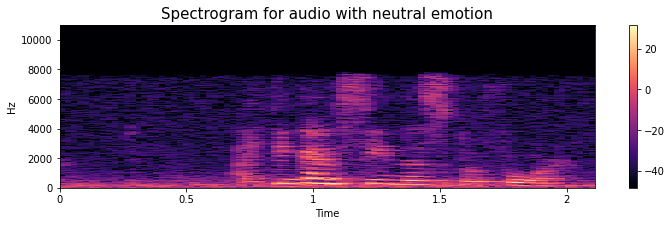

In [ ]:
emotion='neutral'
path = np.array(Crema_df.Path[Crema_df.Emotion==emotion])[3]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

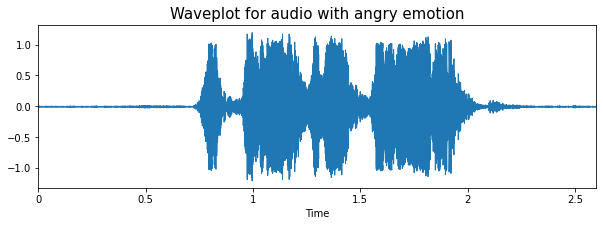

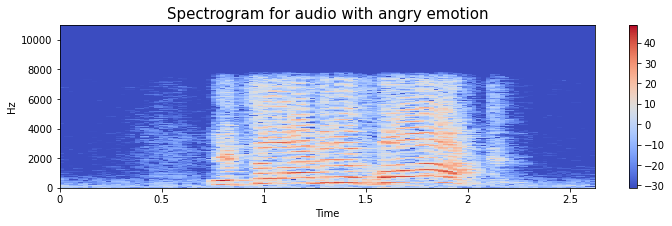

In [ ]:
emotion='angry'
path = np.array(Crema_df.Path[Crema_df.Emotion==emotion])[3]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

22050


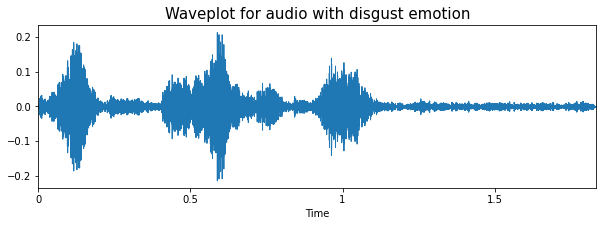

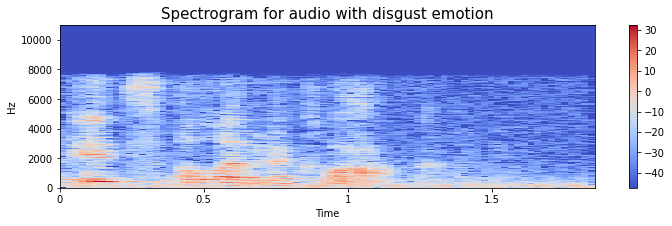

In [ ]:
emotion='disgust'
path = np.array(Crema_df.Path[Crema_df.Emotion==emotion])[3]
data, sampling_rate = librosa.load(path)
print(sampling_rate)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

**Feature space**

In [ ]:
def features(data):
  temp=np.zeros((1,1))
  #ZCR
  zcr=librosa.feature.zero_crossing_rate(data) 
  #ENERGY
  energy = np.array([np.sum(np.power(np.abs(data[hop:hop+data.shape[0]]), 2)) for hop in range(0, data.shape[0], 300)])  
  energy= energy.reshape(1,energy.shape[0])
  #Normalizing energy
  norm=np.linalg.norm(energy)  
  energy1 = energy/norm 
  #Appending feature space in one row for each sample
  temp=np.hstack((temp,zcr,energy1))
  temp=np.delete(temp,0)
  print(len(temp))
  return temp

**Augmentation**

In [ ]:
def Augmentation(data,sampling_rate):
  rate = np.random.random() * .075
  pitch_factor=np.random.random() * .7
  #Adding noise
  noise_amp = rate*np.random.uniform()*np.amax(data)
  noise = data + noise_amp*np.random.normal(size=data.shape[0])
  #Adding pitch
  pitch=librosa.effects.pitch_shift(data, sampling_rate, .7)

  #Extracting feature spaces
  noise=features(noise)  #Noise
  pitch=features(pitch)  #Pitch
  data=features(data)    #Input Sample

  noise= noise.reshape(1,noise.shape[0])
  pitch= pitch.reshape(1,pitch.shape[0])
  data= data.reshape(1,data.shape[0])

  #Stacking the extracted feature space
  Augmented=data
  Augmented = np.vstack((Augmented, noise)) 
  Augmented = np.vstack((Augmented, pitch)) 
  return Augmented

**Data extraction**

In [ ]:
train=[]
train_labels=[]
test=[]
test_labels=[]
for path, emotion, ind in zip(Crema_df.Path, Crema_df.Emotion, tqdm(range(5210))):
  #Cutting first 0.5 seconds
  y, sr = librosa.load(path,offset=.5)  
  #Augmenting and extracting feature space
  temp= Augmentation(y,sr)  
  for i in temp:
    train_labels.append(emotion)
    train.append(i)
with open('rightData_train.pickle', 'wb') as f:
      pickle.dump((train, train_labels), f)

for path, emotion, ind in zip(Crema_df.Path, Crema_df.Emotion, tqdm(range(5210,7442))):
  #Cutting first 0.5 seconds
  y, sr = librosa.load(path,offset=.5)  
  #Augmenting and extracting feature space
  temp= features(y)  
  test_labels.append(emotion)
  test.append(temp)

#Storing extracted data
with open('rightData_test.pickle', 'wb') as f:
        pickle.dump((test, test_labels), f)


  0%|          | 1/5210 [00:00<16:49,  5.16it/s]

208
208
208



  0%|          | 2/5210 [00:00<21:41,  4.00it/s]

312
312
312



  0%|          | 3/5210 [00:00<19:44,  4.40it/s]

187
187
187



  0%|          | 4/5210 [00:00<20:05,  4.32it/s]

227
227
227



  0%|          | 5/5210 [00:01<21:11,  4.09it/s]

257
257
257



  0%|          | 6/5210 [00:01<21:30,  4.03it/s]

243
243
243



  0%|          | 7/5210 [00:01<21:16,  4.08it/s]

227
227
227
351
351



  0%|          | 9/5210 [00:02<22:28,  3.86it/s]

351
160
160
160



  0%|          | 10/5210 [00:02<24:27,  3.54it/s]

289
289
289
367
367



  0%|          | 12/5210 [00:03<24:55,  3.48it/s]

367
165
165
165



  0%|          | 13/5210 [00:03<21:07,  4.10it/s]

153
153
153



  0%|          | 14/5210 [00:03<23:16,  3.72it/s]

289
289
289
429
429



  0%|          | 15/5210 [00:04<32:37,  2.65it/s]

429
378
378



  0%|          | 16/5210 [00:04<36:11,  2.39it/s]

378
249



  0%|          | 17/5210 [00:05<32:20,  2.68it/s]

249
249



  0%|          | 18/5210 [00:05<29:16,  2.96it/s]

238
238
238



  0%|          | 19/5210 [00:05<28:20,  3.05it/s]

273
273
273



  0%|          | 20/5210 [00:06<28:26,  3.04it/s]

281
281
281



  0%|          | 21/5210 [00:06<26:24,  3.28it/s]

235
235
235



  0%|          | 22/5210 [00:06<28:46,  3.00it/s]

320
320
320



  0%|          | 23/5210 [00:06<23:39,  3.65it/s]

153
153
153
208



  0%|          | 24/5210 [00:07<21:58,  3.93it/s]

208
208
235



  0%|          | 25/5210 [00:07<21:45,  3.97it/s]

235
235



  0%|          | 26/5210 [00:07<23:01,  3.75it/s]

262
262
262



  1%|          | 27/5210 [00:07<20:45,  4.16it/s]

187
187
187



  1%|          | 28/5210 [00:08<24:49,  3.48it/s]

320
320
320



  1%|          | 29/5210 [00:08<25:39,  3.37it/s]

278
278
278



  1%|          | 30/5210 [00:08<22:41,  3.81it/s]

192
192
192
425
425



  1%|          | 31/5210 [00:09<32:09,  2.68it/s]

425
235
235



  1%|          | 32/5210 [00:09<28:58,  2.98it/s]

235
406
406



  1%|          | 33/5210 [00:10<35:37,  2.42it/s]

406
249



  1%|          | 34/5210 [00:10<32:06,  2.69it/s]

249
249
187



  1%|          | 35/5210 [00:10<27:04,  3.19it/s]

187
187
219



  1%|          | 36/5210 [00:10<24:41,  3.49it/s]

219
219
176
176



  1%|          | 37/5210 [00:11<21:36,  3.99it/s]

176
281



  1%|          | 38/5210 [00:11<23:35,  3.65it/s]

281
281



  1%|          | 39/5210 [00:11<22:04,  3.91it/s]

208
208
208



  1%|          | 40/5210 [00:11<22:10,  3.89it/s]

238
238
238



  1%|          | 41/5210 [00:12<19:42,  4.37it/s]

165
165
165
195



  1%|          | 43/5210 [00:12<17:21,  4.96it/s]

195
195
172
172
172



  1%|          | 44/5210 [00:12<20:49,  4.14it/s]

281
281
281



  1%|          | 45/5210 [00:12<18:04,  4.76it/s]

149
149
149
176
176



  1%|          | 47/5210 [00:13<16:27,  5.23it/s]

176
184
184
184



  1%|          | 48/5210 [00:13<18:34,  4.63it/s]

249
249
249



  1%|          | 49/5210 [00:13<20:26,  4.21it/s]

254
254
254



  1%|          | 51/5210 [00:14<16:35,  5.18it/s]

160
160
160
157
157
157



  1%|          | 52/5210 [00:14<21:25,  4.01it/s]

312
312
312



  1%|          | 53/5210 [00:14<20:47,  4.14it/s]

215
215
215



  1%|          | 54/5210 [00:14<21:45,  3.95it/s]

254
254
254



  1%|          | 55/5210 [00:15<22:01,  3.90it/s]

246
246
246



  1%|          | 56/5210 [00:15<20:16,  4.24it/s]

184
184
184



  1%|          | 57/5210 [00:15<24:29,  3.51it/s]

320
320
320



  1%|          | 58/5210 [00:15<21:47,  3.94it/s]

180
180
180
211



  1%|          | 59/5210 [00:16<20:42,  4.15it/s]

211
211
184
184



  1%|          | 61/5210 [00:16<17:08,  5.01it/s]

184
157
157
157



  1%|          | 62/5210 [00:16<19:27,  4.41it/s]

249
249
249
351
351



  1%|          | 63/5210 [00:17<25:28,  3.37it/s]

351
265



  1%|          | 64/5210 [00:17<25:37,  3.35it/s]

265
265



  1%|          | 65/5210 [00:17<25:13,  3.40it/s]

249
249
249



  1%|▏         | 66/5210 [00:18<22:10,  3.87it/s]

180
180
180



  1%|▏         | 67/5210 [00:18<21:56,  3.91it/s]

219
219
219



  1%|▏         | 68/5210 [00:18<21:47,  3.93it/s]

235
235
235



  1%|▏         | 69/5210 [00:18<22:27,  3.81it/s]

249
249
249
421
421



  1%|▏         | 70/5210 [00:19<31:33,  2.71it/s]

421



  1%|▏         | 71/5210 [00:19<31:24,  2.73it/s]

297
297
297



  1%|▏         | 72/5210 [00:20<29:18,  2.92it/s]

249
249
249



  1%|▏         | 73/5210 [00:20<24:50,  3.45it/s]

172
172
172



  1%|▏         | 74/5210 [00:20<25:22,  3.37it/s]

273
273
273



  1%|▏         | 75/5210 [00:20<23:28,  3.65it/s]

208
208
208



  1%|▏         | 76/5210 [00:21<25:23,  3.37it/s]

292
292
292



  1%|▏         | 77/5210 [00:21<22:48,  3.75it/s]

195
195
195



  1%|▏         | 78/5210 [00:21<22:55,  3.73it/s]

243
243
243



  2%|▏         | 79/5210 [00:21<22:11,  3.85it/s]

222
222
222



  2%|▏         | 80/5210 [00:22<20:09,  4.24it/s]

184
184
184
165
165



  2%|▏         | 82/5210 [00:22<16:36,  5.14it/s]

165
172
172
172



  2%|▏         | 83/5210 [00:22<19:15,  4.44it/s]

262
262
262



  2%|▏         | 84/5210 [00:22<21:31,  3.97it/s]

273
273
273



  2%|▏         | 85/5210 [00:23<19:19,  4.42it/s]

176
176
176



  2%|▏         | 86/5210 [00:23<20:07,  4.24it/s]

243
243
243
133
133



  2%|▏         | 87/5210 [00:23<17:10,  4.97it/s]

133
222
222



  2%|▏         | 89/5210 [00:23<16:22,  5.21it/s]

222
160
160
160



  2%|▏         | 90/5210 [00:24<15:40,  5.44it/s]

172
172
172
471
471



  2%|▏         | 91/5210 [00:24<30:19,  2.81it/s]

471
249



  2%|▏         | 92/5210 [00:25<28:24,  3.00it/s]

249
249
215



  2%|▏         | 93/5210 [00:25<25:36,  3.33it/s]

215
215
180
180



  2%|▏         | 95/5210 [00:25<19:34,  4.36it/s]

180
168
168
168



  2%|▏         | 96/5210 [00:25<22:05,  3.86it/s]

281
281
281



  2%|▏         | 97/5210 [00:26<20:20,  4.19it/s]

195
195
195
413
413



  2%|▏         | 98/5210 [00:26<29:45,  2.86it/s]

413
208
208



  2%|▏         | 99/5210 [00:26<26:15,  3.24it/s]

208



  2%|▏         | 100/5210 [00:27<28:19,  3.01it/s]

312
312
312



  2%|▏         | 101/5210 [00:27<28:12,  3.02it/s]

281
281
281



  2%|▏         | 102/5210 [00:27<26:55,  3.16it/s]

249
249
249



  2%|▏         | 103/5210 [00:28<28:29,  2.99it/s]

312
312
312



  2%|▏         | 104/5210 [00:28<30:01,  2.83it/s]

316
316
316



  2%|▏         | 105/5210 [00:29<28:15,  3.01it/s]

262
262
262



  2%|▏         | 106/5210 [00:29<26:18,  3.23it/s]

243
243
243



  2%|▏         | 107/5210 [00:29<22:18,  3.81it/s]

157
157
157



  2%|▏         | 108/5210 [00:29<22:08,  3.84it/s]

227
227
227



  2%|▏         | 109/5210 [00:30<25:57,  3.28it/s]

312
312
312



  2%|▏         | 110/5210 [00:30<25:46,  3.30it/s]

257
257
257



  2%|▏         | 111/5210 [00:30<24:22,  3.49it/s]

222
222
222



  2%|▏         | 112/5210 [00:30<26:05,  3.26it/s]

285
285
285



  2%|▏         | 113/5210 [00:31<23:39,  3.59it/s]

200
200
200



  2%|▏         | 114/5210 [00:31<22:53,  3.71it/s]

227
227
227



  2%|▏         | 115/5210 [00:31<22:21,  3.80it/s]

227
227
227



  2%|▏         | 116/5210 [00:31<22:56,  3.70it/s]

246
246
246



  2%|▏         | 117/5210 [00:32<20:58,  4.05it/s]

187
187
187



  2%|▏         | 118/5210 [00:32<20:49,  4.07it/s]

219
219
219



  2%|▏         | 119/5210 [00:32<22:09,  3.83it/s]

254
254
254



  2%|▏         | 120/5210 [00:32<22:51,  3.71it/s]

246
246
246



  2%|▏         | 121/5210 [00:33<22:40,  3.74it/s]

230
230
230



  2%|▏         | 122/5210 [00:33<25:54,  3.27it/s]

308
308
308



  2%|▏         | 123/5210 [00:33<24:22,  3.48it/s]

219
219
219



  2%|▏         | 124/5210 [00:34<23:14,  3.65it/s]

219
219
219



  2%|▏         | 125/5210 [00:34<21:55,  3.87it/s]

208
208
208



  2%|▏         | 126/5210 [00:34<20:13,  4.19it/s]

187
187
187



  2%|▏         | 127/5210 [00:34<20:43,  4.09it/s]

222
222
222
141



  2%|▏         | 128/5210 [00:34<17:54,  4.73it/s]

141
141



  2%|▏         | 129/5210 [00:35<21:18,  3.98it/s]

281
281
281



  2%|▏         | 130/5210 [00:35<20:43,  4.08it/s]

209
209
209



  3%|▎         | 131/5210 [00:35<19:52,  4.26it/s]

200
200
200
102
102
102



  3%|▎         | 133/5210 [00:36<17:30,  4.83it/s]

192
192
192



  3%|▎         | 134/5210 [00:36<20:01,  4.23it/s]

257
257
257



  3%|▎         | 135/5210 [00:36<24:22,  3.47it/s]

316
316
316



  3%|▎         | 136/5210 [00:37<24:14,  3.49it/s]

243
243
243



  3%|▎         | 137/5210 [00:37<24:03,  3.52it/s]

246
246
246



  3%|▎         | 138/5210 [00:37<21:38,  3.91it/s]

184
184
184



  3%|▎         | 139/5210 [00:37<22:14,  3.80it/s]

243
243
243



  3%|▎         | 140/5210 [00:38<23:45,  3.56it/s]

265
265
265



  3%|▎         | 141/5210 [00:38<22:15,  3.79it/s]

208
208
208



  3%|▎         | 142/5210 [00:38<24:13,  3.49it/s]

278
278
278



  3%|▎         | 143/5210 [00:38<21:35,  3.91it/s]

180
180
180



  3%|▎         | 144/5210 [00:39<25:08,  3.36it/s]

308
308
308



  3%|▎         | 145/5210 [00:39<21:54,  3.85it/s]

168
168
168
378
378



  3%|▎         | 146/5210 [00:39<29:25,  2.87it/s]

378
219
219



  3%|▎         | 147/5210 [00:40<26:38,  3.17it/s]

219
195
195



  3%|▎         | 148/5210 [00:40<23:50,  3.54it/s]

195
208
208



  3%|▎         | 149/5210 [00:40<22:18,  3.78it/s]

208
511
511



  3%|▎         | 150/5210 [00:41<38:52,  2.17it/s]

511
246



  3%|▎         | 151/5210 [00:41<34:51,  2.42it/s]

246
246
172



  3%|▎         | 152/5210 [00:42<29:10,  2.89it/s]

172
172
398
398



  3%|▎         | 154/5210 [00:42<29:06,  2.90it/s]

398
165
165
165



  3%|▎         | 155/5210 [00:43<26:39,  3.16it/s]

227
227
227



  3%|▎         | 156/5210 [00:43<27:17,  3.09it/s]

281
281
281



  3%|▎         | 157/5210 [00:43<24:45,  3.40it/s]

211
211
211



  3%|▎         | 158/5210 [00:43<23:07,  3.64it/s]

211
211
211



  3%|▎         | 159/5210 [00:44<22:19,  3.77it/s]

215
215
215



  3%|▎         | 160/5210 [00:44<20:37,  4.08it/s]

192
192
192



  3%|▎         | 161/5210 [00:44<23:40,  3.55it/s]

292
292
292



  3%|▎         | 162/5210 [00:44<20:38,  4.08it/s]

165
165
165
176



  3%|▎         | 163/5210 [00:44<19:08,  4.39it/s]

176
176



  3%|▎         | 164/5210 [00:45<20:45,  4.05it/s]

249
249
249



  3%|▎         | 165/5210 [00:45<25:07,  3.35it/s]

320
320
320



  3%|▎         | 166/5210 [00:45<22:35,  3.72it/s]

187
187
187



  3%|▎         | 167/5210 [00:46<25:18,  3.32it/s]

292
292
292



  3%|▎         | 168/5210 [00:46<22:47,  3.69it/s]

192
192
192
153
153



  3%|▎         | 169/5210 [00:46<19:59,  4.20it/s]

153
200
200



  3%|▎         | 171/5210 [00:47<18:30,  4.54it/s]

200
184
184
184



  3%|▎         | 172/5210 [00:47<19:09,  4.38it/s]

219
219
219
160



  3%|▎         | 173/5210 [00:47<17:25,  4.82it/s]

160
160



  3%|▎         | 174/5210 [00:47<20:40,  4.06it/s]

278
278
278



  3%|▎         | 175/5210 [00:48<24:45,  3.39it/s]

305
305
305



  3%|▎         | 176/5210 [00:48<25:22,  3.31it/s]

265
265
265



  3%|▎         | 177/5210 [00:48<26:04,  3.22it/s]

273
273
273



  3%|▎         | 178/5210 [00:48<21:27,  3.91it/s]

129
129
129
227



  3%|▎         | 179/5210 [00:49<21:22,  3.92it/s]

227
227



  3%|▎         | 180/5210 [00:49<22:18,  3.76it/s]

246
246
246



  3%|▎         | 181/5210 [00:49<26:03,  3.22it/s]

312
312
312



  3%|▎         | 182/5210 [00:50<22:49,  3.67it/s]

172
172
172
208



  4%|▎         | 183/5210 [00:50<21:39,  3.87it/s]

208
208



  4%|▎         | 184/5210 [00:50<23:04,  3.63it/s]

262
262
262



  4%|▎         | 185/5210 [00:50<23:01,  3.64it/s]

235
235
235



  4%|▎         | 186/5210 [00:51<26:22,  3.17it/s]

308
308
308



  4%|▎         | 187/5210 [00:51<25:23,  3.30it/s]

235
235
235



  4%|▎         | 188/5210 [00:51<24:35,  3.40it/s]

235
235
235



  4%|▎         | 189/5210 [00:52<26:07,  3.20it/s]

285
285
285



  4%|▎         | 190/5210 [00:52<26:49,  3.12it/s]

278
278
278



  4%|▎         | 191/5210 [00:52<23:44,  3.52it/s]

187
187
187
192



  4%|▎         | 192/5210 [00:52<21:43,  3.85it/s]

192
192
340
340



  4%|▎         | 193/5210 [00:53<27:00,  3.10it/s]

340
208
208



  4%|▎         | 195/5210 [00:53<21:49,  3.83it/s]

208
180
180
180



  4%|▍         | 196/5210 [00:54<23:06,  3.62it/s]

262
262
262



  4%|▍         | 197/5210 [00:54<22:04,  3.78it/s]

215
215
215



  4%|▍         | 198/5210 [00:54<21:33,  3.88it/s]

222
222
222



  4%|▍         | 199/5210 [00:55<24:28,  3.41it/s]

305
305
305



  4%|▍         | 200/5210 [00:55<28:08,  2.97it/s]

335
335
335



  4%|▍         | 201/5210 [00:55<26:21,  3.17it/s]

246
246
246
129



  4%|▍         | 203/5210 [00:56<19:15,  4.33it/s]

129
129
176
176
176



  4%|▍         | 204/5210 [00:56<20:35,  4.05it/s]

249
249
249



  4%|▍         | 205/5210 [00:56<19:11,  4.35it/s]

195
195
195



  4%|▍         | 206/5210 [00:56<18:38,  4.47it/s]

200
200
200
203



  4%|▍         | 207/5210 [00:56<18:13,  4.58it/s]

203
203



  4%|▍         | 208/5210 [00:57<20:44,  4.02it/s]

270
270
270



  4%|▍         | 209/5210 [00:57<23:38,  3.52it/s]

305
305
305



  4%|▍         | 210/5210 [00:57<26:03,  3.20it/s]

308
308
308



  4%|▍         | 211/5210 [00:58<26:37,  3.13it/s]

281
281
281
371
371



  4%|▍         | 212/5210 [00:58<31:14,  2.67it/s]


371
203
203
203


  4%|▍         | 214/5210 [00:59<28:16,  2.94it/s]

308
308
308



  4%|▍         | 215/5210 [00:59<23:07,  3.60it/s]

141
141
141



  4%|▍         | 216/5210 [00:59<25:32,  3.26it/s]

308
308
308



  4%|▍         | 217/5210 [01:00<25:48,  3.22it/s]

273
273
273



  4%|▍         | 218/5210 [01:00<21:56,  3.79it/s]

160
160
160
195



  4%|▍         | 219/5210 [01:00<20:23,  4.08it/s]

195
195
195
195



  4%|▍         | 221/5210 [01:00<17:48,  4.67it/s]

195
184
184
184



  4%|▍         | 222/5210 [01:01<19:33,  4.25it/s]

257
257
257



  4%|▍         | 224/5210 [01:01<15:00,  5.54it/s]

137
137
137
145
145
145



  4%|▍         | 225/5210 [01:01<14:16,  5.82it/s]

160
160
160
192



  4%|▍         | 226/5210 [01:01<14:53,  5.58it/s]

192
192



  4%|▍         | 227/5210 [01:02<18:53,  4.40it/s]

289
289
289



  4%|▍         | 228/5210 [01:02<19:26,  4.27it/s]

230
230
230



  4%|▍         | 229/5210 [01:02<20:00,  4.15it/s]

227
227
227



  4%|▍         | 230/5210 [01:03<22:29,  3.69it/s]

285
285
285



  4%|▍         | 231/5210 [01:03<21:48,  3.80it/s]

222
222
222



  4%|▍         | 232/5210 [01:03<21:54,  3.79it/s]

249
249
249



  4%|▍         | 233/5210 [01:03<20:49,  3.98it/s]

215
215
215



  4%|▍         | 234/5210 [01:04<22:44,  3.65it/s]

285
285
285



  5%|▍         | 235/5210 [01:04<20:41,  4.01it/s]

187
187
187
184



  5%|▍         | 236/5210 [01:04<18:58,  4.37it/s]

184
184
254



  5%|▍         | 237/5210 [01:04<20:16,  4.09it/s]

254
254
511
511



  5%|▍         | 238/5210 [01:05<35:31,  2.33it/s]

511
209
209



  5%|▍         | 239/5210 [01:05<30:06,  2.75it/s]

209
227
227



  5%|▍         | 240/5210 [01:06<27:01,  3.07it/s]

227
246



  5%|▍         | 241/5210 [01:06<25:35,  3.24it/s]

246
246



  5%|▍         | 242/5210 [01:06<24:44,  3.35it/s]

249
249
249



  5%|▍         | 243/5210 [01:06<25:17,  3.27it/s]

278
278
278



  5%|▍         | 244/5210 [01:07<22:22,  3.70it/s]

187
187
187



  5%|▍         | 245/5210 [01:07<23:48,  3.48it/s]

281
281
281



  5%|▍         | 246/5210 [01:07<25:00,  3.31it/s]

289
289
289



  5%|▍         | 247/5210 [01:07<22:13,  3.72it/s]

187
187
187



  5%|▍         | 248/5210 [01:08<25:19,  3.26it/s]

316
316
316



  5%|▍         | 249/5210 [01:08<25:51,  3.20it/s]

273
273
273
367
367



  5%|▍         | 250/5210 [01:09<30:30,  2.71it/s]

367



  5%|▍         | 251/5210 [01:09<30:34,  2.70it/s]

308
308
308



  5%|▍         | 252/5210 [01:09<25:46,  3.21it/s]

184
184
184
192



  5%|▍         | 253/5210 [01:09<22:51,  3.61it/s]

192
192
208
208



  5%|▍         | 255/5210 [01:10<18:26,  4.48it/s]

208
153
153
153



  5%|▍         | 256/5210 [01:10<17:34,  4.70it/s]

192
192
192
386
386



  5%|▍         | 257/5210 [01:11<25:27,  3.24it/s]

386
281



  5%|▍         | 258/5210 [01:11<25:59,  3.18it/s]

281
281



  5%|▍         | 259/5210 [01:11<24:01,  3.44it/s]

227
227
227



  5%|▍         | 260/5210 [01:11<22:07,  3.73it/s]

211
211
211



  5%|▌         | 261/5210 [01:12<20:51,  3.95it/s]

211
211
211



  5%|▌         | 262/5210 [01:12<21:23,  3.86it/s]

254
254
254



  5%|▌         | 263/5210 [01:12<22:47,  3.62it/s]

273
273
273



  5%|▌         | 264/5210 [01:12<22:02,  3.74it/s]

235
235
235



  5%|▌         | 265/5210 [01:13<22:20,  3.69it/s]

254
254
254



  5%|▌         | 266/5210 [01:13<19:50,  4.15it/s]

180
180
180
180



  5%|▌         | 268/5210 [01:13<16:21,  5.03it/s]

180
180
153
153
153



  5%|▌         | 269/5210 [01:13<18:11,  4.53it/s]

254
254
254



  5%|▌         | 270/5210 [01:14<16:53,  4.87it/s]

176
176
176
168
168



  5%|▌         | 272/5210 [01:14<15:30,  5.30it/s]

168
187
187
187



  5%|▌         | 273/5210 [01:14<16:07,  5.10it/s]

208
208
208



  5%|▌         | 274/5210 [01:14<17:19,  4.75it/s]

230
230
230
168



  5%|▌         | 276/5210 [01:15<14:35,  5.64it/s]

168
168
149
149
149



  5%|▌         | 277/5210 [01:15<15:35,  5.27it/s]

208
208
208


347
347
347


  5%|▌         | 279/5210 [01:16<23:09,  3.55it/s]

285
285
285



  5%|▌         | 280/5210 [01:16<23:05,  3.56it/s]

246
246
246



  5%|▌         | 281/5210 [01:16<23:19,  3.52it/s]

262
262
262



  5%|▌         | 282/5210 [01:16<21:16,  3.86it/s]

192
192
192



  5%|▌         | 283/5210 [01:17<23:28,  3.50it/s]

292
292
292



  5%|▌         | 284/5210 [01:17<22:18,  3.68it/s]

222
222
222



  5%|▌         | 285/5210 [01:17<22:22,  3.67it/s]

254
254
254
382
382



  5%|▌         | 286/5210 [01:18<28:48,  2.85it/s]

382
265



  6%|▌         | 287/5210 [01:18<27:33,  2.98it/s]

265
265
187



  6%|▌         | 288/5210 [01:18<23:52,  3.44it/s]

187
187
187
187



  6%|▌         | 290/5210 [01:19<19:41,  4.17it/s]

187
200
200
200



  6%|▌         | 291/5210 [01:19<19:06,  4.29it/s]

208
208
208



  6%|▌         | 292/5210 [01:19<18:12,  4.50it/s]

184
184
184



  6%|▌         | 293/5210 [01:19<20:58,  3.91it/s]

285
285
285



  6%|▌         | 294/5210 [01:20<20:56,  3.91it/s]

235
235
235
382
382



  6%|▌         | 295/5210 [01:20<27:55,  2.93it/s]

382
235
235



  6%|▌         | 296/5210 [01:20<25:40,  3.19it/s]

235
289



  6%|▌         | 297/5210 [01:21<26:21,  3.11it/s]

289
289



  6%|▌         | 298/5210 [01:21<24:22,  3.36it/s]

219
219
219



  6%|▌         | 299/5210 [01:21<25:33,  3.20it/s]

289
289
289



  6%|▌         | 300/5210 [01:22<23:50,  3.43it/s]

227
227
227
145



  6%|▌         | 301/5210 [01:22<20:14,  4.04it/s]

145
145
246



  6%|▌         | 302/5210 [01:22<20:50,  3.93it/s]

246
246



  6%|▌         | 303/5210 [01:22<21:31,  3.80it/s]

249
249
249



  6%|▌         | 304/5210 [01:23<20:40,  3.95it/s]

215
215
215



  6%|▌         | 305/5210 [01:23<21:28,  3.81it/s]

254
254
254



  6%|▌         | 306/5210 [01:23<19:14,  4.25it/s]

168
168
168



  6%|▌         | 307/5210 [01:23<21:51,  3.74it/s]

289
289
289



  6%|▌         | 308/5210 [01:24<22:06,  3.69it/s]

246
246
246



  6%|▌         | 309/5210 [01:24<22:39,  3.60it/s]

257
257
257



  6%|▌         | 310/5210 [01:24<24:13,  3.37it/s]

281
281
281



  6%|▌         | 311/5210 [01:24<21:57,  3.72it/s]

200
200
200
184



  6%|▌         | 312/5210 [01:25<19:56,  4.09it/s]

184
184
230



  6%|▌         | 313/5210 [01:25<20:05,  4.06it/s]

230
230



  6%|▌         | 314/5210 [01:25<22:16,  3.66it/s]

285
285
285



  6%|▌         | 315/5210 [01:26<21:52,  3.73it/s]

235
235
235



  6%|▌         | 316/5210 [01:26<22:02,  3.70it/s]

249
249
249



  6%|▌         | 317/5210 [01:26<26:23,  3.09it/s]

335
335
335



  6%|▌         | 318/5210 [01:26<24:38,  3.31it/s]

230
230
230



  6%|▌         | 319/5210 [01:27<23:25,  3.48it/s]

230
230
230
145



  6%|▌         | 320/5210 [01:27<19:54,  4.09it/s]

145
145
215



  6%|▌         | 321/5210 [01:27<19:46,  4.12it/s]

215
215



  6%|▌         | 322/5210 [01:27<21:28,  3.79it/s]

270
270
270



  6%|▌         | 323/5210 [01:28<23:17,  3.50it/s]

289
289
289



  6%|▌         | 324/5210 [01:28<26:36,  3.06it/s]

328
328
328
351
351



  6%|▌         | 325/5210 [01:29<29:56,  2.72it/s]

351
230
230



  6%|▋         | 326/5210 [01:29<27:04,  3.01it/s]

230
219
219



  6%|▋         | 328/5210 [01:29<21:55,  3.71it/s]

219
187
187
187



  6%|▋         | 329/5210 [01:30<21:35,  3.77it/s]

238
238
238
363
363



  6%|▋         | 330/5210 [01:30<27:22,  2.97it/s]

363



  6%|▋         | 331/5210 [01:30<28:36,  2.84it/s]

312
312
312



  6%|▋         | 332/5210 [01:31<25:07,  3.24it/s]

209
209
209



  6%|▋         | 333/5210 [01:31<24:28,  3.32it/s]

246
246
246



  6%|▋         | 334/5210 [01:31<21:02,  3.86it/s]

157
157
157



  6%|▋         | 335/5210 [01:31<21:10,  3.84it/s]

227
227
227
363
363



  6%|▋         | 337/5210 [01:32<23:38,  3.43it/s]

363
192
192
192



  6%|▋         | 338/5210 [01:32<21:49,  3.72it/s]

209
209
209



  7%|▋         | 339/5210 [01:33<24:15,  3.35it/s]

300
300
300



  7%|▋         | 340/5210 [01:33<26:37,  3.05it/s]

316
316
316



  7%|▋         | 341/5210 [01:33<22:57,  3.53it/s]

176
176
176



  7%|▋         | 342/5210 [01:34<22:07,  3.67it/s]

227
227
227



  7%|▋         | 343/5210 [01:34<20:20,  3.99it/s]

192
192
192
168



  7%|▋         | 344/5210 [01:34<18:14,  4.45it/s]

168
168
249



  7%|▋         | 345/5210 [01:34<19:35,  4.14it/s]

249
249



  7%|▋         | 346/5210 [01:34<22:03,  3.68it/s]

289
289
289



  7%|▋         | 347/5210 [01:35<25:47,  3.14it/s]

328
328
328



  7%|▋         | 348/5210 [01:35<21:52,  3.71it/s]

157
157
157



  7%|▋         | 349/5210 [01:35<24:12,  3.35it/s]

289
289
289



  7%|▋         | 350/5210 [01:36<21:22,  3.79it/s]

172
172
172



  7%|▋         | 351/5210 [01:36<20:25,  3.97it/s]

211
211
211



  7%|▋         | 352/5210 [01:36<20:43,  3.91it/s]

238
238
238



  7%|▋         | 353/5210 [01:36<23:28,  3.45it/s]

289
289
289



  7%|▋         | 354/5210 [01:37<23:20,  3.47it/s]

238
238
238



  7%|▋         | 355/5210 [01:37<23:24,  3.46it/s]

246
246
246



  7%|▋         | 356/5210 [01:37<24:02,  3.36it/s]

254
254
254



  7%|▋         | 357/5210 [01:38<25:21,  3.19it/s]

281
281
281



  7%|▋         | 358/5210 [01:38<22:29,  3.60it/s]

184
184
184



  7%|▋         | 359/5210 [01:38<23:50,  3.39it/s]

262
262
262



  7%|▋         | 360/5210 [01:38<20:33,  3.93it/s]

149
149
149



  7%|▋         | 361/5210 [01:39<23:35,  3.43it/s]

292
292
292



  7%|▋         | 362/5210 [01:39<23:10,  3.49it/s]

238
238
238



  7%|▋         | 363/5210 [01:39<23:49,  3.39it/s]

254
254
254



  7%|▋         | 364/5210 [01:40<20:41,  3.90it/s]

160
160
160
394
394



  7%|▋         | 365/5210 [01:40<29:08,  2.77it/s]

394



  7%|▋         | 366/5210 [01:41<31:04,  2.60it/s]

324
324
324



  7%|▋         | 367/5210 [01:41<26:05,  3.09it/s]

172
172
172
168
168



  7%|▋         | 368/5210 [01:41<22:24,  3.60it/s]

168
249



  7%|▋         | 369/5210 [01:41<22:59,  3.51it/s]

249
249
172



  7%|▋         | 370/5210 [01:41<20:32,  3.93it/s]

172
172



  7%|▋         | 371/5210 [01:42<25:07,  3.21it/s]

328
328
328



  7%|▋         | 372/5210 [01:42<21:34,  3.74it/s]

160
160
160
215



  7%|▋         | 373/5210 [01:42<21:01,  3.83it/s]

215
215



  7%|▋         | 374/5210 [01:43<23:16,  3.46it/s]

281
281
281



  7%|▋         | 375/5210 [01:43<26:34,  3.03it/s]

320
320
320



  7%|▋         | 376/5210 [01:43<23:47,  3.39it/s]

195
195
195



  7%|▋         | 377/5210 [01:44<22:33,  3.57it/s]

219
219
219



  7%|▋         | 378/5210 [01:44<22:37,  3.56it/s]

243
243
243



  7%|▋         | 379/5210 [01:44<22:02,  3.65it/s]

227
227
227



  7%|▋         | 380/5210 [01:44<23:50,  3.38it/s]

278
278
278



  7%|▋         | 381/5210 [01:45<21:30,  3.74it/s]

184
184
184
359
359



  7%|▋         | 382/5210 [01:45<28:04,  2.87it/s]

359
340
340



  7%|▋         | 384/5210 [01:46<25:43,  3.13it/s]

340
157
157
157



  7%|▋         | 385/5210 [01:46<21:23,  3.76it/s]

141
141
141



  7%|▋         | 386/5210 [01:46<22:07,  3.63it/s]

243
243
243



  7%|▋         | 387/5210 [01:47<25:39,  3.13it/s]

316
316
316



  7%|▋         | 388/5210 [01:47<22:41,  3.54it/s]

184
184
184



  7%|▋         | 389/5210 [01:47<22:23,  3.59it/s]

230
230
230



  7%|▋         | 390/5210 [01:47<24:09,  3.33it/s]

278
278
278



  8%|▊         | 391/5210 [01:48<23:29,  3.42it/s]

235
235
235



  8%|▊         | 392/5210 [01:48<20:32,  3.91it/s]

160
160
160
208



  8%|▊         | 393/5210 [01:48<19:52,  4.04it/s]

208
208
347
347



  8%|▊         | 394/5210 [01:49<25:45,  3.12it/s]

347



  8%|▊         | 395/5210 [01:49<27:10,  2.95it/s]

297
297
297



  8%|▊         | 396/5210 [01:49<26:09,  3.07it/s]

254
254
254



  8%|▊         | 397/5210 [01:50<26:41,  3.01it/s]

278
278
278



  8%|▊         | 399/5210 [01:50<18:39,  4.30it/s]

149
149
149
133
133
133



  8%|▊         | 400/5210 [01:50<19:06,  4.19it/s]

219
219
219



  8%|▊         | 401/5210 [01:50<20:06,  3.98it/s]

235
235
235



  8%|▊         | 402/5210 [01:51<21:24,  3.74it/s]

246
246
246



  8%|▊         | 403/5210 [01:51<24:23,  3.29it/s]

300
300
300
335
335



  8%|▊         | 404/5210 [01:52<28:32,  2.81it/s]

335
211
211



  8%|▊         | 405/5210 [01:52<25:53,  3.09it/s]

211
215
215



  8%|▊         | 406/5210 [01:52<23:50,  3.36it/s]

215



  8%|▊         | 407/5210 [01:53<25:54,  3.09it/s]

289
289
289



  8%|▊         | 408/5210 [01:53<27:16,  2.93it/s]

289
289
289



  8%|▊         | 409/5210 [01:53<26:07,  3.06it/s]

246
246
246



  8%|▊         | 410/5210 [01:53<25:05,  3.19it/s]

235
235
235



  8%|▊         | 411/5210 [01:54<24:43,  3.23it/s]

249
249
249



  8%|▊         | 412/5210 [01:54<23:07,  3.46it/s]

211
211
211



  8%|▊         | 413/5210 [01:54<21:54,  3.65it/s]

208
208
208



  8%|▊         | 414/5210 [01:55<23:26,  3.41it/s]

270
270
270



  8%|▊         | 415/5210 [01:55<27:03,  2.95it/s]

324
324
324



  8%|▊         | 416/5210 [01:55<26:52,  2.97it/s]

265
265
265



  8%|▊         | 417/5210 [01:56<24:36,  3.25it/s]

211
211
211
335
335



  8%|▊         | 418/5210 [01:56<28:20,  2.82it/s]

335
195
195



  8%|▊         | 419/5210 [01:56<25:12,  3.17it/s]

195
406
406



  8%|▊         | 420/5210 [01:57<33:33,  2.38it/s]

406
211
211



  8%|▊         | 422/5210 [01:57<25:07,  3.18it/s]

211
180
180
180



  8%|▊         | 423/5210 [01:58<25:37,  3.11it/s]

265
265
265



  8%|▊         | 424/5210 [01:58<23:48,  3.35it/s]

215
215
215



  8%|▊         | 425/5210 [01:58<21:08,  3.77it/s]

172
172
172



  8%|▊         | 426/5210 [01:58<21:23,  3.73it/s]

235
235
235



  8%|▊         | 427/5210 [01:59<19:09,  4.16it/s]

160
160
160
172



  8%|▊         | 428/5210 [01:59<18:04,  4.41it/s]

172
172
195



  8%|▊         | 429/5210 [01:59<17:51,  4.46it/s]

195
195



  8%|▊         | 430/5210 [02:00<29:19,  2.72it/s]

246
246
246



  8%|▊         | 431/5210 [02:00<38:40,  2.06it/s]

265
265
265



  8%|▊         | 432/5210 [02:01<37:57,  2.10it/s]

172
172
172



  8%|▊         | 433/5210 [02:02<43:13,  1.84it/s]

324
324
324



  8%|▊         | 434/5210 [02:02<46:28,  1.71it/s]

238
238
238



  8%|▊         | 435/5210 [02:03<51:01,  1.56it/s]

305
305
305



  8%|▊         | 436/5210 [02:04<51:00,  1.56it/s]

208
208
208



  8%|▊         | 437/5210 [02:04<47:34,  1.67it/s]

230
230
230



  8%|▊         | 438/5210 [02:05<48:47,  1.63it/s]

211
211
211



  8%|▊         | 439/5210 [02:05<47:40,  1.67it/s]

153
153
153



  8%|▊         | 440/5210 [02:06<46:18,  1.72it/s]

222
222
222



  8%|▊         | 441/5210 [02:07<45:22,  1.75it/s]

180
180
180



  8%|▊         | 442/5210 [02:07<47:52,  1.66it/s]

222
222
222



  9%|▊         | 443/5210 [02:08<45:08,  1.76it/s]

192
192
192



  9%|▊         | 444/5210 [02:08<43:10,  1.84it/s]

211
211
211



  9%|▊         | 445/5210 [02:09<44:06,  1.80it/s]

215
215
215



  9%|▊         | 446/5210 [02:09<45:49,  1.73it/s]

176
176
176



  9%|▊         | 447/5210 [02:10<50:52,  1.56it/s]

273
273
273



  9%|▊         | 448/5210 [02:11<54:25,  1.46it/s]

208
208
208



  9%|▊         | 449/5210 [02:12<52:25,  1.51it/s]

273
273
273



  9%|▊         | 450/5210 [02:12<53:31,  1.48it/s]

246
246
246



  9%|▊         | 451/5210 [02:13<54:28,  1.46it/s]

257
257
257



  9%|▊         | 452/5210 [02:14<54:32,  1.45it/s]

243
243
243



  9%|▊         | 453/5210 [02:14<50:01,  1.58it/s]

200
200
200



  9%|▊         | 454/5210 [02:15<50:29,  1.57it/s]

168
168
168



  9%|▊         | 455/5210 [02:16<58:02,  1.37it/s]

208
208
208



  9%|▉         | 456/5210 [02:16<57:10,  1.39it/s]

281
281
281



  9%|▉         | 457/5210 [02:17<56:01,  1.41it/s]

285
285
285



  9%|▉         | 458/5210 [02:18<54:05,  1.46it/s]

227
227
227



  9%|▉         | 459/5210 [02:18<53:16,  1.49it/s]

200
200
200



  9%|▉         | 460/5210 [02:19<49:44,  1.59it/s]

126
126
126



  9%|▉         | 461/5210 [02:20<50:09,  1.58it/s]

270
270
270



  9%|▉         | 462/5210 [02:20<50:15,  1.57it/s]

254
254
254



  9%|▉         | 463/5210 [02:21<50:08,  1.58it/s]

230
230
230



  9%|▉         | 464/5210 [02:21<47:15,  1.67it/s]

230
230
230



  9%|▉         | 465/5210 [02:22<44:53,  1.76it/s]

222
222
222



  9%|▉         | 466/5210 [02:23<47:44,  1.66it/s]

254
254
254



  9%|▉         | 467/5210 [02:23<44:25,  1.78it/s]

187
187
187



  9%|▉         | 468/5210 [02:24<42:54,  1.84it/s]

192
192
192



  9%|▉         | 469/5210 [02:24<44:28,  1.78it/s]

278
278
278



  9%|▉         | 470/5210 [02:25<39:52,  1.98it/s]

118
118
118



  9%|▉         | 471/5210 [02:25<39:47,  1.99it/s]

192
192
192



  9%|▉         | 472/5210 [02:26<47:11,  1.67it/s]

249
249
249



  9%|▉         | 473/5210 [02:26<42:59,  1.84it/s]

176
176
176



  9%|▉         | 474/5210 [02:27<45:26,  1.74it/s]

273
273
273



  9%|▉         | 475/5210 [02:28<47:13,  1.67it/s]

273
273
273



  9%|▉         | 476/5210 [02:28<46:08,  1.71it/s]

254
254
254



  9%|▉         | 477/5210 [02:29<44:38,  1.77it/s]

235
235
235



  9%|▉         | 478/5210 [02:29<46:42,  1.69it/s]

222
222
222



  9%|▉         | 479/5210 [02:30<44:51,  1.76it/s]

195
195
195



  9%|▉         | 480/5210 [02:30<46:41,  1.69it/s]

222
222
222



  9%|▉         | 481/5210 [02:31<51:11,  1.54it/s]

340
340
340


417
417



  9%|▉         | 482/5210 [02:32<57:58,  1.36it/s]

417



  9%|▉         | 483/5210 [02:33<56:20,  1.40it/s]

235
235
235



  9%|▉         | 484/5210 [02:33<50:26,  1.56it/s]

187
187
187



  9%|▉         | 485/5210 [02:34<49:20,  1.60it/s]

222
222
222



  9%|▉         | 486/5210 [02:34<47:02,  1.67it/s]

215
215
215



  9%|▉         | 487/5210 [02:35<50:25,  1.56it/s]

262
262
262



  9%|▉         | 488/5210 [02:36<52:16,  1.51it/s]

324
324
324



  9%|▉         | 489/5210 [02:37<56:20,  1.40it/s]

230
230
230



  9%|▉         | 490/5210 [02:37<48:26,  1.62it/s]

137
137
137
398
398



  9%|▉         | 491/5210 [02:38<57:04,  1.38it/s]

398



  9%|▉         | 492/5210 [02:39<53:29,  1.47it/s]

180
180
180



  9%|▉         | 493/5210 [02:39<50:19,  1.56it/s]

184
184
184



  9%|▉         | 494/5210 [02:40<48:29,  1.62it/s]

257
257
257



 10%|▉         | 495/5210 [02:40<49:08,  1.60it/s]

211
211
211



 10%|▉         | 496/5210 [02:41<49:55,  1.57it/s]

308
308
308



 10%|▉         | 497/5210 [02:42<47:05,  1.67it/s]

208
208
208



 10%|▉         | 498/5210 [02:42<53:49,  1.46it/s]

208
208
208
390
390



 10%|▉         | 499/5210 [02:43<58:17,  1.35it/s]

390



 10%|▉         | 500/5210 [02:44<57:05,  1.37it/s]

215
215
215
347
347



 10%|▉         | 501/5210 [02:45<58:42,  1.34it/s]

347



 10%|▉         | 502/5210 [02:46<58:37,  1.34it/s]

328
328
328



 10%|▉         | 503/5210 [02:46<54:51,  1.43it/s]

203
203
203



 10%|▉         | 504/5210 [02:47<53:36,  1.46it/s]

297
297
297



 10%|▉         | 505/5210 [02:47<52:59,  1.48it/s]

187
187
187



 10%|▉         | 506/5210 [02:48<53:02,  1.48it/s]

200
200
200
351
351



 10%|▉         | 507/5210 [02:49<55:21,  1.42it/s]

351



 10%|▉         | 508/5210 [02:49<50:16,  1.56it/s]

211
211
211



 10%|▉         | 509/5210 [02:50<50:11,  1.56it/s]

192
192
192



 10%|▉         | 510/5210 [02:51<52:44,  1.49it/s]

292
292
292



 10%|▉         | 511/5210 [02:52<54:58,  1.42it/s]

278
278
278



 10%|▉         | 512/5210 [02:52<56:00,  1.40it/s]

262
262
262



 10%|▉         | 513/5210 [02:53<52:27,  1.49it/s]

208
208
208



 10%|▉         | 514/5210 [02:54<50:54,  1.54it/s]

254
254
254



 10%|▉         | 515/5210 [02:54<47:09,  1.66it/s]

200
200
200



 10%|▉         | 516/5210 [02:55<47:04,  1.66it/s]

208
208
208



 10%|▉         | 517/5210 [02:55<47:40,  1.64it/s]

184
184
184
359
359



 10%|▉         | 518/5210 [02:56<54:54,  1.42it/s]

359



 10%|▉         | 519/5210 [02:57<50:56,  1.53it/s]

215
215
215



 10%|▉         | 520/5210 [02:57<49:15,  1.59it/s]

265
265
265



 10%|█         | 521/5210 [02:58<52:01,  1.50it/s]

254
254
254



 10%|█         | 522/5210 [02:59<52:15,  1.50it/s]

246
246
246



 10%|█         | 523/5210 [02:59<52:36,  1.48it/s]

238
238
238



 10%|█         | 524/5210 [03:00<51:35,  1.51it/s]

195
195
195



 10%|█         | 525/5210 [03:01<51:47,  1.51it/s]

249
249
249
363
363



 10%|█         | 526/5210 [03:02<56:00,  1.39it/s]

363



 10%|█         | 527/5210 [03:02<50:04,  1.56it/s]

145
145
145



 10%|█         | 528/5210 [03:03<48:23,  1.61it/s]

262
262
262



 10%|█         | 529/5210 [03:03<48:16,  1.62it/s]

208
208
208



 10%|█         | 530/5210 [03:04<48:41,  1.60it/s]

195
195
195



 10%|█         | 531/5210 [03:04<49:31,  1.57it/s]

273
273
273



 10%|█         | 532/5210 [03:05<51:45,  1.51it/s]

246
246
246



 10%|█         | 533/5210 [03:06<53:42,  1.45it/s]

292
292
292



 10%|█         | 534/5210 [03:07<54:53,  1.42it/s]

285
285
285



 10%|█         | 535/5210 [03:07<51:23,  1.52it/s]

153
153
153



 10%|█         | 536/5210 [03:08<50:56,  1.53it/s]

209
209
209



 10%|█         | 537/5210 [03:09<54:33,  1.43it/s]

153
153
153



 10%|█         | 538/5210 [03:09<49:29,  1.57it/s]

195
195
195



 10%|█         | 539/5210 [03:10<48:15,  1.61it/s]

195
195
195



 10%|█         | 540/5210 [03:10<47:58,  1.62it/s]

209
209
209



 10%|█         | 541/5210 [03:11<47:40,  1.63it/s]

219
219
219
398
398



 10%|█         | 542/5210 [03:12<56:19,  1.38it/s]

398



 10%|█         | 543/5210 [03:13<53:36,  1.45it/s]

172
172
172



 10%|█         | 544/5210 [03:13<51:50,  1.50it/s]

300
300
300



 10%|█         | 545/5210 [03:14<52:12,  1.49it/s]

262
262
262



 10%|█         | 546/5210 [03:15<53:27,  1.45it/s]

211
211
211
425
425



 10%|█         | 547/5210 [03:16<59:51,  1.30it/s]

425



 11%|█         | 548/5210 [03:16<57:44,  1.35it/s]

273
273
273



 11%|█         | 549/5210 [03:17<55:00,  1.41it/s]

300
300
300



 11%|█         | 550/5210 [03:17<48:13,  1.61it/s]

180
180
180



 11%|█         | 551/5210 [03:18<44:35,  1.74it/s]

145
145
145
343
343



 11%|█         | 552/5210 [03:19<50:59,  1.52it/s]

343



 11%|█         | 553/5210 [03:19<48:21,  1.60it/s]

215
215
215



 11%|█         | 554/5210 [03:20<46:30,  1.67it/s]

208
208
208



 11%|█         | 555/5210 [03:20<46:12,  1.68it/s]

246
246
246



 11%|█         | 556/5210 [03:21<49:54,  1.55it/s]

285
285
285



 11%|█         | 557/5210 [03:22<52:23,  1.48it/s]

262
262
262



 11%|█         | 558/5210 [03:22<50:51,  1.52it/s]

254
254
254



 11%|█         | 559/5210 [03:23<51:50,  1.50it/s]

257
257
257



 11%|█         | 560/5210 [03:24<51:56,  1.49it/s]

227
227
227



 11%|█         | 561/5210 [03:24<53:30,  1.45it/s]

305
305
305



 11%|█         | 562/5210 [03:25<50:37,  1.53it/s]

168
168
168



 11%|█         | 563/5210 [03:26<51:37,  1.50it/s]

254
254
254



 11%|█         | 564/5210 [03:26<50:19,  1.54it/s]

257
257
257



 11%|█         | 565/5210 [03:27<51:59,  1.49it/s]

254
254
254



 11%|█         | 566/5210 [03:28<49:23,  1.57it/s]

176
176
176



 11%|█         | 567/5210 [03:28<49:38,  1.56it/s]

238
238
238



 11%|█         | 568/5210 [03:29<49:38,  1.56it/s]

192
192
192



 11%|█         | 569/5210 [03:30<50:48,  1.52it/s]

254
254
254



 11%|█         | 570/5210 [03:30<46:51,  1.65it/s]

227
227
227



 11%|█         | 571/5210 [03:31<44:06,  1.75it/s]

176
176
176



 11%|█         | 572/5210 [03:31<43:08,  1.79it/s]

192
192
192



 11%|█         | 573/5210 [03:32<45:45,  1.69it/s]

257
257
257



 11%|█         | 574/5210 [03:32<47:11,  1.64it/s]

312
312
312



 11%|█         | 575/5210 [03:33<48:29,  1.59it/s]

230
230
230
382
382



 11%|█         | 576/5210 [03:34<56:05,  1.38it/s]

382



 11%|█         | 577/5210 [03:35<54:41,  1.41it/s]

289
289
289



 11%|█         | 578/5210 [03:35<50:10,  1.54it/s]

227
227
227



 11%|█         | 579/5210 [03:36<51:56,  1.49it/s]

257
257
257



 11%|█         | 580/5210 [03:36<45:20,  1.70it/s]

141
141
141



 11%|█         | 581/5210 [03:37<46:56,  1.64it/s]

230
230
230



 11%|█         | 582/5210 [03:38<47:38,  1.62it/s]

222
222
222



 11%|█         | 583/5210 [03:38<47:21,  1.63it/s]

195
195
195
367
367



 11%|█         | 584/5210 [03:39<52:31,  1.47it/s]

367



 11%|█         | 585/5210 [03:40<48:23,  1.59it/s]

168
168
168



 11%|█         | 586/5210 [03:40<47:11,  1.63it/s]

215
215
215



 11%|█▏        | 587/5210 [03:41<51:27,  1.50it/s]

340
340
340



 11%|█▏        | 588/5210 [03:42<48:31,  1.59it/s]

230
230
230



 11%|█▏        | 589/5210 [03:42<48:27,  1.59it/s]

192
192
192



 11%|█▏        | 590/5210 [03:43<47:52,  1.61it/s]

195
195
195



 11%|█▏        | 591/5210 [03:43<49:05,  1.57it/s]

289
289
289



 11%|█▏        | 592/5210 [03:44<50:36,  1.52it/s]

270
270
270



 11%|█▏        | 593/5210 [03:45<49:57,  1.54it/s]

200
200
200



 11%|█▏        | 594/5210 [03:45<50:51,  1.51it/s]

254
254
254



 11%|█▏        | 595/5210 [03:46<47:49,  1.61it/s]

211
211
211



 11%|█▏        | 596/5210 [03:47<51:31,  1.49it/s]

292
292
292



 11%|█▏        | 597/5210 [03:47<48:10,  1.60it/s]

222
222
222



 11%|█▏        | 598/5210 [03:48<50:00,  1.54it/s]

208
208
208



 11%|█▏        | 599/5210 [03:49<49:44,  1.55it/s]

211
211
211



 12%|█▏        | 600/5210 [03:49<45:21,  1.69it/s]

180
180
180



 12%|█▏        | 601/5210 [03:50<55:42,  1.38it/s]

254
254
254



 12%|█▏        | 602/5210 [03:51<54:17,  1.41it/s]

257
257
257



 12%|█▏        | 603/5210 [03:52<56:19,  1.36it/s]

300
300
300



 12%|█▏        | 604/5210 [03:52<55:46,  1.38it/s]

114
114
114



 12%|█▏        | 605/5210 [03:53<57:16,  1.34it/s]

285
285
285



 12%|█▏        | 606/5210 [03:54<57:26,  1.34it/s]

262
262
262



 12%|█▏        | 607/5210 [03:54<50:21,  1.52it/s]

168
168
168



 12%|█▏        | 608/5210 [03:55<59:54,  1.28it/s]

270
270
270



 12%|█▏        | 609/5210 [03:56<58:17,  1.32it/s]

257
257
257



 12%|█▏        | 610/5210 [03:57<54:36,  1.40it/s]

230
230
230



 12%|█▏        | 611/5210 [03:57<50:42,  1.51it/s]

200
200
200



 12%|█▏        | 612/5210 [03:58<52:12,  1.47it/s]

262
262
262



 12%|█▏        | 613/5210 [03:58<48:25,  1.58it/s]

192
192
192



 12%|█▏        | 614/5210 [03:59<50:16,  1.52it/s]

219
219
219
429
429



 12%|█▏        | 615/5210 [04:00<58:17,  1.31it/s]

429



 12%|█▏        | 616/5210 [04:01<58:02,  1.32it/s]

273
273
273



 12%|█▏        | 617/5210 [04:02<55:54,  1.37it/s]

153
153
153



 12%|█▏        | 618/5210 [04:02<54:00,  1.42it/s]

273
273
273



 12%|█▏        | 619/5210 [04:03<52:31,  1.46it/s]

208
208
208



 12%|█▏        | 620/5210 [04:03<49:39,  1.54it/s]

137
137
137



 12%|█▏        | 621/5210 [04:04<48:15,  1.58it/s]

243
243
243



 12%|█▏        | 622/5210 [04:05<49:21,  1.55it/s]

246
246
246



 12%|█▏        | 623/5210 [04:05<48:39,  1.57it/s]

254
254
254



 12%|█▏        | 624/5210 [04:06<48:43,  1.57it/s]

200
200
200



 12%|█▏        | 625/5210 [04:07<48:43,  1.57it/s]

208
208
208



 12%|█▏        | 626/5210 [04:07<42:52,  1.78it/s]

137
137
137



 12%|█▏        | 627/5210 [04:07<39:52,  1.92it/s]

157
157
157
351
351



 12%|█▏        | 628/5210 [04:08<49:33,  1.54it/s]

351



 12%|█▏        | 629/5210 [04:09<46:51,  1.63it/s]

187
187
187



 12%|█▏        | 630/5210 [04:10<47:25,  1.61it/s]

215
215
215



 12%|█▏        | 631/5210 [04:10<48:50,  1.56it/s]

316
316
316



 12%|█▏        | 632/5210 [04:11<48:12,  1.58it/s]

278
278
278
335
335



 12%|█▏        | 633/5210 [04:12<54:24,  1.40it/s]

335
436
436



 12%|█▏        | 634/5210 [04:13<1:03:54,  1.19it/s]

436



 12%|█▏        | 635/5210 [04:14<59:39,  1.28it/s]  

227
227
227



 12%|█▏        | 636/5210 [04:14<56:00,  1.36it/s]

211
211
211



 12%|█▏        | 637/5210 [04:15<51:23,  1.48it/s]

137
137
137



 12%|█▏        | 638/5210 [04:15<51:44,  1.47it/s]

254
254
254



 12%|█▏        | 639/5210 [04:16<45:11,  1.69it/s]

153
153
153



 12%|█▏        | 640/5210 [04:16<46:29,  1.64it/s]

195
195
195



 12%|█▏        | 641/5210 [04:17<42:12,  1.80it/s]

176
176
176



 12%|█▏        | 642/5210 [04:18<47:32,  1.60it/s]

270
270
270



 12%|█▏        | 643/5210 [04:18<48:18,  1.58it/s]

273
273
273
378
378



 12%|█▏        | 644/5210 [04:19<53:31,  1.42it/s]

378



 12%|█▏        | 645/5210 [04:20<51:48,  1.47it/s]

246
246
246
351
351



 12%|█▏        | 646/5210 [04:21<58:16,  1.31it/s]

351



 12%|█▏        | 647/5210 [04:21<56:20,  1.35it/s]

257
257
257



 12%|█▏        | 648/5210 [04:22<49:52,  1.52it/s]

192
192
192



 12%|█▏        | 649/5210 [04:23<54:26,  1.40it/s]

324
324
324



 12%|█▏        | 650/5210 [04:23<48:41,  1.56it/s]

195
195
195



 12%|█▏        | 651/5210 [04:24<48:14,  1.57it/s]

208
208
208



 13%|█▎        | 652/5210 [04:24<45:45,  1.66it/s]

238
238
238



 13%|█▎        | 653/5210 [04:25<50:58,  1.49it/s]

316
316
316



 13%|█▎        | 654/5210 [04:26<47:45,  1.59it/s]

129
129
129



 13%|█▎        | 655/5210 [04:26<48:43,  1.56it/s]

285
285
285



 13%|█▎        | 656/5210 [04:27<46:54,  1.62it/s]

153
153
153



 13%|█▎        | 657/5210 [04:28<47:26,  1.60it/s]

265
265
265



 13%|█▎        | 658/5210 [04:28<47:28,  1.60it/s]

249
249
249



 13%|█▎        | 659/5210 [04:29<56:07,  1.35it/s]

219
219
219



 13%|█▎        | 660/5210 [04:30<54:35,  1.39it/s]

265
265
265



 13%|█▎        | 661/5210 [04:31<53:22,  1.42it/s]

200
200
200



 13%|█▎        | 662/5210 [04:31<54:37,  1.39it/s]

305
305
305



 13%|█▎        | 663/5210 [04:32<52:11,  1.45it/s]

238
238
238



 13%|█▎        | 664/5210 [04:33<59:45,  1.27it/s]

238
238
238



 13%|█▎        | 665/5210 [04:34<57:33,  1.32it/s]

243
243
243



 13%|█▎        | 666/5210 [04:34<53:23,  1.42it/s]

227
227
227



 13%|█▎        | 667/5210 [04:35<50:18,  1.50it/s]

254
254
254



 13%|█▎        | 668/5210 [04:35<48:46,  1.55it/s]

184
184
184



 13%|█▎        | 669/5210 [04:36<46:57,  1.61it/s]

215
215
215



 13%|█▎        | 670/5210 [04:37<46:56,  1.61it/s]

184
184
184



 13%|█▎        | 671/5210 [04:37<48:49,  1.55it/s]

289
289
289



 13%|█▎        | 672/5210 [04:38<53:16,  1.42it/s]

308
308
308



 13%|█▎        | 673/5210 [04:39<54:45,  1.38it/s]

300
300
300



 13%|█▎        | 674/5210 [04:40<59:13,  1.28it/s]

192
192
192
394
394



 13%|█▎        | 675/5210 [04:41<1:14:10,  1.02it/s]

394



 13%|█▎        | 676/5210 [04:42<1:04:47,  1.17it/s]

235
235
235



 13%|█▎        | 677/5210 [04:42<1:00:14,  1.25it/s]

208
208
208



 13%|█▎        | 678/5210 [04:43<54:55,  1.38it/s]  

235
235
235



 13%|█▎        | 679/5210 [04:44<55:36,  1.36it/s]

257
257
257



 13%|█▎        | 680/5210 [04:44<53:15,  1.42it/s]

219
219
219



 13%|█▎        | 681/5210 [04:45<52:49,  1.43it/s]

254
254
254



 13%|█▎        | 682/5210 [04:46<54:53,  1.37it/s]

273
273
273



 13%|█▎        | 683/5210 [04:47<52:18,  1.44it/s]

211
211
211
335
335



 13%|█▎        | 684/5210 [04:47<56:05,  1.34it/s]

335
406
406



 13%|█▎        | 685/5210 [04:48<1:02:16,  1.21it/s]

406



 13%|█▎        | 686/5210 [04:49<59:01,  1.28it/s]  

235
235
235



 13%|█▎        | 687/5210 [04:50<53:09,  1.42it/s]

172
172
172



 13%|█▎        | 688/5210 [04:50<52:31,  1.43it/s]

281
281
281



 13%|█▎        | 689/5210 [04:51<51:40,  1.46it/s]

328
328
328



 13%|█▎        | 690/5210 [04:52<48:54,  1.54it/s]

227
227
227



 13%|█▎        | 691/5210 [04:52<46:06,  1.63it/s]

141
141
141



 13%|█▎        | 692/5210 [04:53<47:18,  1.59it/s]

219
219
219



 13%|█▎        | 693/5210 [04:53<48:17,  1.56it/s]

257
257
257



 13%|█▎        | 694/5210 [04:54<48:37,  1.55it/s]

249
249
249



 13%|█▎        | 695/5210 [04:55<44:35,  1.69it/s]

184
184
184



 13%|█▎        | 696/5210 [04:55<46:10,  1.63it/s]

227
227
227



 13%|█▎        | 697/5210 [04:56<45:08,  1.67it/s]

257
257
257



 13%|█▎        | 698/5210 [04:56<41:43,  1.80it/s]

165
165
165



 13%|█▎        | 699/5210 [04:57<42:10,  1.78it/s]

262
262
262



 13%|█▎        | 700/5210 [04:58<46:13,  1.63it/s]

316
316
316



 13%|█▎        | 701/5210 [04:58<41:51,  1.80it/s]

168
168
168



 13%|█▎        | 702/5210 [04:59<42:51,  1.75it/s]

246
246
246



 13%|█▎        | 703/5210 [04:59<42:57,  1.75it/s]

149
149
149



 14%|█▎        | 704/5210 [05:00<41:32,  1.81it/s]

211
211
211
378
378



 14%|█▎        | 705/5210 [05:01<51:00,  1.47it/s]

378



 14%|█▎        | 706/5210 [05:01<50:02,  1.50it/s]

270
270
270



 14%|█▎        | 707/5210 [05:02<49:26,  1.52it/s]

219
219
219



 14%|█▎        | 708/5210 [05:02<47:40,  1.57it/s]

215
215
215



 14%|█▎        | 709/5210 [05:03<46:10,  1.62it/s]

168
168
168



 14%|█▎        | 710/5210 [05:04<43:19,  1.73it/s]

208
208
208



 14%|█▎        | 711/5210 [05:04<43:20,  1.73it/s]

215
215
215



 14%|█▎        | 712/5210 [05:05<41:25,  1.81it/s]

172
172
172



 14%|█▎        | 713/5210 [05:05<44:56,  1.67it/s]

281
281
281



 14%|█▎        | 714/5210 [05:06<46:49,  1.60it/s]

249
249
249
351
351



 14%|█▎        | 715/5210 [05:07<53:05,  1.41it/s]

351



 14%|█▎        | 716/5210 [05:08<51:22,  1.46it/s]

257
257
257



 14%|█▍        | 717/5210 [05:08<47:56,  1.56it/s]

149
149
149



 14%|█▍        | 718/5210 [05:09<49:04,  1.53it/s]

246
246
246



 14%|█▍        | 719/5210 [05:09<46:58,  1.59it/s]

230
230
230



 14%|█▍        | 720/5210 [05:10<46:10,  1.62it/s]

192
192
192
351
351



 14%|█▍        | 721/5210 [05:11<51:19,  1.46it/s]

351



 14%|█▍        | 722/5210 [05:11<50:15,  1.49it/s]

262
262
262



 14%|█▍        | 723/5210 [05:12<49:50,  1.50it/s]

227
227
227



 14%|█▍        | 724/5210 [05:13<45:36,  1.64it/s]

126
126
126



 14%|█▍        | 725/5210 [05:13<43:03,  1.74it/s]

137
137
137



 14%|█▍        | 726/5210 [05:14<42:30,  1.76it/s]

157
157
157



 14%|█▍        | 727/5210 [05:14<46:45,  1.60it/s]

320
320
320



 14%|█▍        | 728/5210 [05:15<43:57,  1.70it/s]

215
215
215



 14%|█▍        | 729/5210 [05:16<51:27,  1.45it/s]

219
219
219



 14%|█▍        | 730/5210 [05:16<47:45,  1.56it/s]

230
230
230



 14%|█▍        | 731/5210 [05:17<49:40,  1.50it/s]

328
328
328



 14%|█▍        | 732/5210 [05:18<48:47,  1.53it/s]

200
200
200



 14%|█▍        | 733/5210 [05:18<50:48,  1.47it/s]

281
281
281



 14%|█▍        | 734/5210 [05:19<45:54,  1.63it/s]

192
192
192



 14%|█▍        | 735/5210 [05:19<46:05,  1.62it/s]

215
215
215



 14%|█▍        | 736/5210 [05:20<44:07,  1.69it/s]

222
222
222



 14%|█▍        | 737/5210 [05:21<42:55,  1.74it/s]

211
211
211
347
347



 14%|█▍        | 738/5210 [05:21<48:49,  1.53it/s]

347



 14%|█▍        | 739/5210 [05:22<53:52,  1.38it/s]

340
340
340



 14%|█▍        | 740/5210 [05:23<51:45,  1.44it/s]

195
195
195



 14%|█▍        | 741/5210 [05:24<51:29,  1.45it/s]

238
238
238



 14%|█▍        | 742/5210 [05:24<48:56,  1.52it/s]

278
278
278



 14%|█▍        | 743/5210 [05:25<48:43,  1.53it/s]

278
278
278



 14%|█▍        | 744/5210 [05:25<43:48,  1.70it/s]

172
172
172



 14%|█▍        | 745/5210 [05:26<43:47,  1.70it/s]

246
246
246



 14%|█▍        | 746/5210 [05:26<43:32,  1.71it/s]

238
238
238



 14%|█▍        | 747/5210 [05:27<48:18,  1.54it/s]

308
308
308



 14%|█▍        | 748/5210 [05:28<50:24,  1.48it/s]

222
222
222



 14%|█▍        | 749/5210 [05:29<51:35,  1.44it/s]

270
270
270



 14%|█▍        | 750/5210 [05:29<47:44,  1.56it/s]

235
235
235



 14%|█▍        | 751/5210 [05:30<47:21,  1.57it/s]

160
160
160



 14%|█▍        | 752/5210 [05:30<44:47,  1.66it/s]

222
222
222



 14%|█▍        | 753/5210 [05:31<43:37,  1.70it/s]

149
149
149



 14%|█▍        | 754/5210 [05:32<46:35,  1.59it/s]

249
249
249



 14%|█▍        | 755/5210 [05:32<46:50,  1.59it/s]

254
254
254



 15%|█▍        | 756/5210 [05:33<46:13,  1.61it/s]

254
254
254



 15%|█▍        | 757/5210 [05:34<49:46,  1.49it/s]

308
308
308



 15%|█▍        | 758/5210 [05:34<51:15,  1.45it/s]

289
289
289



 15%|█▍        | 759/5210 [05:35<51:18,  1.45it/s]

243
243
243



 15%|█▍        | 760/5210 [05:36<50:03,  1.48it/s]

285
285
285



 15%|█▍        | 761/5210 [05:36<49:16,  1.50it/s]

297
297
297



 15%|█▍        | 762/5210 [05:37<47:59,  1.54it/s]

278
278
278



 15%|█▍        | 763/5210 [05:38<48:36,  1.52it/s]

316
316
316



 15%|█▍        | 764/5210 [05:38<51:40,  1.43it/s]

316
316
316



 15%|█▍        | 765/5210 [05:39<50:33,  1.47it/s]

209
209
209



 15%|█▍        | 766/5210 [05:40<48:43,  1.52it/s]

238
238
238



 15%|█▍        | 767/5210 [05:40<50:41,  1.46it/s]

278
278
278



 15%|█▍        | 768/5210 [05:41<48:31,  1.53it/s]

265
265
265



 15%|█▍        | 769/5210 [05:42<51:37,  1.43it/s]

300
300
300



 15%|█▍        | 770/5210 [05:43<55:25,  1.34it/s]

316
316
316



 15%|█▍        | 771/5210 [05:43<50:49,  1.46it/s]

195
195
195



 15%|█▍        | 772/5210 [05:44<52:16,  1.42it/s]

273
273
273
351
351



 15%|█▍        | 773/5210 [05:45<55:15,  1.34it/s]

351



 15%|█▍        | 774/5210 [05:45<53:09,  1.39it/s]

187
187
187



 15%|█▍        | 775/5210 [05:46<50:54,  1.45it/s]

187
187
187



 15%|█▍        | 776/5210 [05:47<56:25,  1.31it/s]

195
195
195



 15%|█▍        | 777/5210 [05:48<54:27,  1.36it/s]

265
265
265



 15%|█▍        | 778/5210 [05:48<51:50,  1.42it/s]

289
289
289



 15%|█▍        | 779/5210 [05:49<49:06,  1.50it/s]

265
265
265



 15%|█▍        | 780/5210 [05:50<49:45,  1.48it/s]

246
246
246



 15%|█▍        | 781/5210 [05:50<47:25,  1.56it/s]

157
157
157



 15%|█▌        | 782/5210 [05:51<45:57,  1.61it/s]

254
254
254
374
374



 15%|█▌        | 783/5210 [05:52<52:42,  1.40it/s]

374



 15%|█▌        | 784/5210 [05:52<53:09,  1.39it/s]

289
289
289



 15%|█▌        | 785/5210 [05:53<47:12,  1.56it/s]

187
187
187



 15%|█▌        | 786/5210 [05:53<46:21,  1.59it/s]

215
215
215



 15%|█▌        | 787/5210 [05:54<46:08,  1.60it/s]

195
195
195



 15%|█▌        | 788/5210 [05:55<50:08,  1.47it/s]

249
249
249



 15%|█▌        | 789/5210 [05:55<47:47,  1.54it/s]

230
230
230



 15%|█▌        | 790/5210 [05:56<46:32,  1.58it/s]

180
180
180



 15%|█▌        | 791/5210 [05:57<48:21,  1.52it/s]

249
249
249



 15%|█▌        | 792/5210 [05:57<47:24,  1.55it/s]

230
230
230



 15%|█▌        | 793/5210 [05:58<45:22,  1.62it/s]

227
227
227



 15%|█▌        | 794/5210 [05:59<46:12,  1.59it/s]

262
262
262



 15%|█▌        | 795/5210 [05:59<46:48,  1.57it/s]

257
257
257



 15%|█▌        | 796/5210 [06:00<46:09,  1.59it/s]

243
243
243



 15%|█▌        | 797/5210 [06:00<45:15,  1.63it/s]

208
208
208



 15%|█▌        | 798/5210 [06:01<46:46,  1.57it/s]

222
222
222



 15%|█▌        | 799/5210 [06:02<44:49,  1.64it/s]

262
262
262



 15%|█▌        | 800/5210 [06:02<44:27,  1.65it/s]

200
200
200



 15%|█▌        | 801/5210 [06:03<40:42,  1.81it/s]

176
176
176



 15%|█▌        | 802/5210 [06:03<39:35,  1.86it/s]

208
208
208



 15%|█▌        | 803/5210 [06:04<44:29,  1.65it/s]

300
300
300



 15%|█▌        | 804/5210 [06:04<42:44,  1.72it/s]

211
211
211



 15%|█▌        | 805/5210 [06:05<42:58,  1.71it/s]

165
165
165



 15%|█▌        | 806/5210 [06:06<51:30,  1.43it/s]

257
257
257



 15%|█▌        | 807/5210 [06:07<52:22,  1.40it/s]

257
257
257



 16%|█▌        | 808/5210 [06:08<53:00,  1.38it/s]

292
292
292



 16%|█▌        | 809/5210 [06:08<52:50,  1.39it/s]

257
257
257



 16%|█▌        | 810/5210 [06:09<52:38,  1.39it/s]

227
227
227



 16%|█▌        | 811/5210 [06:10<50:48,  1.44it/s]

312
312
312



 16%|█▌        | 812/5210 [06:10<51:30,  1.42it/s]

265
265
265



 16%|█▌        | 813/5210 [06:11<49:28,  1.48it/s]

227
227
227



 16%|█▌        | 814/5210 [06:11<44:41,  1.64it/s]

180
180
180



 16%|█▌        | 815/5210 [06:12<46:16,  1.58it/s]

320
320
320



 16%|█▌        | 816/5210 [06:13<43:18,  1.69it/s]

157
157
157



 16%|█▌        | 817/5210 [06:13<44:50,  1.63it/s]

187
187
187



 16%|█▌        | 818/5210 [06:14<44:42,  1.64it/s]

184
184
184



 16%|█▌        | 819/5210 [06:14<42:17,  1.73it/s]

172
172
172



 16%|█▌        | 820/5210 [06:15<42:50,  1.71it/s]

219
219
219



 16%|█▌        | 821/5210 [06:15<41:52,  1.75it/s]

230
230
230



 16%|█▌        | 822/5210 [06:16<43:14,  1.69it/s]

278
278
278



 16%|█▌        | 823/5210 [06:17<41:12,  1.77it/s]

208
208
208



 16%|█▌        | 824/5210 [06:17<41:23,  1.77it/s]

235
235
235



 16%|█▌        | 825/5210 [06:18<43:25,  1.68it/s]

215
215
215



 16%|█▌        | 826/5210 [06:18<42:51,  1.70it/s]

192
192
192



 16%|█▌        | 827/5210 [06:19<43:57,  1.66it/s]

230
230
230



 16%|█▌        | 828/5210 [06:20<41:35,  1.76it/s]

137
137
137



 16%|█▌        | 829/5210 [06:20<44:14,  1.65it/s]

254
254
254



 16%|█▌        | 830/5210 [06:21<42:27,  1.72it/s]

137
137
137
355
355



 16%|█▌        | 831/5210 [06:22<47:02,  1.55it/s]

355



 16%|█▌        | 832/5210 [06:22<47:22,  1.54it/s]

222
222
222



 16%|█▌        | 833/5210 [06:23<47:02,  1.55it/s]

200
200
200



 16%|█▌        | 834/5210 [06:23<44:06,  1.65it/s]

195
195
195



 16%|█▌        | 835/5210 [06:24<45:43,  1.59it/s]

246
246
246



 16%|█▌        | 836/5210 [06:24<41:54,  1.74it/s]

153
153
153



 16%|█▌        | 837/5210 [06:25<41:18,  1.76it/s]

254
254
254



 16%|█▌        | 838/5210 [06:26<44:25,  1.64it/s]

257
257
257



 16%|█▌        | 839/5210 [06:26<45:19,  1.61it/s]

257
257
257



 16%|█▌        | 840/5210 [06:27<43:41,  1.67it/s]

257
257
257



 16%|█▌        | 841/5210 [06:28<48:27,  1.50it/s]

340
340
340



 16%|█▌        | 842/5210 [06:28<45:03,  1.62it/s]

133
133
133



 16%|█▌        | 843/5210 [06:29<46:51,  1.55it/s]

312
312
312



 16%|█▌        | 844/5210 [06:29<43:08,  1.69it/s]

172
172
172



 16%|█▌        | 845/5210 [06:30<41:50,  1.74it/s]

265
265
265



 16%|█▌        | 846/5210 [06:31<43:20,  1.68it/s]

219
219
219



 16%|█▋        | 847/5210 [06:31<47:05,  1.54it/s]

297
297
297



 16%|█▋        | 848/5210 [06:32<49:21,  1.47it/s]

265
265
265



 16%|█▋        | 849/5210 [06:33<52:28,  1.38it/s]

289
289
289



 16%|█▋        | 850/5210 [06:34<49:24,  1.47it/s]

141
141
141



 16%|█▋        | 851/5210 [06:34<48:42,  1.49it/s]

195
195
195



 16%|█▋        | 852/5210 [06:35<46:13,  1.57it/s]

157
157
157



 16%|█▋        | 853/5210 [06:35<44:58,  1.61it/s]

222
222
222



 16%|█▋        | 854/5210 [06:36<47:47,  1.52it/s]

281
281
281



 16%|█▋        | 855/5210 [06:37<46:33,  1.56it/s]

208
208
208



 16%|█▋        | 856/5210 [06:37<43:17,  1.68it/s]

227
227
227



 16%|█▋        | 857/5210 [06:38<48:54,  1.48it/s]

297
297
297



 16%|█▋        | 858/5210 [06:39<46:26,  1.56it/s]

227
227
227
359
359



 16%|█▋        | 859/5210 [06:39<51:14,  1.41it/s]

359



 17%|█▋        | 860/5210 [06:40<50:16,  1.44it/s]

208
208
208



 17%|█▋        | 861/5210 [06:41<47:57,  1.51it/s]

176
176
176



 17%|█▋        | 862/5210 [06:41<45:47,  1.58it/s]

192
192
192



 17%|█▋        | 863/5210 [06:42<48:56,  1.48it/s]

265
265
265



 17%|█▋        | 864/5210 [06:43<49:08,  1.47it/s]

246
246
246



 17%|█▋        | 865/5210 [06:43<46:42,  1.55it/s]

257
257
257



 17%|█▋        | 866/5210 [06:44<45:27,  1.59it/s]

184
184
184



 17%|█▋        | 867/5210 [06:44<43:18,  1.67it/s]

168
168
168



 17%|█▋        | 868/5210 [06:45<40:30,  1.79it/s]

176
176
176



 17%|█▋        | 869/5210 [06:46<43:46,  1.65it/s]

249
249
249



 17%|█▋        | 870/5210 [06:46<39:56,  1.81it/s]

149
149
149
343
343



 17%|█▋        | 871/5210 [06:47<44:23,  1.63it/s]

343



 17%|█▋        | 872/5210 [06:47<42:00,  1.72it/s]

227
227
227



 17%|█▋        | 873/5210 [06:48<43:03,  1.68it/s]

235
235
235



 17%|█▋        | 874/5210 [06:49<46:57,  1.54it/s]

285
285
285



 17%|█▋        | 875/5210 [06:49<44:36,  1.62it/s]

149
149
149



 17%|█▋        | 876/5210 [06:50<42:51,  1.69it/s]

165
165
165



 17%|█▋        | 877/5210 [06:50<43:40,  1.65it/s]

235
235
235



 17%|█▋        | 878/5210 [06:51<47:51,  1.51it/s]

257
257
257



 17%|█▋        | 879/5210 [06:52<49:59,  1.44it/s]

254
254
254



 17%|█▋        | 880/5210 [06:52<46:49,  1.54it/s]

203
203
203



 17%|█▋        | 881/5210 [06:53<48:42,  1.48it/s]

249
249
249



 17%|█▋        | 882/5210 [06:54<46:32,  1.55it/s]

230
230
230



 17%|█▋        | 883/5210 [06:54<43:27,  1.66it/s]

230
230
230



 17%|█▋        | 884/5210 [06:55<45:34,  1.58it/s]

222
222
222



 17%|█▋        | 885/5210 [06:56<45:06,  1.60it/s]

289
289
289



 17%|█▋        | 886/5210 [06:56<44:46,  1.61it/s]

153
153
153



 17%|█▋        | 887/5210 [06:57<43:59,  1.64it/s]

215
215
215



 17%|█▋        | 888/5210 [06:58<48:28,  1.49it/s]

316
316
316



 17%|█▋        | 889/5210 [06:58<44:42,  1.61it/s]

165
165
165



 17%|█▋        | 890/5210 [06:59<45:17,  1.59it/s]

278
278
278



 17%|█▋        | 891/5210 [06:59<44:25,  1.62it/s]

235
235
235



 17%|█▋        | 892/5210 [07:00<45:25,  1.58it/s]

308
308
308



 17%|█▋        | 893/5210 [07:01<44:34,  1.61it/s]

187
187
187



 17%|█▋        | 894/5210 [07:01<40:51,  1.76it/s]

200
200
200
355
355



 17%|█▋        | 895/5210 [07:02<49:14,  1.46it/s]

355



 17%|█▋        | 896/5210 [07:03<46:20,  1.55it/s]

149
149
149



 17%|█▋        | 897/5210 [07:03<47:35,  1.51it/s]

278
278
278



 17%|█▋        | 898/5210 [07:04<48:39,  1.48it/s]

324
324
324



 17%|█▋        | 899/5210 [07:05<47:55,  1.50it/s]

308
308
308



 17%|█▋        | 900/5210 [07:05<46:48,  1.53it/s]

270
270
270



 17%|█▋        | 901/5210 [07:06<47:52,  1.50it/s]

297
297
297



 17%|█▋        | 902/5210 [07:07<46:04,  1.56it/s]

168
168
168



 17%|█▋        | 903/5210 [07:07<44:56,  1.60it/s]

215
215
215



 17%|█▋        | 904/5210 [07:08<41:10,  1.74it/s]

168
168
168
441
441



 17%|█▋        | 905/5210 [07:09<49:00,  1.46it/s]

441
402
402



 17%|█▋        | 906/5210 [07:09<54:21,  1.32it/s]

402



 17%|█▋        | 907/5210 [07:10<46:55,  1.53it/s]

114
114
114
382
382



 17%|█▋        | 908/5210 [07:11<51:07,  1.40it/s]

382



 17%|█▋        | 909/5210 [07:12<54:01,  1.33it/s]

340
340
340



 17%|█▋        | 910/5210 [07:12<56:18,  1.27it/s]

340
340
340



 17%|█▋        | 911/5210 [07:13<54:39,  1.31it/s]

265
265
265
351
351



 18%|█▊        | 912/5210 [07:14<56:55,  1.26it/s]

351



 18%|█▊        | 913/5210 [07:15<53:47,  1.33it/s]

160
160
160



 18%|█▊        | 914/5210 [07:15<52:12,  1.37it/s]

273
273
273



 18%|█▊        | 915/5210 [07:16<49:16,  1.45it/s]

187
187
187



 18%|█▊        | 916/5210 [07:17<50:51,  1.41it/s]

257
257
257



 18%|█▊        | 917/5210 [07:17<47:58,  1.49it/s]

281
281
281



 18%|█▊        | 918/5210 [07:18<46:23,  1.54it/s]

285
285
285



 18%|█▊        | 919/5210 [07:18<44:36,  1.60it/s]

187
187
187



 18%|█▊        | 920/5210 [07:19<42:04,  1.70it/s]

192
192
192



 18%|█▊        | 921/5210 [07:20<41:48,  1.71it/s]

227
227
227



 18%|█▊        | 922/5210 [07:20<41:56,  1.70it/s]

208
208
208



 18%|█▊        | 923/5210 [07:21<40:35,  1.76it/s]

133
133
133



 18%|█▊        | 924/5210 [07:21<41:57,  1.70it/s]

308
308
308



 18%|█▊        | 925/5210 [07:22<43:39,  1.64it/s]

278
278
278



 18%|█▊        | 926/5210 [07:23<46:51,  1.52it/s]

200
200
200



 18%|█▊        | 927/5210 [07:24<51:11,  1.39it/s]

137
137
137



 18%|█▊        | 928/5210 [07:24<48:58,  1.46it/s]

262
262
262



 18%|█▊        | 929/5210 [07:25<48:04,  1.48it/s]

172
172
172



 18%|█▊        | 930/5210 [07:25<48:01,  1.49it/s]

235
235
235



 18%|█▊        | 931/5210 [07:26<44:25,  1.61it/s]

209
209
209



 18%|█▊        | 932/5210 [07:27<46:02,  1.55it/s]

285
285
285



 18%|█▊        | 933/5210 [07:27<45:53,  1.55it/s]

208
208
208



 18%|█▊        | 934/5210 [07:28<48:43,  1.46it/s]

292
292
292



 18%|█▊        | 935/5210 [07:29<45:50,  1.55it/s]

168
168
168



 18%|█▊        | 936/5210 [07:29<44:25,  1.60it/s]

192
192
192



 18%|█▊        | 937/5210 [07:30<45:12,  1.58it/s]

227
227
227



 18%|█▊        | 938/5210 [07:30<41:04,  1.73it/s]

195
195
195



 18%|█▊        | 939/5210 [07:31<40:04,  1.78it/s]

211
211
211



 18%|█▊        | 940/5210 [07:31<37:29,  1.90it/s]

157
157
157



 18%|█▊        | 941/5210 [07:32<45:07,  1.58it/s]

192
192
192



 18%|█▊        | 942/5210 [07:33<44:36,  1.59it/s]

180
180
180



 18%|█▊        | 943/5210 [07:34<46:25,  1.53it/s]

246
246
246



 18%|█▊        | 944/5210 [07:34<48:04,  1.48it/s]

278
278
278



 18%|█▊        | 945/5210 [07:35<46:41,  1.52it/s]

180
180
180



 18%|█▊        | 946/5210 [07:36<50:23,  1.41it/s]

215
215
215



 18%|█▊        | 947/5210 [07:36<47:05,  1.51it/s]

209
209
209



 18%|█▊        | 948/5210 [07:37<55:54,  1.27it/s]

273
273
273



 18%|█▊        | 949/5210 [07:38<51:19,  1.38it/s]

160
160
160



 18%|█▊        | 950/5210 [07:39<50:11,  1.41it/s]

243
243
243



 18%|█▊        | 951/5210 [07:39<44:34,  1.59it/s]

180
180
180



 18%|█▊        | 952/5210 [07:40<50:32,  1.40it/s]

180
180
180



 18%|█▊        | 953/5210 [07:40<47:47,  1.48it/s]

184
184
184



 18%|█▊        | 954/5210 [07:41<52:26,  1.35it/s]

157
157
157



 18%|█▊        | 955/5210 [07:42<49:05,  1.44it/s]

222
222
222



 18%|█▊        | 956/5210 [07:43<49:09,  1.44it/s]

246
246
246



 18%|█▊        | 957/5210 [07:43<47:09,  1.50it/s]

265
265
265



 18%|█▊        | 958/5210 [07:44<44:46,  1.58it/s]

238
238
238



 18%|█▊        | 959/5210 [07:44<44:17,  1.60it/s]

176
176
176



 18%|█▊        | 960/5210 [07:45<41:55,  1.69it/s]

208
208
208



 18%|█▊        | 961/5210 [07:46<44:31,  1.59it/s]

249
249
249



 18%|█▊        | 962/5210 [07:46<44:19,  1.60it/s]

184
184
184



 18%|█▊        | 963/5210 [07:47<43:40,  1.62it/s]

208
208
208



 19%|█▊        | 964/5210 [07:48<44:34,  1.59it/s]

219
219
219
417
417



 19%|█▊        | 965/5210 [07:49<54:01,  1.31it/s]

417
343
343



 19%|█▊        | 966/5210 [07:50<58:10,  1.22it/s]

343
340
340



 19%|█▊        | 967/5210 [07:50<1:00:01,  1.18it/s]

340



 19%|█▊        | 968/5210 [07:51<56:05,  1.26it/s]  

235
235
235



 19%|█▊        | 969/5210 [07:52<53:30,  1.32it/s]

257
257
257



 19%|█▊        | 970/5210 [07:53<53:21,  1.32it/s]

285
285
285



 19%|█▊        | 971/5210 [07:53<48:37,  1.45it/s]

192
192
192



 19%|█▊        | 972/5210 [07:54<46:28,  1.52it/s]

230
230
230
374
374



 19%|█▊        | 973/5210 [07:55<52:17,  1.35it/s]

374



 19%|█▊        | 974/5210 [07:55<50:35,  1.40it/s]

238
238
238



 19%|█▊        | 975/5210 [07:56<49:57,  1.41it/s]

230
230
230



 19%|█▊        | 976/5210 [07:57<46:40,  1.51it/s]

203
203
203



 19%|█▉        | 977/5210 [07:57<45:51,  1.54it/s]

208
208
208



 19%|█▉        | 978/5210 [07:58<44:51,  1.57it/s]

238
238
238



 19%|█▉        | 979/5210 [07:58<44:42,  1.58it/s]

176
176
176



 19%|█▉        | 980/5210 [07:59<48:25,  1.46it/s]

324
324
324



 19%|█▉        | 981/5210 [08:00<46:29,  1.52it/s]

172
172
172



 19%|█▉        | 982/5210 [08:01<56:53,  1.24it/s]

297
297
297
406
406



 19%|█▉        | 983/5210 [08:02<1:02:48,  1.12it/s]

406



 19%|█▉        | 984/5210 [08:03<56:17,  1.25it/s]  

230
230
230



 19%|█▉        | 985/5210 [08:03<52:01,  1.35it/s]

187
187
187



 19%|█▉        | 986/5210 [08:04<48:37,  1.45it/s]

208
208
208



 19%|█▉        | 987/5210 [08:04<42:36,  1.65it/s]

153
153
153



 19%|█▉        | 988/5210 [08:05<40:19,  1.75it/s]

238
238
238



 19%|█▉        | 989/5210 [08:05<39:57,  1.76it/s]

246
246
246



 19%|█▉        | 990/5210 [08:06<42:32,  1.65it/s]

333
333
333



 19%|█▉        | 991/5210 [08:07<43:50,  1.60it/s]

208
208
208



 19%|█▉        | 992/5210 [08:07<46:22,  1.52it/s]

285
285
285



 19%|█▉        | 993/5210 [08:08<43:48,  1.60it/s]

215
215
215



 19%|█▉        | 994/5210 [08:08<41:58,  1.67it/s]

257
257
257



 19%|█▉        | 995/5210 [08:09<40:28,  1.74it/s]

145
145
145



 19%|█▉        | 996/5210 [08:10<40:42,  1.73it/s]

180
180
180



 19%|█▉        | 997/5210 [08:10<41:19,  1.70it/s]

200
200
200



 19%|█▉        | 998/5210 [08:11<37:52,  1.85it/s]

157
157
157



 19%|█▉        | 999/5210 [08:12<49:53,  1.41it/s]

270
270
270
359
359



 19%|█▉        | 1000/5210 [08:12<51:05,  1.37it/s]

359



 19%|█▉        | 1001/5210 [08:13<51:36,  1.36it/s]

257
257
257



 19%|█▉        | 1002/5210 [08:14<48:00,  1.46it/s]

200
200
200



 19%|█▉        | 1003/5210 [08:14<44:21,  1.58it/s]

235
235
235



 19%|█▉        | 1004/5210 [08:15<40:07,  1.75it/s]

184
184
184



 19%|█▉        | 1005/5210 [08:15<40:51,  1.72it/s]

192
192
192



 19%|█▉        | 1006/5210 [08:16<39:22,  1.78it/s]

246
246
246



 19%|█▉        | 1007/5210 [08:17<42:06,  1.66it/s]

273
273
273



 19%|█▉        | 1008/5210 [08:17<42:16,  1.66it/s]

187
187
187



 19%|█▉        | 1009/5210 [08:18<40:07,  1.75it/s]

215
215
215



 19%|█▉        | 1010/5210 [08:18<44:46,  1.56it/s]

262
262
262



 19%|█▉        | 1011/5210 [08:19<44:58,  1.56it/s]

208
208
208



 19%|█▉        | 1012/5210 [08:20<45:53,  1.52it/s]

235
235
235
452
452



 19%|█▉        | 1013/5210 [08:21<54:46,  1.28it/s]

452



 19%|█▉        | 1014/5210 [08:22<54:07,  1.29it/s]

316
316
316



 19%|█▉        | 1015/5210 [08:22<49:06,  1.42it/s]

254
254
254



 20%|█▉        | 1016/5210 [08:23<45:02,  1.55it/s]

168
168
168



 20%|█▉        | 1017/5210 [08:23<44:08,  1.58it/s]

180
180
180



 20%|█▉        | 1018/5210 [08:24<42:34,  1.64it/s]

230
230
230



 20%|█▉        | 1019/5210 [08:24<43:22,  1.61it/s]

230
230
230



 20%|█▉        | 1020/5210 [08:25<38:37,  1.81it/s]

153
153
153



 20%|█▉        | 1021/5210 [08:25<40:18,  1.73it/s]

200
200
200



 20%|█▉        | 1022/5210 [08:26<42:37,  1.64it/s]

246
246
246



 20%|█▉        | 1023/5210 [08:27<43:29,  1.60it/s]

215
215
215



 20%|█▉        | 1024/5210 [08:27<40:46,  1.71it/s]

222
222
222



 20%|█▉        | 1025/5210 [08:28<39:21,  1.77it/s]

102
102
102



 20%|█▉        | 1026/5210 [08:28<37:31,  1.86it/s]

168
168
168
398
398



 20%|█▉        | 1027/5210 [08:29<44:26,  1.57it/s]

398



 20%|█▉        | 1028/5210 [08:30<42:15,  1.65it/s]

184
184
184



 20%|█▉        | 1029/5210 [08:30<42:01,  1.66it/s]

195
195
195
390
390



 20%|█▉        | 1030/5210 [08:31<50:43,  1.37it/s]

390



 20%|█▉        | 1031/5210 [08:32<47:45,  1.46it/s]

165
165
165



 20%|█▉        | 1032/5210 [08:32<45:07,  1.54it/s]

195
195
195



 20%|█▉        | 1033/5210 [08:33<45:18,  1.54it/s]

281
281
281



 20%|█▉        | 1034/5210 [08:34<42:12,  1.65it/s]

238
238
238



 20%|█▉        | 1035/5210 [08:34<41:43,  1.67it/s]

273
273
273



 20%|█▉        | 1036/5210 [08:35<38:10,  1.82it/s]

180
180
180



 20%|█▉        | 1037/5210 [08:36<44:38,  1.56it/s]

192
192
192
374
374



 20%|█▉        | 1038/5210 [08:36<48:20,  1.44it/s]

374



 20%|█▉        | 1039/5210 [08:37<50:06,  1.39it/s]

278
278
278



 20%|█▉        | 1040/5210 [08:38<46:42,  1.49it/s]

172
172
172



 20%|█▉        | 1041/5210 [08:38<48:47,  1.42it/s]

227
227
227



 20%|██        | 1042/5210 [08:39<47:48,  1.45it/s]

208
208
208



 20%|██        | 1043/5210 [08:40<50:27,  1.38it/s]

312
312
312



 20%|██        | 1044/5210 [08:41<47:42,  1.46it/s]

184
184
184



 20%|██        | 1045/5210 [08:41<48:47,  1.42it/s]

320
320
320



 20%|██        | 1046/5210 [08:42<45:08,  1.54it/s]

192
192
192



 20%|██        | 1047/5210 [08:42<44:52,  1.55it/s]

230
230
230



 20%|██        | 1048/5210 [08:43<46:02,  1.51it/s]

227
227
227



 20%|██        | 1049/5210 [08:44<42:40,  1.63it/s]

238
238
238



 20%|██        | 1050/5210 [08:44<41:37,  1.67it/s]

222
222
222



 20%|██        | 1051/5210 [08:45<44:07,  1.57it/s]

278
278
278



 20%|██        | 1052/5210 [08:46<45:22,  1.53it/s]

227
227
227



 20%|██        | 1053/5210 [08:46<49:34,  1.40it/s]

176
176
176



 20%|██        | 1054/5210 [08:47<51:58,  1.33it/s]

308
308
308



 20%|██        | 1055/5210 [08:48<51:30,  1.34it/s]

254
254
254



 20%|██        | 1056/5210 [08:49<50:49,  1.36it/s]

254
254
254



 20%|██        | 1057/5210 [08:49<48:07,  1.44it/s]

227
227
227



 20%|██        | 1058/5210 [08:50<47:26,  1.46it/s]

211
211
211



 20%|██        | 1059/5210 [08:51<46:29,  1.49it/s]

265
265
265



 20%|██        | 1060/5210 [08:51<44:50,  1.54it/s]

249
249
249



 20%|██        | 1061/5210 [08:52<41:16,  1.68it/s]

153
153
153



 20%|██        | 1062/5210 [08:53<46:14,  1.49it/s]

219
219
219



 20%|██        | 1063/5210 [08:53<50:26,  1.37it/s]

238
238
238



 20%|██        | 1064/5210 [08:54<49:08,  1.41it/s]

278
278
278



 20%|██        | 1065/5210 [08:55<51:45,  1.33it/s]

312
312
312



 20%|██        | 1066/5210 [08:56<49:10,  1.40it/s]

208
208
208



 20%|██        | 1067/5210 [08:56<49:18,  1.40it/s]

246
246
246



 20%|██        | 1068/5210 [08:57<47:08,  1.46it/s]

195
195
195
328
328
328



 21%|██        | 1070/5210 [08:59<54:09,  1.27it/s]  

211
211
211



 21%|██        | 1071/5210 [08:59<50:19,  1.37it/s]

153
153
153



 21%|██        | 1072/5210 [09:00<49:01,  1.41it/s]

195
195
195



 21%|██        | 1073/5210 [09:01<46:39,  1.48it/s]

208
208
208



 21%|██        | 1074/5210 [09:01<42:47,  1.61it/s]

215
215
215



 21%|██        | 1075/5210 [09:02<42:17,  1.63it/s]

208
208
208



 21%|██        | 1076/5210 [09:02<43:12,  1.59it/s]

305
305
305



 21%|██        | 1077/5210 [09:03<44:14,  1.56it/s]

235
235
235



 21%|██        | 1078/5210 [09:04<45:54,  1.50it/s]

122
122
122



 21%|██        | 1079/5210 [09:04<40:08,  1.72it/s]

118
118
118



 21%|██        | 1080/5210 [09:05<41:47,  1.65it/s]

308
308
308



 21%|██        | 1081/5210 [09:06<44:01,  1.56it/s]

243
243
243



 21%|██        | 1082/5210 [09:06<47:39,  1.44it/s]

289
289
289



 21%|██        | 1083/5210 [09:07<52:10,  1.32it/s]

208
208
208



 21%|██        | 1084/5210 [09:08<50:09,  1.37it/s]

281
281
281



 21%|██        | 1085/5210 [09:09<50:19,  1.37it/s]

249
249
249



 21%|██        | 1086/5210 [09:09<48:26,  1.42it/s]

208
208
208



 21%|██        | 1087/5210 [09:10<47:06,  1.46it/s]

180
180
180



 21%|██        | 1088/5210 [09:10<41:15,  1.67it/s]

168
168
168



 21%|██        | 1089/5210 [09:11<41:32,  1.65it/s]

168
168
168



 21%|██        | 1090/5210 [09:12<42:48,  1.60it/s]

246
246
246



 21%|██        | 1091/5210 [09:12<45:08,  1.52it/s]

297
297
297



 21%|██        | 1092/5210 [09:13<45:03,  1.52it/s]

246
246
246



 21%|██        | 1093/5210 [09:14<41:52,  1.64it/s]

168
168
168



 21%|██        | 1094/5210 [09:14<40:43,  1.68it/s]

222
222
222



 21%|██        | 1095/5210 [09:15<40:35,  1.69it/s]

211
211
211



 21%|██        | 1096/5210 [09:15<40:10,  1.71it/s]

243
243
243



 21%|██        | 1097/5210 [09:16<42:50,  1.60it/s]

278
278
278



 21%|██        | 1098/5210 [09:17<41:36,  1.65it/s]

157
157
157



 21%|██        | 1099/5210 [09:17<41:19,  1.66it/s]

278
278
278



 21%|██        | 1100/5210 [09:18<41:38,  1.65it/s]

257
257
257



 21%|██        | 1101/5210 [09:18<43:24,  1.58it/s]

222
222
222



 21%|██        | 1102/5210 [09:19<44:47,  1.53it/s]

292
292
292



 21%|██        | 1103/5210 [09:20<45:51,  1.49it/s]

305
305
305



 21%|██        | 1104/5210 [09:21<46:10,  1.48it/s]

300
300
300



 21%|██        | 1105/5210 [09:21<44:33,  1.54it/s]

238
238
238



 21%|██        | 1106/5210 [09:22<43:40,  1.57it/s]

176
176
176



 21%|██        | 1107/5210 [09:22<43:24,  1.58it/s]

176
176
176



 21%|██▏       | 1108/5210 [09:23<42:39,  1.60it/s]

176
176
176



 21%|██▏       | 1109/5210 [09:24<42:44,  1.60it/s]

219
219
219



 21%|██▏       | 1110/5210 [09:24<41:22,  1.65it/s]

208
208
208



 21%|██▏       | 1111/5210 [09:25<38:51,  1.76it/s]

180
180
180
382
382



 21%|██▏       | 1112/5210 [09:26<47:01,  1.45it/s]

382



 21%|██▏       | 1113/5210 [09:26<48:06,  1.42it/s]

285
285
285



 21%|██▏       | 1114/5210 [09:27<47:11,  1.45it/s]

208
208
208



 21%|██▏       | 1115/5210 [09:28<44:22,  1.54it/s]

222
222
222



 21%|██▏       | 1116/5210 [09:28<43:24,  1.57it/s]

200
200
200



 21%|██▏       | 1117/5210 [09:29<44:59,  1.52it/s]

238
238
238



 21%|██▏       | 1118/5210 [09:30<47:04,  1.45it/s]

262
262
262



 21%|██▏       | 1119/5210 [09:30<44:01,  1.55it/s]

227
227
227



 21%|██▏       | 1120/5210 [09:31<41:34,  1.64it/s]

238
238
238



 22%|██▏       | 1121/5210 [09:31<39:42,  1.72it/s]

209
209
209



 22%|██▏       | 1122/5210 [09:32<38:46,  1.76it/s]

187
187
187



 22%|██▏       | 1123/5210 [09:32<42:02,  1.62it/s]

238
238
238



 22%|██▏       | 1124/5210 [09:33<42:21,  1.61it/s]

262
262
262
351
351



 22%|██▏       | 1125/5210 [09:34<48:38,  1.40it/s]

351



 22%|██▏       | 1126/5210 [09:35<47:09,  1.44it/s]

222
222
222



 22%|██▏       | 1127/5210 [09:35<41:40,  1.63it/s]

157
157
157
335
335



 22%|██▏       | 1128/5210 [09:36<44:59,  1.51it/s]

335



 22%|██▏       | 1129/5210 [09:36<42:41,  1.59it/s]

230
230
230



 22%|██▏       | 1130/5210 [09:38<53:07,  1.28it/s]

297
297
297
335
335



 22%|██▏       | 1131/5210 [09:38<51:58,  1.31it/s]

335



 22%|██▏       | 1132/5210 [09:39<47:31,  1.43it/s]

246
246
246



 22%|██▏       | 1133/5210 [09:40<47:48,  1.42it/s]

235
235
235
527
527



 22%|██▏       | 1134/5210 [09:41<59:07,  1.15it/s]

527



 22%|██▏       | 1135/5210 [09:42<56:17,  1.21it/s]

238
238
238



 22%|██▏       | 1136/5210 [09:42<51:46,  1.31it/s]

285
285
285



 22%|██▏       | 1137/5210 [09:43<50:54,  1.33it/s]

289
289
289



 22%|██▏       | 1138/5210 [09:44<50:30,  1.34it/s]

265
265
265



 22%|██▏       | 1139/5210 [09:44<51:13,  1.32it/s]

297
297
297



 22%|██▏       | 1140/5210 [09:45<44:43,  1.52it/s]

165
165
165



 22%|██▏       | 1141/5210 [09:46<45:23,  1.49it/s]

316
316
316



 22%|██▏       | 1142/5210 [09:46<45:28,  1.49it/s]

219
219
219



 22%|██▏       | 1143/5210 [09:47<42:00,  1.61it/s]

153
153
153



 22%|██▏       | 1144/5210 [09:47<44:31,  1.52it/s]

265
265
265



 22%|██▏       | 1145/5210 [09:48<45:03,  1.50it/s]

243
243
243



 22%|██▏       | 1146/5210 [09:49<43:58,  1.54it/s]

297
297
297



 22%|██▏       | 1147/5210 [09:49<44:07,  1.53it/s]

222
222
222



 22%|██▏       | 1148/5210 [09:50<42:32,  1.59it/s]

176
176
176



 22%|██▏       | 1149/5210 [09:51<43:43,  1.55it/s]

281
281
281



 22%|██▏       | 1150/5210 [09:51<46:53,  1.44it/s]

312
312
312



 22%|██▏       | 1151/5210 [09:52<44:23,  1.52it/s]

257
257
257



 22%|██▏       | 1152/5210 [09:53<44:42,  1.51it/s]

238
238
238



 22%|██▏       | 1153/5210 [09:53<44:04,  1.53it/s]

278
278
278



 22%|██▏       | 1154/5210 [09:54<41:41,  1.62it/s]

129
129
129



 22%|██▏       | 1155/5210 [09:54<41:25,  1.63it/s]

211
211
211



 22%|██▏       | 1156/5210 [09:55<40:44,  1.66it/s]

235
235
235



 22%|██▏       | 1157/5210 [09:56<40:40,  1.66it/s]

187
187
187



 22%|██▏       | 1158/5210 [09:56<40:07,  1.68it/s]

176
176
176



 22%|██▏       | 1159/5210 [09:57<41:11,  1.64it/s]

219
219
219



 22%|██▏       | 1160/5210 [09:57<39:39,  1.70it/s]

211
211
211



 22%|██▏       | 1161/5210 [09:58<39:42,  1.70it/s]

168
168
168



 22%|██▏       | 1162/5210 [09:59<39:27,  1.71it/s]

192
192
192



 22%|██▏       | 1163/5210 [09:59<42:55,  1.57it/s]

270
270
270



 22%|██▏       | 1164/5210 [10:00<44:12,  1.53it/s]

297
297
297



 22%|██▏       | 1165/5210 [10:01<44:05,  1.53it/s]

235
235
235



 22%|██▏       | 1166/5210 [10:01<41:37,  1.62it/s]

192
192
192



 22%|██▏       | 1167/5210 [10:02<41:05,  1.64it/s]

211
211
211



 22%|██▏       | 1168/5210 [10:02<41:28,  1.62it/s]

243
243
243



 22%|██▏       | 1169/5210 [10:03<40:23,  1.67it/s]

219
219
219



 22%|██▏       | 1170/5210 [10:04<43:08,  1.56it/s]

292
292
292



 22%|██▏       | 1171/5210 [10:04<42:00,  1.60it/s]

292
292
292



 22%|██▏       | 1172/5210 [10:05<41:14,  1.63it/s]

238
238
238



 23%|██▎       | 1173/5210 [10:05<39:17,  1.71it/s]

165
165
165



 23%|██▎       | 1174/5210 [10:06<37:28,  1.79it/s]

153
153
153



 23%|██▎       | 1175/5210 [10:07<38:03,  1.77it/s]

230
230
230



 23%|██▎       | 1176/5210 [10:07<36:54,  1.82it/s]

187
187
187



 23%|██▎       | 1177/5210 [10:08<45:34,  1.47it/s]

238
238
238
367
367



 23%|██▎       | 1178/5210 [10:09<50:42,  1.33it/s]

367



 23%|██▎       | 1179/5210 [10:10<47:19,  1.42it/s]

246
246
246



 23%|██▎       | 1180/5210 [10:10<46:02,  1.46it/s]

305
305
305



 23%|██▎       | 1181/5210 [10:11<53:53,  1.25it/s]

281
281
281



 23%|██▎       | 1182/5210 [10:12<47:29,  1.41it/s]

160
160
160



 23%|██▎       | 1183/5210 [10:13<56:08,  1.20it/s]

292
292
292



 23%|██▎       | 1184/5210 [10:14<54:44,  1.23it/s]

289
289
289
351
351



 23%|██▎       | 1185/5210 [10:14<55:27,  1.21it/s]

351



 23%|██▎       | 1186/5210 [10:15<55:07,  1.22it/s]

316
316
316



 23%|██▎       | 1187/5210 [10:16<49:37,  1.35it/s]

230
230
230



 23%|██▎       | 1188/5210 [10:17<48:14,  1.39it/s]

238
238
238



 23%|██▎       | 1189/5210 [10:17<49:51,  1.34it/s]

312
312
312



 23%|██▎       | 1190/5210 [10:18<47:25,  1.41it/s]

246
246
246



 23%|██▎       | 1191/5210 [10:19<45:37,  1.47it/s]

195
195
195



 23%|██▎       | 1192/5210 [10:19<44:10,  1.52it/s]

281
281
281



 23%|██▎       | 1193/5210 [10:20<41:58,  1.60it/s]

211
211
211



 23%|██▎       | 1194/5210 [10:21<46:28,  1.44it/s]

335
335
335



 23%|██▎       | 1195/5210 [10:21<47:04,  1.42it/s]

278
278
278



 23%|██▎       | 1196/5210 [10:22<43:06,  1.55it/s]

195
195
195



 23%|██▎       | 1197/5210 [10:23<45:31,  1.47it/s]

292
292
292



 23%|██▎       | 1198/5210 [10:23<44:13,  1.51it/s]

243
243
243



 23%|██▎       | 1199/5210 [10:24<43:57,  1.52it/s]

308
308
308
343
343



 23%|██▎       | 1200/5210 [10:25<44:43,  1.49it/s]

343



 23%|██▎       | 1201/5210 [10:25<44:19,  1.51it/s]

265
265
265



 23%|██▎       | 1202/5210 [10:26<42:24,  1.58it/s]

200
200
200



 23%|██▎       | 1203/5210 [10:26<42:14,  1.58it/s]

172
172
172
371
371



 23%|██▎       | 1204/5210 [10:27<45:58,  1.45it/s]

371



 23%|██▎       | 1205/5210 [10:28<44:08,  1.51it/s]

249
249
249



 23%|██▎       | 1206/5210 [10:28<42:47,  1.56it/s]

192
192
192



 23%|██▎       | 1207/5210 [10:29<45:46,  1.46it/s]

289
289
289



 23%|██▎       | 1208/5210 [10:30<44:23,  1.50it/s]

292
292
292



 23%|██▎       | 1209/5210 [10:30<42:27,  1.57it/s]

254
254
254



 23%|██▎       | 1210/5210 [10:31<42:27,  1.57it/s]

180
180
180



 23%|██▎       | 1211/5210 [10:32<46:12,  1.44it/s]

312
312
312



 23%|██▎       | 1212/5210 [10:32<44:01,  1.51it/s]

153
153
153



 23%|██▎       | 1213/5210 [10:33<40:35,  1.64it/s]

215
215
215
452
452



 23%|██▎       | 1214/5210 [10:34<51:24,  1.30it/s]

452



 23%|██▎       | 1215/5210 [10:35<49:30,  1.34it/s]

308
308
308



 23%|██▎       | 1216/5210 [10:36<50:04,  1.33it/s]

278
278
278



 23%|██▎       | 1217/5210 [10:36<47:29,  1.40it/s]

209
209
209



 23%|██▎       | 1218/5210 [10:37<43:03,  1.55it/s]

219
219
219



 23%|██▎       | 1219/5210 [10:37<43:52,  1.52it/s]

254
254
254



 23%|██▎       | 1220/5210 [10:38<40:13,  1.65it/s]

211
211
211



 23%|██▎       | 1221/5210 [10:39<42:45,  1.56it/s]

278
278
278



 23%|██▎       | 1222/5210 [10:39<40:58,  1.62it/s]

227
227
227



 23%|██▎       | 1223/5210 [10:40<39:36,  1.68it/s]

249
249
249



 23%|██▎       | 1224/5210 [10:40<40:55,  1.62it/s]

292
292
292



 24%|██▎       | 1225/5210 [10:41<40:03,  1.66it/s]

180
180
180



 24%|██▎       | 1226/5210 [10:41<40:10,  1.65it/s]

187
187
187
492
492



 24%|██▎       | 1227/5210 [10:43<51:47,  1.28it/s]

492



 24%|██▎       | 1228/5210 [10:43<49:27,  1.34it/s]

289
289
289



 24%|██▎       | 1229/5210 [10:44<50:20,  1.32it/s]

270
270
270



 24%|██▎       | 1230/5210 [10:45<49:07,  1.35it/s]

262
262
262



 24%|██▎       | 1231/5210 [10:45<46:21,  1.43it/s]

192
192
192
367
367



 24%|██▎       | 1232/5210 [10:46<48:50,  1.36it/s]

367



 24%|██▎       | 1233/5210 [10:47<47:13,  1.40it/s]

208
208
208



 24%|██▎       | 1234/5210 [10:48<48:42,  1.36it/s]

300
300
300



 24%|██▎       | 1235/5210 [10:48<41:40,  1.59it/s]

129
129
129



 24%|██▎       | 1236/5210 [10:49<40:47,  1.62it/s]

215
215
215



 24%|██▎       | 1237/5210 [10:49<39:02,  1.70it/s]

187
187
187



 24%|██▍       | 1238/5210 [10:50<38:38,  1.71it/s]

289
289
289



 24%|██▍       | 1239/5210 [10:50<36:10,  1.83it/s]

215
215
215



 24%|██▍       | 1240/5210 [10:51<39:20,  1.68it/s]

243
243
243



 24%|██▍       | 1241/5210 [10:51<37:31,  1.76it/s]

222
222
222



 24%|██▍       | 1242/5210 [10:52<39:32,  1.67it/s]

265
265
265



 24%|██▍       | 1243/5210 [10:53<40:29,  1.63it/s]

211
211
211



 24%|██▍       | 1244/5210 [10:53<38:04,  1.74it/s]

165
165
165



 24%|██▍       | 1245/5210 [10:54<38:49,  1.70it/s]

168
168
168



 24%|██▍       | 1246/5210 [10:54<39:59,  1.65it/s]

222
222
222
355
355



 24%|██▍       | 1247/5210 [10:55<45:00,  1.47it/s]

355



 24%|██▍       | 1248/5210 [10:56<41:09,  1.60it/s]

211
211
211



 24%|██▍       | 1249/5210 [10:56<41:01,  1.61it/s]

243
243
243



 24%|██▍       | 1250/5210 [10:57<44:06,  1.50it/s]

308
308
308



 24%|██▍       | 1251/5210 [10:58<44:57,  1.47it/s]

254
254
254



 24%|██▍       | 1252/5210 [10:59<45:12,  1.46it/s]

249
249
249



 24%|██▍       | 1253/5210 [10:59<45:26,  1.45it/s]

249
249
249



 24%|██▍       | 1254/5210 [11:00<42:57,  1.53it/s]

211
211
211



 24%|██▍       | 1255/5210 [11:00<37:12,  1.77it/s]

129
129
129
374
374



 24%|██▍       | 1256/5210 [11:01<41:32,  1.59it/s]

374



 24%|██▍       | 1257/5210 [11:02<42:50,  1.54it/s]

254
254
254



 24%|██▍       | 1258/5210 [11:03<47:27,  1.39it/s]

324
324
324
402
402



 24%|██▍       | 1259/5210 [11:04<52:37,  1.25it/s]

402



 24%|██▍       | 1260/5210 [11:04<48:01,  1.37it/s]

265
265
265



 24%|██▍       | 1261/5210 [11:05<48:17,  1.36it/s]

215
215
215



 24%|██▍       | 1262/5210 [11:06<47:48,  1.38it/s]

328
328
328



 24%|██▍       | 1263/5210 [11:07<54:06,  1.22it/s]

270
270
270



 24%|██▍       | 1264/5210 [11:07<49:42,  1.32it/s]

200
200
200



 24%|██▍       | 1265/5210 [11:08<45:52,  1.43it/s]

262
262
262
374
374



 24%|██▍       | 1266/5210 [11:09<48:53,  1.34it/s]

374



 24%|██▍       | 1267/5210 [11:09<47:46,  1.38it/s]

249
249
249



 24%|██▍       | 1268/5210 [11:10<46:00,  1.43it/s]

211
211
211



 24%|██▍       | 1269/5210 [11:11<45:41,  1.44it/s]

292
292
292



 24%|██▍       | 1270/5210 [11:11<41:10,  1.59it/s]

208
208
208



 24%|██▍       | 1271/5210 [11:12<41:21,  1.59it/s]

211
211
211



 24%|██▍       | 1272/5210 [11:12<39:25,  1.66it/s]

209
209
209



 24%|██▍       | 1273/5210 [11:13<41:53,  1.57it/s]

230
230
230



 24%|██▍       | 1274/5210 [11:14<41:26,  1.58it/s]

211
211
211



 24%|██▍       | 1275/5210 [11:14<40:42,  1.61it/s]

230
230
230



 24%|██▍       | 1276/5210 [11:15<39:45,  1.65it/s]

168
168
168



 25%|██▍       | 1277/5210 [11:15<40:50,  1.61it/s]

243
243
243



 25%|██▍       | 1278/5210 [11:16<40:20,  1.62it/s]

285
285
285



 25%|██▍       | 1279/5210 [11:17<37:09,  1.76it/s]

208
208
208


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.

 25%|██▍       | 1280/5210 [11:17<39:07,  1.67it/s]

243
243
243



 25%|██▍       | 1281/5210 [11:18<37:56,  1.73it/s]

211
211
211



 25%|██▍       | 1282/5210 [11:18<36:52,  1.78it/s]

153
153
153



 25%|██▍       | 1283/5210 [11:19<35:54,  1.82it/s]

200
200
200



 25%|██▍       | 1284/5210 [11:19<36:30,  1.79it/s]

211
211
211



 25%|██▍       | 1285/5210 [11:20<40:47,  1.60it/s]

289
289
289



 25%|██▍       | 1286/5210 [11:21<41:53,  1.56it/s]

238
238
238



 25%|██▍       | 1287/5210 [11:21<39:43,  1.65it/s]

257
257
257



 25%|██▍       | 1288/5210 [11:22<35:45,  1.83it/s]

192
192
192



 25%|██▍       | 1289/5210 [11:22<34:44,  1.88it/s]

208
208
208



 25%|██▍       | 1290/5210 [11:23<37:10,  1.76it/s]

265
265
265



 25%|██▍       | 1291/5210 [11:24<37:34,  1.74it/s]

262
262
262



 25%|██▍       | 1292/5210 [11:24<36:08,  1.81it/s]

157
157
157



 25%|██▍       | 1293/5210 [11:25<36:38,  1.78it/s]

126
126
126



 25%|██▍       | 1294/5210 [11:25<37:13,  1.75it/s]

195
195
195



 25%|██▍       | 1295/5210 [11:26<35:03,  1.86it/s]

211
211
211



 25%|██▍       | 1296/5210 [11:27<44:45,  1.46it/s]

230
230
230



 25%|██▍       | 1297/5210 [11:27<42:28,  1.54it/s]

243
243
243



 25%|██▍       | 1298/5210 [11:28<42:32,  1.53it/s]

219
219
219



 25%|██▍       | 1299/5210 [11:28<40:04,  1.63it/s]

149
149
149



 25%|██▍       | 1300/5210 [11:29<37:35,  1.73it/s]

219
219
219



 25%|██▍       | 1301/5210 [11:30<38:47,  1.68it/s]

227
227
227



 25%|██▍       | 1302/5210 [11:30<40:56,  1.59it/s]

254
254
254



 25%|██▌       | 1303/5210 [11:31<41:11,  1.58it/s]

265
265
265



 25%|██▌       | 1304/5210 [11:31<39:12,  1.66it/s]

215
215
215



 25%|██▌       | 1305/5210 [11:32<40:17,  1.62it/s]

211
211
211



 25%|██▌       | 1306/5210 [11:33<38:55,  1.67it/s]

235
235
235



 25%|██▌       | 1307/5210 [11:33<43:17,  1.50it/s]

176
176
176



 25%|██▌       | 1308/5210 [11:34<40:29,  1.61it/s]

222
222
222



 25%|██▌       | 1309/5210 [11:34<37:18,  1.74it/s]

153
153
153



 25%|██▌       | 1310/5210 [11:35<37:01,  1.76it/s]

165
165
165
340
340



 25%|██▌       | 1311/5210 [11:36<40:39,  1.60it/s]

340



 25%|██▌       | 1312/5210 [11:36<38:40,  1.68it/s]

243
243
243



 25%|██▌       | 1313/5210 [11:37<37:48,  1.72it/s]

208
208
208



 25%|██▌       | 1314/5210 [11:38<39:46,  1.63it/s]

208
208
208



 25%|██▌       | 1315/5210 [11:38<39:32,  1.64it/s]

180
180
180



 25%|██▌       | 1316/5210 [11:39<38:48,  1.67it/s]

129
129
129



 25%|██▌       | 1317/5210 [11:39<40:00,  1.62it/s]

265
265
265



 25%|██▌       | 1318/5210 [11:40<41:16,  1.57it/s]

243
243
243



 25%|██▌       | 1319/5210 [11:41<42:57,  1.51it/s]

246
246
246



 25%|██▌       | 1320/5210 [11:41<44:11,  1.47it/s]

278
278
278



 25%|██▌       | 1321/5210 [11:42<41:36,  1.56it/s]

219
219
219



 25%|██▌       | 1322/5210 [11:43<41:05,  1.58it/s]

195
195
195



 25%|██▌       | 1323/5210 [11:43<44:04,  1.47it/s]

289
289
289



 25%|██▌       | 1324/5210 [11:44<47:48,  1.35it/s]

238
238
238



 25%|██▌       | 1325/5210 [11:45<43:48,  1.48it/s]

222
222
222



 25%|██▌       | 1326/5210 [11:46<46:53,  1.38it/s]

297
297
297



 25%|██▌       | 1327/5210 [11:46<42:23,  1.53it/s]

172
172
172



 25%|██▌       | 1328/5210 [11:47<41:04,  1.58it/s]

192
192
192



 26%|██▌       | 1329/5210 [11:47<40:57,  1.58it/s]

187
187
187



 26%|██▌       | 1330/5210 [11:48<41:23,  1.56it/s]

222
222
222



 26%|██▌       | 1331/5210 [11:49<40:36,  1.59it/s]

273
273
273



 26%|██▌       | 1332/5210 [11:49<42:41,  1.51it/s]

273
273
273



 26%|██▌       | 1333/5210 [11:50<43:12,  1.50it/s]

208
208
208



 26%|██▌       | 1334/5210 [11:51<39:31,  1.63it/s]

211
211
211



 26%|██▌       | 1335/5210 [11:51<39:14,  1.65it/s]

219
219
219



 26%|██▌       | 1336/5210 [11:52<42:06,  1.53it/s]

262
262
262
359
359



 26%|██▌       | 1337/5210 [11:53<44:17,  1.46it/s]

359



 26%|██▌       | 1338/5210 [11:54<48:17,  1.34it/s]

312
312
312
347
347



 26%|██▌       | 1339/5210 [11:54<48:37,  1.33it/s]

347



 26%|██▌       | 1340/5210 [11:55<42:52,  1.50it/s]

176
176
176



 26%|██▌       | 1341/5210 [11:55<41:32,  1.55it/s]

192
192
192



 26%|██▌       | 1342/5210 [11:56<40:07,  1.61it/s]

176
176
176



 26%|██▌       | 1343/5210 [11:57<38:44,  1.66it/s]

153
153
153



 26%|██▌       | 1344/5210 [11:57<41:05,  1.57it/s]

257
257
257



 26%|██▌       | 1345/5210 [11:58<45:25,  1.42it/s]

324
324
324
506
506



 26%|██▌       | 1346/5210 [11:59<55:14,  1.17it/s]

506
351
351



 26%|██▌       | 1347/5210 [12:00<52:48,  1.22it/s]

351



 26%|██▌       | 1348/5210 [12:01<47:26,  1.36it/s]

129
129
129
495
495



 26%|██▌       | 1349/5210 [12:02<57:23,  1.12it/s]

495



 26%|██▌       | 1350/5210 [12:02<51:31,  1.25it/s]

200
200
200



 26%|██▌       | 1351/5210 [12:03<47:31,  1.35it/s]

187
187
187



 26%|██▌       | 1352/5210 [12:04<45:02,  1.43it/s]

180
180
180



 26%|██▌       | 1353/5210 [12:04<42:01,  1.53it/s]

246
246
246



 26%|██▌       | 1354/5210 [12:05<43:04,  1.49it/s]

273
273
273



 26%|██▌       | 1355/5210 [12:05<38:46,  1.66it/s]

165
165
165



 26%|██▌       | 1356/5210 [12:06<36:42,  1.75it/s]

176
176
176



 26%|██▌       | 1357/5210 [12:06<36:06,  1.78it/s]

249
249
249



 26%|██▌       | 1358/5210 [12:07<36:52,  1.74it/s]

257
257
257



 26%|██▌       | 1359/5210 [12:08<36:39,  1.75it/s]

238
238
238
328
328



 26%|██▌       | 1360/5210 [12:08<39:48,  1.61it/s]

328



 26%|██▌       | 1361/5210 [12:09<39:23,  1.63it/s]

265
265
265



 26%|██▌       | 1362/5210 [12:10<39:56,  1.61it/s]

270
270
270



 26%|██▌       | 1363/5210 [12:10<39:05,  1.64it/s]

227
227
227



 26%|██▌       | 1364/5210 [12:11<38:54,  1.65it/s]

200
200
200



 26%|██▌       | 1365/5210 [12:11<37:08,  1.73it/s]

243
243
243



 26%|██▌       | 1366/5210 [12:12<35:27,  1.81it/s]

192
192
192



 26%|██▌       | 1367/5210 [12:12<37:24,  1.71it/s]

227
227
227



 26%|██▋       | 1368/5210 [12:13<41:13,  1.55it/s]

270
270
270



 26%|██▋       | 1369/5210 [12:14<40:54,  1.57it/s]

300
300
300



 26%|██▋       | 1370/5210 [12:14<39:21,  1.63it/s]

243
243
243



 26%|██▋       | 1371/5210 [12:15<37:53,  1.69it/s]

165
165
165



 26%|██▋       | 1372/5210 [12:15<35:37,  1.80it/s]

160
160
160



 26%|██▋       | 1373/5210 [12:16<36:29,  1.75it/s]

187
187
187



 26%|██▋       | 1374/5210 [12:17<36:52,  1.73it/s]

200
200
200



 26%|██▋       | 1375/5210 [12:17<39:17,  1.63it/s]

249
249
249



 26%|██▋       | 1376/5210 [12:18<40:17,  1.59it/s]

265
265
265



 26%|██▋       | 1377/5210 [12:19<43:00,  1.49it/s]

300
300
300
498
498



 26%|██▋       | 1378/5210 [12:20<52:47,  1.21it/s]

498



 26%|██▋       | 1379/5210 [12:20<46:49,  1.36it/s]

246
246
246



 26%|██▋       | 1380/5210 [12:21<44:18,  1.44it/s]

187
187
187



 27%|██▋       | 1381/5210 [12:22<45:56,  1.39it/s]

246
246
246



 27%|██▋       | 1382/5210 [12:23<48:10,  1.32it/s]

328
328
328
374
374



 27%|██▋       | 1383/5210 [12:23<50:08,  1.27it/s]

374



 27%|██▋       | 1384/5210 [12:24<48:05,  1.33it/s]

219
219
219



 27%|██▋       | 1385/5210 [12:25<45:56,  1.39it/s]

265
265
265



 27%|██▋       | 1386/5210 [12:26<46:57,  1.36it/s]

273
273
273



 27%|██▋       | 1387/5210 [12:26<43:35,  1.46it/s]

222
222
222



 27%|██▋       | 1388/5210 [12:27<40:23,  1.58it/s]

235
235
235



 27%|██▋       | 1389/5210 [12:27<41:52,  1.52it/s]

257
257
257



 27%|██▋       | 1390/5210 [12:28<36:47,  1.73it/s]

129
129
129



 27%|██▋       | 1391/5210 [12:28<38:16,  1.66it/s]

257
257
257



 27%|██▋       | 1392/5210 [12:29<38:09,  1.67it/s]

180
180
180



 27%|██▋       | 1393/5210 [12:30<38:28,  1.65it/s]

215
215
215



 27%|██▋       | 1394/5210 [12:30<35:26,  1.79it/s]

187
187
187



 27%|██▋       | 1395/5210 [12:31<35:56,  1.77it/s]

246
246
246



 27%|██▋       | 1396/5210 [12:31<36:24,  1.75it/s]

257
257
257



 27%|██▋       | 1397/5210 [12:32<39:16,  1.62it/s]

297
297
297



 27%|██▋       | 1398/5210 [12:33<39:06,  1.62it/s]

243
243
243



 27%|██▋       | 1399/5210 [12:33<36:27,  1.74it/s]

208
208
208



 27%|██▋       | 1400/5210 [12:33<34:08,  1.86it/s]

184
184
184



 27%|██▋       | 1401/5210 [12:34<37:10,  1.71it/s]

262
262
262



 27%|██▋       | 1402/5210 [12:35<36:32,  1.74it/s]

246
246
246



 27%|██▋       | 1403/5210 [12:35<38:21,  1.65it/s]

243
243
243



 27%|██▋       | 1404/5210 [12:36<40:59,  1.55it/s]

305
305
305



 27%|██▋       | 1405/5210 [12:37<36:47,  1.72it/s]

172
172
172



 27%|██▋       | 1406/5210 [12:37<39:22,  1.61it/s]

312
312
312



 27%|██▋       | 1407/5210 [12:38<36:03,  1.76it/s]

195
195
195



 27%|██▋       | 1408/5210 [12:38<35:20,  1.79it/s]

243
243
243



 27%|██▋       | 1409/5210 [12:39<35:02,  1.81it/s]

208
208
208



 27%|██▋       | 1410/5210 [12:39<36:17,  1.74it/s]

249
249
249
390
390



 27%|██▋       | 1411/5210 [12:40<43:49,  1.44it/s]

390



 27%|██▋       | 1412/5210 [12:41<40:11,  1.58it/s]

230
230
230



 27%|██▋       | 1413/5210 [12:42<40:36,  1.56it/s]

270
270
270



 27%|██▋       | 1414/5210 [12:42<38:55,  1.63it/s]

172
172
172



 27%|██▋       | 1415/5210 [12:43<41:08,  1.54it/s]

254
254
254



 27%|██▋       | 1416/5210 [12:43<40:32,  1.56it/s]

222
222
222



 27%|██▋       | 1417/5210 [12:44<43:14,  1.46it/s]

289
289
289



 27%|██▋       | 1418/5210 [12:45<42:44,  1.48it/s]

219
219
219



 27%|██▋       | 1419/5210 [12:46<42:15,  1.50it/s]

227
227
227



 27%|██▋       | 1420/5210 [12:46<45:28,  1.39it/s]

316
316
316



 27%|██▋       | 1421/5210 [12:47<41:30,  1.52it/s]

215
215
215



 27%|██▋       | 1422/5210 [12:48<43:35,  1.45it/s]

270
270
270
343
343



 27%|██▋       | 1423/5210 [12:49<48:53,  1.29it/s]

343



 27%|██▋       | 1424/5210 [12:49<43:55,  1.44it/s]

160
160
160



 27%|██▋       | 1425/5210 [12:50<40:29,  1.56it/s]

192
192
192



 27%|██▋       | 1426/5210 [12:50<40:25,  1.56it/s]

249
249
249



 27%|██▋       | 1427/5210 [12:51<37:03,  1.70it/s]

187
187
187



 27%|██▋       | 1428/5210 [12:51<35:53,  1.76it/s]

238
238
238



 27%|██▋       | 1429/5210 [12:52<39:30,  1.59it/s]

281
281
281



 27%|██▋       | 1430/5210 [12:53<36:03,  1.75it/s]

160
160
160



 27%|██▋       | 1431/5210 [12:53<37:23,  1.68it/s]

243
243
243



 27%|██▋       | 1432/5210 [12:54<46:21,  1.36it/s]

249
249
249



 28%|██▊       | 1433/5210 [12:55<46:02,  1.37it/s]

273
273
273



 28%|██▊       | 1434/5210 [12:56<45:55,  1.37it/s]

249
249
249



 28%|██▊       | 1435/5210 [12:56<47:00,  1.34it/s]

285
285
285



 28%|██▊       | 1436/5210 [12:57<43:01,  1.46it/s]

249
249
249



 28%|██▊       | 1437/5210 [12:58<43:16,  1.45it/s]

300
300
300



 28%|██▊       | 1438/5210 [12:58<41:47,  1.50it/s]

184
184
184



 28%|██▊       | 1439/5210 [12:59<39:25,  1.59it/s]

230
230
230



 28%|██▊       | 1440/5210 [13:00<40:28,  1.55it/s]

257
257
257



 28%|██▊       | 1441/5210 [13:00<39:03,  1.61it/s]

257
257
257



 28%|██▊       | 1442/5210 [13:01<37:39,  1.67it/s]

227
227
227



 28%|██▊       | 1443/5210 [13:01<38:06,  1.65it/s]

192
192
192



 28%|██▊       | 1444/5210 [13:02<36:13,  1.73it/s]

203
203
203



 28%|██▊       | 1445/5210 [13:02<37:37,  1.67it/s]

270
270
270



 28%|██▊       | 1446/5210 [13:03<37:09,  1.69it/s]

208
208
208



 28%|██▊       | 1447/5210 [13:04<37:01,  1.69it/s]

165
165
165



 28%|██▊       | 1448/5210 [13:04<37:28,  1.67it/s]

208
208
208
340
340
340



 28%|██▊       | 1450/5210 [13:06<42:05,  1.49it/s]

227
227
227



 28%|██▊       | 1451/5210 [13:06<38:45,  1.62it/s]

203
203
203



 28%|██▊       | 1452/5210 [13:07<42:37,  1.47it/s]

203
203
203



 28%|██▊       | 1453/5210 [13:08<42:45,  1.46it/s]

254
254
254



 28%|██▊       | 1454/5210 [13:09<44:17,  1.41it/s]

300
300
300



 28%|██▊       | 1455/5210 [13:09<39:59,  1.56it/s]

195
195
195



 28%|██▊       | 1456/5210 [13:10<37:46,  1.66it/s]

215
215
215



 28%|██▊       | 1457/5210 [13:10<37:50,  1.65it/s]

180
180
180



 28%|██▊       | 1458/5210 [13:11<38:25,  1.63it/s]

208
208
208



 28%|██▊       | 1459/5210 [13:11<38:39,  1.62it/s]

278
278
278



 28%|██▊       | 1460/5210 [13:12<39:03,  1.60it/s]

278
278
278



 28%|██▊       | 1461/5210 [13:13<42:18,  1.48it/s]

316
316
316



 28%|██▊       | 1462/5210 [13:14<43:35,  1.43it/s]

187
187
187
351
351



 28%|██▊       | 1463/5210 [13:14<45:09,  1.38it/s]

351



 28%|██▊       | 1464/5210 [13:15<43:53,  1.42it/s]

270
270
270



 28%|██▊       | 1465/5210 [13:16<43:58,  1.42it/s]

254
254
254



 28%|██▊       | 1466/5210 [13:16<42:06,  1.48it/s]

243
243
243



 28%|██▊       | 1467/5210 [13:17<42:05,  1.48it/s]

305
305
305



 28%|██▊       | 1468/5210 [13:18<41:39,  1.50it/s]

209
209
209



 28%|██▊       | 1469/5210 [13:18<41:29,  1.50it/s]

312
312
312



 28%|██▊       | 1470/5210 [13:19<38:41,  1.61it/s]

211
211
211



 28%|██▊       | 1471/5210 [13:19<36:16,  1.72it/s]

184
184
184



 28%|██▊       | 1472/5210 [13:20<33:41,  1.85it/s]

192
192
192



 28%|██▊       | 1473/5210 [13:20<35:21,  1.76it/s]

257
257
257



 28%|██▊       | 1474/5210 [13:21<37:26,  1.66it/s]

328
328
328



 28%|██▊       | 1475/5210 [13:22<37:20,  1.67it/s]

180
180
180



 28%|██▊       | 1476/5210 [13:22<38:30,  1.62it/s]

227
227
227



 28%|██▊       | 1477/5210 [13:23<38:29,  1.62it/s]

235
235
235



 28%|██▊       | 1478/5210 [13:24<39:40,  1.57it/s]

187
187
187



 28%|██▊       | 1479/5210 [13:24<40:18,  1.54it/s]

297
297
297



 28%|██▊       | 1480/5210 [13:25<39:53,  1.56it/s]

230
230
230



 28%|██▊       | 1481/5210 [13:25<35:36,  1.75it/s]

141
141
141



 28%|██▊       | 1482/5210 [13:26<40:58,  1.52it/s]

211
211
211



 28%|██▊       | 1483/5210 [13:27<41:14,  1.51it/s]

292
292
292



 28%|██▊       | 1484/5210 [13:27<38:13,  1.62it/s]

160
160
160



 29%|██▊       | 1485/5210 [13:28<36:12,  1.71it/s]

160
160
160



 29%|██▊       | 1486/5210 [13:28<35:47,  1.73it/s]

243
243
243



 29%|██▊       | 1487/5210 [13:29<38:04,  1.63it/s]

308
308
308



 29%|██▊       | 1488/5210 [13:30<37:34,  1.65it/s]

192
192
192



 29%|██▊       | 1489/5210 [13:30<38:05,  1.63it/s]

211
211
211
367
367



 29%|██▊       | 1490/5210 [13:31<41:39,  1.49it/s]

367



 29%|██▊       | 1491/5210 [13:32<37:44,  1.64it/s]

165
165
165



 29%|██▊       | 1492/5210 [13:32<35:53,  1.73it/s]

192
192
192



 29%|██▊       | 1493/5210 [13:33<36:14,  1.71it/s]

208
208
208



 29%|██▊       | 1494/5210 [13:33<37:00,  1.67it/s]

227
227
227
409
409



 29%|██▊       | 1495/5210 [13:34<43:06,  1.44it/s]

409



 29%|██▊       | 1496/5210 [13:35<40:20,  1.53it/s]

222
222
222



 29%|██▊       | 1497/5210 [13:35<39:10,  1.58it/s]

180
180
180



 29%|██▉       | 1498/5210 [13:36<40:22,  1.53it/s]

246
246
246



 29%|██▉       | 1499/5210 [13:37<36:35,  1.69it/s]

203
203
203



 29%|██▉       | 1500/5210 [13:37<36:53,  1.68it/s]

254
254
254



 29%|██▉       | 1501/5210 [13:38<37:55,  1.63it/s]

270
270
270



 29%|██▉       | 1502/5210 [13:38<34:21,  1.80it/s]

172
172
172



 29%|██▉       | 1503/5210 [13:39<31:47,  1.94it/s]

176
176
176



 29%|██▉       | 1504/5210 [13:39<33:23,  1.85it/s]

176
176
176



 29%|██▉       | 1505/5210 [13:40<35:40,  1.73it/s]

285
285
285



 29%|██▉       | 1506/5210 [13:41<37:36,  1.64it/s]

270
270
270
347
347



 29%|██▉       | 1507/5210 [13:41<40:51,  1.51it/s]

347
378
378



 29%|██▉       | 1508/5210 [13:42<48:28,  1.27it/s]

378



 29%|██▉       | 1509/5210 [13:43<47:25,  1.30it/s]

305
305
305



 29%|██▉       | 1510/5210 [13:44<45:39,  1.35it/s]

227
227
227



 29%|██▉       | 1511/5210 [13:44<41:14,  1.50it/s]

180
180
180



 29%|██▉       | 1512/5210 [13:45<43:02,  1.43it/s]

278
278
278



 29%|██▉       | 1513/5210 [13:46<39:24,  1.56it/s]

200
200
200



 29%|██▉       | 1514/5210 [13:46<39:04,  1.58it/s]

195
195
195



 29%|██▉       | 1515/5210 [13:47<34:14,  1.80it/s]

114
114
114



 29%|██▉       | 1516/5210 [13:47<36:28,  1.69it/s]

235
235
235



 29%|██▉       | 1517/5210 [13:48<36:06,  1.70it/s]

203
203
203



 29%|██▉       | 1518/5210 [13:48<35:53,  1.71it/s]

160
160
160



 29%|██▉       | 1519/5210 [13:49<39:38,  1.55it/s]

292
292
292
340
340



 29%|██▉       | 1520/5210 [13:50<44:11,  1.39it/s]

340



 29%|██▉       | 1521/5210 [13:51<40:24,  1.52it/s]

238
238
238



 29%|██▉       | 1522/5210 [13:51<42:10,  1.46it/s]

270
270
270



 29%|██▉       | 1523/5210 [13:52<41:55,  1.47it/s]

300
300
300



 29%|██▉       | 1524/5210 [13:53<39:26,  1.56it/s]

215
215
215



 29%|██▉       | 1525/5210 [13:53<39:40,  1.55it/s]

257
257
257



 29%|██▉       | 1526/5210 [13:54<38:45,  1.58it/s]

246
246
246



 29%|██▉       | 1527/5210 [13:55<41:56,  1.46it/s]

308
308
308



 29%|██▉       | 1528/5210 [13:55<41:08,  1.49it/s]

187
187
187



 29%|██▉       | 1529/5210 [13:56<38:48,  1.58it/s]

219
219
219



 29%|██▉       | 1530/5210 [13:56<36:50,  1.66it/s]

235
235
235



 29%|██▉       | 1531/5210 [13:57<36:16,  1.69it/s]

211
211
211



 29%|██▉       | 1532/5210 [13:58<36:44,  1.67it/s]

195
195
195



 29%|██▉       | 1533/5210 [13:58<34:02,  1.80it/s]

187
187
187



 29%|██▉       | 1534/5210 [13:59<34:02,  1.80it/s]

157
157
157



 29%|██▉       | 1535/5210 [13:59<34:06,  1.80it/s]

254
254
254



 29%|██▉       | 1536/5210 [14:00<33:39,  1.82it/s]

230
230
230



 30%|██▉       | 1537/5210 [14:00<33:08,  1.85it/s]

180
180
180



 30%|██▉       | 1538/5210 [14:01<35:07,  1.74it/s]

265
265
265
335
335



 30%|██▉       | 1539/5210 [14:02<37:49,  1.62it/s]

335



 30%|██▉       | 1540/5210 [14:02<34:48,  1.76it/s]

187
187
187



 30%|██▉       | 1541/5210 [14:03<37:22,  1.64it/s]

308
308
308



 30%|██▉       | 1542/5210 [14:03<35:53,  1.70it/s]

222
222
222



 30%|██▉       | 1543/5210 [14:04<36:43,  1.66it/s]

192
192
192



 30%|██▉       | 1544/5210 [14:04<35:26,  1.72it/s]

222
222
222



 30%|██▉       | 1545/5210 [14:05<35:31,  1.72it/s]

243
243
243



 30%|██▉       | 1546/5210 [14:06<33:35,  1.82it/s]

141
141
141



 30%|██▉       | 1547/5210 [14:06<31:44,  1.92it/s]

153
153
153



 30%|██▉       | 1548/5210 [14:06<31:50,  1.92it/s]

153
153
153



 30%|██▉       | 1549/5210 [14:07<31:49,  1.92it/s]

211
211
211



 30%|██▉       | 1550/5210 [14:08<31:56,  1.91it/s]

187
187
187



 30%|██▉       | 1551/5210 [14:08<34:07,  1.79it/s]

215
215
215



 30%|██▉       | 1552/5210 [14:09<32:35,  1.87it/s]

195
195
195



 30%|██▉       | 1553/5210 [14:09<33:12,  1.84it/s]

145
145
145



 30%|██▉       | 1554/5210 [14:10<33:02,  1.84it/s]

195
195
195



 30%|██▉       | 1555/5210 [14:10<33:43,  1.81it/s]

180
180
180



 30%|██▉       | 1556/5210 [14:11<33:31,  1.82it/s]

215
215
215



 30%|██▉       | 1557/5210 [14:11<32:33,  1.87it/s]

192
192
192



 30%|██▉       | 1558/5210 [14:12<33:43,  1.80it/s]

292
292
292



 30%|██▉       | 1559/5210 [14:13<34:32,  1.76it/s]

222
222
222



 30%|██▉       | 1560/5210 [14:13<34:18,  1.77it/s]

243
243
243



 30%|██▉       | 1561/5210 [14:14<32:21,  1.88it/s]

133
133
133
406
406



 30%|██▉       | 1562/5210 [14:15<39:45,  1.53it/s]

406



 30%|███       | 1563/5210 [14:15<36:43,  1.66it/s]

227
227
227



 30%|███       | 1564/5210 [14:16<34:45,  1.75it/s]

208
208
208



 30%|███       | 1565/5210 [14:16<32:45,  1.85it/s]

149
149
149



 30%|███       | 1566/5210 [14:16<32:11,  1.89it/s]

180
180
180



 30%|███       | 1567/5210 [14:17<33:48,  1.80it/s]

257
257
257



 30%|███       | 1568/5210 [14:18<33:08,  1.83it/s]

195
195
195



 30%|███       | 1569/5210 [14:18<32:28,  1.87it/s]

222
222
222



 30%|███       | 1570/5210 [14:19<34:35,  1.75it/s]

273
273
273



 30%|███       | 1571/5210 [14:20<37:07,  1.63it/s]

208
208
208



 30%|███       | 1572/5210 [14:20<37:52,  1.60it/s]

222
222
222



 30%|███       | 1573/5210 [14:21<38:33,  1.57it/s]

249
249
249



 30%|███       | 1574/5210 [14:21<36:56,  1.64it/s]

133
133
133



 30%|███       | 1575/5210 [14:22<38:47,  1.56it/s]

149
149
149



 30%|███       | 1576/5210 [14:23<37:45,  1.60it/s]

180
180
180



 30%|███       | 1577/5210 [14:23<38:38,  1.57it/s]

316
316
316



 30%|███       | 1578/5210 [14:24<36:43,  1.65it/s]

149
149
149



 30%|███       | 1579/5210 [14:25<38:00,  1.59it/s]

278
278
278



 30%|███       | 1580/5210 [14:25<42:15,  1.43it/s]

165
165
165



 30%|███       | 1581/5210 [14:26<41:01,  1.47it/s]

215
215
215



 30%|███       | 1582/5210 [14:27<40:06,  1.51it/s]

176
176
176



 30%|███       | 1583/5210 [14:27<41:36,  1.45it/s]

270
270
270



 30%|███       | 1584/5210 [14:28<40:00,  1.51it/s]

172
172
172



 30%|███       | 1585/5210 [14:29<37:42,  1.60it/s]

145
145
145



 30%|███       | 1586/5210 [14:29<37:19,  1.62it/s]

219
219
219



 30%|███       | 1587/5210 [14:30<38:47,  1.56it/s]

273
273
273



 30%|███       | 1588/5210 [14:30<37:56,  1.59it/s]

195
195
195



 30%|███       | 1589/5210 [14:31<37:18,  1.62it/s]

235
235
235



 31%|███       | 1590/5210 [14:32<37:15,  1.62it/s]

184
184
184



 31%|███       | 1591/5210 [14:33<41:38,  1.45it/s]

243
243
243



 31%|███       | 1592/5210 [14:33<38:56,  1.55it/s]

235
235
235



 31%|███       | 1593/5210 [14:34<36:04,  1.67it/s]

168
168
168



 31%|███       | 1594/5210 [14:34<35:49,  1.68it/s]

246
246
246



 31%|███       | 1595/5210 [14:35<38:43,  1.56it/s]

297
297
297



 31%|███       | 1596/5210 [14:36<38:55,  1.55it/s]

192
192
192



 31%|███       | 1597/5210 [14:36<36:41,  1.64it/s]

227
227
227



 31%|███       | 1598/5210 [14:37<35:05,  1.72it/s]

192
192
192



 31%|███       | 1599/5210 [14:37<35:36,  1.69it/s]

195
195
195



 31%|███       | 1600/5210 [14:38<37:50,  1.59it/s]

270
270
270



 31%|███       | 1601/5210 [14:38<35:45,  1.68it/s]

211
211
211



 31%|███       | 1602/5210 [14:39<35:37,  1.69it/s]

230
230
230



 31%|███       | 1603/5210 [14:39<32:51,  1.83it/s]

180
180
180



 31%|███       | 1604/5210 [14:40<31:08,  1.93it/s]

192
192
192



 31%|███       | 1605/5210 [14:41<33:50,  1.78it/s]

270
270
270



 31%|███       | 1606/5210 [14:41<33:22,  1.80it/s]

215
215
215



 31%|███       | 1607/5210 [14:42<35:37,  1.69it/s]

297
297
297



 31%|███       | 1608/5210 [14:42<37:23,  1.61it/s]

254
254
254



 31%|███       | 1609/5210 [14:43<34:56,  1.72it/s]

230
230
230



 31%|███       | 1610/5210 [14:44<35:35,  1.69it/s]

187
187
187



 31%|███       | 1611/5210 [14:44<36:29,  1.64it/s]

219
219
219



 31%|███       | 1612/5210 [14:45<33:31,  1.79it/s]

168
168
168



 31%|███       | 1613/5210 [14:45<37:31,  1.60it/s]

292
292
292



 31%|███       | 1614/5210 [14:46<36:41,  1.63it/s]

168
168
168



 31%|███       | 1615/5210 [14:47<37:15,  1.61it/s]

195
195
195



 31%|███       | 1616/5210 [14:47<34:31,  1.73it/s]

215
215
215



 31%|███       | 1617/5210 [14:48<40:25,  1.48it/s]

184
184
184



 31%|███       | 1618/5210 [14:49<46:54,  1.28it/s]

312
312
312
328
328



 31%|███       | 1619/5210 [14:50<49:44,  1.20it/s]

328



 31%|███       | 1620/5210 [14:51<43:02,  1.39it/s]

180
180
180



 31%|███       | 1621/5210 [14:51<41:52,  1.43it/s]

176
176
176
343
343



 31%|███       | 1622/5210 [14:52<42:41,  1.40it/s]

343



 31%|███       | 1623/5210 [14:52<39:03,  1.53it/s]

211
211
211



 31%|███       | 1624/5210 [14:53<37:29,  1.59it/s]

149
149
149



 31%|███       | 1625/5210 [14:54<38:19,  1.56it/s]

289
289
289
335
335



 31%|███       | 1626/5210 [14:54<41:09,  1.45it/s]

335



 31%|███       | 1627/5210 [14:55<41:02,  1.46it/s]

184
184
184



 31%|███       | 1628/5210 [14:56<40:54,  1.46it/s]

305
305
305



 31%|███▏      | 1629/5210 [14:56<38:22,  1.56it/s]

243
243
243



 31%|███▏      | 1630/5210 [14:57<41:36,  1.43it/s]

305
305
305



 31%|███▏      | 1631/5210 [14:58<40:15,  1.48it/s]

208
208
208



 31%|███▏      | 1632/5210 [14:58<38:51,  1.53it/s]

184
184
184



 31%|███▏      | 1633/5210 [14:59<38:14,  1.56it/s]

249
249
249



 31%|███▏      | 1634/5210 [14:59<34:45,  1.72it/s]

153
153
153
374
374



 31%|███▏      | 1635/5210 [15:00<40:10,  1.48it/s]

374



 31%|███▏      | 1636/5210 [15:01<36:23,  1.64it/s]

153
153
153



 31%|███▏      | 1637/5210 [15:01<36:28,  1.63it/s]

165
165
165



 31%|███▏      | 1638/5210 [15:02<38:19,  1.55it/s]

254
254
254



 31%|███▏      | 1639/5210 [15:03<36:25,  1.63it/s]

192
192
192



 31%|███▏      | 1640/5210 [15:03<36:14,  1.64it/s]

160
160
160



 31%|███▏      | 1641/5210 [15:04<37:43,  1.58it/s]

249
249
249
409
409



 32%|███▏      | 1642/5210 [15:05<43:57,  1.35it/s]

409



 32%|███▏      | 1643/5210 [15:06<40:23,  1.47it/s]

153
153
153



 32%|███▏      | 1644/5210 [15:06<39:01,  1.52it/s]

254
254
254



 32%|███▏      | 1645/5210 [15:07<38:58,  1.52it/s]

219
219
219



 32%|███▏      | 1646/5210 [15:07<35:16,  1.68it/s]

200
200
200



 32%|███▏      | 1647/5210 [15:08<32:59,  1.80it/s]

153
153
153
335
335



 32%|███▏      | 1648/5210 [15:08<36:37,  1.62it/s]

335



 32%|███▏      | 1649/5210 [15:09<38:27,  1.54it/s]

238
238
238



 32%|███▏      | 1650/5210 [15:10<46:19,  1.28it/s]

262
262
262



 32%|███▏      | 1651/5210 [15:11<44:25,  1.34it/s]

238
238
238



 32%|███▏      | 1652/5210 [15:12<42:04,  1.41it/s]

243
243
243



 32%|███▏      | 1653/5210 [15:12<43:41,  1.36it/s]

300
300
300



 32%|███▏      | 1654/5210 [15:13<41:20,  1.43it/s]

273
273
273



 32%|███▏      | 1655/5210 [15:14<39:09,  1.51it/s]

168
168
168



 32%|███▏      | 1656/5210 [15:14<38:11,  1.55it/s]

265
265
265



 32%|███▏      | 1657/5210 [15:15<37:35,  1.58it/s]

257
257
257



 32%|███▏      | 1658/5210 [15:16<40:38,  1.46it/s]

209
209
209



 32%|███▏      | 1659/5210 [15:16<39:46,  1.49it/s]

262
262
262



 32%|███▏      | 1660/5210 [15:17<38:36,  1.53it/s]

222
222
222



 32%|███▏      | 1661/5210 [15:17<35:00,  1.69it/s]

195
195
195



 32%|███▏      | 1662/5210 [15:18<36:10,  1.63it/s]

219
219
219



 32%|███▏      | 1663/5210 [15:18<33:39,  1.76it/s]

165
165
165
359
359



 32%|███▏      | 1664/5210 [15:19<36:47,  1.61it/s]

359



 32%|███▏      | 1665/5210 [15:20<35:13,  1.68it/s]

192
192
192



 32%|███▏      | 1666/5210 [15:20<34:51,  1.69it/s]

238
238
238



 32%|███▏      | 1667/5210 [15:21<33:30,  1.76it/s]

160
160
160



 32%|███▏      | 1668/5210 [15:21<35:40,  1.65it/s]

222
222
222



 32%|███▏      | 1669/5210 [15:22<36:12,  1.63it/s]

184
184
184



 32%|███▏      | 1670/5210 [15:23<35:57,  1.64it/s]

192
192
192



 32%|███▏      | 1671/5210 [15:23<39:09,  1.51it/s]

281
281
281



 32%|███▏      | 1672/5210 [15:24<38:15,  1.54it/s]

235
235
235



 32%|███▏      | 1673/5210 [15:25<37:32,  1.57it/s]

172
172
172



 32%|███▏      | 1674/5210 [15:25<34:45,  1.70it/s]

222
222
222



 32%|███▏      | 1675/5210 [15:26<34:52,  1.69it/s]

249
249
249



 32%|███▏      | 1676/5210 [15:27<37:45,  1.56it/s]

273
273
273



 32%|███▏      | 1677/5210 [15:27<36:10,  1.63it/s]

215
215
215



 32%|███▏      | 1678/5210 [15:28<37:32,  1.57it/s]

324
324
324



 32%|███▏      | 1679/5210 [15:28<35:46,  1.65it/s]

249
249
249



 32%|███▏      | 1680/5210 [15:29<33:48,  1.74it/s]

153
153
153



 32%|███▏      | 1681/5210 [15:29<34:40,  1.70it/s]

200
200
200



 32%|███▏      | 1682/5210 [15:30<35:21,  1.66it/s]

235
235
235



 32%|███▏      | 1683/5210 [15:31<37:09,  1.58it/s]

238
238
238



 32%|███▏      | 1684/5210 [15:31<34:09,  1.72it/s]

184
184
184
343
343



 32%|███▏      | 1685/5210 [15:32<39:31,  1.49it/s]

343



 32%|███▏      | 1686/5210 [15:33<42:11,  1.39it/s]

270
270
270



 32%|███▏      | 1687/5210 [15:34<41:27,  1.42it/s]

300
300
300



 32%|███▏      | 1688/5210 [15:34<39:40,  1.48it/s]

168
168
168



 32%|███▏      | 1689/5210 [15:35<37:08,  1.58it/s]

209
209
209



 32%|███▏      | 1690/5210 [15:36<39:59,  1.47it/s]

305
305
305



 32%|███▏      | 1691/5210 [15:36<42:05,  1.39it/s]

243
243
243



 32%|███▏      | 1692/5210 [15:37<40:53,  1.43it/s]

243
243
243



 32%|███▏      | 1693/5210 [15:38<41:08,  1.42it/s]

297
297
297



 33%|███▎      | 1694/5210 [15:38<39:49,  1.47it/s]

208
208
208



 33%|███▎      | 1695/5210 [15:39<36:29,  1.61it/s]

208
208
208



 33%|███▎      | 1696/5210 [15:39<35:05,  1.67it/s]

153
153
153



 33%|███▎      | 1697/5210 [15:40<37:01,  1.58it/s]

246
246
246



 33%|███▎      | 1698/5210 [15:41<36:48,  1.59it/s]

257
257
257



 33%|███▎      | 1699/5210 [15:41<36:22,  1.61it/s]

192
192
192



 33%|███▎      | 1700/5210 [15:42<33:00,  1.77it/s]

187
187
187



 33%|███▎      | 1701/5210 [15:42<33:03,  1.77it/s]

219
219
219



 33%|███▎      | 1702/5210 [15:43<35:42,  1.64it/s]

308
308
308



 33%|███▎      | 1703/5210 [15:44<35:56,  1.63it/s]

257
257
257



 33%|███▎      | 1704/5210 [15:45<40:10,  1.45it/s]

180
180
180



 33%|███▎      | 1705/5210 [15:45<39:37,  1.47it/s]

230
230
230



 33%|███▎      | 1706/5210 [15:46<40:45,  1.43it/s]

262
262
262



 33%|███▎      | 1707/5210 [15:47<41:25,  1.41it/s]

249
249
249



 33%|███▎      | 1708/5210 [15:47<41:49,  1.40it/s]

278
278
278



 33%|███▎      | 1709/5210 [15:48<40:28,  1.44it/s]

308
308
308



 33%|███▎      | 1710/5210 [15:49<37:00,  1.58it/s]

208
208
208



 33%|███▎      | 1711/5210 [15:49<38:28,  1.52it/s]

278
278
278



 33%|███▎      | 1712/5210 [15:50<35:04,  1.66it/s]

184
184
184
371
371



 33%|███▎      | 1713/5210 [15:50<37:39,  1.55it/s]

371



 33%|███▎      | 1714/5210 [15:51<34:52,  1.67it/s]

98
98
98



 33%|███▎      | 1715/5210 [15:52<35:26,  1.64it/s]

168
168
168
351
351



 33%|███▎      | 1716/5210 [15:52<37:29,  1.55it/s]

351



 33%|███▎      | 1717/5210 [15:53<33:08,  1.76it/s]

149
149
149



 33%|███▎      | 1718/5210 [15:53<36:08,  1.61it/s]

246
246
246
359
359



 33%|███▎      | 1719/5210 [15:54<42:07,  1.38it/s]

359



 33%|███▎      | 1720/5210 [15:55<40:07,  1.45it/s]

289
289
289



 33%|███▎      | 1721/5210 [15:56<38:58,  1.49it/s]

203
203
203



 33%|███▎      | 1722/5210 [15:56<37:05,  1.57it/s]

278
278
278



 33%|███▎      | 1723/5210 [15:57<38:17,  1.52it/s]

254
254
254



 33%|███▎      | 1724/5210 [15:58<43:42,  1.33it/s]

335
335
335



 33%|███▎      | 1725/5210 [15:58<40:36,  1.43it/s]

180
180
180



 33%|███▎      | 1726/5210 [15:59<38:48,  1.50it/s]

208
208
208



 33%|███▎      | 1727/5210 [16:00<36:57,  1.57it/s]

257
257
257



 33%|███▎      | 1728/5210 [16:00<37:42,  1.54it/s]

270
270
270



 33%|███▎      | 1729/5210 [16:01<36:14,  1.60it/s]

254
254
254



 33%|███▎      | 1730/5210 [16:02<38:08,  1.52it/s]

285
285
285



 33%|███▎      | 1731/5210 [16:02<34:47,  1.67it/s]

209
209
209



 33%|███▎      | 1732/5210 [16:03<36:18,  1.60it/s]

192
192
192



 33%|███▎      | 1733/5210 [16:03<34:51,  1.66it/s]

160
160
160



 33%|███▎      | 1734/5210 [16:04<35:30,  1.63it/s]

215
215
215



 33%|███▎      | 1735/5210 [16:04<34:31,  1.68it/s]

200
200
200



 33%|███▎      | 1736/5210 [16:05<36:11,  1.60it/s]

235
235
235



 33%|███▎      | 1737/5210 [16:06<38:56,  1.49it/s]

137
137
137



 33%|███▎      | 1738/5210 [16:07<38:13,  1.51it/s]

273
273
273



 33%|███▎      | 1739/5210 [16:07<37:39,  1.54it/s]

219
219
219
347
347
347



 33%|███▎      | 1741/5210 [16:09<38:00,  1.52it/s]

209
209
209



 33%|███▎      | 1742/5210 [16:09<36:12,  1.60it/s]

254
254
254



 33%|███▎      | 1743/5210 [16:10<38:11,  1.51it/s]

335
335
335
433
433



 33%|███▎      | 1744/5210 [16:11<43:46,  1.32it/s]

433



 33%|███▎      | 1745/5210 [16:11<38:02,  1.52it/s]

180
180
180



 34%|███▎      | 1746/5210 [16:12<38:35,  1.50it/s]

215
215
215



 34%|███▎      | 1747/5210 [16:13<37:14,  1.55it/s]

278
278
278



 34%|███▎      | 1748/5210 [16:13<35:27,  1.63it/s]

149
149
149



 34%|███▎      | 1749/5210 [16:14<36:28,  1.58it/s]

265
265
265



 34%|███▎      | 1750/5210 [16:14<35:25,  1.63it/s]

246
246
246



 34%|███▎      | 1751/5210 [16:15<40:26,  1.43it/s]

243
243
243



 34%|███▎      | 1752/5210 [16:16<40:37,  1.42it/s]

297
297
297



 34%|███▎      | 1753/5210 [16:17<38:12,  1.51it/s]

238
238
238



 34%|███▎      | 1754/5210 [16:17<37:56,  1.52it/s]

257
257
257



 34%|███▎      | 1755/5210 [16:18<35:17,  1.63it/s]

222
222
222



 34%|███▎      | 1756/5210 [16:18<37:04,  1.55it/s]

292
292
292



 34%|███▎      | 1757/5210 [16:19<36:43,  1.57it/s]

292
292
292



 34%|███▎      | 1758/5210 [16:20<38:25,  1.50it/s]

238
238
238



 34%|███▍      | 1759/5210 [16:20<34:27,  1.67it/s]

184
184
184



 34%|███▍      | 1760/5210 [16:21<34:51,  1.65it/s]

168
168
168



 34%|███▍      | 1761/5210 [16:21<34:46,  1.65it/s]

249
249
249



 34%|███▍      | 1762/5210 [16:22<36:02,  1.59it/s]

285
285
285



 34%|███▍      | 1763/5210 [16:23<34:00,  1.69it/s]

203
203
203



 34%|███▍      | 1764/5210 [16:23<35:54,  1.60it/s]

273
273
273



 34%|███▍      | 1765/5210 [16:24<34:51,  1.65it/s]

157
157
157



 34%|███▍      | 1766/5210 [16:25<35:48,  1.60it/s]

238
238
238



 34%|███▍      | 1767/5210 [16:25<32:36,  1.76it/s]

172
172
172
398
398



 34%|███▍      | 1768/5210 [16:26<40:08,  1.43it/s]

398



 34%|███▍      | 1769/5210 [16:27<36:52,  1.56it/s]

211
211
211



 34%|███▍      | 1770/5210 [16:27<36:02,  1.59it/s]

238
238
238



 34%|███▍      | 1771/5210 [16:28<35:06,  1.63it/s]

168
168
168



 34%|███▍      | 1772/5210 [16:28<35:48,  1.60it/s]

249
249
249



 34%|███▍      | 1773/5210 [16:29<34:18,  1.67it/s]

141
141
141



 34%|███▍      | 1774/5210 [16:29<33:29,  1.71it/s]

203
203
203



 34%|███▍      | 1775/5210 [16:30<32:12,  1.78it/s]

230
230
230



 34%|███▍      | 1776/5210 [16:31<33:38,  1.70it/s]

180
180
180
394
394



 34%|███▍      | 1777/5210 [16:32<39:49,  1.44it/s]

394



 34%|███▍      | 1778/5210 [16:32<38:13,  1.50it/s]

227
227
227
355
355



 34%|███▍      | 1779/5210 [16:33<42:19,  1.35it/s]

355



 34%|███▍      | 1780/5210 [16:34<40:57,  1.40it/s]

273
273
273



 34%|███▍      | 1781/5210 [16:34<38:15,  1.49it/s]

165
165
165



 34%|███▍      | 1782/5210 [16:35<37:56,  1.51it/s]

289
289
289



 34%|███▍      | 1783/5210 [16:36<38:54,  1.47it/s]

257
257
257



 34%|███▍      | 1784/5210 [16:36<36:36,  1.56it/s]

219
219
219



 34%|███▍      | 1785/5210 [16:37<35:11,  1.62it/s]

157
157
157



 34%|███▍      | 1786/5210 [16:37<32:43,  1.74it/s]

208
208
208



 34%|███▍      | 1787/5210 [16:38<32:52,  1.74it/s]

165
165
165



 34%|███▍      | 1788/5210 [16:38<34:28,  1.65it/s]

230
230
230



 34%|███▍      | 1789/5210 [16:39<31:34,  1.81it/s]

160
160
160



 34%|███▍      | 1790/5210 [16:39<31:08,  1.83it/s]

168
168
168



 34%|███▍      | 1791/5210 [16:40<34:57,  1.63it/s]

292
292
292



 34%|███▍      | 1792/5210 [16:41<36:04,  1.58it/s]

243
243
243



 34%|███▍      | 1793/5210 [16:42<37:26,  1.52it/s]

265
265
265



 34%|███▍      | 1794/5210 [16:42<36:24,  1.56it/s]

192
192
192



 34%|███▍      | 1795/5210 [16:43<36:21,  1.57it/s]

262
262
262



 34%|███▍      | 1796/5210 [16:44<39:05,  1.46it/s]

312
312
312



 34%|███▍      | 1797/5210 [16:44<40:13,  1.41it/s]

273
273
273



 35%|███▍      | 1798/5210 [16:45<40:30,  1.40it/s]

235
235
235



 35%|███▍      | 1799/5210 [16:46<38:21,  1.48it/s]

168
168
168



 35%|███▍      | 1800/5210 [16:46<38:29,  1.48it/s]

227
227
227



 35%|███▍      | 1801/5210 [16:47<34:51,  1.63it/s]

200
200
200



 35%|███▍      | 1802/5210 [16:47<33:30,  1.70it/s]

145
145
145



 35%|███▍      | 1803/5210 [16:48<33:11,  1.71it/s]

227
227
227



 35%|███▍      | 1804/5210 [16:49<32:36,  1.74it/s]

165
165
165
343
343



 35%|███▍      | 1805/5210 [16:49<38:33,  1.47it/s]

343



 35%|███▍      | 1806/5210 [16:50<35:39,  1.59it/s]

211
211
211



 35%|███▍      | 1807/5210 [16:51<37:06,  1.53it/s]

238
238
238



 35%|███▍      | 1808/5210 [16:51<35:11,  1.61it/s]

254
254
254



 35%|███▍      | 1809/5210 [16:52<32:32,  1.74it/s]

153
153
153



 35%|███▍      | 1810/5210 [16:52<35:59,  1.57it/s]

324
324
324



 35%|███▍      | 1811/5210 [16:53<35:51,  1.58it/s]

208
208
208



 35%|███▍      | 1812/5210 [16:54<35:42,  1.59it/s]

312
312
312



 35%|███▍      | 1813/5210 [16:55<39:35,  1.43it/s]

343
343
343



 35%|███▍      | 1814/5210 [16:55<41:37,  1.36it/s]

320
320
320



 35%|███▍      | 1815/5210 [16:56<41:07,  1.38it/s]

235
235
235



 35%|███▍      | 1816/5210 [16:57<38:17,  1.48it/s]

192
192
192



 35%|███▍      | 1817/5210 [16:57<34:24,  1.64it/s]

160
160
160



 35%|███▍      | 1818/5210 [16:58<36:55,  1.53it/s]

308
308
308



 35%|███▍      | 1819/5210 [16:58<36:08,  1.56it/s]

238
238
238



 35%|███▍      | 1820/5210 [16:59<35:30,  1.59it/s]

227
227
227



 35%|███▍      | 1821/5210 [17:00<38:17,  1.48it/s]

265
265
265



 35%|███▍      | 1822/5210 [17:00<34:56,  1.62it/s]

187
187
187



 35%|███▍      | 1823/5210 [17:01<34:58,  1.61it/s]

235
235
235



 35%|███▌      | 1824/5210 [17:02<34:44,  1.62it/s]

208
208
208



 35%|███▌      | 1825/5210 [17:02<37:31,  1.50it/s]

312
312
312



 35%|███▌      | 1826/5210 [17:03<36:56,  1.53it/s]

235
235
235



 35%|███▌      | 1827/5210 [17:03<34:20,  1.64it/s]

165
165
165



 35%|███▌      | 1828/5210 [17:04<34:20,  1.64it/s]

209
209
209



 35%|███▌      | 1829/5210 [17:05<32:18,  1.74it/s]

192
192
192
351
351



 35%|███▌      | 1830/5210 [17:05<35:15,  1.60it/s]

351



 35%|███▌      | 1831/5210 [17:06<31:47,  1.77it/s]

180
180
180



 35%|███▌      | 1832/5210 [17:07<37:40,  1.49it/s]

335
335
335



 35%|███▌      | 1833/5210 [17:07<36:51,  1.53it/s]

215
215
215



 35%|███▌      | 1834/5210 [17:08<35:12,  1.60it/s]

200
200
200



 35%|███▌      | 1835/5210 [17:09<38:49,  1.45it/s]

320
320
320



 35%|███▌      | 1836/5210 [17:09<39:48,  1.41it/s]

281
281
281



 35%|███▌      | 1837/5210 [17:10<37:41,  1.49it/s]

292
292
292



 35%|███▌      | 1838/5210 [17:11<35:23,  1.59it/s]

254
254
254



 35%|███▌      | 1839/5210 [17:11<36:16,  1.55it/s]

305
305
305



 35%|███▌      | 1840/5210 [17:12<33:54,  1.66it/s]

215
215
215



 35%|███▌      | 1841/5210 [17:12<34:54,  1.61it/s]

297
297
297



 35%|███▌      | 1842/5210 [17:13<32:18,  1.74it/s]

215
215
215



 35%|███▌      | 1843/5210 [17:13<32:28,  1.73it/s]

265
265
265



 35%|███▌      | 1844/5210 [17:14<32:25,  1.73it/s]

211
211
211



 35%|███▌      | 1845/5210 [17:15<35:09,  1.59it/s]

285
285
285



 35%|███▌      | 1846/5210 [17:15<32:03,  1.75it/s]

145
145
145



 35%|███▌      | 1847/5210 [17:16<32:25,  1.73it/s]

187
187
187



 35%|███▌      | 1848/5210 [17:16<32:52,  1.70it/s]

200
200
200



 35%|███▌      | 1849/5210 [17:17<29:47,  1.88it/s]

153
153
153



 36%|███▌      | 1850/5210 [17:17<31:00,  1.81it/s]

249
249
249



 36%|███▌      | 1851/5210 [17:18<30:02,  1.86it/s]

195
195
195



 36%|███▌      | 1852/5210 [17:19<32:02,  1.75it/s]

278
278
278



 36%|███▌      | 1853/5210 [17:19<32:43,  1.71it/s]

285
285
285



 36%|███▌      | 1854/5210 [17:20<33:19,  1.68it/s]

180
180
180



 36%|███▌      | 1855/5210 [17:20<31:27,  1.78it/s]

184
184
184



 36%|███▌      | 1856/5210 [17:21<32:21,  1.73it/s]

208
208
208



 36%|███▌      | 1857/5210 [17:22<33:29,  1.67it/s]

320
320
320



 36%|███▌      | 1858/5210 [17:22<31:39,  1.76it/s]

230
230
230



 36%|███▌      | 1859/5210 [17:23<33:34,  1.66it/s]

270
270
270



 36%|███▌      | 1860/5210 [17:23<34:54,  1.60it/s]

249
249
249



 36%|███▌      | 1861/5210 [17:24<35:17,  1.58it/s]

281
281
281



 36%|███▌      | 1862/5210 [17:25<33:12,  1.68it/s]

219
219
219



 36%|███▌      | 1863/5210 [17:25<31:27,  1.77it/s]

157
157
157



 36%|███▌      | 1864/5210 [17:26<29:57,  1.86it/s]

149
149
149



 36%|███▌      | 1865/5210 [17:26<29:53,  1.87it/s]

230
230
230



 36%|███▌      | 1866/5210 [17:27<31:15,  1.78it/s]

222
222
222



 36%|███▌      | 1867/5210 [17:27<33:38,  1.66it/s]

316
316
316



 36%|███▌      | 1868/5210 [17:28<34:32,  1.61it/s]

281
281
281



 36%|███▌      | 1869/5210 [17:29<32:03,  1.74it/s]

176
176
176
382
382



 36%|███▌      | 1870/5210 [17:29<37:03,  1.50it/s]

382



 36%|███▌      | 1871/5210 [17:30<37:27,  1.49it/s]

235
235
235



 36%|███▌      | 1872/5210 [17:31<34:57,  1.59it/s]

200
200
200



 36%|███▌      | 1873/5210 [17:31<32:32,  1.71it/s]

238
238
238



 36%|███▌      | 1874/5210 [17:32<40:42,  1.37it/s]

227
227
227



 36%|███▌      | 1875/5210 [17:33<40:01,  1.39it/s]

238
238
238



 36%|███▌      | 1876/5210 [17:34<38:48,  1.43it/s]

273
273
273



 36%|███▌      | 1877/5210 [17:34<34:59,  1.59it/s]

160
160
160



 36%|███▌      | 1878/5210 [17:35<33:36,  1.65it/s]

200
200
200



 36%|███▌      | 1879/5210 [17:35<34:22,  1.62it/s]

254
254
254



 36%|███▌      | 1880/5210 [17:36<34:15,  1.62it/s]

230
230
230



 36%|███▌      | 1881/5210 [17:37<38:12,  1.45it/s]

312
312
312



 36%|███▌      | 1882/5210 [17:37<37:49,  1.47it/s]

249
249
249



 36%|███▌      | 1883/5210 [17:38<35:46,  1.55it/s]

208
208
208



 36%|███▌      | 1884/5210 [17:39<36:12,  1.53it/s]

265
265
265



 36%|███▌      | 1885/5210 [17:39<36:24,  1.52it/s]

222
222
222



 36%|███▌      | 1886/5210 [17:40<35:15,  1.57it/s]

219
219
219



 36%|███▌      | 1887/5210 [17:40<34:05,  1.62it/s]

165
165
165



 36%|███▌      | 1888/5210 [17:41<36:44,  1.51it/s]

265
265
265



 36%|███▋      | 1889/5210 [17:42<37:24,  1.48it/s]

257
257
257



 36%|███▋      | 1890/5210 [17:43<39:58,  1.38it/s]

316
316
316



 36%|███▋      | 1891/5210 [17:44<43:23,  1.27it/s]

187
187
187



 36%|███▋      | 1892/5210 [17:44<41:47,  1.32it/s]

243
243
243



 36%|███▋      | 1893/5210 [17:45<37:39,  1.47it/s]

238
238
238



 36%|███▋      | 1894/5210 [17:45<33:34,  1.65it/s]

168
168
168



 36%|███▋      | 1895/5210 [17:46<32:13,  1.71it/s]

243
243
243



 36%|███▋      | 1896/5210 [17:46<31:17,  1.77it/s]

184
184
184



 36%|███▋      | 1897/5210 [17:47<34:32,  1.60it/s]

312
312
312



 36%|███▋      | 1898/5210 [17:48<34:59,  1.58it/s]

208
208
208



 36%|███▋      | 1899/5210 [17:48<36:44,  1.50it/s]

270
270
270



 36%|███▋      | 1900/5210 [17:49<35:35,  1.55it/s]

192
192
192



 36%|███▋      | 1901/5210 [17:50<36:46,  1.50it/s]

257
257
257



 37%|███▋      | 1902/5210 [17:50<34:13,  1.61it/s]

200
200
200



 37%|███▋      | 1903/5210 [17:51<32:29,  1.70it/s]

195
195
195



 37%|███▋      | 1904/5210 [17:51<31:59,  1.72it/s]

195
195
195



 37%|███▋      | 1905/5210 [17:52<32:25,  1.70it/s]

176
176
176



 37%|███▋      | 1906/5210 [17:53<32:26,  1.70it/s]

215
215
215



 37%|███▋      | 1907/5210 [17:53<29:32,  1.86it/s]

157
157
157



 37%|███▋      | 1908/5210 [17:54<32:57,  1.67it/s]

281
281
281



 37%|███▋      | 1909/5210 [17:55<38:24,  1.43it/s]

208
208
208



 37%|███▋      | 1910/5210 [17:55<39:48,  1.38it/s]

305
305
305



 37%|███▋      | 1911/5210 [17:56<38:57,  1.41it/s]

273
273
273



 37%|███▋      | 1912/5210 [17:57<36:22,  1.51it/s]

165
165
165



 37%|███▋      | 1913/5210 [17:57<35:12,  1.56it/s]

281
281
281



 37%|███▋      | 1914/5210 [17:58<35:29,  1.55it/s]

243
243
243



 37%|███▋      | 1915/5210 [17:59<35:36,  1.54it/s]

265
265
265



 37%|███▋      | 1916/5210 [17:59<35:32,  1.54it/s]

238
238
238



 37%|███▋      | 1917/5210 [18:00<33:52,  1.62it/s]

227
227
227



 37%|███▋      | 1918/5210 [18:00<32:00,  1.71it/s]

211
211
211



 37%|███▋      | 1919/5210 [18:01<31:31,  1.74it/s]

172
172
172



 37%|███▋      | 1920/5210 [18:01<29:34,  1.85it/s]

180
180
180



 37%|███▋      | 1921/5210 [18:02<30:19,  1.81it/s]

262
262
262



 37%|███▋      | 1922/5210 [18:02<31:04,  1.76it/s]

208
208
208
522
522



 37%|███▋      | 1923/5210 [18:04<41:42,  1.31it/s]

522
351
351



 37%|███▋      | 1924/5210 [18:05<43:50,  1.25it/s]

351



 37%|███▋      | 1925/5210 [18:05<39:13,  1.40it/s]

254
254
254



 37%|███▋      | 1926/5210 [18:06<35:54,  1.52it/s]

230
230
230



 37%|███▋      | 1927/5210 [18:06<32:56,  1.66it/s]

208
208
208



 37%|███▋      | 1928/5210 [18:07<33:38,  1.63it/s]

203
203
203



 37%|███▋      | 1929/5210 [18:07<31:26,  1.74it/s]

180
180
180



 37%|███▋      | 1930/5210 [18:08<32:42,  1.67it/s]

230
230
230



 37%|███▋      | 1931/5210 [18:08<30:02,  1.82it/s]

180
180
180



 37%|███▋      | 1932/5210 [18:09<34:19,  1.59it/s]

270
270
270



 37%|███▋      | 1933/5210 [18:10<33:24,  1.63it/s]

187
187
187



 37%|███▋      | 1934/5210 [18:10<32:47,  1.66it/s]

238
238
238



 37%|███▋      | 1935/5210 [18:11<33:13,  1.64it/s]

222
222
222



 37%|███▋      | 1936/5210 [18:12<36:56,  1.48it/s]

238
238
238



 37%|███▋      | 1937/5210 [18:12<33:51,  1.61it/s]

230
230
230



 37%|███▋      | 1938/5210 [18:13<35:20,  1.54it/s]

238
238
238



 37%|███▋      | 1939/5210 [18:14<36:06,  1.51it/s]

249
249
249



 37%|███▋      | 1940/5210 [18:14<35:20,  1.54it/s]

222
222
222



 37%|███▋      | 1941/5210 [18:15<35:09,  1.55it/s]

278
278
278



 37%|███▋      | 1942/5210 [18:16<35:29,  1.53it/s]

289
289
289



 37%|███▋      | 1943/5210 [18:16<36:06,  1.51it/s]

265
265
265



 37%|███▋      | 1944/5210 [18:17<37:07,  1.47it/s]

265
265
265



 37%|███▋      | 1945/5210 [18:18<35:29,  1.53it/s]

215
215
215



 37%|███▋      | 1946/5210 [18:18<32:25,  1.68it/s]

208
208
208



 37%|███▋      | 1947/5210 [18:19<34:20,  1.58it/s]

238
238
238



 37%|███▋      | 1948/5210 [18:20<37:50,  1.44it/s]

328
328
328



 37%|███▋      | 1949/5210 [18:20<39:01,  1.39it/s]

316
316
316



 37%|███▋      | 1950/5210 [18:21<37:36,  1.44it/s]

278
278
278



 37%|███▋      | 1951/5210 [18:22<37:31,  1.45it/s]

257
257
257



 37%|███▋      | 1952/5210 [18:22<35:32,  1.53it/s]

168
168
168



 37%|███▋      | 1953/5210 [18:23<38:20,  1.42it/s]

343
343
343



 38%|███▊      | 1954/5210 [18:24<36:49,  1.47it/s]

254
254
254



 38%|███▊      | 1955/5210 [18:24<35:45,  1.52it/s]

195
195
195



 38%|███▊      | 1956/5210 [18:25<35:31,  1.53it/s]

289
289
289



 38%|███▊      | 1957/5210 [18:26<36:13,  1.50it/s]

278
278
278



 38%|███▊      | 1958/5210 [18:26<35:30,  1.53it/s]

235
235
235



 38%|███▊      | 1959/5210 [18:27<32:03,  1.69it/s]

172
172
172



 38%|███▊      | 1960/5210 [18:27<31:37,  1.71it/s]

222
222
222



 38%|███▊      | 1961/5210 [18:28<34:08,  1.59it/s]

300
300
300



 38%|███▊      | 1962/5210 [18:29<32:29,  1.67it/s]

184
184
184



 38%|███▊      | 1963/5210 [18:29<33:41,  1.61it/s]

265
265
265



 38%|███▊      | 1964/5210 [18:30<33:55,  1.59it/s]

308
308
308



 38%|███▊      | 1965/5210 [18:31<35:27,  1.53it/s]

305
305
305



 38%|███▊      | 1966/5210 [18:31<34:28,  1.57it/s]

200
200
200



 38%|███▊      | 1967/5210 [18:32<33:09,  1.63it/s]

243
243
243



 38%|███▊      | 1968/5210 [18:33<36:03,  1.50it/s]

281
281
281



 38%|███▊      | 1969/5210 [18:33<35:56,  1.50it/s]

292
292
292



 38%|███▊      | 1970/5210 [18:34<35:05,  1.54it/s]

208
208
208



 38%|███▊      | 1971/5210 [18:34<34:05,  1.58it/s]

153
153
153
363
363



 38%|███▊      | 1972/5210 [18:35<37:02,  1.46it/s]

363



 38%|███▊      | 1973/5210 [18:36<34:36,  1.56it/s]

257
257
257



 38%|███▊      | 1974/5210 [18:36<34:42,  1.55it/s]

222
222
222



 38%|███▊      | 1975/5210 [18:37<31:49,  1.69it/s]

180
180
180
347
347



 38%|███▊      | 1976/5210 [18:38<40:42,  1.32it/s]

347
382
382



 38%|███▊      | 1977/5210 [18:39<41:45,  1.29it/s]

382



 38%|███▊      | 1978/5210 [18:39<40:08,  1.34it/s]

235
235
235



 38%|███▊      | 1979/5210 [18:40<37:48,  1.42it/s]

292
292
292



 38%|███▊      | 1980/5210 [18:41<36:41,  1.47it/s]

195
195
195
343
343



 38%|███▊      | 1981/5210 [18:42<38:55,  1.38it/s]

343



 38%|███▊      | 1982/5210 [18:42<39:33,  1.36it/s]

312
312
312



 38%|███▊      | 1983/5210 [18:43<38:26,  1.40it/s]

235
235
235



 38%|███▊      | 1984/5210 [18:43<35:08,  1.53it/s]

180
180
180



 38%|███▊      | 1985/5210 [18:44<33:23,  1.61it/s]

222
222
222



 38%|███▊      | 1986/5210 [18:45<40:22,  1.33it/s]

238
238
238



 38%|███▊      | 1987/5210 [18:46<38:23,  1.40it/s]

246
246
246



 38%|███▊      | 1988/5210 [18:46<37:27,  1.43it/s]

238
238
238



 38%|███▊      | 1989/5210 [18:47<35:24,  1.52it/s]

157
157
157



 38%|███▊      | 1990/5210 [18:48<38:06,  1.41it/s]

308
308
308



 38%|███▊      | 1991/5210 [18:48<36:50,  1.46it/s]

215
215
215



 38%|███▊      | 1992/5210 [18:49<33:45,  1.59it/s]

215
215
215



 38%|███▊      | 1993/5210 [18:50<35:26,  1.51it/s]

243
243
243



 38%|███▊      | 1994/5210 [18:50<36:09,  1.48it/s]

305
305
305



 38%|███▊      | 1995/5210 [18:51<37:29,  1.43it/s]

289
289
289



 38%|███▊      | 1996/5210 [18:52<33:13,  1.61it/s]

172
172
172



 38%|███▊      | 1997/5210 [18:52<31:38,  1.69it/s]

208
208
208



 38%|███▊      | 1998/5210 [18:53<34:34,  1.55it/s]

278
278
278



 38%|███▊      | 1999/5210 [18:54<35:22,  1.51it/s]

208
208
208



 38%|███▊      | 2000/5210 [18:54<35:00,  1.53it/s]

254
254
254



 38%|███▊      | 2001/5210 [18:55<35:00,  1.53it/s]

246
246
246



 38%|███▊      | 2002/5210 [18:55<35:33,  1.50it/s]

292
292
292



 38%|███▊      | 2003/5210 [18:56<35:38,  1.50it/s]

215
215
215



 38%|███▊      | 2004/5210 [18:57<33:31,  1.59it/s]

137
137
137



 38%|███▊      | 2005/5210 [18:57<32:47,  1.63it/s]

208
208
208



 39%|███▊      | 2006/5210 [18:58<33:21,  1.60it/s]

273
273
273



 39%|███▊      | 2007/5210 [18:59<32:40,  1.63it/s]

278
278
278



 39%|███▊      | 2008/5210 [18:59<32:35,  1.64it/s]

187
187
187



 39%|███▊      | 2009/5210 [19:00<31:08,  1.71it/s]

243
243
243



 39%|███▊      | 2010/5210 [19:00<32:51,  1.62it/s]

249
249
249



 39%|███▊      | 2011/5210 [19:01<34:11,  1.56it/s]

238
238
238



 39%|███▊      | 2012/5210 [19:02<32:42,  1.63it/s]

168
168
168



 39%|███▊      | 2013/5210 [19:02<32:07,  1.66it/s]

165
165
165



 39%|███▊      | 2014/5210 [19:03<32:24,  1.64it/s]

200
200
200
343
343



 39%|███▊      | 2015/5210 [19:04<35:18,  1.51it/s]

343



 39%|███▊      | 2016/5210 [19:04<33:28,  1.59it/s]

195
195
195



 39%|███▊      | 2017/5210 [19:05<34:52,  1.53it/s]

208
208
208



 39%|███▊      | 2018/5210 [19:05<34:26,  1.55it/s]

219
219
219



 39%|███▉      | 2019/5210 [19:06<34:55,  1.52it/s]

238
238
238



 39%|███▉      | 2020/5210 [19:07<37:22,  1.42it/s]

305
305
305



 39%|███▉      | 2021/5210 [19:08<37:02,  1.43it/s]

297
297
297



 39%|███▉      | 2022/5210 [19:08<34:17,  1.55it/s]

211
211
211



 39%|███▉      | 2023/5210 [19:09<32:05,  1.66it/s]

176
176
176



 39%|███▉      | 2024/5210 [19:09<32:41,  1.62it/s]

262
262
262



 39%|███▉      | 2025/5210 [19:10<32:13,  1.65it/s]

257
257
257



 39%|███▉      | 2026/5210 [19:10<31:28,  1.69it/s]

278
278
278
351
351



 39%|███▉      | 2027/5210 [19:11<35:41,  1.49it/s]

351



 39%|███▉      | 2028/5210 [19:12<34:56,  1.52it/s]

246
246
246



 39%|███▉      | 2029/5210 [19:12<32:20,  1.64it/s]

176
176
176
441
441



 39%|███▉      | 2030/5210 [19:14<39:57,  1.33it/s]

441



 39%|███▉      | 2031/5210 [19:14<37:44,  1.40it/s]

243
243
243



 39%|███▉      | 2032/5210 [19:15<37:27,  1.41it/s]

211
211
211
444
444



 39%|███▉      | 2033/5210 [19:16<43:50,  1.21it/s]

444



 39%|███▉      | 2034/5210 [19:16<39:18,  1.35it/s]

257
257
257



 39%|███▉      | 2035/5210 [19:17<38:40,  1.37it/s]

254
254
254



 39%|███▉      | 2036/5210 [19:18<37:19,  1.42it/s]

215
215
215



 39%|███▉      | 2037/5210 [19:19<39:30,  1.34it/s]

316
316
316



 39%|███▉      | 2038/5210 [19:19<37:13,  1.42it/s]

219
219
219



 39%|███▉      | 2039/5210 [19:20<43:24,  1.22it/s]

289
289
289



 39%|███▉      | 2040/5210 [19:21<39:00,  1.35it/s]

200
200
200



 39%|███▉      | 2041/5210 [19:22<37:06,  1.42it/s]

180
180
180



 39%|███▉      | 2042/5210 [19:22<34:01,  1.55it/s]

184
184
184



 39%|███▉      | 2043/5210 [19:23<32:47,  1.61it/s]

278
278
278



 39%|███▉      | 2044/5210 [19:23<32:26,  1.63it/s]

281
281
281



 39%|███▉      | 2045/5210 [19:24<34:33,  1.53it/s]

297
297
297



 39%|███▉      | 2046/5210 [19:25<32:38,  1.62it/s]

215
215
215



 39%|███▉      | 2047/5210 [19:25<32:08,  1.64it/s]

289
289
289



 39%|███▉      | 2048/5210 [19:26<32:48,  1.61it/s]

297
297
297



 39%|███▉      | 2049/5210 [19:26<34:43,  1.52it/s]

262
262
262



 39%|███▉      | 2050/5210 [19:27<35:20,  1.49it/s]

254
254
254



 39%|███▉      | 2051/5210 [19:28<35:02,  1.50it/s]

300
300
300



 39%|███▉      | 2052/5210 [19:29<35:02,  1.50it/s]

328
328
328



 39%|███▉      | 2053/5210 [19:29<31:28,  1.67it/s]

153
153
153



 39%|███▉      | 2054/5210 [19:30<31:59,  1.64it/s]

289
289
289



 39%|███▉      | 2055/5210 [19:30<31:24,  1.67it/s]

243
243
243



 39%|███▉      | 2056/5210 [19:31<31:03,  1.69it/s]

289
289
289



 39%|███▉      | 2057/5210 [19:31<32:16,  1.63it/s]

297
297
297



 40%|███▉      | 2058/5210 [19:32<31:33,  1.66it/s]

278
278
278



 40%|███▉      | 2059/5210 [19:32<29:47,  1.76it/s]

168
168
168



 40%|███▉      | 2060/5210 [19:33<27:42,  1.90it/s]

208
208
208



 40%|███▉      | 2061/5210 [19:33<26:50,  1.96it/s]

157
157
157



 40%|███▉      | 2062/5210 [19:34<25:31,  2.06it/s]

168
168
168



 40%|███▉      | 2063/5210 [19:35<29:57,  1.75it/s]

300
300
300



 40%|███▉      | 2064/5210 [19:35<31:47,  1.65it/s]

257
257
257



 40%|███▉      | 2065/5210 [19:36<33:13,  1.58it/s]

324
324
324



 40%|███▉      | 2066/5210 [19:37<33:18,  1.57it/s]

292
292
292



 40%|███▉      | 2067/5210 [19:37<32:10,  1.63it/s]

235
235
235



 40%|███▉      | 2068/5210 [19:38<36:09,  1.45it/s]

335
335
335



 40%|███▉      | 2069/5210 [19:39<34:31,  1.52it/s]

222
222
222



 40%|███▉      | 2070/5210 [19:39<35:24,  1.48it/s]

257
257
257



 40%|███▉      | 2071/5210 [19:40<32:30,  1.61it/s]

192
192
192
367
367



 40%|███▉      | 2072/5210 [19:41<35:00,  1.49it/s]

367



 40%|███▉      | 2073/5210 [19:41<37:03,  1.41it/s]

316
316
316



 40%|███▉      | 2074/5210 [19:42<35:32,  1.47it/s]

211
211
211



 40%|███▉      | 2075/5210 [19:43<36:31,  1.43it/s]

281
281
281



 40%|███▉      | 2076/5210 [19:43<35:18,  1.48it/s]

273
273
273



 40%|███▉      | 2077/5210 [19:44<33:17,  1.57it/s]

209
209
209



 40%|███▉      | 2078/5210 [19:45<32:17,  1.62it/s]

289
289
289



 40%|███▉      | 2079/5210 [19:45<31:48,  1.64it/s]

176
176
176



 40%|███▉      | 2080/5210 [19:46<29:12,  1.79it/s]

133
133
133



 40%|███▉      | 2081/5210 [19:46<30:34,  1.71it/s]

208
208
208
343
343



 40%|███▉      | 2082/5210 [19:47<35:21,  1.47it/s]

343



 40%|███▉      | 2083/5210 [19:48<34:45,  1.50it/s]

273
273
273



 40%|████      | 2084/5210 [19:48<35:34,  1.46it/s]

243
243
243



 40%|████      | 2085/5210 [19:49<33:52,  1.54it/s]

180
180
180



 40%|████      | 2086/5210 [19:50<33:37,  1.55it/s]

211
211
211



 40%|████      | 2087/5210 [19:50<33:37,  1.55it/s]

273
273
273



 40%|████      | 2088/5210 [19:51<32:40,  1.59it/s]

262
262
262



 40%|████      | 2089/5210 [19:52<35:32,  1.46it/s]

308
308
308



 40%|████      | 2090/5210 [19:52<33:04,  1.57it/s]

195
195
195



 40%|████      | 2091/5210 [19:53<32:08,  1.62it/s]

238
238
238



 40%|████      | 2092/5210 [19:53<30:50,  1.68it/s]

153
153
153



 40%|████      | 2093/5210 [19:54<31:18,  1.66it/s]

265
265
265



 40%|████      | 2094/5210 [19:55<33:21,  1.56it/s]

292
292
292



 40%|████      | 2095/5210 [19:55<32:14,  1.61it/s]

227
227
227



 40%|████      | 2096/5210 [19:56<33:57,  1.53it/s]

246
246
246



 40%|████      | 2097/5210 [19:57<32:27,  1.60it/s]

246
246
246
390
390



 40%|████      | 2098/5210 [19:58<38:10,  1.36it/s]

390



 40%|████      | 2099/5210 [19:58<36:28,  1.42it/s]

208
208
208



 40%|████      | 2100/5210 [19:59<34:41,  1.49it/s]

208
208
208



 40%|████      | 2101/5210 [19:59<30:32,  1.70it/s]

168
168
168



 40%|████      | 2102/5210 [20:00<30:07,  1.72it/s]

165
165
165



 40%|████      | 2103/5210 [20:00<31:31,  1.64it/s]

262
262
262



 40%|████      | 2104/5210 [20:01<32:29,  1.59it/s]

222
222
222



 40%|████      | 2105/5210 [20:02<30:10,  1.72it/s]

145
145
145



 40%|████      | 2106/5210 [20:02<32:49,  1.58it/s]

285
285
285



 40%|████      | 2107/5210 [20:03<29:46,  1.74it/s]

192
192
192



 40%|████      | 2108/5210 [20:04<38:29,  1.34it/s]

278
278
278



 40%|████      | 2109/5210 [20:05<39:33,  1.31it/s]

305
305
305



 40%|████      | 2110/5210 [20:05<37:03,  1.39it/s]

243
243
243



 41%|████      | 2111/5210 [20:06<35:20,  1.46it/s]

208
208
208



 41%|████      | 2112/5210 [20:07<37:06,  1.39it/s]

292
292
292
374
374



 41%|████      | 2113/5210 [20:08<40:55,  1.26it/s]

374



 41%|████      | 2114/5210 [20:08<39:15,  1.31it/s]

249
249
249



 41%|████      | 2115/5210 [20:09<37:37,  1.37it/s]

278
278
278



 41%|████      | 2116/5210 [20:10<44:12,  1.17it/s]

316
316
316



 41%|████      | 2117/5210 [20:11<40:58,  1.26it/s]

227
227
227



 41%|████      | 2118/5210 [20:12<45:49,  1.12it/s]

324
324
324



 41%|████      | 2119/5210 [20:13<44:16,  1.16it/s]

305
305
305



 41%|████      | 2120/5210 [20:13<41:12,  1.25it/s]

246
246
246



 41%|████      | 2121/5210 [20:14<39:08,  1.32it/s]

308
308
308



 41%|████      | 2122/5210 [20:15<36:21,  1.42it/s]

184
184
184



 41%|████      | 2123/5210 [20:15<35:58,  1.43it/s]

195
195
195



 41%|████      | 2124/5210 [20:16<34:01,  1.51it/s]

211
211
211



 41%|████      | 2125/5210 [20:16<30:16,  1.70it/s]

176
176
176



 41%|████      | 2126/5210 [20:17<29:55,  1.72it/s]

192
192
192



 41%|████      | 2127/5210 [20:17<29:57,  1.72it/s]

285
285
285



 41%|████      | 2128/5210 [20:18<31:39,  1.62it/s]

246
246
246



 41%|████      | 2129/5210 [20:19<33:12,  1.55it/s]

278
278
278



 41%|████      | 2130/5210 [20:20<33:45,  1.52it/s]

215
215
215
371
371



 41%|████      | 2131/5210 [20:21<38:24,  1.34it/s]

371



 41%|████      | 2132/5210 [20:21<37:59,  1.35it/s]

262
262
262



 41%|████      | 2133/5210 [20:22<36:09,  1.42it/s]

195
195
195



 41%|████      | 2134/5210 [20:22<34:15,  1.50it/s]

180
180
180



 41%|████      | 2135/5210 [20:23<34:33,  1.48it/s]

243
243
243



 41%|████      | 2136/5210 [20:24<37:29,  1.37it/s]

200
200
200



 41%|████      | 2137/5210 [20:25<37:46,  1.36it/s]

289
289
289



 41%|████      | 2138/5210 [20:25<36:20,  1.41it/s]

227
227
227
343
343



 41%|████      | 2139/5210 [20:26<37:55,  1.35it/s]

343



 41%|████      | 2140/5210 [20:27<37:36,  1.36it/s]

285
285
285



 41%|████      | 2141/5210 [20:27<35:08,  1.46it/s]

172
172
172



 41%|████      | 2142/5210 [20:28<35:22,  1.45it/s]

246
246
246



 41%|████      | 2143/5210 [20:29<36:15,  1.41it/s]

328
328
328



 41%|████      | 2144/5210 [20:30<35:31,  1.44it/s]

254
254
254



 41%|████      | 2145/5210 [20:30<33:39,  1.52it/s]

265
265
265



 41%|████      | 2146/5210 [20:31<30:53,  1.65it/s]

180
180
180



 41%|████      | 2147/5210 [20:31<30:06,  1.70it/s]

153
153
153



 41%|████      | 2148/5210 [20:32<32:27,  1.57it/s]

297
297
297



 41%|████      | 2149/5210 [20:33<32:42,  1.56it/s]

222
222
222



 41%|████▏     | 2150/5210 [20:33<31:12,  1.63it/s]

257
257
257



 41%|████▏     | 2151/5210 [20:34<32:00,  1.59it/s]

208
208
208



 41%|████▏     | 2152/5210 [20:35<32:46,  1.56it/s]

222
222
222



 41%|████▏     | 2153/5210 [20:35<33:20,  1.53it/s]

312
312
312



 41%|████▏     | 2154/5210 [20:36<34:03,  1.50it/s]

249
249
249



 41%|████▏     | 2155/5210 [20:36<31:51,  1.60it/s]

149
149
149



 41%|████▏     | 2156/5210 [20:37<30:08,  1.69it/s]

180
180
180



 41%|████▏     | 2157/5210 [20:38<31:31,  1.61it/s]

273
273
273



 41%|████▏     | 2158/5210 [20:38<31:59,  1.59it/s]

227
227
227



 41%|████▏     | 2159/5210 [20:39<30:10,  1.69it/s]

235
235
235



 41%|████▏     | 2160/5210 [20:39<29:31,  1.72it/s]

227
227
227



 41%|████▏     | 2161/5210 [20:40<31:15,  1.63it/s]

270
270
270



 41%|████▏     | 2162/5210 [20:41<31:20,  1.62it/s]

265
265
265



 42%|████▏     | 2163/5210 [20:41<32:59,  1.54it/s]

262
262
262



 42%|████▏     | 2164/5210 [20:42<34:14,  1.48it/s]

235
235
235



 42%|████▏     | 2165/5210 [20:43<32:15,  1.57it/s]

141
141
141
413
413



 42%|████▏     | 2166/5210 [20:44<37:32,  1.35it/s]

413
409
409



 42%|████▏     | 2167/5210 [20:45<40:01,  1.27it/s]

409



 42%|████▏     | 2168/5210 [20:45<41:00,  1.24it/s]

324
324
324



 42%|████▏     | 2169/5210 [20:46<41:15,  1.23it/s]

324
324
324



 42%|████▏     | 2170/5210 [20:47<38:42,  1.31it/s]

184
184
184



 42%|████▏     | 2171/5210 [20:47<32:56,  1.54it/s]

129
129
129



 42%|████▏     | 2172/5210 [20:48<33:14,  1.52it/s]

243
243
243



 42%|████▏     | 2173/5210 [20:48<31:29,  1.61it/s]

215
215
215
468
468



 42%|████▏     | 2174/5210 [20:50<38:43,  1.31it/s]

468



 42%|████▏     | 2175/5210 [20:50<35:29,  1.43it/s]

227
227
227



 42%|████▏     | 2176/5210 [20:51<39:58,  1.26it/s]

235
235
235



 42%|████▏     | 2177/5210 [20:52<35:53,  1.41it/s]

254
254
254



 42%|████▏     | 2178/5210 [20:52<32:24,  1.56it/s]

157
157
157



 42%|████▏     | 2179/5210 [20:53<31:19,  1.61it/s]

222
222
222



 42%|████▏     | 2180/5210 [20:54<38:18,  1.32it/s]

297
297
297



 42%|████▏     | 2181/5210 [20:54<36:31,  1.38it/s]

200
200
200



 42%|████▏     | 2182/5210 [20:55<41:08,  1.23it/s]

254
254
254



 42%|████▏     | 2183/5210 [20:56<35:49,  1.41it/s]

133
133
133



 42%|████▏     | 2184/5210 [20:57<35:56,  1.40it/s]

265
265
265



 42%|████▏     | 2185/5210 [20:57<32:49,  1.54it/s]

126
126
126



 42%|████▏     | 2186/5210 [20:58<32:27,  1.55it/s]

176
176
176



 42%|████▏     | 2187/5210 [20:58<32:20,  1.56it/s]

215
215
215



 42%|████▏     | 2188/5210 [20:59<33:19,  1.51it/s]

297
297
297



 42%|████▏     | 2189/5210 [21:00<30:44,  1.64it/s]

235
235
235



 42%|████▏     | 2190/5210 [21:00<30:12,  1.67it/s]

227
227
227



 42%|████▏     | 2191/5210 [21:01<32:30,  1.55it/s]

292
292
292



 42%|████▏     | 2192/5210 [21:02<34:18,  1.47it/s]

297
297
297



 42%|████▏     | 2193/5210 [21:02<32:12,  1.56it/s]

129
129
129



 42%|████▏     | 2194/5210 [21:03<29:11,  1.72it/s]

208
208
208



 42%|████▏     | 2195/5210 [21:03<28:01,  1.79it/s]

180
180
180



 42%|████▏     | 2196/5210 [21:04<30:40,  1.64it/s]

238
238
238



 42%|████▏     | 2197/5210 [21:05<30:53,  1.63it/s]

200
200
200



 42%|████▏     | 2198/5210 [21:05<29:58,  1.67it/s]

246
246
246



 42%|████▏     | 2199/5210 [21:05<27:02,  1.86it/s]

187
187
187



 42%|████▏     | 2200/5210 [21:06<29:07,  1.72it/s]

227
227
227



 42%|████▏     | 2201/5210 [21:07<28:41,  1.75it/s]

238
238
238



 42%|████▏     | 2202/5210 [21:07<30:48,  1.63it/s]

305
305
305



 42%|████▏     | 2203/5210 [21:08<30:13,  1.66it/s]

195
195
195



 42%|████▏     | 2204/5210 [21:09<28:35,  1.75it/s]

176
176
176
355
355



 42%|████▏     | 2205/5210 [21:09<33:32,  1.49it/s]

355



 42%|████▏     | 2206/5210 [21:10<31:43,  1.58it/s]

238
238
238



 42%|████▏     | 2207/5210 [21:10<28:50,  1.74it/s]

187
187
187



 42%|████▏     | 2208/5210 [21:11<27:59,  1.79it/s]

200
200
200



 42%|████▏     | 2209/5210 [21:12<28:23,  1.76it/s]

235
235
235



 42%|████▏     | 2210/5210 [21:12<32:19,  1.55it/s]

312
312
312



 42%|████▏     | 2211/5210 [21:13<30:47,  1.62it/s]

153
153
153



 42%|████▏     | 2212/5210 [21:13<30:37,  1.63it/s]

200
200
200



 42%|████▏     | 2213/5210 [21:14<28:56,  1.73it/s]

168
168
168



 42%|████▏     | 2214/5210 [21:15<28:12,  1.77it/s]

235
235
235
343
343



 43%|████▎     | 2215/5210 [21:15<31:37,  1.58it/s]

343



 43%|████▎     | 2216/5210 [21:16<31:14,  1.60it/s]

187
187
187



 43%|████▎     | 2217/5210 [21:16<28:48,  1.73it/s]

180
180
180



 43%|████▎     | 2218/5210 [21:17<28:43,  1.74it/s]

149
149
149



 43%|████▎     | 2219/5210 [21:18<29:09,  1.71it/s]

265
265
265



 43%|████▎     | 2220/5210 [21:18<31:00,  1.61it/s]

340
340
340



 43%|████▎     | 2221/5210 [21:19<31:06,  1.60it/s]

180
180
180



 43%|████▎     | 2222/5210 [21:19<29:34,  1.68it/s]

243
243
243



 43%|████▎     | 2223/5210 [21:20<30:06,  1.65it/s]

215
215
215



 43%|████▎     | 2224/5210 [21:21<30:18,  1.64it/s]

273
273
273



 43%|████▎     | 2225/5210 [21:21<30:45,  1.62it/s]

265
265
265



 43%|████▎     | 2226/5210 [21:22<28:28,  1.75it/s]

149
149
149



 43%|████▎     | 2227/5210 [21:22<28:50,  1.72it/s]

246
246
246



 43%|████▎     | 2228/5210 [21:23<31:38,  1.57it/s]

238
238
238



 43%|████▎     | 2229/5210 [21:24<32:31,  1.53it/s]

243
243
243



 43%|████▎     | 2230/5210 [21:25<35:19,  1.41it/s]

316
316
316



 43%|████▎     | 2231/5210 [21:25<34:59,  1.42it/s]

219
219
219



 43%|████▎     | 2232/5210 [21:26<37:09,  1.34it/s]

192
192
192



 43%|████▎     | 2233/5210 [21:27<34:58,  1.42it/s]

215
215
215



 43%|████▎     | 2234/5210 [21:27<33:49,  1.47it/s]

200
200
200



 43%|████▎     | 2235/5210 [21:28<33:14,  1.49it/s]

257
257
257



 43%|████▎     | 2236/5210 [21:29<34:36,  1.43it/s]

300
300
300



 43%|████▎     | 2237/5210 [21:29<32:08,  1.54it/s]

211
211
211



 43%|████▎     | 2238/5210 [21:30<30:34,  1.62it/s]

230
230
230



 43%|████▎     | 2239/5210 [21:31<31:21,  1.58it/s]

320
320
320



 43%|████▎     | 2240/5210 [21:31<32:07,  1.54it/s]

257
257
257



 43%|████▎     | 2241/5210 [21:32<37:28,  1.32it/s]

308
308
308



 43%|████▎     | 2242/5210 [21:33<41:13,  1.20it/s]

227
227
227



 43%|████▎     | 2243/5210 [21:34<35:33,  1.39it/s]

184
184
184



 43%|████▎     | 2244/5210 [21:34<33:25,  1.48it/s]

230
230
230



 43%|████▎     | 2245/5210 [21:35<33:03,  1.50it/s]

208
208
208



 43%|████▎     | 2246/5210 [21:35<30:21,  1.63it/s]

187
187
187
452
452



 43%|████▎     | 2247/5210 [21:37<38:56,  1.27it/s]

452



 43%|████▎     | 2248/5210 [21:37<38:24,  1.29it/s]

324
324
324



 43%|████▎     | 2249/5210 [21:38<35:02,  1.41it/s]

208
208
208



 43%|████▎     | 2250/5210 [21:39<35:15,  1.40it/s]

243
243
243



 43%|████▎     | 2251/5210 [21:39<32:59,  1.49it/s]

222
222
222



 43%|████▎     | 2252/5210 [21:40<31:01,  1.59it/s]

168
168
168



 43%|████▎     | 2253/5210 [21:41<32:50,  1.50it/s]

316
316
316



 43%|████▎     | 2254/5210 [21:41<32:15,  1.53it/s]

254
254
254
343
343



 43%|████▎     | 2255/5210 [21:42<34:42,  1.42it/s]

343



 43%|████▎     | 2256/5210 [21:43<34:11,  1.44it/s]

211
211
211



 43%|████▎     | 2257/5210 [21:43<32:39,  1.51it/s]

230
230
230
374
374



 43%|████▎     | 2258/5210 [21:44<37:21,  1.32it/s]

374



 43%|████▎     | 2259/5210 [21:45<35:30,  1.39it/s]

278
278
278



 43%|████▎     | 2260/5210 [21:46<36:05,  1.36it/s]

312
312
312
468
468



 43%|████▎     | 2261/5210 [21:47<43:18,  1.13it/s]

468



 43%|████▎     | 2262/5210 [21:48<40:37,  1.21it/s]

257
257
257



 43%|████▎     | 2263/5210 [21:48<38:00,  1.29it/s]

208
208
208



 43%|████▎     | 2264/5210 [21:49<34:33,  1.42it/s]

215
215
215



 43%|████▎     | 2265/5210 [21:49<32:29,  1.51it/s]

153
153
153



 43%|████▎     | 2266/5210 [21:50<34:10,  1.44it/s]

335
335
335
371
371



 44%|████▎     | 2267/5210 [21:51<37:40,  1.30it/s]

371



 44%|████▎     | 2268/5210 [21:51<32:29,  1.51it/s]

153
153
153



 44%|████▎     | 2269/5210 [21:52<32:33,  1.51it/s]

215
215
215



 44%|████▎     | 2270/5210 [21:53<32:21,  1.51it/s]

246
246
246



 44%|████▎     | 2271/5210 [21:53<28:52,  1.70it/s]

180
180
180



 44%|████▎     | 2272/5210 [21:54<29:59,  1.63it/s]

254
254
254



 44%|████▎     | 2273/5210 [21:54<29:34,  1.66it/s]

278
278
278



 44%|████▎     | 2274/5210 [21:55<29:56,  1.63it/s]

195
195
195



 44%|████▎     | 2275/5210 [21:56<28:27,  1.72it/s]

219
219
219



 44%|████▎     | 2276/5210 [21:56<28:47,  1.70it/s]

273
273
273



 44%|████▎     | 2277/5210 [21:57<30:34,  1.60it/s]

222
222
222



 44%|████▎     | 2278/5210 [21:58<32:10,  1.52it/s]

328
328
328



 44%|████▎     | 2279/5210 [21:58<30:13,  1.62it/s]

243
243
243



 44%|████▍     | 2280/5210 [21:59<30:13,  1.62it/s]

235
235
235



 44%|████▍     | 2281/5210 [21:59<29:43,  1.64it/s]

285
285
285



 44%|████▍     | 2282/5210 [22:00<29:55,  1.63it/s]

278
278
278



 44%|████▍     | 2283/5210 [22:01<29:55,  1.63it/s]

262
262
262



 44%|████▍     | 2284/5210 [22:01<27:43,  1.76it/s]

168
168
168



 44%|████▍     | 2285/5210 [22:02<28:18,  1.72it/s]

209
209
209



 44%|████▍     | 2286/5210 [22:02<31:33,  1.54it/s]

324
324
324



 44%|████▍     | 2287/5210 [22:03<31:07,  1.57it/s]

157
157
157



 44%|████▍     | 2288/5210 [22:04<29:53,  1.63it/s]

246
246
246



 44%|████▍     | 2289/5210 [22:04<32:28,  1.50it/s]

265
265
265



 44%|████▍     | 2290/5210 [22:05<31:57,  1.52it/s]

215
215
215



 44%|████▍     | 2291/5210 [22:06<30:24,  1.60it/s]

254
254
254



 44%|████▍     | 2292/5210 [22:06<33:39,  1.44it/s]

320
320
320



 44%|████▍     | 2293/5210 [22:07<31:27,  1.55it/s]

211
211
211



 44%|████▍     | 2294/5210 [22:08<30:03,  1.62it/s]

270
270
270



 44%|████▍     | 2295/5210 [22:08<27:51,  1.74it/s]

145
145
145



 44%|████▍     | 2296/5210 [22:09<30:13,  1.61it/s]

289
289
289



 44%|████▍     | 2297/5210 [22:10<32:14,  1.51it/s]

320
320
320



 44%|████▍     | 2298/5210 [22:10<28:15,  1.72it/s]

165
165
165



 44%|████▍     | 2299/5210 [22:11<30:05,  1.61it/s]

300
300
300



 44%|████▍     | 2300/5210 [22:11<33:02,  1.47it/s]

312
312
312



 44%|████▍     | 2301/5210 [22:12<32:08,  1.51it/s]

180
180
180



 44%|████▍     | 2302/5210 [22:13<34:02,  1.42it/s]

320
320
320
471
471



 44%|████▍     | 2303/5210 [22:14<40:46,  1.19it/s]

471



 44%|████▍     | 2304/5210 [22:15<37:07,  1.30it/s]

235
235
235



 44%|████▍     | 2305/5210 [22:15<35:49,  1.35it/s]

246
246
246



 44%|████▍     | 2306/5210 [22:16<34:36,  1.40it/s]

257
257
257



 44%|████▍     | 2307/5210 [22:17<43:07,  1.12it/s]

273
273
273



 44%|████▍     | 2308/5210 [22:18<40:01,  1.21it/s]

230
230
230



 44%|████▍     | 2309/5210 [22:18<34:34,  1.40it/s]

153
153
153



 44%|████▍     | 2310/5210 [22:19<31:59,  1.51it/s]

145
145
145



 44%|████▍     | 2311/5210 [22:19<28:30,  1.69it/s]

165
165
165



 44%|████▍     | 2312/5210 [22:20<36:10,  1.34it/s]

312
312
312



 44%|████▍     | 2313/5210 [22:22<40:11,  1.20it/s]

257
257
257



 44%|████▍     | 2314/5210 [22:22<35:43,  1.35it/s]

249
249
249
355
355



 44%|████▍     | 2315/5210 [22:23<37:53,  1.27it/s]

355



 44%|████▍     | 2316/5210 [22:24<35:06,  1.37it/s]

195
195
195



 44%|████▍     | 2317/5210 [22:24<32:51,  1.47it/s]

246
246
246



 44%|████▍     | 2318/5210 [22:25<29:37,  1.63it/s]

168
168
168



 45%|████▍     | 2319/5210 [22:25<30:53,  1.56it/s]

257
257
257



 45%|████▍     | 2320/5210 [22:26<29:35,  1.63it/s]

211
211
211



 45%|████▍     | 2321/5210 [22:26<27:51,  1.73it/s]

180
180
180



 45%|████▍     | 2322/5210 [22:27<27:56,  1.72it/s]

254
254
254



 45%|████▍     | 2323/5210 [22:27<28:06,  1.71it/s]

285
285
285



 45%|████▍     | 2324/5210 [22:28<27:26,  1.75it/s]

215
215
215



 45%|████▍     | 2325/5210 [22:29<30:47,  1.56it/s]

227
227
227



 45%|████▍     | 2326/5210 [22:29<29:07,  1.65it/s]

208
208
208



 45%|████▍     | 2327/5210 [22:30<29:16,  1.64it/s]

285
285
285



 45%|████▍     | 2328/5210 [22:31<29:00,  1.66it/s]

184
184
184
429
429



 45%|████▍     | 2329/5210 [22:32<34:36,  1.39it/s]

429



 45%|████▍     | 2330/5210 [22:32<33:50,  1.42it/s]

227
227
227



 45%|████▍     | 2331/5210 [22:33<33:10,  1.45it/s]

208
208
208



 45%|████▍     | 2332/5210 [22:33<30:16,  1.58it/s]

184
184
184



 45%|████▍     | 2333/5210 [22:34<28:53,  1.66it/s]

184
184
184



 45%|████▍     | 2334/5210 [22:35<29:43,  1.61it/s]

246
246
246



 45%|████▍     | 2335/5210 [22:35<28:59,  1.65it/s]

254
254
254



 45%|████▍     | 2336/5210 [22:36<27:40,  1.73it/s]

211
211
211



 45%|████▍     | 2337/5210 [22:36<27:31,  1.74it/s]

153
153
153



 45%|████▍     | 2338/5210 [22:37<29:42,  1.61it/s]

285
285
285



 45%|████▍     | 2339/5210 [22:37<26:55,  1.78it/s]

172
172
172



 45%|████▍     | 2340/5210 [22:38<26:17,  1.82it/s]

200
200
200



 45%|████▍     | 2341/5210 [22:38<26:32,  1.80it/s]

209
209
209



 45%|████▍     | 2342/5210 [22:39<29:47,  1.60it/s]

285
285
285



 45%|████▍     | 2343/5210 [22:40<26:49,  1.78it/s]

149
149
149



 45%|████▍     | 2344/5210 [22:40<28:25,  1.68it/s]

238
238
238



 45%|████▌     | 2345/5210 [22:41<27:15,  1.75it/s]

230
230
230



 45%|████▌     | 2346/5210 [22:42<30:19,  1.57it/s]

285
285
285



 45%|████▌     | 2347/5210 [22:42<33:04,  1.44it/s]

281
281
281



 45%|████▌     | 2348/5210 [22:43<31:49,  1.50it/s]

211
211
211



 45%|████▌     | 2349/5210 [22:44<29:30,  1.62it/s]

227
227
227



 45%|████▌     | 2350/5210 [22:44<29:36,  1.61it/s]

195
195
195



 45%|████▌     | 2351/5210 [22:45<28:44,  1.66it/s]

238
238
238



 45%|████▌     | 2352/5210 [22:45<28:11,  1.69it/s]

209
209
209



 45%|████▌     | 2353/5210 [22:46<29:23,  1.62it/s]

219
219
219



 45%|████▌     | 2354/5210 [22:47<32:08,  1.48it/s]

285
285
285



 45%|████▌     | 2355/5210 [22:47<31:53,  1.49it/s]

227
227
227



 45%|████▌     | 2356/5210 [22:48<34:21,  1.38it/s]

324
324
324


343
343



 45%|████▌     | 2357/5210 [22:49<36:13,  1.31it/s]

343



 45%|████▌     | 2358/5210 [22:50<36:09,  1.31it/s]

262
262
262



 45%|████▌     | 2359/5210 [22:50<32:08,  1.48it/s]

149
149
149



 45%|████▌     | 2360/5210 [22:51<33:20,  1.42it/s]

270
270
270



 45%|████▌     | 2361/5210 [22:52<31:58,  1.48it/s]

192
192
192



 45%|████▌     | 2362/5210 [22:52<29:39,  1.60it/s]

208
208
208
343
343



 45%|████▌     | 2363/5210 [22:53<31:10,  1.52it/s]

343



 45%|████▌     | 2364/5210 [22:54<32:09,  1.47it/s]

308
308
308



 45%|████▌     | 2365/5210 [22:54<32:14,  1.47it/s]

285
285
285



 45%|████▌     | 2366/5210 [22:55<31:16,  1.52it/s]

235
235
235



 45%|████▌     | 2367/5210 [22:56<28:39,  1.65it/s]

215
215
215



 45%|████▌     | 2368/5210 [22:56<29:29,  1.61it/s]

208
208
208



 45%|████▌     | 2369/5210 [22:57<27:13,  1.74it/s]

172
172
172



 45%|████▌     | 2370/5210 [22:57<27:59,  1.69it/s]

219
219
219



 46%|████▌     | 2371/5210 [22:58<30:02,  1.58it/s]

281
281
281



 46%|████▌     | 2372/5210 [22:58<27:39,  1.71it/s]

153
153
153



 46%|████▌     | 2373/5210 [22:59<26:35,  1.78it/s]

211
211
211



 46%|████▌     | 2374/5210 [23:00<27:42,  1.71it/s]

254
254
254



 46%|████▌     | 2375/5210 [23:00<30:18,  1.56it/s]

300
300
300



 46%|████▌     | 2376/5210 [23:01<28:39,  1.65it/s]

249
249
249



 46%|████▌     | 2377/5210 [23:01<26:38,  1.77it/s]

176
176
176



 46%|████▌     | 2378/5210 [23:02<27:21,  1.73it/s]

238
238
238



 46%|████▌     | 2379/5210 [23:03<26:58,  1.75it/s]

219
219
219



 46%|████▌     | 2380/5210 [23:03<26:15,  1.80it/s]

235
235
235



 46%|████▌     | 2381/5210 [23:04<27:10,  1.73it/s]

208
208
208



 46%|████▌     | 2382/5210 [23:04<28:22,  1.66it/s]

257
257
257



 46%|████▌     | 2383/5210 [23:05<30:31,  1.54it/s]

343
343
343



 46%|████▌     | 2384/5210 [23:06<31:30,  1.50it/s]

257
257
257



 46%|████▌     | 2385/5210 [23:06<29:55,  1.57it/s]

195
195
195



 46%|████▌     | 2386/5210 [23:07<30:43,  1.53it/s]

249
249
249



 46%|████▌     | 2387/5210 [23:08<30:15,  1.56it/s]

249
249
249



 46%|████▌     | 2388/5210 [23:08<30:47,  1.53it/s]

238
238
238



 46%|████▌     | 2389/5210 [23:09<29:49,  1.58it/s]

215
215
215



 46%|████▌     | 2390/5210 [23:09<27:39,  1.70it/s]

200
200
200



 46%|████▌     | 2391/5210 [23:10<30:31,  1.54it/s]

343
343
343



 46%|████▌     | 2392/5210 [23:11<30:39,  1.53it/s]

211
211
211



 46%|████▌     | 2393/5210 [23:12<30:16,  1.55it/s]

270
270
270



 46%|████▌     | 2394/5210 [23:12<30:52,  1.52it/s]

305
305
305



 46%|████▌     | 2395/5210 [23:13<28:50,  1.63it/s]

215
215
215



 46%|████▌     | 2396/5210 [23:13<30:31,  1.54it/s]

278
278
278



 46%|████▌     | 2397/5210 [23:14<29:33,  1.59it/s]

281
281
281



 46%|████▌     | 2398/5210 [23:15<28:25,  1.65it/s]

126
126
126



 46%|████▌     | 2399/5210 [23:15<28:52,  1.62it/s]

289
289
289



 46%|████▌     | 2400/5210 [23:16<29:20,  1.60it/s]

222
222
222



 46%|████▌     | 2401/5210 [23:16<28:16,  1.66it/s]

184
184
184



 46%|████▌     | 2402/5210 [23:17<29:11,  1.60it/s]

246
246
246



 46%|████▌     | 2403/5210 [23:18<29:27,  1.59it/s]

235
235
235



 46%|████▌     | 2404/5210 [23:18<27:41,  1.69it/s]

227
227
227



 46%|████▌     | 2405/5210 [23:19<28:22,  1.65it/s]

222
222
222



 46%|████▌     | 2406/5210 [23:19<26:39,  1.75it/s]

235
235
235
371
371



 46%|████▌     | 2407/5210 [23:20<29:36,  1.58it/s]

371



 46%|████▌     | 2408/5210 [23:21<28:33,  1.64it/s]

187
187
187



 46%|████▌     | 2409/5210 [23:21<26:55,  1.73it/s]

235
235
235



 46%|████▋     | 2410/5210 [23:22<27:02,  1.73it/s]

262
262
262



 46%|████▋     | 2411/5210 [23:22<26:50,  1.74it/s]

262
262
262



 46%|████▋     | 2412/5210 [23:23<27:30,  1.70it/s]

273
273
273



 46%|████▋     | 2413/5210 [23:24<26:45,  1.74it/s]

227
227
227



 46%|████▋     | 2414/5210 [23:24<30:28,  1.53it/s]

328
328
328



 46%|████▋     | 2415/5210 [23:25<30:14,  1.54it/s]

285
285
285
363
363



 46%|████▋     | 2416/5210 [23:26<32:55,  1.41it/s]

363



 46%|████▋     | 2417/5210 [23:27<31:55,  1.46it/s]

200
200
200



 46%|████▋     | 2418/5210 [23:27<30:34,  1.52it/s]

257
257
257



 46%|████▋     | 2419/5210 [23:28<31:01,  1.50it/s]

273
273
273



 46%|████▋     | 2420/5210 [23:29<33:21,  1.39it/s]

328
328
328



 46%|████▋     | 2421/5210 [23:29<33:12,  1.40it/s]

335
335
335



 46%|████▋     | 2422/5210 [23:30<34:30,  1.35it/s]

308
308
308



 47%|████▋     | 2423/5210 [23:31<31:40,  1.47it/s]

215
215
215



 47%|████▋     | 2424/5210 [23:31<31:41,  1.46it/s]

265
265
265



 47%|████▋     | 2425/5210 [23:32<30:38,  1.51it/s]

230
230
230



 47%|████▋     | 2426/5210 [23:33<30:19,  1.53it/s]

297
297
297



 47%|████▋     | 2427/5210 [23:33<29:18,  1.58it/s]

187
187
187



 47%|████▋     | 2428/5210 [23:34<28:34,  1.62it/s]

208
208
208
351
351



 47%|████▋     | 2429/5210 [23:35<32:07,  1.44it/s]

351



 47%|████▋     | 2430/5210 [23:35<30:38,  1.51it/s]

227
227
227



 47%|████▋     | 2431/5210 [23:36<29:22,  1.58it/s]

219
219
219



 47%|████▋     | 2432/5210 [23:37<30:15,  1.53it/s]

285
285
285



 47%|████▋     | 2433/5210 [23:37<31:31,  1.47it/s]

289
289
289



 47%|████▋     | 2434/5210 [23:38<32:16,  1.43it/s]

273
273
273



 47%|████▋     | 2435/5210 [23:39<29:40,  1.56it/s]

235
235
235



 47%|████▋     | 2436/5210 [23:39<29:19,  1.58it/s]

192
192
192



 47%|████▋     | 2437/5210 [23:40<29:55,  1.54it/s]

243
243
243



 47%|████▋     | 2438/5210 [23:40<30:07,  1.53it/s]

227
227
227



 47%|████▋     | 2439/5210 [23:41<28:58,  1.59it/s]

168
168
168



 47%|████▋     | 2440/5210 [23:42<27:56,  1.65it/s]

262
262
262



 47%|████▋     | 2441/5210 [23:42<25:06,  1.84it/s]

149
149
149



 47%|████▋     | 2442/5210 [23:43<25:28,  1.81it/s]

238
238
238



 47%|████▋     | 2443/5210 [23:43<26:53,  1.71it/s]

235
235
235



 47%|████▋     | 2444/5210 [23:44<24:03,  1.92it/s]

122
122
122



 47%|████▋     | 2445/5210 [23:44<24:14,  1.90it/s]

200
200
200



 47%|████▋     | 2446/5210 [23:45<24:40,  1.87it/s]

208
208
208



 47%|████▋     | 2447/5210 [23:45<24:38,  1.87it/s]

184
184
184



 47%|████▋     | 2448/5210 [23:46<23:49,  1.93it/s]

187
187
187



 47%|████▋     | 2449/5210 [23:46<27:25,  1.68it/s]

262
262
262



 47%|████▋     | 2450/5210 [23:47<26:26,  1.74it/s]

200
200
200



 47%|████▋     | 2451/5210 [23:48<26:39,  1.72it/s]

238
238
238



 47%|████▋     | 2452/5210 [23:48<26:09,  1.76it/s]

235
235
235



 47%|████▋     | 2453/5210 [23:49<26:57,  1.70it/s]

215
215
215



 47%|████▋     | 2454/5210 [23:49<27:49,  1.65it/s]

265
265
265



 47%|████▋     | 2455/5210 [23:50<28:58,  1.58it/s]

270
270
270



 47%|████▋     | 2456/5210 [23:51<28:10,  1.63it/s]

172
172
172
390
390



 47%|████▋     | 2457/5210 [23:52<33:40,  1.36it/s]

390



 47%|████▋     | 2458/5210 [23:52<32:04,  1.43it/s]

297
297
297



 47%|████▋     | 2459/5210 [23:53<31:20,  1.46it/s]

300
300
300



 47%|████▋     | 2460/5210 [23:54<29:33,  1.55it/s]

176
176
176



 47%|████▋     | 2461/5210 [23:54<29:13,  1.57it/s]

219
219
219



 47%|████▋     | 2462/5210 [23:55<28:46,  1.59it/s]

187
187
187



 47%|████▋     | 2463/5210 [23:55<27:28,  1.67it/s]

195
195
195



 47%|████▋     | 2464/5210 [23:56<32:58,  1.39it/s]

297
297
297



 47%|████▋     | 2465/5210 [23:57<32:07,  1.42it/s]

285
285
285



 47%|████▋     | 2466/5210 [23:57<28:18,  1.62it/s]

165
165
165



 47%|████▋     | 2467/5210 [23:58<29:20,  1.56it/s]

238
238
238



 47%|████▋     | 2468/5210 [23:59<28:44,  1.59it/s]

200
200
200



 47%|████▋     | 2469/5210 [23:59<27:39,  1.65it/s]

235
235
235



 47%|████▋     | 2470/5210 [24:00<28:25,  1.61it/s]

215
215
215



 47%|████▋     | 2471/5210 [24:00<26:32,  1.72it/s]

160
160
160



 47%|████▋     | 2472/5210 [24:01<26:12,  1.74it/s]

208
208
208



 47%|████▋     | 2473/5210 [24:02<28:11,  1.62it/s]

243
243
243



 47%|████▋     | 2474/5210 [24:02<26:48,  1.70it/s]

187
187
187



 48%|████▊     | 2475/5210 [24:03<27:13,  1.67it/s]

265
265
265



 48%|████▊     | 2476/5210 [24:04<29:25,  1.55it/s]

300
300
300



 48%|████▊     | 2477/5210 [24:04<28:02,  1.62it/s]

254
254
254



 48%|████▊     | 2478/5210 [24:05<28:53,  1.58it/s]

254
254
254



 48%|████▊     | 2479/5210 [24:05<28:30,  1.60it/s]

187
187
187



 48%|████▊     | 2480/5210 [24:06<29:11,  1.56it/s]

305
305
305



 48%|████▊     | 2481/5210 [24:07<27:48,  1.64it/s]

246
246
246



 48%|████▊     | 2482/5210 [24:08<32:45,  1.39it/s]

243
243
243



 48%|████▊     | 2483/5210 [24:08<30:48,  1.47it/s]

235
235
235



 48%|████▊     | 2484/5210 [24:09<31:31,  1.44it/s]

281
281
281



 48%|████▊     | 2485/5210 [24:09<27:54,  1.63it/s]

133
133
133



 48%|████▊     | 2486/5210 [24:10<28:17,  1.60it/s]

208
208
208



 48%|████▊     | 2487/5210 [24:11<28:41,  1.58it/s]

230
230
230



 48%|████▊     | 2488/5210 [24:11<28:44,  1.58it/s]

208
208
208



 48%|████▊     | 2489/5210 [24:12<29:44,  1.52it/s]

265
265
265



 48%|████▊     | 2490/5210 [24:13<30:36,  1.48it/s]

278
278
278



 48%|████▊     | 2491/5210 [24:13<29:12,  1.55it/s]

184
184
184



 48%|████▊     | 2492/5210 [24:14<29:41,  1.53it/s]

227
227
227



 48%|████▊     | 2493/5210 [24:15<31:15,  1.45it/s]

273
273
273



 48%|████▊     | 2494/5210 [24:15<29:35,  1.53it/s]

165
165
165



 48%|████▊     | 2495/5210 [24:16<29:22,  1.54it/s]

305
305
305



 48%|████▊     | 2496/5210 [24:16<28:56,  1.56it/s]

165
165
165



 48%|████▊     | 2497/5210 [24:17<28:05,  1.61it/s]

219
219
219



 48%|████▊     | 2498/5210 [24:18<29:42,  1.52it/s]

273
273
273



 48%|████▊     | 2499/5210 [24:19<30:12,  1.50it/s]

297
297
297



 48%|████▊     | 2500/5210 [24:19<29:14,  1.54it/s]

230
230
230



 48%|████▊     | 2501/5210 [24:20<29:28,  1.53it/s]

257
257
257



 48%|████▊     | 2502/5210 [24:20<30:05,  1.50it/s]

249
249
249



 48%|████▊     | 2503/5210 [24:21<28:13,  1.60it/s]

254
254
254



 48%|████▊     | 2504/5210 [24:22<27:49,  1.62it/s]

211
211
211



 48%|████▊     | 2505/5210 [24:22<25:48,  1.75it/s]

235
235
235



 48%|████▊     | 2506/5210 [24:23<25:01,  1.80it/s]

208
208
208



 48%|████▊     | 2507/5210 [24:23<25:58,  1.73it/s]

222
222
222



 48%|████▊     | 2508/5210 [24:24<24:28,  1.84it/s]

208
208
208



 48%|████▊     | 2509/5210 [24:24<25:04,  1.80it/s]

257
257
257



 48%|████▊     | 2510/5210 [24:25<26:59,  1.67it/s]

249
249
249



 48%|████▊     | 2511/5210 [24:26<29:44,  1.51it/s]

340
340
340



 48%|████▊     | 2512/5210 [24:26<26:21,  1.71it/s]

180
180
180



 48%|████▊     | 2513/5210 [24:27<29:56,  1.50it/s]

343
343
343



 48%|████▊     | 2514/5210 [24:28<29:36,  1.52it/s]

222
222
222



 48%|████▊     | 2515/5210 [24:28<31:08,  1.44it/s]

297
297
297



 48%|████▊     | 2516/5210 [24:29<29:16,  1.53it/s]

209
209
209



 48%|████▊     | 2517/5210 [24:30<29:41,  1.51it/s]

254
254
254



 48%|████▊     | 2518/5210 [24:30<31:28,  1.43it/s]

270
270
270



 48%|████▊     | 2519/5210 [24:31<31:31,  1.42it/s]

243
243
243



 48%|████▊     | 2520/5210 [24:32<30:35,  1.47it/s]

219
219
219



 48%|████▊     | 2521/5210 [24:33<31:22,  1.43it/s]

297
297
297



 48%|████▊     | 2522/5210 [24:33<29:42,  1.51it/s]

249
249
249



 48%|████▊     | 2523/5210 [24:34<30:09,  1.49it/s]

270
270
270



 48%|████▊     | 2524/5210 [24:34<29:05,  1.54it/s]

257
257
257



 48%|████▊     | 2525/5210 [24:35<28:04,  1.59it/s]

184
184
184



 48%|████▊     | 2526/5210 [24:36<26:17,  1.70it/s]

184
184
184



 49%|████▊     | 2527/5210 [24:36<28:21,  1.58it/s]

292
292
292



 49%|████▊     | 2528/5210 [24:37<28:19,  1.58it/s]

230
230
230



 49%|████▊     | 2529/5210 [24:38<28:53,  1.55it/s]

227
227
227



 49%|████▊     | 2530/5210 [24:38<28:39,  1.56it/s]

262
262
262



 49%|████▊     | 2531/5210 [24:39<29:27,  1.52it/s]

297
297
297



 49%|████▊     | 2532/5210 [24:40<29:22,  1.52it/s]

208
208
208



 49%|████▊     | 2533/5210 [24:40<30:07,  1.48it/s]

273
273
273



 49%|████▊     | 2534/5210 [24:41<30:40,  1.45it/s]

235
235
235



 49%|████▊     | 2535/5210 [24:42<29:20,  1.52it/s]

262
262
262



 49%|████▊     | 2536/5210 [24:42<28:18,  1.57it/s]

180
180
180



 49%|████▊     | 2537/5210 [24:43<26:27,  1.68it/s]

160
160
160
351
351



 49%|████▊     | 2538/5210 [24:44<31:10,  1.43it/s]

351



 49%|████▊     | 2539/5210 [24:44<30:21,  1.47it/s]

209
209
209



 49%|████▉     | 2540/5210 [24:45<31:27,  1.41it/s]

312
312
312



 49%|████▉     | 2541/5210 [24:46<31:15,  1.42it/s]

249
249
249



 49%|████▉     | 2542/5210 [24:46<31:12,  1.43it/s]

262
262
262



 49%|████▉     | 2543/5210 [24:47<29:42,  1.50it/s]

281
281
281



 49%|████▉     | 2544/5210 [24:48<28:54,  1.54it/s]

285
285
285



 49%|████▉     | 2545/5210 [24:48<26:42,  1.66it/s]

200
200
200



 49%|████▉     | 2546/5210 [24:49<27:39,  1.61it/s]

292
292
292



 49%|████▉     | 2547/5210 [24:49<28:45,  1.54it/s]

249
249
249



 49%|████▉     | 2548/5210 [24:50<28:28,  1.56it/s]

305
305
305



 49%|████▉     | 2549/5210 [24:51<29:21,  1.51it/s]

257
257
257



 49%|████▉     | 2550/5210 [24:52<30:08,  1.47it/s]

316
316
316



 49%|████▉     | 2551/5210 [24:52<27:57,  1.59it/s]

200
200
200



 49%|████▉     | 2552/5210 [24:53<28:05,  1.58it/s]

222
222
222



 49%|████▉     | 2553/5210 [24:53<27:19,  1.62it/s]

235
235
235



 49%|████▉     | 2554/5210 [24:54<25:50,  1.71it/s]

133
133
133



 49%|████▉     | 2555/5210 [24:54<25:40,  1.72it/s]

208
208
208



 49%|████▉     | 2556/5210 [24:55<25:15,  1.75it/s]

192
192
192



 49%|████▉     | 2557/5210 [24:56<26:09,  1.69it/s]

254
254
254



 49%|████▉     | 2558/5210 [24:56<24:45,  1.78it/s]

157
157
157



 49%|████▉     | 2559/5210 [24:57<25:40,  1.72it/s]

211
211
211



 49%|████▉     | 2560/5210 [24:57<24:23,  1.81it/s]

227
227
227



 49%|████▉     | 2561/5210 [24:58<22:43,  1.94it/s]

160
160
160



 49%|████▉     | 2562/5210 [24:58<27:29,  1.61it/s]

328
328
328



 49%|████▉     | 2563/5210 [24:59<28:58,  1.52it/s]

292
292
292



 49%|████▉     | 2564/5210 [25:00<27:06,  1.63it/s]

227
227
227



 49%|████▉     | 2565/5210 [25:00<26:54,  1.64it/s]

215
215
215



 49%|████▉     | 2566/5210 [25:01<27:06,  1.63it/s]

257
257
257



 49%|████▉     | 2567/5210 [25:02<27:35,  1.60it/s]

219
219
219



 49%|████▉     | 2568/5210 [25:02<27:31,  1.60it/s]

168
168
168



 49%|████▉     | 2569/5210 [25:03<27:14,  1.62it/s]

187
187
187



 49%|████▉     | 2570/5210 [25:03<28:16,  1.56it/s]

308
308
308



 49%|████▉     | 2571/5210 [25:04<27:41,  1.59it/s]

246
246
246



 49%|████▉     | 2572/5210 [25:05<26:49,  1.64it/s]

157
157
157



 49%|████▉     | 2573/5210 [25:05<25:53,  1.70it/s]

230
230
230



 49%|████▉     | 2574/5210 [25:06<26:05,  1.68it/s]

278
278
278
351
351



 49%|████▉     | 2575/5210 [25:07<28:05,  1.56it/s]

351



 49%|████▉     | 2576/5210 [25:07<28:05,  1.56it/s]

270
270
270



 49%|████▉     | 2577/5210 [25:08<26:05,  1.68it/s]

184
184
184



 49%|████▉     | 2578/5210 [25:08<23:31,  1.86it/s]

180
180
180



 50%|████▉     | 2579/5210 [25:09<24:01,  1.83it/s]

238
238
238



 50%|████▉     | 2580/5210 [25:09<22:58,  1.91it/s]

208
208
208



 50%|████▉     | 2581/5210 [25:10<26:12,  1.67it/s]

289
289
289



 50%|████▉     | 2582/5210 [25:11<27:10,  1.61it/s]

230
230
230



 50%|████▉     | 2583/5210 [25:11<26:06,  1.68it/s]

257
257
257



 50%|████▉     | 2584/5210 [25:12<25:11,  1.74it/s]

160
160
160



 50%|████▉     | 2585/5210 [25:12<24:54,  1.76it/s]

262
262
262



 50%|████▉     | 2586/5210 [25:13<25:59,  1.68it/s]

289
289
289



 50%|████▉     | 2587/5210 [25:13<26:25,  1.65it/s]

265
265
265



 50%|████▉     | 2588/5210 [25:14<25:44,  1.70it/s]

157
157
157



 50%|████▉     | 2589/5210 [25:15<25:44,  1.70it/s]

176
176
176



 50%|████▉     | 2590/5210 [25:16<32:32,  1.34it/s]

300
300
300



 50%|████▉     | 2591/5210 [25:16<29:05,  1.50it/s]

180
180
180



 50%|████▉     | 2592/5210 [25:17<27:57,  1.56it/s]

172
172
172



 50%|████▉     | 2593/5210 [25:17<27:00,  1.62it/s]

203
203
203



 50%|████▉     | 2594/5210 [25:18<26:04,  1.67it/s]

278
278
278



 50%|████▉     | 2595/5210 [25:18<26:01,  1.67it/s]

222
222
222



 50%|████▉     | 2596/5210 [25:19<24:33,  1.77it/s]

180
180
180



 50%|████▉     | 2597/5210 [25:19<23:43,  1.84it/s]

160
160
160



 50%|████▉     | 2598/5210 [25:20<24:40,  1.76it/s]

184
184
184



 50%|████▉     | 2599/5210 [25:21<25:05,  1.73it/s]

192
192
192



 50%|████▉     | 2600/5210 [25:21<25:34,  1.70it/s]

254
254
254



 50%|████▉     | 2601/5210 [25:22<24:11,  1.80it/s]

230
230
230



 50%|████▉     | 2602/5210 [25:22<24:20,  1.79it/s]

203
203
203



 50%|████▉     | 2603/5210 [25:23<24:05,  1.80it/s]

215
215
215



 50%|████▉     | 2604/5210 [25:23<24:21,  1.78it/s]

176
176
176



 50%|█████     | 2605/5210 [25:24<24:39,  1.76it/s]

227
227
227



 50%|█████     | 2606/5210 [25:25<26:11,  1.66it/s]

246
246
246



 50%|█████     | 2607/5210 [25:25<25:48,  1.68it/s]

184
184
184



 50%|█████     | 2608/5210 [25:26<25:10,  1.72it/s]

149
149
149



 50%|█████     | 2609/5210 [25:26<23:20,  1.86it/s]

180
180
180



 50%|█████     | 2610/5210 [25:27<28:24,  1.53it/s]

243
243
243



 50%|█████     | 2611/5210 [25:28<26:30,  1.63it/s]

176
176
176



 50%|█████     | 2612/5210 [25:28<26:37,  1.63it/s]

215
215
215



 50%|█████     | 2613/5210 [25:29<27:52,  1.55it/s]

265
265
265



 50%|█████     | 2614/5210 [25:30<26:17,  1.65it/s]

165
165
165



 50%|█████     | 2615/5210 [25:30<25:28,  1.70it/s]

195
195
195



 50%|█████     | 2616/5210 [25:31<26:57,  1.60it/s]

292
292
292



 50%|█████     | 2617/5210 [25:31<24:48,  1.74it/s]

165
165
165



 50%|█████     | 2618/5210 [25:32<23:20,  1.85it/s]

195
195
195



 50%|█████     | 2619/5210 [25:33<28:08,  1.53it/s]

208
208
208



 50%|█████     | 2620/5210 [25:34<31:39,  1.36it/s]

211
211
211



 50%|█████     | 2621/5210 [25:34<32:52,  1.31it/s]

324
324
324



 50%|█████     | 2622/5210 [25:35<31:06,  1.39it/s]

209
209
209



 50%|█████     | 2623/5210 [25:36<31:20,  1.38it/s]

328
328
328



 50%|█████     | 2624/5210 [25:36<30:12,  1.43it/s]

203
203
203
425
425



 50%|█████     | 2625/5210 [25:37<33:18,  1.29it/s]

425



 50%|█████     | 2626/5210 [25:38<31:42,  1.36it/s]

235
235
235



 50%|█████     | 2627/5210 [25:39<28:54,  1.49it/s]

195
195
195



 50%|█████     | 2628/5210 [25:39<29:48,  1.44it/s]

285
285
285



 50%|█████     | 2629/5210 [25:40<27:08,  1.59it/s]

187
187
187



 50%|█████     | 2630/5210 [25:40<28:15,  1.52it/s]

278
278
278



 50%|█████     | 2631/5210 [25:41<25:30,  1.68it/s]

195
195
195



 51%|█████     | 2632/5210 [25:42<27:32,  1.56it/s]

278
278
278



 51%|█████     | 2633/5210 [25:42<26:36,  1.61it/s]

118
118
118



 51%|█████     | 2634/5210 [25:43<27:02,  1.59it/s]

219
219
219



 51%|█████     | 2635/5210 [25:44<28:00,  1.53it/s]

230
230
230



 51%|█████     | 2636/5210 [25:44<27:26,  1.56it/s]

195
195
195



 51%|█████     | 2637/5210 [25:45<27:09,  1.58it/s]

192
192
192



 51%|█████     | 2638/5210 [25:45<24:56,  1.72it/s]

145
145
145



 51%|█████     | 2639/5210 [25:46<31:35,  1.36it/s]

292
292
292



 51%|█████     | 2640/5210 [25:47<31:21,  1.37it/s]

235
235
235



 51%|█████     | 2641/5210 [25:48<30:37,  1.40it/s]

243
243
243



 51%|█████     | 2642/5210 [25:48<27:59,  1.53it/s]

230
230
230



 51%|█████     | 2643/5210 [25:49<29:24,  1.46it/s]

270
270
270



 51%|█████     | 2644/5210 [25:50<28:18,  1.51it/s]

172
172
172
324
324
324



 51%|█████     | 2645/5210 [25:50<29:08,  1.47it/s]

429
429



 51%|█████     | 2646/5210 [25:51<32:46,  1.30it/s]

429



 51%|█████     | 2647/5210 [25:52<31:54,  1.34it/s]

292
292
292



 51%|█████     | 2648/5210 [25:53<29:14,  1.46it/s]

187
187
187
452
452



 51%|█████     | 2649/5210 [25:54<34:48,  1.23it/s]

452



 51%|█████     | 2650/5210 [25:54<32:02,  1.33it/s]

172
172
172



 51%|█████     | 2651/5210 [25:55<32:15,  1.32it/s]

208
208
208



 51%|█████     | 2652/5210 [25:56<29:09,  1.46it/s]

211
211
211



 51%|█████     | 2653/5210 [25:56<31:25,  1.36it/s]

320
320
320
374
374



 51%|█████     | 2654/5210 [25:57<34:40,  1.23it/s]

374



 51%|█████     | 2655/5210 [25:58<33:29,  1.27it/s]

230
230
230



 51%|█████     | 2656/5210 [25:59<30:51,  1.38it/s]

208
208
208



 51%|█████     | 2657/5210 [25:59<29:50,  1.43it/s]

292
292
292



 51%|█████     | 2658/5210 [26:00<28:07,  1.51it/s]

243
243
243



 51%|█████     | 2659/5210 [26:01<28:25,  1.50it/s]

230
230
230



 51%|█████     | 2660/5210 [26:01<26:47,  1.59it/s]

227
227
227



 51%|█████     | 2661/5210 [26:02<25:46,  1.65it/s]

246
246
246



 51%|█████     | 2662/5210 [26:03<28:22,  1.50it/s]

320
320
320
335
335



 51%|█████     | 2663/5210 [26:03<29:26,  1.44it/s]

335



 51%|█████     | 2664/5210 [26:04<28:27,  1.49it/s]

209
209
209



 51%|█████     | 2665/5210 [26:04<25:20,  1.67it/s]

180
180
180



 51%|█████     | 2666/5210 [26:05<24:20,  1.74it/s]

208
208
208



 51%|█████     | 2667/5210 [26:06<25:47,  1.64it/s]

238
238
238



 51%|█████     | 2668/5210 [26:06<26:01,  1.63it/s]

195
195
195



 51%|█████     | 2669/5210 [26:07<26:31,  1.60it/s]

230
230
230



 51%|█████     | 2670/5210 [26:07<26:05,  1.62it/s]

270
270
270



 51%|█████▏    | 2671/5210 [26:08<27:07,  1.56it/s]

320
320
320



 51%|█████▏    | 2672/5210 [26:09<24:43,  1.71it/s]

149
149
149



 51%|█████▏    | 2673/5210 [26:09<24:31,  1.72it/s]

249
249
249



 51%|█████▏    | 2674/5210 [26:10<26:21,  1.60it/s]

292
292
292



 51%|█████▏    | 2675/5210 [26:10<25:07,  1.68it/s]

200
200
200



 51%|█████▏    | 2676/5210 [26:11<24:29,  1.72it/s]

222
222
222



 51%|█████▏    | 2677/5210 [26:12<23:45,  1.78it/s]

235
235
235



 51%|█████▏    | 2678/5210 [26:12<24:53,  1.69it/s]

211
211
211



 51%|█████▏    | 2679/5210 [26:13<23:53,  1.77it/s]

195
195
195



 51%|█████▏    | 2680/5210 [26:13<24:14,  1.74it/s]

137
137
137



 51%|█████▏    | 2681/5210 [26:14<25:28,  1.65it/s]

238
238
238



 51%|█████▏    | 2682/5210 [26:15<26:36,  1.58it/s]

254
254
254



 51%|█████▏    | 2683/5210 [26:15<26:04,  1.61it/s]

192
192
192



 52%|█████▏    | 2684/5210 [26:16<23:50,  1.77it/s]

187
187
187



 52%|█████▏    | 2685/5210 [26:16<23:47,  1.77it/s]

278
278
278



 52%|█████▏    | 2686/5210 [26:17<23:51,  1.76it/s]

180
180
180



 52%|█████▏    | 2687/5210 [26:17<23:47,  1.77it/s]

262
262
262



 52%|█████▏    | 2688/5210 [26:18<23:21,  1.80it/s]

153
153
153



 52%|█████▏    | 2689/5210 [26:18<23:42,  1.77it/s]

222
222
222
390
390



 52%|█████▏    | 2690/5210 [26:19<28:53,  1.45it/s]

390



 52%|█████▏    | 2691/5210 [26:20<25:34,  1.64it/s]

192
192
192



 52%|█████▏    | 2692/5210 [26:20<25:33,  1.64it/s]

281
281
281



 52%|█████▏    | 2693/5210 [26:21<23:09,  1.81it/s]

165
165
165



 52%|█████▏    | 2694/5210 [26:21<23:32,  1.78it/s]

215
215
215



 52%|█████▏    | 2695/5210 [26:22<24:31,  1.71it/s]

192
192
192



 52%|█████▏    | 2696/5210 [26:23<25:22,  1.65it/s]

281
281
281



 52%|█████▏    | 2697/5210 [26:23<23:57,  1.75it/s]

208
208
208



 52%|█████▏    | 2698/5210 [26:24<25:16,  1.66it/s]

222
222
222



 52%|█████▏    | 2699/5210 [26:25<24:52,  1.68it/s]

262
262
262



 52%|█████▏    | 2700/5210 [26:25<24:37,  1.70it/s]

211
211
211



 52%|█████▏    | 2701/5210 [26:26<24:48,  1.69it/s]

246
246
246



 52%|█████▏    | 2702/5210 [26:26<26:18,  1.59it/s]

262
262
262



 52%|█████▏    | 2703/5210 [26:27<26:32,  1.57it/s]

230
230
230



 52%|█████▏    | 2704/5210 [26:28<24:10,  1.73it/s]

172
172
172



 52%|█████▏    | 2705/5210 [26:28<24:36,  1.70it/s]

176
176
176



 52%|█████▏    | 2706/5210 [26:29<27:09,  1.54it/s]

265
265
265



 52%|█████▏    | 2707/5210 [26:30<28:56,  1.44it/s]

222
222
222



 52%|█████▏    | 2708/5210 [26:30<28:10,  1.48it/s]

246
246
246



 52%|█████▏    | 2709/5210 [26:31<25:50,  1.61it/s]

211
211
211



 52%|█████▏    | 2710/5210 [26:31<25:41,  1.62it/s]

273
273
273



 52%|█████▏    | 2711/5210 [26:32<25:09,  1.66it/s]

203
203
203



 52%|█████▏    | 2712/5210 [26:33<24:10,  1.72it/s]

211
211
211



 52%|█████▏    | 2713/5210 [26:33<25:03,  1.66it/s]

238
238
238



 52%|█████▏    | 2714/5210 [26:34<24:13,  1.72it/s]

184
184
184



 52%|█████▏    | 2715/5210 [26:34<24:38,  1.69it/s]

192
192
192



 52%|█████▏    | 2716/5210 [26:35<27:15,  1.52it/s]

308
308
308



 52%|█████▏    | 2717/5210 [26:36<27:10,  1.53it/s]

227
227
227



 52%|█████▏    | 2718/5210 [26:36<25:04,  1.66it/s]

230
230
230



 52%|█████▏    | 2719/5210 [26:37<26:16,  1.58it/s]

238
238
238



 52%|█████▏    | 2720/5210 [26:38<27:00,  1.54it/s]

200
200
200



 52%|█████▏    | 2721/5210 [26:38<27:06,  1.53it/s]

222
222
222



 52%|█████▏    | 2722/5210 [26:39<27:34,  1.50it/s]

292
292
292



 52%|█████▏    | 2723/5210 [26:40<26:56,  1.54it/s]

227
227
227



 52%|█████▏    | 2724/5210 [26:40<27:55,  1.48it/s]

312
312
312



 52%|█████▏    | 2725/5210 [26:41<25:35,  1.62it/s]

157
157
157



 52%|█████▏    | 2726/5210 [26:42<25:48,  1.60it/s]

187
187
187
340
340



 52%|█████▏    | 2727/5210 [26:42<28:55,  1.43it/s]

340



 52%|█████▏    | 2728/5210 [26:43<28:39,  1.44it/s]

215
215
215
417
417



 52%|█████▏    | 2729/5210 [26:44<33:36,  1.23it/s]

417



 52%|█████▏    | 2730/5210 [26:45<29:30,  1.40it/s]

209
209
209



 52%|█████▏    | 2731/5210 [26:45<27:52,  1.48it/s]

192
192
192



 52%|█████▏    | 2732/5210 [26:46<26:59,  1.53it/s]

200
200
200



 52%|█████▏    | 2733/5210 [26:47<29:37,  1.39it/s]

195
195
195



 52%|█████▏    | 2734/5210 [26:47<25:30,  1.62it/s]

157
157
157



 52%|█████▏    | 2735/5210 [26:48<24:40,  1.67it/s]

200
200
200



 53%|█████▎    | 2736/5210 [26:48<24:34,  1.68it/s]

219
219
219



 53%|█████▎    | 2737/5210 [26:49<24:05,  1.71it/s]

195
195
195



 53%|█████▎    | 2738/5210 [26:49<23:52,  1.73it/s]

149
149
149



 53%|█████▎    | 2739/5210 [26:50<23:54,  1.72it/s]

273
273
273



 53%|█████▎    | 2740/5210 [26:51<24:44,  1.66it/s]

278
278
278



 53%|█████▎    | 2741/5210 [26:51<25:50,  1.59it/s]

270
270
270



 53%|█████▎    | 2742/5210 [26:52<25:50,  1.59it/s]

208
208
208



 53%|█████▎    | 2743/5210 [26:53<25:51,  1.59it/s]

208
208
208



 53%|█████▎    | 2744/5210 [26:53<25:49,  1.59it/s]

211
211
211



 53%|█████▎    | 2745/5210 [26:54<26:17,  1.56it/s]

265
265
265



 53%|█████▎    | 2746/5210 [26:55<28:08,  1.46it/s]

297
297
297



 53%|█████▎    | 2747/5210 [26:55<25:18,  1.62it/s]

133
133
133



 53%|█████▎    | 2748/5210 [26:56<24:36,  1.67it/s]

195
195
195



 53%|█████▎    | 2749/5210 [26:56<25:16,  1.62it/s]

254
254
254



 53%|█████▎    | 2750/5210 [26:57<26:13,  1.56it/s]

235
235
235



 53%|█████▎    | 2751/5210 [26:58<27:56,  1.47it/s]

308
308
308



 53%|█████▎    | 2752/5210 [26:58<26:46,  1.53it/s]

249
249
249



 53%|█████▎    | 2753/5210 [26:59<26:01,  1.57it/s]

222
222
222



 53%|█████▎    | 2754/5210 [27:00<25:51,  1.58it/s]

200
200
200



 53%|█████▎    | 2755/5210 [27:00<23:58,  1.71it/s]

208
208
208



 53%|█████▎    | 2756/5210 [27:01<25:47,  1.59it/s]

285
285
285



 53%|█████▎    | 2757/5210 [27:01<25:06,  1.63it/s]

215
215
215



 53%|█████▎    | 2758/5210 [27:02<25:05,  1.63it/s]

254
254
254



 53%|█████▎    | 2759/5210 [27:03<25:25,  1.61it/s]

227
227
227



 53%|█████▎    | 2760/5210 [27:03<27:53,  1.46it/s]

160
160
160



 53%|█████▎    | 2761/5210 [27:04<26:19,  1.55it/s]

215
215
215



 53%|█████▎    | 2762/5210 [27:05<26:40,  1.53it/s]

281
281
281



 53%|█████▎    | 2763/5210 [27:05<27:04,  1.51it/s]

257
257
257



 53%|█████▎    | 2764/5210 [27:06<26:14,  1.55it/s]

200
200
200



 53%|█████▎    | 2765/5210 [27:07<26:31,  1.54it/s]

246
246
246



 53%|█████▎    | 2766/5210 [27:07<28:24,  1.43it/s]

168
168
168



 53%|█████▎    | 2767/5210 [27:08<28:25,  1.43it/s]

285
285
285



 53%|█████▎    | 2768/5210 [27:09<27:14,  1.49it/s]

192
192
192



 53%|█████▎    | 2769/5210 [27:09<27:40,  1.47it/s]

270
270
270



 53%|█████▎    | 2770/5210 [27:10<25:40,  1.58it/s]

243
243
243



 53%|█████▎    | 2771/5210 [27:10<23:13,  1.75it/s]

176
176
176
382
382



 53%|█████▎    | 2772/5210 [27:11<26:16,  1.55it/s]

382


347
347
347


 53%|█████▎    | 2774/5210 [27:13<27:49,  1.46it/s]

246
246
246



 53%|█████▎    | 2775/5210 [27:13<26:28,  1.53it/s]

235
235
235



 53%|█████▎    | 2776/5210 [27:14<23:30,  1.73it/s]

187
187
187



 53%|█████▎    | 2777/5210 [27:14<22:43,  1.78it/s]

208
208
208



 53%|█████▎    | 2778/5210 [27:15<24:03,  1.68it/s]

246
246
246



 53%|█████▎    | 2779/5210 [27:15<23:53,  1.70it/s]

249
249
249



 53%|█████▎    | 2780/5210 [27:16<25:45,  1.57it/s]

265
265
265



 53%|█████▎    | 2781/5210 [27:17<23:44,  1.71it/s]

219
219
219



 53%|█████▎    | 2782/5210 [27:17<24:03,  1.68it/s]

262
262
262



 53%|█████▎    | 2783/5210 [27:18<23:29,  1.72it/s]

281
281
281



 53%|█████▎    | 2784/5210 [27:19<26:03,  1.55it/s]

305
305
305



 53%|█████▎    | 2785/5210 [27:19<23:38,  1.71it/s]

192
192
192



 53%|█████▎    | 2786/5210 [27:20<22:34,  1.79it/s]

160
160
160



 53%|█████▎    | 2787/5210 [27:20<23:27,  1.72it/s]

209
209
209



 54%|█████▎    | 2788/5210 [27:21<27:06,  1.49it/s]

227
227
227



 54%|█████▎    | 2789/5210 [27:22<26:26,  1.53it/s]

222
222
222



 54%|█████▎    | 2790/5210 [27:22<24:17,  1.66it/s]

168
168
168



 54%|█████▎    | 2791/5210 [27:23<22:20,  1.80it/s]

168
168
168



 54%|█████▎    | 2792/5210 [27:23<23:47,  1.69it/s]

238
238
238



 54%|█████▎    | 2793/5210 [27:24<24:01,  1.68it/s]

208
208
208



 54%|█████▎    | 2794/5210 [27:24<22:39,  1.78it/s]

208
208
208



 54%|█████▎    | 2795/5210 [27:25<22:06,  1.82it/s]

262
262
262



 54%|█████▎    | 2796/5210 [27:26<24:08,  1.67it/s]

249
249
249



 54%|█████▎    | 2797/5210 [27:26<24:51,  1.62it/s]

238
238
238



 54%|█████▎    | 2798/5210 [27:27<24:44,  1.63it/s]

203
203
203



 54%|█████▎    | 2799/5210 [27:28<25:09,  1.60it/s]

230
230
230



 54%|█████▎    | 2800/5210 [27:28<24:50,  1.62it/s]

195
195
195



 54%|█████▍    | 2801/5210 [27:29<23:55,  1.68it/s]

235
235
235
417
417



 54%|█████▍    | 2802/5210 [27:30<28:54,  1.39it/s]

417



 54%|█████▍    | 2803/5210 [27:30<25:08,  1.60it/s]

145
145
145



 54%|█████▍    | 2804/5210 [27:31<22:41,  1.77it/s]

184
184
184



 54%|█████▍    | 2805/5210 [27:31<22:44,  1.76it/s]

176
176
176
351
351



 54%|█████▍    | 2806/5210 [27:32<25:15,  1.59it/s]

351



 54%|█████▍    | 2807/5210 [27:33<25:36,  1.56it/s]

262
262
262



 54%|█████▍    | 2808/5210 [27:33<25:14,  1.59it/s]

209
209
209



 54%|█████▍    | 2809/5210 [27:34<25:13,  1.59it/s]

208
208
208



 54%|█████▍    | 2810/5210 [27:34<25:09,  1.59it/s]

184
184
184



 54%|█████▍    | 2811/5210 [27:35<27:22,  1.46it/s]

312
312
312



 54%|█████▍    | 2812/5210 [27:36<27:20,  1.46it/s]

249
249
249



 54%|█████▍    | 2813/5210 [27:37<27:02,  1.48it/s]

208
208
208



 54%|█████▍    | 2814/5210 [27:37<24:39,  1.62it/s]

184
184
184
402
402



 54%|█████▍    | 2815/5210 [27:38<30:13,  1.32it/s]

402



 54%|█████▍    | 2816/5210 [27:39<27:54,  1.43it/s]

230
230
230



 54%|█████▍    | 2817/5210 [27:39<27:33,  1.45it/s]

265
265
265



 54%|█████▍    | 2818/5210 [27:40<27:39,  1.44it/s]

278
278
278



 54%|█████▍    | 2819/5210 [27:41<26:40,  1.49it/s]

230
230
230



 54%|█████▍    | 2820/5210 [27:41<24:18,  1.64it/s]

208
208
208



 54%|█████▍    | 2821/5210 [27:42<23:09,  1.72it/s]

176
176
176



 54%|█████▍    | 2822/5210 [27:42<23:33,  1.69it/s]

211
211
211



 54%|█████▍    | 2823/5210 [27:43<24:36,  1.62it/s]

227
227
227



 54%|█████▍    | 2824/5210 [27:44<24:33,  1.62it/s]

238
238
238



 54%|█████▍    | 2825/5210 [27:44<23:37,  1.68it/s]

145
145
145



 54%|█████▍    | 2826/5210 [27:45<23:51,  1.67it/s]

254
254
254
386
386



 54%|█████▍    | 2827/5210 [27:46<28:25,  1.40it/s]

386



 54%|█████▍    | 2828/5210 [27:46<25:49,  1.54it/s]

209
209
209



 54%|█████▍    | 2829/5210 [27:47<25:17,  1.57it/s]

195
195
195



 54%|█████▍    | 2830/5210 [27:47<25:43,  1.54it/s]

230
230
230



 54%|█████▍    | 2831/5210 [27:48<23:02,  1.72it/s]

98
98
98



 54%|█████▍    | 2832/5210 [27:48<21:31,  1.84it/s]

149
149
149



 54%|█████▍    | 2833/5210 [27:49<21:11,  1.87it/s]

215
215
215



 54%|█████▍    | 2834/5210 [27:50<22:21,  1.77it/s]

254
254
254



 54%|█████▍    | 2835/5210 [27:50<23:27,  1.69it/s]

222
222
222



 54%|█████▍    | 2836/5210 [27:51<23:44,  1.67it/s]

249
249
249



 54%|█████▍    | 2837/5210 [27:51<23:03,  1.72it/s]

200
200
200
402
402



 54%|█████▍    | 2838/5210 [27:52<26:52,  1.47it/s]

402



 54%|█████▍    | 2839/5210 [27:53<24:55,  1.59it/s]

157
157
157



 55%|█████▍    | 2840/5210 [27:53<24:49,  1.59it/s]

254
254
254



 55%|█████▍    | 2841/5210 [27:54<23:49,  1.66it/s]

246
246
246



 55%|█████▍    | 2842/5210 [27:55<24:29,  1.61it/s]

265
265
265



 55%|█████▍    | 2843/5210 [27:55<25:02,  1.58it/s]

238
238
238



 55%|█████▍    | 2844/5210 [27:56<24:30,  1.61it/s]

238
238
238



 55%|█████▍    | 2845/5210 [27:56<23:52,  1.65it/s]

172
172
172



 55%|█████▍    | 2846/5210 [27:57<23:55,  1.65it/s]

273
273
273



 55%|█████▍    | 2847/5210 [27:57<21:45,  1.81it/s]

176
176
176



 55%|█████▍    | 2848/5210 [27:58<22:16,  1.77it/s]

219
219
219



 55%|█████▍    | 2849/5210 [27:59<22:28,  1.75it/s]

297
297
297



 55%|█████▍    | 2850/5210 [27:59<22:55,  1.72it/s]

270
270
270



 55%|█████▍    | 2851/5210 [28:00<22:53,  1.72it/s]

219
219
219



 55%|█████▍    | 2852/5210 [28:00<23:42,  1.66it/s]

265
265
265



 55%|█████▍    | 2853/5210 [28:01<27:06,  1.45it/s]

257
257
257



 55%|█████▍    | 2854/5210 [28:02<28:40,  1.37it/s]

305
305
305



 55%|█████▍    | 2855/5210 [28:03<26:07,  1.50it/s]

160
160
160



 55%|█████▍    | 2856/5210 [28:03<26:34,  1.48it/s]

249
249
249



 55%|█████▍    | 2857/5210 [28:04<25:41,  1.53it/s]

187
187
187



 55%|█████▍    | 2858/5210 [28:05<24:07,  1.63it/s]

249
249
249



 55%|█████▍    | 2859/5210 [28:05<23:38,  1.66it/s]

184
184
184



 55%|█████▍    | 2860/5210 [28:06<23:59,  1.63it/s]

270
270
270



 55%|█████▍    | 2861/5210 [28:07<26:14,  1.49it/s]

165
165
165



 55%|█████▍    | 2862/5210 [28:07<23:46,  1.65it/s]

172
172
172



 55%|█████▍    | 2863/5210 [28:08<22:55,  1.71it/s]

208
208
208



 55%|█████▍    | 2864/5210 [28:08<21:55,  1.78it/s]

157
157
157



 55%|█████▍    | 2865/5210 [28:09<23:51,  1.64it/s]

285
285
285



 55%|█████▌    | 2866/5210 [28:09<23:37,  1.65it/s]

254
254
254



 55%|█████▌    | 2867/5210 [28:10<28:42,  1.36it/s]

262
262
262



 55%|█████▌    | 2868/5210 [28:11<26:40,  1.46it/s]

262
262
262



 55%|█████▌    | 2869/5210 [28:12<27:37,  1.41it/s]

308
308
308



 55%|█████▌    | 2870/5210 [28:12<26:30,  1.47it/s]

211
211
211



 55%|█████▌    | 2871/5210 [28:13<26:28,  1.47it/s]

243
243
243



 55%|█████▌    | 2872/5210 [28:14<24:24,  1.60it/s]

230
230
230



 55%|█████▌    | 2873/5210 [28:14<24:23,  1.60it/s]

235
235
235



 55%|█████▌    | 2874/5210 [28:15<23:54,  1.63it/s]

243
243
243



 55%|█████▌    | 2875/5210 [28:15<23:52,  1.63it/s]

200
200
200



 55%|█████▌    | 2876/5210 [28:16<22:48,  1.71it/s]

195
195
195



 55%|█████▌    | 2877/5210 [28:16<21:33,  1.80it/s]

209
209
209



 55%|█████▌    | 2878/5210 [28:17<22:32,  1.72it/s]

219
219
219



 55%|█████▌    | 2879/5210 [28:17<21:40,  1.79it/s]

238
238
238



 55%|█████▌    | 2880/5210 [28:18<23:32,  1.65it/s]

254
254
254



 55%|█████▌    | 2881/5210 [28:19<22:41,  1.71it/s]

126
126
126



 55%|█████▌    | 2882/5210 [28:19<24:02,  1.61it/s]

300
300
300



 55%|█████▌    | 2883/5210 [28:20<23:45,  1.63it/s]

176
176
176



 55%|█████▌    | 2884/5210 [28:21<23:36,  1.64it/s]

215
215
215



 55%|█████▌    | 2885/5210 [28:21<24:16,  1.60it/s]

215
215
215



 55%|█████▌    | 2886/5210 [28:22<24:57,  1.55it/s]

222
222
222



 55%|█████▌    | 2887/5210 [28:23<24:12,  1.60it/s]

184
184
184



 55%|█████▌    | 2888/5210 [28:23<22:44,  1.70it/s]

129
129
129



 55%|█████▌    | 2889/5210 [28:24<24:51,  1.56it/s]

285
285
285



 55%|█████▌    | 2890/5210 [28:24<23:38,  1.64it/s]

165
165
165



 55%|█████▌    | 2891/5210 [28:25<23:07,  1.67it/s]

165
165
165



 56%|█████▌    | 2892/5210 [28:26<24:39,  1.57it/s]

222
222
222



 56%|█████▌    | 2893/5210 [28:26<22:57,  1.68it/s]

208
208
208



 56%|█████▌    | 2894/5210 [28:27<21:30,  1.80it/s]

211
211
211
386
386



 56%|█████▌    | 2895/5210 [28:27<24:05,  1.60it/s]

386



 56%|█████▌    | 2896/5210 [28:28<23:09,  1.66it/s]

149
149
149



 56%|█████▌    | 2897/5210 [28:29<24:02,  1.60it/s]

238
238
238
359
359



 56%|█████▌    | 2898/5210 [28:30<27:05,  1.42it/s]

359



 56%|█████▌    | 2899/5210 [28:30<26:05,  1.48it/s]

265
265
265



 56%|█████▌    | 2900/5210 [28:31<27:36,  1.39it/s]

312
312
312



 56%|█████▌    | 2901/5210 [28:32<26:42,  1.44it/s]

238
238
238



 56%|█████▌    | 2902/5210 [28:32<27:38,  1.39it/s]

278
278
278



 56%|█████▌    | 2903/5210 [28:33<27:05,  1.42it/s]

243
243
243



 56%|█████▌    | 2904/5210 [28:34<25:33,  1.50it/s]

184
184
184



 56%|█████▌    | 2905/5210 [28:34<24:42,  1.55it/s]

145
145
145



 56%|█████▌    | 2906/5210 [28:35<23:12,  1.65it/s]

222
222
222



 56%|█████▌    | 2907/5210 [28:35<23:42,  1.62it/s]

270
270
270



 56%|█████▌    | 2908/5210 [28:36<25:39,  1.50it/s]

297
297
297



 56%|█████▌    | 2909/5210 [28:37<24:57,  1.54it/s]

273
273
273



 56%|█████▌    | 2910/5210 [28:37<24:09,  1.59it/s]

254
254
254



 56%|█████▌    | 2911/5210 [28:38<24:12,  1.58it/s]

208
208
208



 56%|█████▌    | 2912/5210 [28:39<25:41,  1.49it/s]

292
292
292



 56%|█████▌    | 2913/5210 [28:40<26:36,  1.44it/s]

305
305
305



 56%|█████▌    | 2914/5210 [28:40<26:49,  1.43it/s]

249
249
249



 56%|█████▌    | 2915/5210 [28:41<26:08,  1.46it/s]

270
270
270
390
390



 56%|█████▌    | 2916/5210 [28:42<29:53,  1.28it/s]

390



 56%|█████▌    | 2917/5210 [28:43<28:18,  1.35it/s]

254
254
254



 56%|█████▌    | 2918/5210 [28:43<28:07,  1.36it/s]

278
278
278



 56%|█████▌    | 2919/5210 [28:44<26:00,  1.47it/s]

160
160
160



 56%|█████▌    | 2920/5210 [28:44<26:12,  1.46it/s]

249
249
249



 56%|█████▌    | 2921/5210 [28:45<26:05,  1.46it/s]

246
246
246



 56%|█████▌    | 2922/5210 [28:46<25:25,  1.50it/s]

208
208
208



 56%|█████▌    | 2923/5210 [28:46<24:58,  1.53it/s]

235
235
235



 56%|█████▌    | 2924/5210 [28:47<23:27,  1.62it/s]

238
238
238



 56%|█████▌    | 2925/5210 [28:48<22:44,  1.67it/s]

227
227
227



 56%|█████▌    | 2926/5210 [28:48<23:10,  1.64it/s]

285
285
285



 56%|█████▌    | 2927/5210 [28:49<23:07,  1.65it/s]

209
209
209



 56%|█████▌    | 2928/5210 [28:50<25:07,  1.51it/s]

320
320
320



 56%|█████▌    | 2929/5210 [28:50<22:31,  1.69it/s]

187
187
187



 56%|█████▌    | 2930/5210 [28:51<22:25,  1.69it/s]

192
192
192



 56%|█████▋    | 2931/5210 [28:51<21:38,  1.76it/s]

203
203
203



 56%|█████▋    | 2932/5210 [28:52<22:38,  1.68it/s]

211
211
211



 56%|█████▋    | 2933/5210 [28:52<24:03,  1.58it/s]

257
257
257



 56%|█████▋    | 2934/5210 [28:53<22:53,  1.66it/s]

165
165
165



 56%|█████▋    | 2935/5210 [28:53<21:14,  1.79it/s]

195
195
195
425
425



 56%|█████▋    | 2936/5210 [28:54<26:01,  1.46it/s]

425



 56%|█████▋    | 2937/5210 [28:55<25:53,  1.46it/s]

273
273
273



 56%|█████▋    | 2938/5210 [28:56<23:47,  1.59it/s]

235
235
235



 56%|█████▋    | 2939/5210 [28:56<23:39,  1.60it/s]

265
265
265
347
347



 56%|█████▋    | 2940/5210 [28:57<27:28,  1.38it/s]

347



 56%|█████▋    | 2941/5210 [28:58<27:26,  1.38it/s]

257
257
257



 56%|█████▋    | 2942/5210 [28:59<26:04,  1.45it/s]

208
208
208



 56%|█████▋    | 2943/5210 [28:59<26:30,  1.43it/s]

187
187
187



 57%|█████▋    | 2944/5210 [29:00<25:00,  1.51it/s]

235
235
235
355
355



 57%|█████▋    | 2945/5210 [29:01<26:10,  1.44it/s]

355



 57%|█████▋    | 2946/5210 [29:01<24:23,  1.55it/s]

249
249
249



 57%|█████▋    | 2947/5210 [29:02<21:36,  1.75it/s]

149
149
149
409
409



 57%|█████▋    | 2948/5210 [29:03<26:48,  1.41it/s]

409



 57%|█████▋    | 2949/5210 [29:03<26:02,  1.45it/s]

230
230
230



 57%|█████▋    | 2950/5210 [29:04<25:29,  1.48it/s]

262
262
262



 57%|█████▋    | 2951/5210 [29:05<26:16,  1.43it/s]

305
305
305



 57%|█████▋    | 2952/5210 [29:05<26:38,  1.41it/s]

262
262
262



 57%|█████▋    | 2953/5210 [29:06<25:40,  1.46it/s]

257
257
257



 57%|█████▋    | 2954/5210 [29:07<25:46,  1.46it/s]

249
249
249



 57%|█████▋    | 2955/5210 [29:07<24:12,  1.55it/s]

168
168
168



 57%|█████▋    | 2956/5210 [29:08<22:45,  1.65it/s]

235
235
235



 57%|█████▋    | 2957/5210 [29:08<21:22,  1.76it/s]

192
192
192
402
402



 57%|█████▋    | 2958/5210 [29:09<27:38,  1.36it/s]

402
355
355



 57%|█████▋    | 2959/5210 [29:10<27:41,  1.35it/s]

355



 57%|█████▋    | 2960/5210 [29:11<26:54,  1.39it/s]

320
320
320



 57%|█████▋    | 2961/5210 [29:11<25:54,  1.45it/s]

176
176
176



 57%|█████▋    | 2962/5210 [29:12<25:05,  1.49it/s]

297
297
297



 57%|█████▋    | 2963/5210 [29:12<23:14,  1.61it/s]

172
172
172



 57%|█████▋    | 2964/5210 [29:13<24:29,  1.53it/s]

281
281
281



 57%|█████▋    | 2965/5210 [29:14<21:48,  1.72it/s]

122
122
122



 57%|█████▋    | 2966/5210 [29:14<21:03,  1.78it/s]

219
219
219



 57%|█████▋    | 2967/5210 [29:15<22:45,  1.64it/s]

281
281
281



 57%|█████▋    | 2968/5210 [29:16<24:53,  1.50it/s]

324
324
324



 57%|█████▋    | 2969/5210 [29:16<22:54,  1.63it/s]

227
227
227



 57%|█████▋    | 2970/5210 [29:17<23:02,  1.62it/s]

243
243
243



 57%|█████▋    | 2971/5210 [29:17<20:38,  1.81it/s]

165
165
165



 57%|█████▋    | 2972/5210 [29:18<20:33,  1.81it/s]

145
145
145



 57%|█████▋    | 2973/5210 [29:19<25:34,  1.46it/s]

292
292
292



 57%|█████▋    | 2974/5210 [29:19<23:07,  1.61it/s]

208
208
208



 57%|█████▋    | 2975/5210 [29:20<23:15,  1.60it/s]

180
180
180



 57%|█████▋    | 2976/5210 [29:20<23:03,  1.61it/s]

209
209
209



 57%|█████▋    | 2977/5210 [29:21<22:11,  1.68it/s]

153
153
153



 57%|█████▋    | 2978/5210 [29:22<23:07,  1.61it/s]

292
292
292



 57%|█████▋    | 2979/5210 [29:22<22:52,  1.63it/s]

219
219
219



 57%|█████▋    | 2980/5210 [29:23<23:57,  1.55it/s]

257
257
257



 57%|█████▋    | 2981/5210 [29:24<24:38,  1.51it/s]

257
257
257



 57%|█████▋    | 2982/5210 [29:24<25:42,  1.44it/s]

243
243
243



 57%|█████▋    | 2983/5210 [29:25<25:32,  1.45it/s]

305
305
305



 57%|█████▋    | 2984/5210 [29:26<24:59,  1.48it/s]

203
203
203



 57%|█████▋    | 2985/5210 [29:26<22:39,  1.64it/s]

168
168
168



 57%|█████▋    | 2986/5210 [29:27<22:12,  1.67it/s]

230
230
230



 57%|█████▋    | 2987/5210 [29:27<22:26,  1.65it/s]

195
195
195



 57%|█████▋    | 2988/5210 [29:28<21:55,  1.69it/s]

246
246
246
363
363



 57%|█████▋    | 2989/5210 [29:29<24:22,  1.52it/s]

363



 57%|█████▋    | 2990/5210 [29:29<23:10,  1.60it/s]

273
273
273



 57%|█████▋    | 2991/5210 [29:30<22:49,  1.62it/s]

249
249
249



 57%|█████▋    | 2992/5210 [29:30<21:24,  1.73it/s]

180
180
180



 57%|█████▋    | 2993/5210 [29:31<21:31,  1.72it/s]

265
265
265
374
374



 57%|█████▋    | 2994/5210 [29:32<24:48,  1.49it/s]

374



 57%|█████▋    | 2995/5210 [29:32<22:32,  1.64it/s]

192
192
192



 58%|█████▊    | 2996/5210 [29:33<23:00,  1.60it/s]

211
211
211



 58%|█████▊    | 2997/5210 [29:33<21:23,  1.72it/s]

219
219
219



 58%|█████▊    | 2998/5210 [29:34<22:29,  1.64it/s]

235
235
235



 58%|█████▊    | 2999/5210 [29:35<21:55,  1.68it/s]

238
238
238
449
449



 58%|█████▊    | 3000/5210 [29:36<28:16,  1.30it/s]

449



 58%|█████▊    | 3001/5210 [29:37<26:38,  1.38it/s]

200
200
200



 58%|█████▊    | 3002/5210 [29:37<24:25,  1.51it/s]

200
200
200



 58%|█████▊    | 3003/5210 [29:38<25:11,  1.46it/s]

270
270
270



 58%|█████▊    | 3004/5210 [29:38<23:17,  1.58it/s]

249
249
249



 58%|█████▊    | 3005/5210 [29:39<22:32,  1.63it/s]

278
278
278



 58%|█████▊    | 3006/5210 [29:39<22:18,  1.65it/s]

227
227
227
340
340



 58%|█████▊    | 3007/5210 [29:40<23:52,  1.54it/s]

340



 58%|█████▊    | 3008/5210 [29:41<24:27,  1.50it/s]

285
285
285



 58%|█████▊    | 3009/5210 [29:41<23:25,  1.57it/s]

219
219
219



 58%|█████▊    | 3010/5210 [29:42<21:32,  1.70it/s]

153
153
153



 58%|█████▊    | 3011/5210 [29:43<22:06,  1.66it/s]

278
278
278



 58%|█████▊    | 3012/5210 [29:43<20:22,  1.80it/s]

176
176
176



 58%|█████▊    | 3013/5210 [29:44<20:13,  1.81it/s]

238
238
238



 58%|█████▊    | 3014/5210 [29:44<21:49,  1.68it/s]

292
292
292
367
367



 58%|█████▊    | 3015/5210 [29:45<28:09,  1.30it/s]

367



 58%|█████▊    | 3016/5210 [29:46<26:51,  1.36it/s]

215
215
215



 58%|█████▊    | 3017/5210 [29:47<24:39,  1.48it/s]

180
180
180



 58%|█████▊    | 3018/5210 [29:47<21:34,  1.69it/s]

153
153
153



 58%|█████▊    | 3019/5210 [29:47<19:45,  1.85it/s]

168
168
168



 58%|█████▊    | 3020/5210 [29:48<23:08,  1.58it/s]

324
324
324



 58%|█████▊    | 3021/5210 [29:49<23:45,  1.54it/s]

254
254
254



 58%|█████▊    | 3022/5210 [29:50<23:55,  1.52it/s]

305
305
305



 58%|█████▊    | 3023/5210 [29:50<23:47,  1.53it/s]

262
262
262



 58%|█████▊    | 3024/5210 [29:51<22:24,  1.63it/s]

200
200
200



 58%|█████▊    | 3025/5210 [29:51<22:36,  1.61it/s]

281
281
281



 58%|█████▊    | 3026/5210 [29:52<22:17,  1.63it/s]

168
168
168



 58%|█████▊    | 3027/5210 [29:53<23:10,  1.57it/s]

209
209
209



 58%|█████▊    | 3028/5210 [29:54<24:45,  1.47it/s]

273
273
273



 58%|█████▊    | 3029/5210 [29:54<24:58,  1.46it/s]

227
227
227



 58%|█████▊    | 3030/5210 [29:55<25:37,  1.42it/s]

257
257
257



 58%|█████▊    | 3031/5210 [29:56<25:48,  1.41it/s]

243
243
243



 58%|█████▊    | 3032/5210 [29:56<25:53,  1.40it/s]

249
249
249



 58%|█████▊    | 3033/5210 [29:57<24:28,  1.48it/s]

172
172
172



 58%|█████▊    | 3034/5210 [29:58<25:49,  1.40it/s]

145
145
145



 58%|█████▊    | 3035/5210 [29:58<24:51,  1.46it/s]

235
235
235



 58%|█████▊    | 3036/5210 [29:59<22:44,  1.59it/s]

215
215
215



 58%|█████▊    | 3037/5210 [30:00<22:30,  1.61it/s]

235
235
235



 58%|█████▊    | 3038/5210 [30:00<24:01,  1.51it/s]

238
238
238



 58%|█████▊    | 3039/5210 [30:01<22:02,  1.64it/s]

160
160
160



 58%|█████▊    | 3040/5210 [30:01<21:37,  1.67it/s]

262
262
262



 58%|█████▊    | 3041/5210 [30:02<21:24,  1.69it/s]

172
172
172



 58%|█████▊    | 3042/5210 [30:03<21:18,  1.70it/s]

153
153
153



 58%|█████▊    | 3043/5210 [30:03<21:52,  1.65it/s]

257
257
257



 58%|█████▊    | 3044/5210 [30:04<21:29,  1.68it/s]

235
235
235



 58%|█████▊    | 3045/5210 [30:04<21:30,  1.68it/s]

209
209
209



 58%|█████▊    | 3046/5210 [30:05<21:06,  1.71it/s]

243
243
243



 58%|█████▊    | 3047/5210 [30:05<21:05,  1.71it/s]

222
222
222



 59%|█████▊    | 3048/5210 [30:06<20:39,  1.74it/s]

219
219
219



 59%|█████▊    | 3049/5210 [30:07<24:40,  1.46it/s]

273
273
273



 59%|█████▊    | 3050/5210 [30:08<26:51,  1.34it/s]

262
262
262



 59%|█████▊    | 3051/5210 [30:09<25:45,  1.40it/s]

209
209
209



 59%|█████▊    | 3052/5210 [30:09<25:45,  1.40it/s]

246
246
246



 59%|█████▊    | 3053/5210 [30:10<26:31,  1.36it/s]

219
219
219
374
374



 59%|█████▊    | 3054/5210 [30:11<29:04,  1.24it/s]

374



 59%|█████▊    | 3055/5210 [30:11<25:09,  1.43it/s]

122
122
122



 59%|█████▊    | 3056/5210 [30:12<23:03,  1.56it/s]

215
215
215



 59%|█████▊    | 3057/5210 [30:13<25:14,  1.42it/s]

324
324
324



 59%|█████▊    | 3058/5210 [30:13<25:08,  1.43it/s]

246
246
246



 59%|█████▊    | 3059/5210 [30:14<24:07,  1.49it/s]

192
192
192



 59%|█████▊    | 3060/5210 [30:15<23:14,  1.54it/s]

187
187
187



 59%|█████▉    | 3061/5210 [30:15<23:17,  1.54it/s]

254
254
254



 59%|█████▉    | 3062/5210 [30:16<23:45,  1.51it/s]

238
238
238



 59%|█████▉    | 3063/5210 [30:17<24:32,  1.46it/s]

316
316
316
335
335



 59%|█████▉    | 3064/5210 [30:18<25:11,  1.42it/s]

335
363
363



 59%|█████▉    | 3065/5210 [30:18<26:27,  1.35it/s]

363



 59%|█████▉    | 3066/5210 [30:19<27:07,  1.32it/s]

285
285
285



 59%|█████▉    | 3067/5210 [30:20<25:33,  1.40it/s]

278
278
278
371
371



 59%|█████▉    | 3068/5210 [30:21<26:07,  1.37it/s]

371



 59%|█████▉    | 3069/5210 [30:21<22:28,  1.59it/s]

141
141
141
378
378



 59%|█████▉    | 3070/5210 [30:22<24:13,  1.47it/s]

378



 59%|█████▉    | 3071/5210 [30:22<22:47,  1.56it/s]

192
192
192



 59%|█████▉    | 3072/5210 [30:23<24:20,  1.46it/s]

297
297
297



 59%|█████▉    | 3073/5210 [30:24<24:45,  1.44it/s]

262
262
262



 59%|█████▉    | 3074/5210 [30:24<24:59,  1.42it/s]

273
273
273



 59%|█████▉    | 3075/5210 [30:25<23:35,  1.51it/s]

230
230
230



 59%|█████▉    | 3076/5210 [30:26<21:37,  1.64it/s]

149
149
149



 59%|█████▉    | 3077/5210 [30:26<21:58,  1.62it/s]

180
180
180



 59%|█████▉    | 3078/5210 [30:27<21:59,  1.62it/s]

265
265
265



 59%|█████▉    | 3079/5210 [30:28<23:18,  1.52it/s]

305
305
305
340
340



 59%|█████▉    | 3080/5210 [30:28<24:00,  1.48it/s]

340



 59%|█████▉    | 3081/5210 [30:29<24:33,  1.44it/s]

331
331
331



 59%|█████▉    | 3082/5210 [30:30<27:07,  1.31it/s]

246
246
246



 59%|█████▉    | 3083/5210 [30:30<24:32,  1.44it/s]

219
219
219



 59%|█████▉    | 3084/5210 [30:31<27:09,  1.30it/s]

215
215
215



 59%|█████▉    | 3085/5210 [30:32<26:26,  1.34it/s]

230
230
230



 59%|█████▉    | 3086/5210 [30:33<23:24,  1.51it/s]

172
172
172



 59%|█████▉    | 3087/5210 [30:33<22:52,  1.55it/s]

200
200
200



 59%|█████▉    | 3088/5210 [30:34<22:50,  1.55it/s]

211
211
211



 59%|█████▉    | 3089/5210 [30:35<23:32,  1.50it/s]

243
243
243



 59%|█████▉    | 3090/5210 [30:35<21:31,  1.64it/s]

176
176
176



 59%|█████▉    | 3091/5210 [30:35<19:34,  1.80it/s]

157
157
157



 59%|█████▉    | 3092/5210 [30:36<21:29,  1.64it/s]

292
292
292



 59%|█████▉    | 3093/5210 [30:37<21:25,  1.65it/s]

249
249
249



 59%|█████▉    | 3094/5210 [30:37<22:30,  1.57it/s]

249
249
249



 59%|█████▉    | 3095/5210 [30:38<22:45,  1.55it/s]

262
262
262
394
394



 59%|█████▉    | 3096/5210 [30:39<27:15,  1.29it/s]

394



 59%|█████▉    | 3097/5210 [30:40<24:47,  1.42it/s]

215
215
215



 59%|█████▉    | 3098/5210 [30:40<25:07,  1.40it/s]

273
273
273



 59%|█████▉    | 3099/5210 [30:41<22:48,  1.54it/s]

200
200
200
367
367



 60%|█████▉    | 3100/5210 [30:42<26:31,  1.33it/s]

367



 60%|█████▉    | 3101/5210 [30:43<24:02,  1.46it/s]

184
184
184
367
367



 60%|█████▉    | 3102/5210 [30:43<25:45,  1.36it/s]

367



 60%|█████▉    | 3103/5210 [30:44<23:43,  1.48it/s]

215
215
215



 60%|█████▉    | 3104/5210 [30:44<20:45,  1.69it/s]

172
172
172



 60%|█████▉    | 3105/5210 [30:45<20:31,  1.71it/s]

165
165
165



 60%|█████▉    | 3106/5210 [30:45<20:22,  1.72it/s]

168
168
168



 60%|█████▉    | 3107/5210 [30:46<22:39,  1.55it/s]

289
289
289



 60%|█████▉    | 3108/5210 [30:47<24:37,  1.42it/s]

227
227
227



 60%|█████▉    | 3109/5210 [30:48<23:54,  1.46it/s]

215
215
215



 60%|█████▉    | 3110/5210 [30:48<22:19,  1.57it/s]

238
238
238



 60%|█████▉    | 3111/5210 [30:49<22:04,  1.58it/s]

195
195
195



 60%|█████▉    | 3112/5210 [30:49<21:37,  1.62it/s]

172
172
172



 60%|█████▉    | 3113/5210 [30:50<21:20,  1.64it/s]

208
208
208



 60%|█████▉    | 3114/5210 [30:51<23:00,  1.52it/s]

270
270
270



 60%|█████▉    | 3115/5210 [30:51<22:54,  1.52it/s]

297
297
297



 60%|█████▉    | 3116/5210 [30:52<24:10,  1.44it/s]

270
270
270



 60%|█████▉    | 3117/5210 [30:53<22:00,  1.59it/s]

208
208
208



 60%|█████▉    | 3118/5210 [30:53<21:46,  1.60it/s]

285
285
285



 60%|█████▉    | 3119/5210 [30:54<22:19,  1.56it/s]

219
219
219



 60%|█████▉    | 3120/5210 [30:55<27:31,  1.27it/s]

281
281
281



 60%|█████▉    | 3121/5210 [30:56<24:38,  1.41it/s]

187
187
187



 60%|█████▉    | 3122/5210 [30:56<24:54,  1.40it/s]

238
238
238



 60%|█████▉    | 3123/5210 [30:57<23:28,  1.48it/s]

172
172
172



 60%|█████▉    | 3124/5210 [30:58<21:57,  1.58it/s]

118
118
118



 60%|█████▉    | 3125/5210 [30:58<21:55,  1.58it/s]

165
165
165



 60%|██████    | 3126/5210 [30:59<22:25,  1.55it/s]

246
246
246



 60%|██████    | 3127/5210 [30:59<20:00,  1.74it/s]

157
157
157



 60%|██████    | 3128/5210 [31:00<20:09,  1.72it/s]

235
235
235



 60%|██████    | 3129/5210 [31:01<21:31,  1.61it/s]

246
246
246



 60%|██████    | 3130/5210 [31:01<21:28,  1.61it/s]

257
257
257



 60%|██████    | 3131/5210 [31:02<22:13,  1.56it/s]

230
230
230



 60%|██████    | 3132/5210 [31:03<22:28,  1.54it/s]

320
320
320



 60%|██████    | 3133/5210 [31:03<22:18,  1.55it/s]

265
265
265
335
335



 60%|██████    | 3134/5210 [31:04<23:56,  1.45it/s]

335



 60%|██████    | 3135/5210 [31:05<23:33,  1.47it/s]

281
281
281



 60%|██████    | 3136/5210 [31:05<22:30,  1.54it/s]

176
176
176
398
398



 60%|██████    | 3137/5210 [31:06<25:15,  1.37it/s]

398



 60%|██████    | 3138/5210 [31:07<23:46,  1.45it/s]

168
168
168



 60%|██████    | 3139/5210 [31:07<24:19,  1.42it/s]

320
320
320



 60%|██████    | 3140/5210 [31:08<24:46,  1.39it/s]

235
235
235



 60%|██████    | 3141/5210 [31:09<23:17,  1.48it/s]

270
270
270



 60%|██████    | 3142/5210 [31:09<23:25,  1.47it/s]

278
278
278



 60%|██████    | 3143/5210 [31:10<21:14,  1.62it/s]

187
187
187



 60%|██████    | 3144/5210 [31:10<20:30,  1.68it/s]

208
208
208



 60%|██████    | 3145/5210 [31:11<20:41,  1.66it/s]

200
200
200



 60%|██████    | 3146/5210 [31:12<19:22,  1.78it/s]

192
192
192



 60%|██████    | 3147/5210 [31:12<20:26,  1.68it/s]

215
215
215



 60%|██████    | 3148/5210 [31:13<21:38,  1.59it/s]

243
243
243



 60%|██████    | 3149/5210 [31:13<20:02,  1.71it/s]

208
208
208



 60%|██████    | 3150/5210 [31:14<22:49,  1.50it/s]

324
324
324



 60%|██████    | 3151/5210 [31:15<22:01,  1.56it/s]

211
211
211



 60%|██████    | 3152/5210 [31:15<21:27,  1.60it/s]

192
192
192



 61%|██████    | 3153/5210 [31:16<20:03,  1.71it/s]

184
184
184



 61%|██████    | 3154/5210 [31:17<20:57,  1.63it/s]

192
192
192



 61%|██████    | 3155/5210 [31:18<24:28,  1.40it/s]

215
215
215



 61%|██████    | 3156/5210 [31:18<23:53,  1.43it/s]

254
254
254



 61%|██████    | 3157/5210 [31:19<21:58,  1.56it/s]

238
238
238



 61%|██████    | 3158/5210 [31:19<21:40,  1.58it/s]

211
211
211



 61%|██████    | 3159/5210 [31:20<20:36,  1.66it/s]

230
230
230



 61%|██████    | 3160/5210 [31:21<21:37,  1.58it/s]

230
230
230



 61%|██████    | 3161/5210 [31:21<21:19,  1.60it/s]

273
273
273



 61%|██████    | 3162/5210 [31:22<19:50,  1.72it/s]

195
195
195



 61%|██████    | 3163/5210 [31:22<21:01,  1.62it/s]

238
238
238



 61%|██████    | 3164/5210 [31:23<19:59,  1.71it/s]

172
172
172



 61%|██████    | 3165/5210 [31:23<19:35,  1.74it/s]

222
222
222



 61%|██████    | 3166/5210 [31:24<20:49,  1.64it/s]

246
246
246



 61%|██████    | 3167/5210 [31:25<18:31,  1.84it/s]

160
160
160



 61%|██████    | 3168/5210 [31:25<20:13,  1.68it/s]

246
246
246



 61%|██████    | 3169/5210 [31:26<20:47,  1.64it/s]

257
257
257



 61%|██████    | 3170/5210 [31:26<20:22,  1.67it/s]

172
172
172



 61%|██████    | 3171/5210 [31:27<20:22,  1.67it/s]

278
278
278



 61%|██████    | 3172/5210 [31:28<20:17,  1.67it/s]

254
254
254



 61%|██████    | 3173/5210 [31:28<20:25,  1.66it/s]

208
208
208



 61%|██████    | 3174/5210 [31:29<20:24,  1.66it/s]

195
195
195



 61%|██████    | 3175/5210 [31:29<19:30,  1.74it/s]

192
192
192



 61%|██████    | 3176/5210 [31:30<19:58,  1.70it/s]

211
211
211



 61%|██████    | 3177/5210 [31:31<21:24,  1.58it/s]

316
316
316



 61%|██████    | 3178/5210 [31:31<20:34,  1.65it/s]

172
172
172



 61%|██████    | 3179/5210 [31:32<21:02,  1.61it/s]

235
235
235



 61%|██████    | 3180/5210 [31:33<21:27,  1.58it/s]

227
227
227



 61%|██████    | 3181/5210 [31:33<20:52,  1.62it/s]

219
219
219



 61%|██████    | 3182/5210 [31:34<20:29,  1.65it/s]

262
262
262



 61%|██████    | 3183/5210 [31:34<21:50,  1.55it/s]

265
265
265



 61%|██████    | 3184/5210 [31:35<20:54,  1.62it/s]

254
254
254



 61%|██████    | 3185/5210 [31:36<19:25,  1.74it/s]

176
176
176



 61%|██████    | 3186/5210 [31:36<19:14,  1.75it/s]

168
168
168



 61%|██████    | 3187/5210 [31:37<20:15,  1.66it/s]

246
246
246



 61%|██████    | 3188/5210 [31:37<19:36,  1.72it/s]

176
176
176



 61%|██████    | 3189/5210 [31:38<21:04,  1.60it/s]

235
235
235



 61%|██████    | 3190/5210 [31:39<23:16,  1.45it/s]

324
324
324



 61%|██████    | 3191/5210 [31:40<23:40,  1.42it/s]

215
215
215



 61%|██████▏   | 3192/5210 [31:40<22:52,  1.47it/s]

200
200
200



 61%|██████▏   | 3193/5210 [31:41<22:05,  1.52it/s]

192
192
192



 61%|██████▏   | 3194/5210 [31:42<22:43,  1.48it/s]

265
265
265



 61%|██████▏   | 3195/5210 [31:42<21:31,  1.56it/s]

222
222
222



 61%|██████▏   | 3196/5210 [31:43<21:02,  1.59it/s]

215
215
215



 61%|██████▏   | 3197/5210 [31:43<20:57,  1.60it/s]

249
249
249



 61%|██████▏   | 3198/5210 [31:44<21:27,  1.56it/s]

243
243
243



 61%|██████▏   | 3199/5210 [31:44<19:19,  1.74it/s]

192
192
192



 61%|██████▏   | 3200/5210 [31:45<19:23,  1.73it/s]

184
184
184



 61%|██████▏   | 3201/5210 [31:46<20:09,  1.66it/s]

222
222
222



 61%|██████▏   | 3202/5210 [31:46<19:22,  1.73it/s]

153
153
153
378
378



 61%|██████▏   | 3203/5210 [31:47<21:32,  1.55it/s]

378



 61%|██████▏   | 3204/5210 [31:48<20:54,  1.60it/s]

160
160
160



 62%|██████▏   | 3205/5210 [31:48<21:27,  1.56it/s]

265
265
265



 62%|██████▏   | 3206/5210 [31:49<21:19,  1.57it/s]

200
200
200
363
363



 62%|██████▏   | 3207/5210 [31:50<24:15,  1.38it/s]

363



 62%|██████▏   | 3208/5210 [31:50<22:28,  1.48it/s]

257
257
257



 62%|██████▏   | 3209/5210 [31:51<20:59,  1.59it/s]

141
141
141
479
479



 62%|██████▏   | 3210/5210 [31:52<26:25,  1.26it/s]

479



 62%|██████▏   | 3211/5210 [31:53<24:32,  1.36it/s]

235
235
235
343
343



 62%|██████▏   | 3212/5210 [31:53<25:11,  1.32it/s]

343



 62%|██████▏   | 3213/5210 [31:54<22:46,  1.46it/s]

238
238
238



 62%|██████▏   | 3214/5210 [31:54<19:56,  1.67it/s]

137
137
137



 62%|██████▏   | 3215/5210 [31:55<19:31,  1.70it/s]

230
230
230



 62%|██████▏   | 3216/5210 [31:55<18:32,  1.79it/s]

180
180
180



 62%|██████▏   | 3217/5210 [31:56<19:44,  1.68it/s]

273
273
273



 62%|██████▏   | 3218/5210 [31:57<19:12,  1.73it/s]

238
238
238
378
378



 62%|██████▏   | 3219/5210 [31:58<22:21,  1.48it/s]

378



 62%|██████▏   | 3220/5210 [31:58<21:06,  1.57it/s]

149
149
149



 62%|██████▏   | 3221/5210 [31:59<19:55,  1.66it/s]

246
246
246



 62%|██████▏   | 3222/5210 [31:59<22:36,  1.47it/s]

249
249
249



 62%|██████▏   | 3223/5210 [32:00<21:26,  1.54it/s]

192
192
192



 62%|██████▏   | 3224/5210 [32:01<20:59,  1.58it/s]

200
200
200



 62%|██████▏   | 3225/5210 [32:02<23:26,  1.41it/s]

215
215
215



 62%|██████▏   | 3226/5210 [32:02<22:41,  1.46it/s]

208
208
208



 62%|██████▏   | 3227/5210 [32:03<20:48,  1.59it/s]

180
180
180



 62%|██████▏   | 3228/5210 [32:03<19:38,  1.68it/s]

215
215
215



 62%|██████▏   | 3229/5210 [32:04<18:28,  1.79it/s]

243
243
243



 62%|██████▏   | 3230/5210 [32:05<23:42,  1.39it/s]

270
270
270



 62%|██████▏   | 3231/5210 [32:05<22:04,  1.49it/s]

227
227
227



 62%|██████▏   | 3232/5210 [32:06<21:56,  1.50it/s]

246
246
246



 62%|██████▏   | 3233/5210 [32:06<20:30,  1.61it/s]

203
203
203



 62%|██████▏   | 3234/5210 [32:07<19:01,  1.73it/s]

227
227
227



 62%|██████▏   | 3235/5210 [32:07<18:01,  1.83it/s]

208
208
208



 62%|██████▏   | 3236/5210 [32:08<17:24,  1.89it/s]

219
219
219



 62%|██████▏   | 3237/5210 [32:08<17:55,  1.83it/s]

149
149
149



 62%|██████▏   | 3238/5210 [32:09<17:18,  1.90it/s]

102
102
102



 62%|██████▏   | 3239/5210 [32:10<18:36,  1.77it/s]

243
243
243



 62%|██████▏   | 3240/5210 [32:10<18:06,  1.81it/s]

219
219
219



 62%|██████▏   | 3241/5210 [32:11<18:41,  1.76it/s]

265
265
265



 62%|██████▏   | 3242/5210 [32:12<20:31,  1.60it/s]

285
285
285



 62%|██████▏   | 3243/5210 [32:12<19:57,  1.64it/s]

278
278
278



 62%|██████▏   | 3244/5210 [32:13<21:28,  1.53it/s]

278
278
278



 62%|██████▏   | 3245/5210 [32:13<20:26,  1.60it/s]

200
200
200



 62%|██████▏   | 3246/5210 [32:14<20:54,  1.57it/s]

246
246
246



 62%|██████▏   | 3247/5210 [32:15<20:52,  1.57it/s]

235
235
235



 62%|██████▏   | 3248/5210 [32:15<19:17,  1.69it/s]

211
211
211



 62%|██████▏   | 3249/5210 [32:16<20:00,  1.63it/s]

278
278
278



 62%|██████▏   | 3250/5210 [32:16<19:53,  1.64it/s]

203
203
203



 62%|██████▏   | 3251/5210 [32:17<19:06,  1.71it/s]

211
211
211



 62%|██████▏   | 3252/5210 [32:18<19:18,  1.69it/s]

219
219
219



 62%|██████▏   | 3253/5210 [32:18<19:06,  1.71it/s]

278
278
278



 62%|██████▏   | 3254/5210 [32:19<17:13,  1.89it/s]

149
149
149



 62%|██████▏   | 3255/5210 [32:19<18:03,  1.80it/s]

227
227
227
371
371



 62%|██████▏   | 3256/5210 [32:20<21:51,  1.49it/s]

371



 63%|██████▎   | 3257/5210 [32:21<19:48,  1.64it/s]

176
176
176



 63%|██████▎   | 3258/5210 [32:21<18:46,  1.73it/s]

211
211
211



 63%|██████▎   | 3259/5210 [32:22<20:46,  1.56it/s]

340
340
340



 63%|██████▎   | 3260/5210 [32:23<22:55,  1.42it/s]

300
300
300



 63%|██████▎   | 3261/5210 [32:23<21:50,  1.49it/s]

278
278
278



 63%|██████▎   | 3262/5210 [32:24<22:07,  1.47it/s]

230
230
230



 63%|██████▎   | 3263/5210 [32:25<21:54,  1.48it/s]

192
192
192



 63%|██████▎   | 3264/5210 [32:25<21:29,  1.51it/s]

208
208
208



 63%|██████▎   | 3265/5210 [32:26<20:21,  1.59it/s]

180
180
180



 63%|██████▎   | 3266/5210 [32:26<18:18,  1.77it/s]

157
157
157



 63%|██████▎   | 3267/5210 [32:27<19:08,  1.69it/s]

215
215
215



 63%|██████▎   | 3268/5210 [32:27<17:35,  1.84it/s]

187
187
187



 63%|██████▎   | 3269/5210 [32:28<17:54,  1.81it/s]

246
246
246



 63%|██████▎   | 3270/5210 [32:28<17:32,  1.84it/s]

230
230
230



 63%|██████▎   | 3271/5210 [32:29<20:47,  1.55it/s]

328
328
328



 63%|██████▎   | 3272/5210 [32:30<21:59,  1.47it/s]

270
270
270



 63%|██████▎   | 3273/5210 [32:31<23:29,  1.37it/s]

316
316
316



 63%|██████▎   | 3274/5210 [32:32<23:00,  1.40it/s]

324
324
324



 63%|██████▎   | 3275/5210 [32:32<22:29,  1.43it/s]

254
254
254



 63%|██████▎   | 3276/5210 [32:33<20:57,  1.54it/s]

192
192
192



 63%|██████▎   | 3277/5210 [32:34<21:17,  1.51it/s]

230
230
230



 63%|██████▎   | 3278/5210 [32:34<21:18,  1.51it/s]

238
238
238



 63%|██████▎   | 3279/5210 [32:35<25:15,  1.27it/s]

246
246
246



 63%|██████▎   | 3280/5210 [32:36<23:12,  1.39it/s]

230
230
230



 63%|██████▎   | 3281/5210 [32:36<21:29,  1.50it/s]

195
195
195



 63%|██████▎   | 3282/5210 [32:37<19:45,  1.63it/s]

227
227
227



 63%|██████▎   | 3283/5210 [32:37<19:49,  1.62it/s]

195
195
195



 63%|██████▎   | 3284/5210 [32:38<18:18,  1.75it/s]

168
168
168
328
328
328



 63%|██████▎   | 3286/5210 [32:39<21:15,  1.51it/s]

278
278
278



 63%|██████▎   | 3287/5210 [32:40<22:46,  1.41it/s]

297
297
297
359
359



 63%|██████▎   | 3288/5210 [32:41<23:28,  1.36it/s]

359



 63%|██████▎   | 3289/5210 [32:42<21:54,  1.46it/s]

195
195
195



 63%|██████▎   | 3290/5210 [32:42<20:06,  1.59it/s]

176
176
176



 63%|██████▎   | 3291/5210 [32:43<21:08,  1.51it/s]

278
278
278



 63%|██████▎   | 3292/5210 [32:44<21:57,  1.46it/s]

265
265
265



 63%|██████▎   | 3293/5210 [32:44<21:38,  1.48it/s]

208
208
208



 63%|██████▎   | 3294/5210 [32:45<21:26,  1.49it/s]

235
235
235



 63%|██████▎   | 3295/5210 [32:46<21:31,  1.48it/s]

281
281
281



 63%|██████▎   | 3296/5210 [32:46<21:26,  1.49it/s]

281
281
281



 63%|██████▎   | 3297/5210 [32:47<20:31,  1.55it/s]

249
249
249



 63%|██████▎   | 3298/5210 [32:47<19:41,  1.62it/s]

172
172
172



 63%|██████▎   | 3299/5210 [32:48<17:49,  1.79it/s]

141
141
141



 63%|██████▎   | 3300/5210 [32:48<17:29,  1.82it/s]

230
230
230



 63%|██████▎   | 3301/5210 [32:49<19:17,  1.65it/s]

227
227
227



 63%|██████▎   | 3302/5210 [32:50<18:34,  1.71it/s]

219
219
219



 63%|██████▎   | 3303/5210 [32:50<18:22,  1.73it/s]

176
176
176



 63%|██████▎   | 3304/5210 [32:51<18:12,  1.74it/s]

180
180
180



 63%|██████▎   | 3305/5210 [32:51<17:28,  1.82it/s]

208
208
208



 63%|██████▎   | 3306/5210 [32:52<16:36,  1.91it/s]

149
149
149



 63%|██████▎   | 3307/5210 [32:52<17:31,  1.81it/s]

192
192
192



 63%|██████▎   | 3308/5210 [32:53<16:41,  1.90it/s]

219
219
219



 64%|██████▎   | 3309/5210 [32:53<17:12,  1.84it/s]

168
168
168



 64%|██████▎   | 3310/5210 [32:54<17:19,  1.83it/s]

203
203
203



 64%|██████▎   | 3311/5210 [32:54<17:18,  1.83it/s]

149
149
149



 64%|██████▎   | 3312/5210 [32:55<16:51,  1.88it/s]

243
243
243



 64%|██████▎   | 3313/5210 [32:55<16:31,  1.91it/s]

227
227
227



 64%|██████▎   | 3314/5210 [32:56<16:51,  1.87it/s]

273
273
273



 64%|██████▎   | 3315/5210 [32:57<16:43,  1.89it/s]

195
195
195



 64%|██████▎   | 3316/5210 [32:57<18:20,  1.72it/s]

243
243
243
390
390



 64%|██████▎   | 3317/5210 [32:58<21:05,  1.50it/s]

390



 64%|██████▎   | 3318/5210 [32:59<21:18,  1.48it/s]

289
289
289



 64%|██████▎   | 3319/5210 [33:00<22:19,  1.41it/s]

289
289
289



 64%|██████▎   | 3320/5210 [33:00<21:37,  1.46it/s]

227
227
227



 64%|██████▎   | 3321/5210 [33:01<20:28,  1.54it/s]

235
235
235



 64%|██████▍   | 3322/5210 [33:01<20:41,  1.52it/s]

243
243
243



 64%|██████▍   | 3323/5210 [33:02<20:14,  1.55it/s]

305
305
305



 64%|██████▍   | 3324/5210 [33:03<18:52,  1.67it/s]

192
192
192



 64%|██████▍   | 3325/5210 [33:03<21:02,  1.49it/s]

165
165
165



 64%|██████▍   | 3326/5210 [33:04<21:38,  1.45it/s]

285
285
285



 64%|██████▍   | 3327/5210 [33:05<19:00,  1.65it/s]

168
168
168
355
355



 64%|██████▍   | 3328/5210 [33:05<20:23,  1.54it/s]

355



 64%|██████▍   | 3329/5210 [33:06<20:19,  1.54it/s]

254
254
254



 64%|██████▍   | 3330/5210 [33:06<19:10,  1.63it/s]

249
249
249



 64%|██████▍   | 3331/5210 [33:07<17:49,  1.76it/s]

215
215
215



 64%|██████▍   | 3332/5210 [33:08<18:46,  1.67it/s]

254
254
254



 64%|██████▍   | 3333/5210 [33:08<18:21,  1.70it/s]

157
157
157



 64%|██████▍   | 3334/5210 [33:09<18:59,  1.65it/s]

254
254
254



 64%|██████▍   | 3335/5210 [33:09<19:06,  1.64it/s]

200
200
200



 64%|██████▍   | 3336/5210 [33:10<19:31,  1.60it/s]

257
257
257



 64%|██████▍   | 3337/5210 [33:11<19:58,  1.56it/s]

316
316
316



 64%|██████▍   | 3338/5210 [33:11<19:44,  1.58it/s]

200
200
200



 64%|██████▍   | 3339/5210 [33:12<19:50,  1.57it/s]

227
227
227
359
359



 64%|██████▍   | 3340/5210 [33:13<22:05,  1.41it/s]

359



 64%|██████▍   | 3341/5210 [33:14<21:11,  1.47it/s]

203
203
203



 64%|██████▍   | 3342/5210 [33:14<21:01,  1.48it/s]

308
308
308



 64%|██████▍   | 3343/5210 [33:15<20:13,  1.54it/s]

184
184
184



 64%|██████▍   | 3344/5210 [33:15<19:36,  1.59it/s]

278
278
278



 64%|██████▍   | 3345/5210 [33:16<20:51,  1.49it/s]

172
172
172



 64%|██████▍   | 3346/5210 [33:17<19:18,  1.61it/s]

203
203
203



 64%|██████▍   | 3347/5210 [33:17<19:30,  1.59it/s]

305
305
305



 64%|██████▍   | 3348/5210 [33:18<20:32,  1.51it/s]

265
265
265



 64%|██████▍   | 3349/5210 [33:18<18:20,  1.69it/s]

133
133
133



 64%|██████▍   | 3350/5210 [33:19<20:45,  1.49it/s]

285
285
285



 64%|██████▍   | 3351/5210 [33:20<19:02,  1.63it/s]

184
184
184



 64%|██████▍   | 3352/5210 [33:20<17:47,  1.74it/s]

176
176
176



 64%|██████▍   | 3353/5210 [33:21<17:45,  1.74it/s]

160
160
160



 64%|██████▍   | 3354/5210 [33:21<17:26,  1.77it/s]

192
192
192



 64%|██████▍   | 3355/5210 [33:22<18:34,  1.66it/s]

292
292
292



 64%|██████▍   | 3356/5210 [33:23<17:42,  1.74it/s]

168
168
168



 64%|██████▍   | 3357/5210 [33:23<17:49,  1.73it/s]

230
230
230



 64%|██████▍   | 3358/5210 [33:24<17:14,  1.79it/s]

180
180
180



 64%|██████▍   | 3359/5210 [33:24<18:23,  1.68it/s]

235
235
235



 64%|██████▍   | 3360/5210 [33:25<19:14,  1.60it/s]

316
316
316



 65%|██████▍   | 3361/5210 [33:26<19:31,  1.58it/s]

235
235
235



 65%|██████▍   | 3362/5210 [33:26<19:10,  1.61it/s]

200
200
200



 65%|██████▍   | 3363/5210 [33:27<18:53,  1.63it/s]

285
285
285



 65%|██████▍   | 3364/5210 [33:27<17:42,  1.74it/s]

187
187
187



 65%|██████▍   | 3365/5210 [33:28<18:55,  1.63it/s]

305
305
305



 65%|██████▍   | 3366/5210 [33:29<19:03,  1.61it/s]

222
222
222



 65%|██████▍   | 3367/5210 [33:29<19:10,  1.60it/s]

235
235
235



 65%|██████▍   | 3368/5210 [33:30<20:00,  1.53it/s]

254
254
254



 65%|██████▍   | 3369/5210 [33:31<20:50,  1.47it/s]

289
289
289



 65%|██████▍   | 3370/5210 [33:32<21:36,  1.42it/s]

195
195
195



 65%|██████▍   | 3371/5210 [33:32<20:50,  1.47it/s]

222
222
222



 65%|██████▍   | 3372/5210 [33:33<20:17,  1.51it/s]

208
208
208



 65%|██████▍   | 3373/5210 [33:33<18:51,  1.62it/s]

157
157
157



 65%|██████▍   | 3374/5210 [33:34<17:52,  1.71it/s]

208
208
208



 65%|██████▍   | 3375/5210 [33:34<17:31,  1.75it/s]

160
160
160



 65%|██████▍   | 3376/5210 [33:35<17:18,  1.77it/s]

243
243
243



 65%|██████▍   | 3377/5210 [33:36<18:19,  1.67it/s]

292
292
292



 65%|██████▍   | 3378/5210 [33:36<18:49,  1.62it/s]

243
243
243



 65%|██████▍   | 3379/5210 [33:37<17:48,  1.71it/s]

200
200
200



 65%|██████▍   | 3380/5210 [33:37<17:30,  1.74it/s]

200
200
200



 65%|██████▍   | 3381/5210 [33:38<17:26,  1.75it/s]

200
200
200



 65%|██████▍   | 3382/5210 [33:38<17:17,  1.76it/s]

249
249
249



 65%|██████▍   | 3383/5210 [33:39<19:04,  1.60it/s]

235
235
235



 65%|██████▍   | 3384/5210 [33:40<19:12,  1.58it/s]

238
238
238



 65%|██████▍   | 3385/5210 [33:41<19:50,  1.53it/s]

249
249
249



 65%|██████▍   | 3386/5210 [33:41<17:51,  1.70it/s]

184
184
184



 65%|██████▌   | 3387/5210 [33:41<16:32,  1.84it/s]

141
141
141



 65%|██████▌   | 3388/5210 [33:42<16:00,  1.90it/s]

168
168
168



 65%|██████▌   | 3389/5210 [33:43<16:46,  1.81it/s]

195
195
195



 65%|██████▌   | 3390/5210 [33:43<17:35,  1.73it/s]

200
200
200



 65%|██████▌   | 3391/5210 [33:44<17:35,  1.72it/s]

176
176
176



 65%|██████▌   | 3392/5210 [33:44<17:48,  1.70it/s]

165
165
165



 65%|██████▌   | 3393/5210 [33:45<18:52,  1.60it/s]

257
257
257



 65%|██████▌   | 3394/5210 [33:46<18:33,  1.63it/s]

265
265
265



 65%|██████▌   | 3395/5210 [33:46<18:33,  1.63it/s]

215
215
215



 65%|██████▌   | 3396/5210 [33:47<17:37,  1.72it/s]

222
222
222



 65%|██████▌   | 3397/5210 [33:47<17:26,  1.73it/s]

238
238
238



 65%|██████▌   | 3398/5210 [33:48<18:47,  1.61it/s]

270
270
270



 65%|██████▌   | 3399/5210 [33:49<20:27,  1.48it/s]

297
297
297



 65%|██████▌   | 3400/5210 [33:49<18:37,  1.62it/s]

172
172
172



 65%|██████▌   | 3401/5210 [33:50<19:19,  1.56it/s]

249
249
249



 65%|██████▌   | 3402/5210 [33:51<19:58,  1.51it/s]

285
285
285



 65%|██████▌   | 3403/5210 [33:52<21:27,  1.40it/s]

297
297
297



 65%|██████▌   | 3404/5210 [33:52<18:56,  1.59it/s]

180
180
180



 65%|██████▌   | 3405/5210 [33:53<18:51,  1.59it/s]

243
243
243



 65%|██████▌   | 3406/5210 [33:53<19:20,  1.55it/s]

235
235
235



 65%|██████▌   | 3407/5210 [33:54<19:55,  1.51it/s]

235
235
235



 65%|██████▌   | 3408/5210 [33:55<20:39,  1.45it/s]

289
289
289



 65%|██████▌   | 3409/5210 [33:55<18:33,  1.62it/s]

180
180
180



 65%|██████▌   | 3410/5210 [33:56<20:31,  1.46it/s]

328
328
328



 65%|██████▌   | 3411/5210 [33:57<18:00,  1.67it/s]

126
126
126



 65%|██████▌   | 3412/5210 [33:57<18:06,  1.65it/s]

195
195
195



 66%|██████▌   | 3413/5210 [33:58<19:17,  1.55it/s]

270
270
270



 66%|██████▌   | 3414/5210 [33:58<19:04,  1.57it/s]

305
305
305



 66%|██████▌   | 3415/5210 [33:59<17:40,  1.69it/s]

208
208
208



 66%|██████▌   | 3416/5210 [34:00<19:03,  1.57it/s]

320
320
320



 66%|██████▌   | 3417/5210 [34:00<18:58,  1.57it/s]

235
235
235



 66%|██████▌   | 3418/5210 [34:01<18:56,  1.58it/s]

262
262
262



 66%|██████▌   | 3419/5210 [34:02<18:14,  1.64it/s]

187
187
187



 66%|██████▌   | 3420/5210 [34:02<17:27,  1.71it/s]

211
211
211
351
351



 66%|██████▌   | 3421/5210 [34:03<23:09,  1.29it/s]

351



 66%|██████▌   | 3422/5210 [34:04<21:26,  1.39it/s]

254
254
254



 66%|██████▌   | 3423/5210 [34:05<21:11,  1.41it/s]

320
320
320



 66%|██████▌   | 3424/5210 [34:05<20:09,  1.48it/s]

208
208
208



 66%|██████▌   | 3425/5210 [34:06<18:07,  1.64it/s]

153
153
153
347
347



 66%|██████▌   | 3426/5210 [34:06<18:56,  1.57it/s]

347



 66%|██████▌   | 3427/5210 [34:07<17:46,  1.67it/s]

153
153
153



 66%|██████▌   | 3428/5210 [34:07<18:19,  1.62it/s]

187
187
187



 66%|██████▌   | 3429/5210 [34:08<17:51,  1.66it/s]

222
222
222



 66%|██████▌   | 3430/5210 [34:09<17:32,  1.69it/s]

176
176
176



 66%|██████▌   | 3431/5210 [34:09<18:20,  1.62it/s]

238
238
238



 66%|██████▌   | 3432/5210 [34:10<19:21,  1.53it/s]

289
289
289



 66%|██████▌   | 3433/5210 [34:10<17:31,  1.69it/s]

195
195
195



 66%|██████▌   | 3434/5210 [34:11<15:56,  1.86it/s]

129
129
129



 66%|██████▌   | 3435/5210 [34:11<15:53,  1.86it/s]

209
209
209



 66%|██████▌   | 3436/5210 [34:12<16:11,  1.83it/s]

243
243
243



 66%|██████▌   | 3437/5210 [34:13<17:54,  1.65it/s]

285
285
285



 66%|██████▌   | 3438/5210 [34:13<16:59,  1.74it/s]

208
208
208



 66%|██████▌   | 3439/5210 [34:14<17:42,  1.67it/s]

273
273
273



 66%|██████▌   | 3440/5210 [34:14<17:31,  1.68it/s]

215
215
215



 66%|██████▌   | 3441/5210 [34:15<17:16,  1.71it/s]

227
227
227



 66%|██████▌   | 3442/5210 [34:16<17:41,  1.67it/s]

246
246
246



 66%|██████▌   | 3443/5210 [34:16<16:31,  1.78it/s]

208
208
208



 66%|██████▌   | 3444/5210 [34:17<16:46,  1.76it/s]

254
254
254



 66%|██████▌   | 3445/5210 [34:17<16:36,  1.77it/s]

262
262
262



 66%|██████▌   | 3446/5210 [34:18<17:45,  1.66it/s]

278
278
278



 66%|██████▌   | 3447/5210 [34:18<16:54,  1.74it/s]

168
168
168



 66%|██████▌   | 3448/5210 [34:19<16:36,  1.77it/s]

192
192
192



 66%|██████▌   | 3449/5210 [34:20<18:05,  1.62it/s]

316
316
316



 66%|██████▌   | 3450/5210 [34:20<17:10,  1.71it/s]

227
227
227



 66%|██████▌   | 3451/5210 [34:21<17:13,  1.70it/s]

222
222
222



 66%|██████▋   | 3452/5210 [34:22<18:14,  1.61it/s]

249
249
249



 66%|██████▋   | 3453/5210 [34:22<18:48,  1.56it/s]

246
246
246



 66%|██████▋   | 3454/5210 [34:23<17:13,  1.70it/s]

211
211
211



 66%|██████▋   | 3455/5210 [34:23<17:00,  1.72it/s]

184
184
184



 66%|██████▋   | 3456/5210 [34:24<16:59,  1.72it/s]

180
180
180



 66%|██████▋   | 3457/5210 [34:24<16:59,  1.72it/s]

211
211
211



 66%|██████▋   | 3458/5210 [34:25<17:45,  1.64it/s]

235
235
235



 66%|██████▋   | 3459/5210 [34:26<18:43,  1.56it/s]

281
281
281



 66%|██████▋   | 3460/5210 [34:26<17:22,  1.68it/s]

192
192
192



 66%|██████▋   | 3461/5210 [34:27<16:52,  1.73it/s]

254
254
254



 66%|██████▋   | 3462/5210 [34:27<15:42,  1.86it/s]

187
187
187



 66%|██████▋   | 3463/5210 [34:28<16:29,  1.77it/s]

230
230
230



 66%|██████▋   | 3464/5210 [34:29<18:38,  1.56it/s]

308
308
308



 67%|██████▋   | 3465/5210 [34:30<19:50,  1.47it/s]

289
289
289
413
413



 67%|██████▋   | 3466/5210 [34:31<23:02,  1.26it/s]

413



 67%|██████▋   | 3467/5210 [34:32<25:38,  1.13it/s]

320
320
320



 67%|██████▋   | 3468/5210 [34:32<22:40,  1.28it/s]

243
243
243



 67%|██████▋   | 3469/5210 [34:33<20:40,  1.40it/s]

208
208
208



 67%|██████▋   | 3470/5210 [34:33<20:04,  1.44it/s]

215
215
215



 67%|██████▋   | 3471/5210 [34:34<21:22,  1.36it/s]

324
324
324



 67%|██████▋   | 3472/5210 [34:35<18:30,  1.57it/s]

153
153
153



 67%|██████▋   | 3473/5210 [34:35<17:38,  1.64it/s]

222
222
222



 67%|██████▋   | 3474/5210 [34:36<20:18,  1.42it/s]

219
219
219



 67%|██████▋   | 3475/5210 [34:37<19:14,  1.50it/s]

176
176
176
351
351



 67%|██████▋   | 3476/5210 [34:38<20:14,  1.43it/s]

351



 67%|██████▋   | 3477/5210 [34:38<19:13,  1.50it/s]

187
187
187



 67%|██████▋   | 3478/5210 [34:39<18:51,  1.53it/s]

195
195
195



 67%|██████▋   | 3479/5210 [34:39<17:48,  1.62it/s]

203
203
203



 67%|██████▋   | 3480/5210 [34:40<16:54,  1.71it/s]

184
184
184



 67%|██████▋   | 3481/5210 [34:41<18:47,  1.53it/s]

300
300
300



 67%|██████▋   | 3482/5210 [34:41<20:27,  1.41it/s]

297
297
297



 67%|██████▋   | 3483/5210 [34:42<20:53,  1.38it/s]

270
270
270
359
359



 67%|██████▋   | 3484/5210 [34:43<22:02,  1.31it/s]

359



 67%|██████▋   | 3485/5210 [34:44<19:35,  1.47it/s]

227
227
227
328
328



 67%|██████▋   | 3486/5210 [34:44<19:48,  1.45it/s]

328



 67%|██████▋   | 3487/5210 [34:45<22:26,  1.28it/s]

222
222
222



 67%|██████▋   | 3488/5210 [34:46<21:53,  1.31it/s]

281
281
281



 67%|██████▋   | 3489/5210 [34:47<20:56,  1.37it/s]

215
215
215



 67%|██████▋   | 3490/5210 [34:47<20:46,  1.38it/s]

262
262
262



 67%|██████▋   | 3491/5210 [34:48<21:24,  1.34it/s]

292
292
292



 67%|██████▋   | 3492/5210 [34:49<19:50,  1.44it/s]

149
149
149



 67%|██████▋   | 3493/5210 [34:49<19:57,  1.43it/s]

219
219
219



 67%|██████▋   | 3494/5210 [34:50<20:57,  1.36it/s]

305
305
305



 67%|██████▋   | 3495/5210 [34:51<19:12,  1.49it/s]

126
126
126



 67%|██████▋   | 3496/5210 [34:51<17:44,  1.61it/s]

176
176
176



 67%|██████▋   | 3497/5210 [34:52<17:26,  1.64it/s]

222
222
222



 67%|██████▋   | 3498/5210 [34:53<18:36,  1.53it/s]

270
270
270



 67%|██████▋   | 3499/5210 [34:53<19:41,  1.45it/s]

324
324
324


398
398



 67%|██████▋   | 3500/5210 [34:54<21:28,  1.33it/s]

398



 67%|██████▋   | 3501/5210 [34:55<19:11,  1.48it/s]

200
200
200



 67%|██████▋   | 3502/5210 [34:55<18:58,  1.50it/s]

208
208
208



 67%|██████▋   | 3503/5210 [34:56<17:41,  1.61it/s]

200
200
200



 67%|██████▋   | 3504/5210 [34:56<16:23,  1.73it/s]

184
184
184



 67%|██████▋   | 3505/5210 [34:57<15:36,  1.82it/s]

157
157
157



 67%|██████▋   | 3506/5210 [34:57<15:21,  1.85it/s]

235
235
235



 67%|██████▋   | 3507/5210 [34:58<16:29,  1.72it/s]

215
215
215



 67%|██████▋   | 3508/5210 [34:59<17:16,  1.64it/s]

289
289
289



 67%|██████▋   | 3509/5210 [34:59<16:30,  1.72it/s]

209
209
209



 67%|██████▋   | 3510/5210 [35:00<17:25,  1.63it/s]

180
180
180



 67%|██████▋   | 3511/5210 [35:00<16:18,  1.74it/s]

176
176
176



 67%|██████▋   | 3512/5210 [35:01<17:46,  1.59it/s]

285
285
285



 67%|██████▋   | 3513/5210 [35:02<19:18,  1.46it/s]

300
300
300



 67%|██████▋   | 3514/5210 [35:03<18:40,  1.51it/s]

292
292
292



 67%|██████▋   | 3515/5210 [35:03<18:32,  1.52it/s]

227
227
227



 67%|██████▋   | 3516/5210 [35:04<18:21,  1.54it/s]

168
168
168



 68%|██████▊   | 3517/5210 [35:05<18:55,  1.49it/s]

335
335
335



 68%|██████▊   | 3518/5210 [35:05<18:32,  1.52it/s]

215
215
215
355
355



 68%|██████▊   | 3519/5210 [35:06<19:33,  1.44it/s]

355



 68%|██████▊   | 3520/5210 [35:06<17:42,  1.59it/s]

208
208
208



 68%|██████▊   | 3521/5210 [35:07<17:31,  1.61it/s]

262
262
262



 68%|██████▊   | 3522/5210 [35:08<16:31,  1.70it/s]

222
222
222



 68%|██████▊   | 3523/5210 [35:08<16:46,  1.68it/s]

208
208
208



 68%|██████▊   | 3524/5210 [35:09<15:28,  1.82it/s]

160
160
160



 68%|██████▊   | 3525/5210 [35:09<14:45,  1.90it/s]

211
211
211



 68%|██████▊   | 3526/5210 [35:10<16:33,  1.69it/s]

270
270
270



 68%|██████▊   | 3527/5210 [35:11<17:21,  1.62it/s]

219
219
219



 68%|██████▊   | 3528/5210 [35:11<17:06,  1.64it/s]

235
235
235



 68%|██████▊   | 3529/5210 [35:12<17:10,  1.63it/s]

200
200
200



 68%|██████▊   | 3530/5210 [35:12<17:05,  1.64it/s]

192
192
192



 68%|██████▊   | 3531/5210 [35:13<17:09,  1.63it/s]

243
243
243



 68%|██████▊   | 3532/5210 [35:14<16:44,  1.67it/s]

157
157
157



 68%|██████▊   | 3533/5210 [35:14<15:56,  1.75it/s]

208
208
208



 68%|██████▊   | 3534/5210 [35:15<17:13,  1.62it/s]

273
273
273



 68%|██████▊   | 3535/5210 [35:15<17:58,  1.55it/s]

270
270
270



 68%|██████▊   | 3536/5210 [35:16<18:04,  1.54it/s]

235
235
235



 68%|██████▊   | 3537/5210 [35:17<15:45,  1.77it/s]

133
133
133
351
351



 68%|██████▊   | 3538/5210 [35:17<17:41,  1.57it/s]

351



 68%|██████▊   | 3539/5210 [35:18<17:51,  1.56it/s]

238
238
238



 68%|██████▊   | 3540/5210 [35:18<16:29,  1.69it/s]

219
219
219



 68%|██████▊   | 3541/5210 [35:19<17:58,  1.55it/s]

297
297
297



 68%|██████▊   | 3542/5210 [35:20<18:41,  1.49it/s]

285
285
285
363
363



 68%|██████▊   | 3543/5210 [35:21<19:26,  1.43it/s]

363



 68%|██████▊   | 3544/5210 [35:21<18:48,  1.48it/s]

230
230
230
367
367



 68%|██████▊   | 3545/5210 [35:22<20:37,  1.35it/s]

367



 68%|██████▊   | 3546/5210 [35:23<18:23,  1.51it/s]

180
180
180
359
359



 68%|██████▊   | 3547/5210 [35:24<19:49,  1.40it/s]

359



 68%|██████▊   | 3548/5210 [35:24<18:26,  1.50it/s]

238
238
238



 68%|██████▊   | 3549/5210 [35:25<16:58,  1.63it/s]

235
235
235



 68%|██████▊   | 3550/5210 [35:25<17:06,  1.62it/s]

208
208
208



 68%|██████▊   | 3551/5210 [35:26<18:17,  1.51it/s]

289
289
289



 68%|██████▊   | 3552/5210 [35:27<18:19,  1.51it/s]

227
227
227



 68%|██████▊   | 3553/5210 [35:27<16:31,  1.67it/s]

187
187
187



 68%|██████▊   | 3554/5210 [35:28<16:00,  1.72it/s]

270
270
270



 68%|██████▊   | 3555/5210 [35:28<16:00,  1.72it/s]

219
219
219



 68%|██████▊   | 3556/5210 [35:29<15:30,  1.78it/s]

246
246
246



 68%|██████▊   | 3557/5210 [35:29<15:29,  1.78it/s]

165
165
165



 68%|██████▊   | 3558/5210 [35:30<16:53,  1.63it/s]

297
297
297



 68%|██████▊   | 3559/5210 [35:31<17:11,  1.60it/s]

238
238
238



 68%|██████▊   | 3560/5210 [35:31<16:41,  1.65it/s]

257
257
257



 68%|██████▊   | 3561/5210 [35:32<16:07,  1.70it/s]

262
262
262



 68%|██████▊   | 3562/5210 [35:32<16:15,  1.69it/s]

222
222
222



 68%|██████▊   | 3563/5210 [35:33<16:28,  1.67it/s]

195
195
195



 68%|██████▊   | 3564/5210 [35:34<15:37,  1.76it/s]

184
184
184



 68%|██████▊   | 3565/5210 [35:34<16:49,  1.63it/s]

230
230
230



 68%|██████▊   | 3566/5210 [35:35<16:39,  1.65it/s]

157
157
157



 68%|██████▊   | 3567/5210 [35:35<15:28,  1.77it/s]

129
129
129



 68%|██████▊   | 3568/5210 [35:36<15:56,  1.72it/s]

285
285
285



 69%|██████▊   | 3569/5210 [35:36<15:09,  1.80it/s]

184
184
184



 69%|██████▊   | 3570/5210 [35:37<15:21,  1.78it/s]

249
249
249



 69%|██████▊   | 3571/5210 [35:38<15:35,  1.75it/s]

265
265
265



 69%|██████▊   | 3572/5210 [35:38<15:51,  1.72it/s]

211
211
211



 69%|██████▊   | 3573/5210 [35:39<16:03,  1.70it/s]

165
165
165



 69%|██████▊   | 3574/5210 [35:40<17:52,  1.53it/s]

312
312
312



 69%|██████▊   | 3575/5210 [35:40<17:38,  1.54it/s]

289
289
289



 69%|██████▊   | 3576/5210 [35:41<16:49,  1.62it/s]

208
208
208



 69%|██████▊   | 3577/5210 [35:41<17:08,  1.59it/s]

238
238
238



 69%|██████▊   | 3578/5210 [35:42<17:18,  1.57it/s]

249
249
249



 69%|██████▊   | 3579/5210 [35:43<17:07,  1.59it/s]

208
208
208



 69%|██████▊   | 3580/5210 [35:43<17:13,  1.58it/s]

273
273
273



 69%|██████▊   | 3581/5210 [35:44<17:12,  1.58it/s]

249
249
249



 69%|██████▉   | 3582/5210 [35:45<17:12,  1.58it/s]

211
211
211
340
340



 69%|██████▉   | 3583/5210 [35:45<19:16,  1.41it/s]

340



 69%|██████▉   | 3584/5210 [35:46<19:06,  1.42it/s]

257
257
257



 69%|██████▉   | 3585/5210 [35:47<19:07,  1.42it/s]

292
292
292



 69%|██████▉   | 3586/5210 [35:48<18:20,  1.48it/s]

215
215
215



 69%|██████▉   | 3587/5210 [35:48<17:58,  1.50it/s]

200
200
200



 69%|██████▉   | 3588/5210 [35:49<17:10,  1.57it/s]

160
160
160



 69%|██████▉   | 3589/5210 [35:49<17:01,  1.59it/s]

184
184
184



 69%|██████▉   | 3590/5210 [35:50<16:23,  1.65it/s]

235
235
235
398
398



 69%|██████▉   | 3591/5210 [35:51<21:01,  1.28it/s]

398



 69%|██████▉   | 3592/5210 [35:52<19:21,  1.39it/s]

254
254
254



 69%|██████▉   | 3593/5210 [35:52<18:09,  1.48it/s]

187
187
187



 69%|██████▉   | 3594/5210 [35:53<17:56,  1.50it/s]

195
195
195



 69%|██████▉   | 3595/5210 [35:54<17:54,  1.50it/s]

262
262
262



 69%|██████▉   | 3596/5210 [35:54<18:21,  1.46it/s]

254
254
254
374
374



 69%|██████▉   | 3597/5210 [35:55<19:51,  1.35it/s]

374



 69%|██████▉   | 3598/5210 [35:56<19:32,  1.37it/s]

305
305
305



 69%|██████▉   | 3599/5210 [35:56<18:17,  1.47it/s]

208
208
208
371
371



 69%|██████▉   | 3600/5210 [35:57<21:06,  1.27it/s]

371



 69%|██████▉   | 3601/5210 [35:58<20:55,  1.28it/s]

273
273
273



 69%|██████▉   | 3602/5210 [35:59<18:11,  1.47it/s]

176
176
176



 69%|██████▉   | 3603/5210 [35:59<17:37,  1.52it/s]

238
238
238



 69%|██████▉   | 3604/5210 [36:00<17:45,  1.51it/s]

215
215
215



 69%|██████▉   | 3605/5210 [36:01<18:24,  1.45it/s]

187
187
187



 69%|██████▉   | 3606/5210 [36:01<16:28,  1.62it/s]

176
176
176



 69%|██████▉   | 3607/5210 [36:02<15:45,  1.70it/s]

208
208
208



 69%|██████▉   | 3608/5210 [36:02<17:42,  1.51it/s]

312
312
312



 69%|██████▉   | 3609/5210 [36:03<17:23,  1.53it/s]

208
208
208



 69%|██████▉   | 3610/5210 [36:04<17:34,  1.52it/s]

308
308
308



 69%|██████▉   | 3611/5210 [36:04<16:31,  1.61it/s]

195
195
195



 69%|██████▉   | 3612/5210 [36:05<15:40,  1.70it/s]

200
200
200



 69%|██████▉   | 3613/5210 [36:05<14:25,  1.85it/s]

133
133
133



 69%|██████▉   | 3614/5210 [36:06<15:11,  1.75it/s]

211
211
211



 69%|██████▉   | 3615/5210 [36:07<16:23,  1.62it/s]

215
215
215



 69%|██████▉   | 3616/5210 [36:07<15:57,  1.66it/s]

160
160
160



 69%|██████▉   | 3617/5210 [36:08<17:03,  1.56it/s]

273
273
273



 69%|██████▉   | 3618/5210 [36:08<16:00,  1.66it/s]

235
235
235



 69%|██████▉   | 3619/5210 [36:09<17:24,  1.52it/s]

285
285
285



 69%|██████▉   | 3620/5210 [36:10<16:16,  1.63it/s]

149
149
149



 70%|██████▉   | 3621/5210 [36:10<15:04,  1.76it/s]

126
126
126



 70%|██████▉   | 3622/5210 [36:11<14:55,  1.77it/s]

165
165
165



 70%|██████▉   | 3623/5210 [36:11<14:34,  1.81it/s]

195
195
195



 70%|██████▉   | 3624/5210 [36:12<14:44,  1.79it/s]

227
227
227



 70%|██████▉   | 3625/5210 [36:12<14:16,  1.85it/s]

192
192
192



 70%|██████▉   | 3626/5210 [36:13<14:42,  1.80it/s]

257
257
257



 70%|██████▉   | 3627/5210 [36:13<14:50,  1.78it/s]

200
200
200



 70%|██████▉   | 3628/5210 [36:14<15:29,  1.70it/s]

222
222
222



 70%|██████▉   | 3629/5210 [36:15<16:16,  1.62it/s]

243
243
243



 70%|██████▉   | 3630/5210 [36:15<16:04,  1.64it/s]

215
215
215



 70%|██████▉   | 3631/5210 [36:16<15:56,  1.65it/s]

168
168
168



 70%|██████▉   | 3632/5210 [36:17<16:04,  1.64it/s]

249
249
249



 70%|██████▉   | 3633/5210 [36:17<16:36,  1.58it/s]

208
208
208



 70%|██████▉   | 3634/5210 [36:18<16:32,  1.59it/s]

219
219
219



 70%|██████▉   | 3635/5210 [36:18<15:34,  1.69it/s]

211
211
211



 70%|██████▉   | 3636/5210 [36:19<15:25,  1.70it/s]

235
235
235



 70%|██████▉   | 3637/5210 [36:20<16:21,  1.60it/s]

300
300
300
402
402



 70%|██████▉   | 3638/5210 [36:21<18:20,  1.43it/s]

402



 70%|██████▉   | 3639/5210 [36:21<17:49,  1.47it/s]

215
215
215



 70%|██████▉   | 3640/5210 [36:22<17:41,  1.48it/s]

215
215
215



 70%|██████▉   | 3641/5210 [36:22<15:47,  1.66it/s]

184
184
184



 70%|██████▉   | 3642/5210 [36:23<15:25,  1.69it/s]

160
160
160



 70%|██████▉   | 3643/5210 [36:24<15:38,  1.67it/s]

203
203
203



 70%|██████▉   | 3644/5210 [36:24<16:58,  1.54it/s]

278
278
278



 70%|██████▉   | 3645/5210 [36:25<17:09,  1.52it/s]

316
316
316



 70%|██████▉   | 3646/5210 [36:25<15:54,  1.64it/s]

200
200
200



 70%|███████   | 3647/5210 [36:26<16:18,  1.60it/s]

208
208
208



 70%|███████   | 3648/5210 [36:27<17:29,  1.49it/s]

281
281
281



 70%|███████   | 3649/5210 [36:28<18:10,  1.43it/s]

320
320
320



 70%|███████   | 3650/5210 [36:28<17:26,  1.49it/s]

153
153
153



 70%|███████   | 3651/5210 [36:29<16:40,  1.56it/s]

192
192
192



 70%|███████   | 3652/5210 [36:29<15:06,  1.72it/s]

195
195
195



 70%|███████   | 3653/5210 [36:30<14:22,  1.81it/s]

176
176
176



 70%|███████   | 3654/5210 [36:30<14:32,  1.78it/s]

165
165
165



 70%|███████   | 3655/5210 [36:31<14:57,  1.73it/s]

292
292
292



 70%|███████   | 3656/5210 [36:32<14:47,  1.75it/s]

235
235
235



 70%|███████   | 3657/5210 [36:32<14:57,  1.73it/s]

184
184
184



 70%|███████   | 3658/5210 [36:33<15:26,  1.67it/s]

215
215
215



 70%|███████   | 3659/5210 [36:33<14:59,  1.72it/s]

195
195
195



 70%|███████   | 3660/5210 [36:34<15:50,  1.63it/s]

246
246
246



 70%|███████   | 3661/5210 [36:35<16:24,  1.57it/s]

222
222
222



 70%|███████   | 3662/5210 [36:35<16:06,  1.60it/s]

168
168
168



 70%|███████   | 3663/5210 [36:36<15:59,  1.61it/s]

176
176
176
433
433



 70%|███████   | 3664/5210 [36:37<19:53,  1.30it/s]

433



 70%|███████   | 3665/5210 [36:38<18:05,  1.42it/s]

133
133
133



 70%|███████   | 3666/5210 [36:38<17:20,  1.48it/s]

235
235
235



 70%|███████   | 3667/5210 [36:39<16:55,  1.52it/s]

187
187
187



 70%|███████   | 3668/5210 [36:39<16:19,  1.57it/s]

160
160
160



 70%|███████   | 3669/5210 [36:40<15:02,  1.71it/s]

149
149
149



 70%|███████   | 3670/5210 [36:40<14:40,  1.75it/s]

145
145
145



 70%|███████   | 3671/5210 [36:41<14:25,  1.78it/s]

230
230
230



 70%|███████   | 3672/5210 [36:42<15:08,  1.69it/s]

227
227
227



 70%|███████   | 3673/5210 [36:42<14:39,  1.75it/s]

238
238
238



 71%|███████   | 3674/5210 [36:43<15:08,  1.69it/s]

195
195
195



 71%|███████   | 3675/5210 [36:43<13:39,  1.87it/s]

176
176
176



 71%|███████   | 3676/5210 [36:44<13:00,  1.96it/s]

200
200
200



 71%|███████   | 3677/5210 [36:44<12:53,  1.98it/s]

187
187
187



 71%|███████   | 3678/5210 [36:45<14:54,  1.71it/s]

285
285
285



 71%|███████   | 3679/5210 [36:45<14:01,  1.82it/s]

157
157
157



 71%|███████   | 3680/5210 [36:46<14:44,  1.73it/s]

209
209
209



 71%|███████   | 3681/5210 [36:47<15:02,  1.70it/s]

222
222
222



 71%|███████   | 3682/5210 [36:47<15:21,  1.66it/s]

208
208
208



 71%|███████   | 3683/5210 [36:48<15:19,  1.66it/s]

160
160
160



 71%|███████   | 3684/5210 [36:48<15:29,  1.64it/s]

219
219
219



 71%|███████   | 3685/5210 [36:49<14:56,  1.70it/s]

254
254
254



 71%|███████   | 3686/5210 [36:50<14:38,  1.73it/s]

227
227
227



 71%|███████   | 3687/5210 [36:50<15:25,  1.65it/s]

254
254
254



 71%|███████   | 3688/5210 [36:51<15:20,  1.65it/s]

211
211
211



 71%|███████   | 3689/5210 [36:51<15:07,  1.68it/s]

230
230
230



 71%|███████   | 3690/5210 [36:52<15:16,  1.66it/s]

305
305
305



 71%|███████   | 3691/5210 [36:53<14:43,  1.72it/s]

215
215
215



 71%|███████   | 3692/5210 [36:53<16:16,  1.55it/s]

246
246
246



 71%|███████   | 3693/5210 [36:54<16:35,  1.52it/s]

243
243
243



 71%|███████   | 3694/5210 [36:55<16:27,  1.53it/s]

211
211
211



 71%|███████   | 3695/5210 [36:55<16:34,  1.52it/s]

270
270
270



 71%|███████   | 3696/5210 [36:56<16:04,  1.57it/s]

262
262
262
378
378



 71%|███████   | 3697/5210 [36:57<17:57,  1.40it/s]

378



 71%|███████   | 3698/5210 [36:57<17:21,  1.45it/s]

278
278
278



 71%|███████   | 3699/5210 [36:58<17:01,  1.48it/s]

324
324
324



 71%|███████   | 3700/5210 [36:59<17:32,  1.44it/s]

270
270
270



 71%|███████   | 3701/5210 [36:59<16:28,  1.53it/s]

157
157
157



 71%|███████   | 3702/5210 [37:00<16:03,  1.57it/s]

270
270
270



 71%|███████   | 3703/5210 [37:01<15:41,  1.60it/s]

219
219
219



 71%|███████   | 3704/5210 [37:01<14:51,  1.69it/s]

180
180
180



 71%|███████   | 3705/5210 [37:02<16:27,  1.52it/s]

292
292
292



 71%|███████   | 3706/5210 [37:03<16:38,  1.51it/s]

265
265
265



 71%|███████   | 3707/5210 [37:03<17:43,  1.41it/s]

308
308
308



 71%|███████   | 3708/5210 [37:04<16:38,  1.50it/s]

235
235
235



 71%|███████   | 3709/5210 [37:04<15:30,  1.61it/s]

195
195
195



 71%|███████   | 3710/5210 [37:05<15:01,  1.66it/s]

157
157
157



 71%|███████   | 3711/5210 [37:05<13:56,  1.79it/s]

222
222
222



 71%|███████   | 3712/5210 [37:06<13:56,  1.79it/s]

227
227
227



 71%|███████▏  | 3713/5210 [37:07<13:54,  1.79it/s]

176
176
176



 71%|███████▏  | 3714/5210 [37:07<15:09,  1.64it/s]

273
273
273



 71%|███████▏  | 3715/5210 [37:08<16:06,  1.55it/s]

285
285
285



 71%|███████▏  | 3716/5210 [37:09<14:55,  1.67it/s]

165
165
165
378
378



 71%|███████▏  | 3717/5210 [37:09<16:44,  1.49it/s]

378



 71%|███████▏  | 3718/5210 [37:10<16:54,  1.47it/s]

273
273
273



 71%|███████▏  | 3719/5210 [37:11<16:02,  1.55it/s]

235
235
235



 71%|███████▏  | 3720/5210 [37:11<16:46,  1.48it/s]

312
312
312



 71%|███████▏  | 3721/5210 [37:12<15:39,  1.58it/s]

141
141
141



 71%|███████▏  | 3722/5210 [37:13<15:55,  1.56it/s]

195
195
195



 71%|███████▏  | 3723/5210 [37:13<15:14,  1.63it/s]

246
246
246



 71%|███████▏  | 3724/5210 [37:14<16:21,  1.51it/s]

328
328
328



 71%|███████▏  | 3725/5210 [37:15<16:10,  1.53it/s]

230
230
230



 72%|███████▏  | 3726/5210 [37:15<14:42,  1.68it/s]

195
195
195



 72%|███████▏  | 3727/5210 [37:16<15:17,  1.62it/s]

270
270
270



 72%|███████▏  | 3728/5210 [37:16<15:28,  1.60it/s]

262
262
262



 72%|███████▏  | 3729/5210 [37:17<16:08,  1.53it/s]

281
281
281



 72%|███████▏  | 3730/5210 [37:18<15:02,  1.64it/s]

208
208
208



 72%|███████▏  | 3731/5210 [37:18<15:50,  1.56it/s]

285
285
285



 72%|███████▏  | 3732/5210 [37:19<14:28,  1.70it/s]

195
195
195



 72%|███████▏  | 3733/5210 [37:19<14:22,  1.71it/s]

246
246
246



 72%|███████▏  | 3734/5210 [37:20<14:32,  1.69it/s]

249
249
249



 72%|███████▏  | 3735/5210 [37:21<15:23,  1.60it/s]

270
270
270



 72%|███████▏  | 3736/5210 [37:21<16:06,  1.52it/s]

292
292
292



 72%|███████▏  | 3737/5210 [37:22<15:46,  1.56it/s]

172
172
172



 72%|███████▏  | 3738/5210 [37:23<15:44,  1.56it/s]

195
195
195



 72%|███████▏  | 3739/5210 [37:23<15:35,  1.57it/s]

235
235
235



 72%|███████▏  | 3740/5210 [37:24<13:52,  1.76it/s]

137
137
137



 72%|███████▏  | 3741/5210 [37:24<15:31,  1.58it/s]

292
292
292
347
347



 72%|███████▏  | 3742/5210 [37:25<16:14,  1.51it/s]

347



 72%|███████▏  | 3743/5210 [37:26<16:12,  1.51it/s]

235
235
235



 72%|███████▏  | 3744/5210 [37:26<15:24,  1.59it/s]

165
165
165



 72%|███████▏  | 3745/5210 [37:27<15:24,  1.59it/s]

246
246
246



 72%|███████▏  | 3746/5210 [37:28<15:46,  1.55it/s]

235
235
235



 72%|███████▏  | 3747/5210 [37:28<16:00,  1.52it/s]

230
230
230



 72%|███████▏  | 3748/5210 [37:29<16:27,  1.48it/s]

257
257
257



 72%|███████▏  | 3749/5210 [37:30<15:06,  1.61it/s]

192
192
192



 72%|███████▏  | 3750/5210 [37:30<14:57,  1.63it/s]

278
278
278



 72%|███████▏  | 3751/5210 [37:31<14:17,  1.70it/s]

215
215
215



 72%|███████▏  | 3752/5210 [37:31<15:14,  1.59it/s]

324
324
324



 72%|███████▏  | 3753/5210 [37:32<16:04,  1.51it/s]

278
278
278
402
402



 72%|███████▏  | 3754/5210 [37:33<18:57,  1.28it/s]

402



 72%|███████▏  | 3755/5210 [37:34<17:31,  1.38it/s]

219
219
219



 72%|███████▏  | 3756/5210 [37:35<18:32,  1.31it/s]

273
273
273



 72%|███████▏  | 3757/5210 [37:35<16:56,  1.43it/s]

187
187
187



 72%|███████▏  | 3758/5210 [37:36<15:28,  1.56it/s]

227
227
227



 72%|███████▏  | 3759/5210 [37:36<14:30,  1.67it/s]

192
192
192



 72%|███████▏  | 3760/5210 [37:37<13:57,  1.73it/s]

219
219
219



 72%|███████▏  | 3761/5210 [37:37<14:07,  1.71it/s]

254
254
254



 72%|███████▏  | 3762/5210 [37:38<14:19,  1.68it/s]

265
265
265



 72%|███████▏  | 3763/5210 [37:39<14:52,  1.62it/s]

270
270
270



 72%|███████▏  | 3764/5210 [37:39<14:40,  1.64it/s]

180
180
180



 72%|███████▏  | 3765/5210 [37:40<15:07,  1.59it/s]

230
230
230



 72%|███████▏  | 3766/5210 [37:41<15:05,  1.60it/s]

200
200
200



 72%|███████▏  | 3767/5210 [37:41<15:01,  1.60it/s]

215
215
215



 72%|███████▏  | 3768/5210 [37:42<13:45,  1.75it/s]

165
165
165



 72%|███████▏  | 3769/5210 [37:42<13:23,  1.79it/s]

222
222
222



 72%|███████▏  | 3770/5210 [37:43<14:52,  1.61it/s]

289
289
289



 72%|███████▏  | 3771/5210 [37:44<15:00,  1.60it/s]

195
195
195



 72%|███████▏  | 3772/5210 [37:44<16:22,  1.46it/s]

265
265
265



 72%|███████▏  | 3773/5210 [37:45<17:44,  1.35it/s]

312
312
312



 72%|███████▏  | 3774/5210 [37:46<16:18,  1.47it/s]

176
176
176



 72%|███████▏  | 3775/5210 [37:46<16:17,  1.47it/s]

238
238
238



 72%|███████▏  | 3776/5210 [37:47<15:18,  1.56it/s]

227
227
227



 72%|███████▏  | 3777/5210 [37:48<16:57,  1.41it/s]

192
192
192



 73%|███████▎  | 3778/5210 [37:48<15:13,  1.57it/s]

184
184
184



 73%|███████▎  | 3779/5210 [37:49<15:12,  1.57it/s]

211
211
211



 73%|███████▎  | 3780/5210 [37:50<16:16,  1.46it/s]

312
312
312



 73%|███████▎  | 3781/5210 [37:50<15:02,  1.58it/s]

211
211
211



 73%|███████▎  | 3782/5210 [37:51<14:22,  1.66it/s]

227
227
227



 73%|███████▎  | 3783/5210 [37:51<14:36,  1.63it/s]

235
235
235



 73%|███████▎  | 3784/5210 [37:52<13:22,  1.78it/s]

157
157
157



 73%|███████▎  | 3785/5210 [37:53<15:24,  1.54it/s]

324
324
324



 73%|███████▎  | 3786/5210 [37:53<14:16,  1.66it/s]

208
208
208



 73%|███████▎  | 3787/5210 [37:54<14:19,  1.66it/s]

227
227
227



 73%|███████▎  | 3788/5210 [37:54<13:14,  1.79it/s]

157
157
157



 73%|███████▎  | 3789/5210 [37:55<12:38,  1.87it/s]

187
187
187



 73%|███████▎  | 3790/5210 [37:55<12:40,  1.87it/s]

211
211
211



 73%|███████▎  | 3791/5210 [37:56<12:30,  1.89it/s]

203
203
203



 73%|███████▎  | 3792/5210 [37:56<12:29,  1.89it/s]

192
192
192



 73%|███████▎  | 3793/5210 [37:57<12:02,  1.96it/s]

215
215
215



 73%|███████▎  | 3794/5210 [37:57<12:26,  1.90it/s]

265
265
265



 73%|███████▎  | 3795/5210 [37:58<11:46,  2.00it/s]

165
165
165



 73%|███████▎  | 3796/5210 [37:58<11:12,  2.10it/s]

133
133
133



 73%|███████▎  | 3797/5210 [37:59<12:26,  1.89it/s]

235
235
235



 73%|███████▎  | 3798/5210 [38:00<13:01,  1.81it/s]

222
222
222



 73%|███████▎  | 3799/5210 [38:00<12:43,  1.85it/s]

208
208
208



 73%|███████▎  | 3800/5210 [38:01<14:17,  1.64it/s]

320
320
320



 73%|███████▎  | 3801/5210 [38:01<14:07,  1.66it/s]

184
184
184



 73%|███████▎  | 3802/5210 [38:02<14:03,  1.67it/s]

149
149
149



 73%|███████▎  | 3803/5210 [38:03<14:28,  1.62it/s]

249
249
249



 73%|███████▎  | 3804/5210 [38:03<14:56,  1.57it/s]

305
305
305



 73%|███████▎  | 3805/5210 [38:04<14:06,  1.66it/s]

222
222
222



 73%|███████▎  | 3806/5210 [38:04<14:08,  1.65it/s]

192
192
192



 73%|███████▎  | 3807/5210 [38:05<14:33,  1.61it/s]

230
230
230



 73%|███████▎  | 3808/5210 [38:06<13:29,  1.73it/s]

187
187
187



 73%|███████▎  | 3809/5210 [38:06<13:21,  1.75it/s]

126
126
126



 73%|███████▎  | 3810/5210 [38:07<13:01,  1.79it/s]

238
238
238



 73%|███████▎  | 3811/5210 [38:07<13:01,  1.79it/s]

243
243
243



 73%|███████▎  | 3812/5210 [38:08<14:24,  1.62it/s]

289
289
289



 73%|███████▎  | 3813/5210 [38:08<13:35,  1.71it/s]

200
200
200



 73%|███████▎  | 3814/5210 [38:09<13:15,  1.76it/s]

262
262
262



 73%|███████▎  | 3815/5210 [38:10<12:48,  1.82it/s]

243
243
243



 73%|███████▎  | 3816/5210 [38:10<13:42,  1.70it/s]

243
243
243



 73%|███████▎  | 3817/5210 [38:11<15:16,  1.52it/s]

328
328
328



 73%|███████▎  | 3818/5210 [38:12<15:28,  1.50it/s]

215
215
215



 73%|███████▎  | 3819/5210 [38:12<15:13,  1.52it/s]

316
316
316



 73%|███████▎  | 3820/5210 [38:13<14:14,  1.63it/s]

153
153
153



 73%|███████▎  | 3821/5210 [38:13<13:15,  1.75it/s]

235
235
235



 73%|███████▎  | 3822/5210 [38:14<13:18,  1.74it/s]

246
246
246



 73%|███████▎  | 3823/5210 [38:15<14:32,  1.59it/s]

281
281
281



 73%|███████▎  | 3824/5210 [38:15<14:21,  1.61it/s]

254
254
254



 73%|███████▎  | 3825/5210 [38:16<14:46,  1.56it/s]

219
219
219



 73%|███████▎  | 3826/5210 [38:17<14:08,  1.63it/s]

208
208
208



 73%|███████▎  | 3827/5210 [38:17<13:22,  1.72it/s]

235
235
235



 73%|███████▎  | 3828/5210 [38:18<14:35,  1.58it/s]

289
289
289



 73%|███████▎  | 3829/5210 [38:18<14:53,  1.54it/s]

257
257
257



 74%|███████▎  | 3830/5210 [38:19<15:54,  1.45it/s]

312
312
312



 74%|███████▎  | 3831/5210 [38:20<14:21,  1.60it/s]

203
203
203



 74%|███████▎  | 3832/5210 [38:20<14:27,  1.59it/s]

238
238
238



 74%|███████▎  | 3833/5210 [38:21<13:59,  1.64it/s]

227
227
227


343
343
343


 74%|███████▎  | 3835/5210 [38:22<14:21,  1.60it/s]

235
235
235



 74%|███████▎  | 3836/5210 [38:23<14:06,  1.62it/s]

243
243
243



 74%|███████▎  | 3837/5210 [38:23<13:54,  1.65it/s]

195
195
195



 74%|███████▎  | 3838/5210 [38:24<14:20,  1.59it/s]

246
246
246



 74%|███████▎  | 3839/5210 [38:24<12:41,  1.80it/s]

165
165
165



 74%|███████▎  | 3840/5210 [38:25<13:16,  1.72it/s]

227
227
227



 74%|███████▎  | 3841/5210 [38:26<13:55,  1.64it/s]

230
230
230



 74%|███████▎  | 3842/5210 [38:26<12:54,  1.77it/s]

192
192
192



 74%|███████▍  | 3843/5210 [38:27<12:54,  1.77it/s]

180
180
180



 74%|███████▍  | 3844/5210 [38:27<12:10,  1.87it/s]

160
160
160



 74%|███████▍  | 3845/5210 [38:28<13:37,  1.67it/s]

285
285
285



 74%|███████▍  | 3846/5210 [38:29<12:56,  1.76it/s]

157
157
157
335
335



 74%|███████▍  | 3847/5210 [38:30<16:09,  1.41it/s]

335



 74%|███████▍  | 3848/5210 [38:30<15:36,  1.46it/s]

211
211
211



 74%|███████▍  | 3849/5210 [38:31<14:45,  1.54it/s]

157
157
157



 74%|███████▍  | 3850/5210 [38:31<14:36,  1.55it/s]

184
184
184



 74%|███████▍  | 3851/5210 [38:32<15:23,  1.47it/s]

300
300
300



 74%|███████▍  | 3852/5210 [38:33<15:58,  1.42it/s]

195
195
195



 74%|███████▍  | 3853/5210 [38:33<14:01,  1.61it/s]

172
172
172



 74%|███████▍  | 3854/5210 [38:34<14:29,  1.56it/s]

312
312
312



 74%|███████▍  | 3855/5210 [38:35<14:04,  1.60it/s]

257
257
257



 74%|███████▍  | 3856/5210 [38:35<14:09,  1.59it/s]

208
208
208



 74%|███████▍  | 3857/5210 [38:36<13:26,  1.68it/s]

230
230
230



 74%|███████▍  | 3858/5210 [38:36<13:30,  1.67it/s]

200
200
200



 74%|███████▍  | 3859/5210 [38:37<14:19,  1.57it/s]

281
281
281



 74%|███████▍  | 3860/5210 [38:38<14:25,  1.56it/s]

215
215
215
335
335



 74%|███████▍  | 3861/5210 [38:39<15:50,  1.42it/s]

335



 74%|███████▍  | 3862/5210 [38:39<15:23,  1.46it/s]

215
215
215



 74%|███████▍  | 3863/5210 [38:40<14:54,  1.51it/s]

200
200
200



 74%|███████▍  | 3864/5210 [38:41<15:36,  1.44it/s]

289
289
289



 74%|███████▍  | 3865/5210 [38:41<15:29,  1.45it/s]

211
211
211
413
413



 74%|███████▍  | 3866/5210 [38:42<18:00,  1.24it/s]

413



 74%|███████▍  | 3867/5210 [38:43<16:03,  1.39it/s]

227
227
227



 74%|███████▍  | 3868/5210 [38:44<15:49,  1.41it/s]

257
257
257



 74%|███████▍  | 3869/5210 [38:44<15:10,  1.47it/s]

257
257
257



 74%|███████▍  | 3870/5210 [38:45<14:18,  1.56it/s]

243
243
243



 74%|███████▍  | 3871/5210 [38:45<14:03,  1.59it/s]

238
238
238



 74%|███████▍  | 3872/5210 [38:46<13:43,  1.62it/s]

270
270
270
335
335



 74%|███████▍  | 3873/5210 [38:47<15:26,  1.44it/s]

335



 74%|███████▍  | 3874/5210 [38:47<14:40,  1.52it/s]

208
208
208



 74%|███████▍  | 3875/5210 [38:48<13:50,  1.61it/s]

254
254
254



 74%|███████▍  | 3876/5210 [38:49<14:30,  1.53it/s]

265
265
265



 74%|███████▍  | 3877/5210 [38:49<12:57,  1.71it/s]

187
187
187



 74%|███████▍  | 3878/5210 [38:50<14:03,  1.58it/s]

308
308
308



 74%|███████▍  | 3879/5210 [38:50<14:04,  1.58it/s]

281
281
281



 74%|███████▍  | 3880/5210 [38:51<14:29,  1.53it/s]

222
222
222



 74%|███████▍  | 3881/5210 [38:52<14:11,  1.56it/s]

243
243
243



 75%|███████▍  | 3882/5210 [38:52<13:01,  1.70it/s]

176
176
176



 75%|███████▍  | 3883/5210 [38:53<13:55,  1.59it/s]

320
320
320
351
351



 75%|███████▍  | 3884/5210 [38:54<15:49,  1.40it/s]

351



 75%|███████▍  | 3885/5210 [38:55<15:54,  1.39it/s]

262
262
262



 75%|███████▍  | 3886/5210 [38:55<15:28,  1.43it/s]

219
219
219



 75%|███████▍  | 3887/5210 [38:56<14:44,  1.50it/s]

262
262
262



 75%|███████▍  | 3888/5210 [38:56<14:02,  1.57it/s]

235
235
235



 75%|███████▍  | 3889/5210 [38:57<14:22,  1.53it/s]

208
208
208



 75%|███████▍  | 3890/5210 [38:58<14:03,  1.56it/s]

227
227
227



 75%|███████▍  | 3891/5210 [38:58<13:18,  1.65it/s]

243
243
243



 75%|███████▍  | 3892/5210 [38:59<13:03,  1.68it/s]

168
168
168



 75%|███████▍  | 3893/5210 [39:00<13:54,  1.58it/s]

312
312
312



 75%|███████▍  | 3894/5210 [39:00<13:50,  1.58it/s]

222
222
222



 75%|███████▍  | 3895/5210 [39:01<14:15,  1.54it/s]

300
300
300



 75%|███████▍  | 3896/5210 [39:01<12:49,  1.71it/s]

137
137
137



 75%|███████▍  | 3897/5210 [39:02<12:56,  1.69it/s]

227
227
227



 75%|███████▍  | 3898/5210 [39:03<15:08,  1.44it/s]

297
297
297



 75%|███████▍  | 3899/5210 [39:04<15:39,  1.39it/s]

300
300
300



 75%|███████▍  | 3900/5210 [39:05<18:19,  1.19it/s]

320
320
320



 75%|███████▍  | 3901/5210 [39:05<16:47,  1.30it/s]

297
297
297



 75%|███████▍  | 3902/5210 [39:06<15:35,  1.40it/s]

172
172
172



 75%|███████▍  | 3903/5210 [39:07<14:33,  1.50it/s]

211
211
211



 75%|███████▍  | 3904/5210 [39:07<14:36,  1.49it/s]

249
249
249
347
347



 75%|███████▍  | 3905/5210 [39:08<15:53,  1.37it/s]

347
394
394



 75%|███████▍  | 3906/5210 [39:09<18:58,  1.14it/s]

394



 75%|███████▍  | 3907/5210 [39:10<16:59,  1.28it/s]

278
278
278



 75%|███████▌  | 3908/5210 [39:10<14:51,  1.46it/s]

145
145
145



 75%|███████▌  | 3909/5210 [39:11<15:09,  1.43it/s]

281
281
281



 75%|███████▌  | 3910/5210 [39:12<14:06,  1.54it/s]

149
149
149
386
386



 75%|███████▌  | 3911/5210 [39:12<15:29,  1.40it/s]

386



 75%|███████▌  | 3912/5210 [39:13<15:40,  1.38it/s]

254
254
254



 75%|███████▌  | 3913/5210 [39:14<15:50,  1.36it/s]

278
278
278



 75%|███████▌  | 3914/5210 [39:14<14:37,  1.48it/s]

195
195
195



 75%|███████▌  | 3915/5210 [39:15<15:15,  1.41it/s]

300
300
300
378
378



 75%|███████▌  | 3916/5210 [39:16<16:58,  1.27it/s]

378



 75%|███████▌  | 3917/5210 [39:17<15:42,  1.37it/s]

292
292
292



 75%|███████▌  | 3918/5210 [39:18<15:35,  1.38it/s]

257
257
257



 75%|███████▌  | 3919/5210 [39:18<15:13,  1.41it/s]

222
222
222



 75%|███████▌  | 3920/5210 [39:19<13:45,  1.56it/s]

153
153
153
398
398



 75%|███████▌  | 3921/5210 [39:20<15:30,  1.39it/s]

398



 75%|███████▌  | 3922/5210 [39:20<15:30,  1.38it/s]

243
243
243



 75%|███████▌  | 3923/5210 [39:21<15:05,  1.42it/s]

222
222
222



 75%|███████▌  | 3924/5210 [39:22<15:17,  1.40it/s]

180
180
180



 75%|███████▌  | 3925/5210 [39:22<14:58,  1.43it/s]

208
208
208



 75%|███████▌  | 3926/5210 [39:23<14:13,  1.50it/s]

203
203
203



 75%|███████▌  | 3927/5210 [39:24<14:11,  1.51it/s]

230
230
230



 75%|███████▌  | 3928/5210 [39:24<13:13,  1.62it/s]

184
184
184



 75%|███████▌  | 3929/5210 [39:25<13:32,  1.58it/s]

243
243
243



 75%|███████▌  | 3930/5210 [39:25<13:23,  1.59it/s]

285
285
285



 75%|███████▌  | 3931/5210 [39:26<12:30,  1.71it/s]

168
168
168



 75%|███████▌  | 3932/5210 [39:26<12:27,  1.71it/s]

176
176
176



 75%|███████▌  | 3933/5210 [39:27<12:15,  1.74it/s]

257
257
257



 76%|███████▌  | 3934/5210 [39:28<11:47,  1.80it/s]

211
211
211



 76%|███████▌  | 3935/5210 [39:28<12:20,  1.72it/s]

235
235
235



 76%|███████▌  | 3936/5210 [39:29<12:13,  1.74it/s]

153
153
153



 76%|███████▌  | 3937/5210 [39:30<13:32,  1.57it/s]

219
219
219
394
394



 76%|███████▌  | 3938/5210 [39:31<15:42,  1.35it/s]

394



 76%|███████▌  | 3939/5210 [39:31<14:35,  1.45it/s]

254
254
254



 76%|███████▌  | 3940/5210 [39:32<14:25,  1.47it/s]

238
238
238



 76%|███████▌  | 3941/5210 [39:32<13:58,  1.51it/s]

281
281
281



 76%|███████▌  | 3942/5210 [39:33<13:44,  1.54it/s]

243
243
243
406
406



 76%|███████▌  | 3943/5210 [39:34<16:40,  1.27it/s]

406



 76%|███████▌  | 3944/5210 [39:35<14:56,  1.41it/s]

249
249
249



 76%|███████▌  | 3945/5210 [39:35<14:43,  1.43it/s]

227
227
227



 76%|███████▌  | 3946/5210 [39:36<14:25,  1.46it/s]

219
219
219



 76%|███████▌  | 3947/5210 [39:37<15:33,  1.35it/s]

312
312
312



 76%|███████▌  | 3948/5210 [39:37<14:16,  1.47it/s]

227
227
227



 76%|███████▌  | 3949/5210 [39:38<13:49,  1.52it/s]

292
292
292



 76%|███████▌  | 3950/5210 [39:39<14:14,  1.48it/s]

257
257
257



 76%|███████▌  | 3951/5210 [39:39<14:16,  1.47it/s]

227
227
227



 76%|███████▌  | 3952/5210 [39:40<13:47,  1.52it/s]

219
219
219



 76%|███████▌  | 3953/5210 [39:41<14:44,  1.42it/s]

305
305
305



 76%|███████▌  | 3954/5210 [39:41<13:57,  1.50it/s]

192
192
192



 76%|███████▌  | 3955/5210 [39:42<14:42,  1.42it/s]

300
300
300



 76%|███████▌  | 3956/5210 [39:43<14:50,  1.41it/s]

254
254
254



 76%|███████▌  | 3957/5210 [39:43<13:52,  1.51it/s]

222
222
222



 76%|███████▌  | 3958/5210 [39:44<13:33,  1.54it/s]

249
249
249



 76%|███████▌  | 3959/5210 [39:45<14:42,  1.42it/s]

246
246
246



 76%|███████▌  | 3960/5210 [39:46<14:18,  1.46it/s]

184
184
184



 76%|███████▌  | 3961/5210 [39:46<14:42,  1.42it/s]

249
249
249



 76%|███████▌  | 3962/5210 [39:47<14:42,  1.41it/s]

243
243
243



 76%|███████▌  | 3963/5210 [39:47<13:10,  1.58it/s]

165
165
165



 76%|███████▌  | 3964/5210 [39:48<12:47,  1.62it/s]

157
157
157



 76%|███████▌  | 3965/5210 [39:49<12:11,  1.70it/s]

192
192
192



 76%|███████▌  | 3966/5210 [39:49<12:11,  1.70it/s]

165
165
165



 76%|███████▌  | 3967/5210 [39:50<12:49,  1.61it/s]

246
246
246



 76%|███████▌  | 3968/5210 [39:50<12:03,  1.72it/s]

165
165
165



 76%|███████▌  | 3969/5210 [39:51<12:22,  1.67it/s]

200
200
200



 76%|███████▌  | 3970/5210 [39:52<12:49,  1.61it/s]

208
208
208



 76%|███████▌  | 3971/5210 [39:52<12:23,  1.67it/s]

243
243
243



 76%|███████▌  | 3972/5210 [39:53<12:02,  1.71it/s]

215
215
215



 76%|███████▋  | 3973/5210 [39:53<11:55,  1.73it/s]

211
211
211



 76%|███████▋  | 3974/5210 [39:54<11:46,  1.75it/s]

195
195
195



 76%|███████▋  | 3975/5210 [39:55<12:26,  1.65it/s]

235
235
235



 76%|███████▋  | 3976/5210 [39:55<12:11,  1.69it/s]

219
219
219



 76%|███████▋  | 3977/5210 [39:56<13:10,  1.56it/s]

285
285
285



 76%|███████▋  | 3978/5210 [39:56<13:03,  1.57it/s]

160
160
160



 76%|███████▋  | 3979/5210 [39:57<14:28,  1.42it/s]

265
265
265



 76%|███████▋  | 3980/5210 [39:58<15:25,  1.33it/s]

320
320
320



 76%|███████▋  | 3981/5210 [39:59<14:09,  1.45it/s]

200
200
200



 76%|███████▋  | 3982/5210 [39:59<13:45,  1.49it/s]

172
172
172



 76%|███████▋  | 3983/5210 [40:00<14:00,  1.46it/s]

265
265
265



 76%|███████▋  | 3984/5210 [40:01<14:00,  1.46it/s]

257
257
257



 76%|███████▋  | 3985/5210 [40:02<19:24,  1.05it/s]

230
230
230



 77%|███████▋  | 3986/5210 [40:03<16:12,  1.26it/s]

184
184
184



 77%|███████▋  | 3987/5210 [40:03<14:40,  1.39it/s]

165
165
165
343
343



 77%|███████▋  | 3988/5210 [40:04<14:59,  1.36it/s]

343



 77%|███████▋  | 3989/5210 [40:05<14:42,  1.38it/s]

305
305
305



 77%|███████▋  | 3990/5210 [40:05<14:07,  1.44it/s]

230
230
230



 77%|███████▋  | 3991/5210 [40:06<16:17,  1.25it/s]

324
324
324



 77%|███████▋  | 3992/5210 [40:07<15:33,  1.30it/s]

328
328
328
444
444



 77%|███████▋  | 3993/5210 [40:08<17:22,  1.17it/s]

444
347
347



 77%|███████▋  | 3994/5210 [40:09<17:09,  1.18it/s]

347



 77%|███████▋  | 3995/5210 [40:10<15:50,  1.28it/s]

297
297
297



 77%|███████▋  | 3996/5210 [40:10<14:22,  1.41it/s]

211
211
211



 77%|███████▋  | 3997/5210 [40:11<14:20,  1.41it/s]

254
254
254



 77%|███████▋  | 3998/5210 [40:12<14:22,  1.41it/s]

289
289
289



 77%|███████▋  | 3999/5210 [40:12<13:43,  1.47it/s]

192
192
192



 77%|███████▋  | 4000/5210 [40:13<12:38,  1.59it/s]

180
180
180



 77%|███████▋  | 4001/5210 [40:14<14:16,  1.41it/s]

215
215
215



 77%|███████▋  | 4002/5210 [40:14<13:42,  1.47it/s]

249
249
249
417
417



 77%|███████▋  | 4003/5210 [40:15<14:55,  1.35it/s]

417



 77%|███████▋  | 4004/5210 [40:16<13:42,  1.47it/s]

222
222
222



 77%|███████▋  | 4005/5210 [40:16<12:47,  1.57it/s]

208
208
208



 77%|███████▋  | 4006/5210 [40:17<11:59,  1.67it/s]

235
235
235



 77%|███████▋  | 4007/5210 [40:17<12:32,  1.60it/s]

235
235
235



 77%|███████▋  | 4008/5210 [40:18<12:11,  1.64it/s]

249
249
249



 77%|███████▋  | 4009/5210 [40:19<12:56,  1.55it/s]

281
281
281



 77%|███████▋  | 4010/5210 [40:19<12:21,  1.62it/s]

160
160
160



 77%|███████▋  | 4011/5210 [40:20<13:14,  1.51it/s]

238
238
238



 77%|███████▋  | 4012/5210 [40:21<13:01,  1.53it/s]

208
208
208



 77%|███████▋  | 4013/5210 [40:21<13:10,  1.51it/s]

300
300
300



 77%|███████▋  | 4014/5210 [40:22<11:53,  1.68it/s]

149
149
149



 77%|███████▋  | 4015/5210 [40:22<12:01,  1.66it/s]

208
208
208



 77%|███████▋  | 4016/5210 [40:23<12:16,  1.62it/s]

270
270
270
382
382



 77%|███████▋  | 4017/5210 [40:24<13:21,  1.49it/s]

382



 77%|███████▋  | 4018/5210 [40:24<12:11,  1.63it/s]

208
208
208



 77%|███████▋  | 4019/5210 [40:25<12:36,  1.57it/s]

230
230
230



 77%|███████▋  | 4020/5210 [40:26<12:28,  1.59it/s]

195
195
195



 77%|███████▋  | 4021/5210 [40:26<11:43,  1.69it/s]

200
200
200



 77%|███████▋  | 4022/5210 [40:27<12:20,  1.60it/s]

273
273
273



 77%|███████▋  | 4023/5210 [40:27<11:26,  1.73it/s]

172
172
172



 77%|███████▋  | 4024/5210 [40:28<12:02,  1.64it/s]

257
257
257



 77%|███████▋  | 4025/5210 [40:29<13:01,  1.52it/s]

316
316
316



 77%|███████▋  | 4026/5210 [40:29<12:56,  1.53it/s]

238
238
238



 77%|███████▋  | 4027/5210 [40:30<11:41,  1.69it/s]

192
192
192



 77%|███████▋  | 4028/5210 [40:31<11:51,  1.66it/s]

208
208
208



 77%|███████▋  | 4029/5210 [40:31<11:47,  1.67it/s]

273
273
273



 77%|███████▋  | 4030/5210 [40:32<10:36,  1.85it/s]

165
165
165



 77%|███████▋  | 4031/5210 [40:32<10:47,  1.82it/s]

168
168
168



 77%|███████▋  | 4032/5210 [40:33<11:01,  1.78it/s]

285
285
285



 77%|███████▋  | 4033/5210 [40:33<11:18,  1.73it/s]

249
249
249



 77%|███████▋  | 4034/5210 [40:34<10:46,  1.82it/s]

219
219
219



 77%|███████▋  | 4035/5210 [40:34<11:06,  1.76it/s]

246
246
246



 77%|███████▋  | 4036/5210 [40:35<11:01,  1.77it/s]

180
180
180



 77%|███████▋  | 4037/5210 [40:35<10:36,  1.84it/s]

133
133
133



 78%|███████▊  | 4038/5210 [40:36<10:23,  1.88it/s]

176
176
176



 78%|███████▊  | 4039/5210 [40:36<09:50,  1.98it/s]

195
195
195



 78%|███████▊  | 4040/5210 [40:37<09:28,  2.06it/s]

192
192
192



 78%|███████▊  | 4041/5210 [40:38<12:31,  1.56it/s]

222
222
222



 78%|███████▊  | 4042/5210 [40:38<11:46,  1.65it/s]

211
211
211



 78%|███████▊  | 4043/5210 [40:39<12:02,  1.62it/s]

230
230
230



 78%|███████▊  | 4044/5210 [40:40<11:26,  1.70it/s]

219
219
219



 78%|███████▊  | 4045/5210 [40:40<11:17,  1.72it/s]

254
254
254



 78%|███████▊  | 4046/5210 [40:41<10:35,  1.83it/s]

168
168
168



 78%|███████▊  | 4047/5210 [40:41<11:27,  1.69it/s]

328
328
328



 78%|███████▊  | 4048/5210 [40:42<11:09,  1.74it/s]

200
200
200



 78%|███████▊  | 4049/5210 [40:42<10:44,  1.80it/s]

219
219
219



 78%|███████▊  | 4050/5210 [40:43<11:01,  1.75it/s]

254
254
254



 78%|███████▊  | 4051/5210 [40:44<11:47,  1.64it/s]

285
285
285



 78%|███████▊  | 4052/5210 [40:44<11:18,  1.71it/s]

168
168
168



 78%|███████▊  | 4053/5210 [40:45<15:18,  1.26it/s]

328
328
328



 78%|███████▊  | 4054/5210 [40:46<14:35,  1.32it/s]

219
219
219
398
398



 78%|███████▊  | 4055/5210 [40:47<16:28,  1.17it/s]

398



 78%|███████▊  | 4056/5210 [40:48<14:05,  1.37it/s]

137
137
137



 78%|███████▊  | 4057/5210 [40:48<13:31,  1.42it/s]

262
262
262



 78%|███████▊  | 4058/5210 [40:49<12:12,  1.57it/s]

208
208
208



 78%|███████▊  | 4059/5210 [40:49<11:30,  1.67it/s]

203
203
203



 78%|███████▊  | 4060/5210 [40:50<10:43,  1.79it/s]

157
157
157



 78%|███████▊  | 4061/5210 [40:50<11:25,  1.67it/s]

254
254
254



 78%|███████▊  | 4062/5210 [40:51<13:45,  1.39it/s]

254
254
254



 78%|███████▊  | 4063/5210 [40:52<13:32,  1.41it/s]

219
219
219



 78%|███████▊  | 4064/5210 [40:53<13:14,  1.44it/s]

265
265
265



 78%|███████▊  | 4065/5210 [40:53<12:05,  1.58it/s]

219
219
219



 78%|███████▊  | 4066/5210 [40:54<12:15,  1.55it/s]

238
238
238



 78%|███████▊  | 4067/5210 [40:54<11:15,  1.69it/s]

200
200
200



 78%|███████▊  | 4068/5210 [40:55<11:19,  1.68it/s]

230
230
230



 78%|███████▊  | 4069/5210 [40:56<13:50,  1.37it/s]

273
273
273



 78%|███████▊  | 4070/5210 [40:56<12:19,  1.54it/s]

195
195
195



 78%|███████▊  | 4071/5210 [40:57<11:53,  1.60it/s]

176
176
176



 78%|███████▊  | 4072/5210 [40:58<12:01,  1.58it/s]

278
278
278



 78%|███████▊  | 4073/5210 [40:58<11:45,  1.61it/s]

184
184
184
363
363



 78%|███████▊  | 4074/5210 [40:59<13:44,  1.38it/s]

363



 78%|███████▊  | 4075/5210 [41:00<13:39,  1.38it/s]

249
249
249



 78%|███████▊  | 4076/5210 [41:01<13:12,  1.43it/s]

278
278
278



 78%|███████▊  | 4077/5210 [41:01<12:58,  1.46it/s]

222
222
222



 78%|███████▊  | 4078/5210 [41:02<12:26,  1.52it/s]

249
249
249



 78%|███████▊  | 4079/5210 [41:02<11:17,  1.67it/s]

200
200
200



 78%|███████▊  | 4080/5210 [41:03<10:56,  1.72it/s]

215
215
215



 78%|███████▊  | 4081/5210 [41:03<10:34,  1.78it/s]

215
215
215



 78%|███████▊  | 4082/5210 [41:04<10:23,  1.81it/s]

238
238
238



 78%|███████▊  | 4083/5210 [41:05<11:09,  1.68it/s]

278
278
278



 78%|███████▊  | 4084/5210 [41:05<11:09,  1.68it/s]

249
249
249



 78%|███████▊  | 4085/5210 [41:06<12:01,  1.56it/s]

168
168
168



 78%|███████▊  | 4086/5210 [41:07<15:28,  1.21it/s]

160
160
160



 78%|███████▊  | 4087/5210 [41:08<13:58,  1.34it/s]

281
281
281



 78%|███████▊  | 4088/5210 [41:08<13:31,  1.38it/s]

243
243
243
452
452



 78%|███████▊  | 4089/5210 [41:10<15:33,  1.20it/s]

452



 79%|███████▊  | 4090/5210 [41:10<14:59,  1.24it/s]

281
281
281



 79%|███████▊  | 4091/5210 [41:11<14:23,  1.30it/s]

265
265
265



 79%|███████▊  | 4092/5210 [41:11<12:44,  1.46it/s]

176
176
176



 79%|███████▊  | 4093/5210 [41:12<11:29,  1.62it/s]

211
211
211



 79%|███████▊  | 4094/5210 [41:13<12:02,  1.54it/s]

316
316
316



 79%|███████▊  | 4095/5210 [41:13<10:52,  1.71it/s]

180
180
180



 79%|███████▊  | 4096/5210 [41:14<11:46,  1.58it/s]

324
324
324



 79%|███████▊  | 4097/5210 [41:14<12:02,  1.54it/s]

257
257
257



 79%|███████▊  | 4098/5210 [41:15<13:00,  1.42it/s]

297
297
297



 79%|███████▊  | 4099/5210 [41:16<11:31,  1.61it/s]

168
168
168



 79%|███████▊  | 4100/5210 [41:16<10:40,  1.73it/s]

98
98
98



 79%|███████▊  | 4101/5210 [41:17<10:50,  1.71it/s]

227
227
227



 79%|███████▊  | 4102/5210 [41:17<10:37,  1.74it/s]

281
281
281



 79%|███████▉  | 4103/5210 [41:18<11:27,  1.61it/s]

249
249
249



 79%|███████▉  | 4104/5210 [41:19<12:40,  1.45it/s]

215
215
215



 79%|███████▉  | 4105/5210 [41:20<12:52,  1.43it/s]

235
235
235



 79%|███████▉  | 4106/5210 [41:20<12:00,  1.53it/s]

227
227
227



 79%|███████▉  | 4107/5210 [41:21<11:58,  1.53it/s]

235
235
235



 79%|███████▉  | 4108/5210 [41:21<11:26,  1.61it/s]

211
211
211



 79%|███████▉  | 4109/5210 [41:22<11:57,  1.53it/s]

278
278
278
386
386



 79%|███████▉  | 4110/5210 [41:23<13:39,  1.34it/s]

386



 79%|███████▉  | 4111/5210 [41:24<13:56,  1.31it/s]

316
316
316



 79%|███████▉  | 4112/5210 [41:24<12:10,  1.50it/s]

187
187
187



 79%|███████▉  | 4113/5210 [41:25<11:23,  1.61it/s]

254
254
254



 79%|███████▉  | 4114/5210 [41:25<11:16,  1.62it/s]

249
249
249



 79%|███████▉  | 4115/5210 [41:26<11:50,  1.54it/s]

257
257
257
359
359



 79%|███████▉  | 4116/5210 [41:27<13:18,  1.37it/s]

359



 79%|███████▉  | 4117/5210 [41:28<12:35,  1.45it/s]

187
187
187



 79%|███████▉  | 4118/5210 [41:28<12:31,  1.45it/s]

246
246
246



 79%|███████▉  | 4119/5210 [41:29<11:43,  1.55it/s]

246
246
246



 79%|███████▉  | 4120/5210 [41:29<11:09,  1.63it/s]

195
195
195



 79%|███████▉  | 4121/5210 [41:30<11:22,  1.60it/s]

219
219
219



 79%|███████▉  | 4122/5210 [41:31<11:00,  1.65it/s]

265
265
265



 79%|███████▉  | 4123/5210 [41:31<10:51,  1.67it/s]

176
176
176



 79%|███████▉  | 4124/5210 [41:32<11:10,  1.62it/s]

273
273
273



 79%|███████▉  | 4125/5210 [41:33<11:26,  1.58it/s]

289
289
289



 79%|███████▉  | 4126/5210 [41:33<12:30,  1.44it/s]

292
292
292
398
398



 79%|███████▉  | 4127/5210 [41:34<13:52,  1.30it/s]

398



 79%|███████▉  | 4128/5210 [41:35<12:05,  1.49it/s]

200
200
200
433
433



 79%|███████▉  | 4129/5210 [41:36<14:15,  1.26it/s]

433



 79%|███████▉  | 4130/5210 [41:36<11:56,  1.51it/s]

114
114
114



 79%|███████▉  | 4131/5210 [41:37<11:09,  1.61it/s]

184
184
184



 79%|███████▉  | 4132/5210 [41:37<10:36,  1.69it/s]

222
222
222



 79%|███████▉  | 4133/5210 [41:38<09:51,  1.82it/s]

168
168
168



 79%|███████▉  | 4134/5210 [41:38<09:13,  1.94it/s]

184
184
184
444
444



 79%|███████▉  | 4135/5210 [41:39<12:27,  1.44it/s]

444



 79%|███████▉  | 4136/5210 [41:40<11:53,  1.51it/s]

292
292
292



 79%|███████▉  | 4137/5210 [41:40<10:40,  1.67it/s]

184
184
184



 79%|███████▉  | 4138/5210 [41:41<10:22,  1.72it/s]

180
180
180



 79%|███████▉  | 4139/5210 [41:41<10:25,  1.71it/s]

200
200
200



 79%|███████▉  | 4140/5210 [41:42<10:31,  1.69it/s]

211
211
211



 79%|███████▉  | 4141/5210 [41:43<10:39,  1.67it/s]

243
243
243



 80%|███████▉  | 4142/5210 [41:43<10:21,  1.72it/s]

192
192
192



 80%|███████▉  | 4143/5210 [41:44<09:49,  1.81it/s]

230
230
230



 80%|███████▉  | 4144/5210 [41:44<10:36,  1.68it/s]

243
243
243



 80%|███████▉  | 4145/5210 [41:45<09:58,  1.78it/s]

192
192
192



 80%|███████▉  | 4146/5210 [41:46<10:40,  1.66it/s]

316
316
316



 80%|███████▉  | 4147/5210 [41:46<10:08,  1.75it/s]

215
215
215



 80%|███████▉  | 4148/5210 [41:47<10:24,  1.70it/s]

262
262
262



 80%|███████▉  | 4149/5210 [41:47<09:57,  1.78it/s]

168
168
168



 80%|███████▉  | 4150/5210 [41:48<10:20,  1.71it/s]

265
265
265



 80%|███████▉  | 4151/5210 [41:48<10:26,  1.69it/s]

215
215
215



 80%|███████▉  | 4152/5210 [41:49<10:53,  1.62it/s]

222
222
222



 80%|███████▉  | 4153/5210 [41:50<10:55,  1.61it/s]

230
230
230



 80%|███████▉  | 4154/5210 [41:50<10:53,  1.62it/s]

281
281
281



 80%|███████▉  | 4155/5210 [41:51<11:09,  1.58it/s]

227
227
227
386
386



 80%|███████▉  | 4156/5210 [41:52<13:12,  1.33it/s]

386
367
367



 80%|███████▉  | 4157/5210 [41:53<14:04,  1.25it/s]

367



 80%|███████▉  | 4158/5210 [41:54<12:44,  1.38it/s]

235
235
235
355
355



 80%|███████▉  | 4159/5210 [41:54<13:37,  1.29it/s]

355



 80%|███████▉  | 4160/5210 [41:55<13:19,  1.31it/s]

281
281
281



 80%|███████▉  | 4161/5210 [41:56<13:21,  1.31it/s]

297
297
297



 80%|███████▉  | 4162/5210 [41:57<12:44,  1.37it/s]

208
208
208



 80%|███████▉  | 4163/5210 [41:57<12:14,  1.43it/s]

262
262
262



 80%|███████▉  | 4164/5210 [41:58<12:50,  1.36it/s]

230
230
230



 80%|███████▉  | 4165/5210 [41:59<11:42,  1.49it/s]

230
230
230



 80%|███████▉  | 4166/5210 [41:59<12:16,  1.42it/s]

328
328
328



 80%|███████▉  | 4167/5210 [42:00<12:04,  1.44it/s]

246
246
246



 80%|████████  | 4168/5210 [42:01<11:24,  1.52it/s]

208
208
208



 80%|████████  | 4169/5210 [42:01<11:58,  1.45it/s]

278
278
278



 80%|████████  | 4170/5210 [42:02<12:02,  1.44it/s]

243
243
243



 80%|████████  | 4171/5210 [42:03<12:01,  1.44it/s]

246
246
246
394
394



 80%|████████  | 4172/5210 [42:04<13:23,  1.29it/s]

394



 80%|████████  | 4173/5210 [42:04<13:17,  1.30it/s]

273
273
273



 80%|████████  | 4174/5210 [42:05<12:04,  1.43it/s]

133
133
133



 80%|████████  | 4175/5210 [42:06<12:08,  1.42it/s]

238
238
238



 80%|████████  | 4176/5210 [42:06<12:07,  1.42it/s]

297
297
297



 80%|████████  | 4177/5210 [42:07<11:46,  1.46it/s]

265
265
265



 80%|████████  | 4178/5210 [42:08<11:49,  1.45it/s]

265
265
265



 80%|████████  | 4179/5210 [42:08<11:24,  1.51it/s]

200
200
200



 80%|████████  | 4180/5210 [42:09<11:45,  1.46it/s]

265
265
265



 80%|████████  | 4181/5210 [42:10<11:40,  1.47it/s]

254
254
254



 80%|████████  | 4182/5210 [42:10<11:32,  1.48it/s]

230
230
230



 80%|████████  | 4183/5210 [42:11<11:34,  1.48it/s]

249
249
249



 80%|████████  | 4184/5210 [42:12<11:20,  1.51it/s]

227
227
227



 80%|████████  | 4185/5210 [42:12<11:38,  1.47it/s]

270
270
270



 80%|████████  | 4186/5210 [42:13<11:48,  1.45it/s]

270
270
270



 80%|████████  | 4187/5210 [42:14<11:02,  1.54it/s]

219
219
219



 80%|████████  | 4188/5210 [42:14<10:50,  1.57it/s]

184
184
184



 80%|████████  | 4189/5210 [42:15<10:41,  1.59it/s]

227
227
227



 80%|████████  | 4190/5210 [42:16<10:49,  1.57it/s]

246
246
246



 80%|████████  | 4191/5210 [42:16<10:02,  1.69it/s]

157
157
157



 80%|████████  | 4192/5210 [42:17<11:14,  1.51it/s]

328
328
328



 80%|████████  | 4193/5210 [42:17<10:19,  1.64it/s]

208
208
208



 80%|████████  | 4194/5210 [42:18<11:12,  1.51it/s]

297
297
297



 81%|████████  | 4195/5210 [42:19<11:01,  1.53it/s]

289
289
289



 81%|████████  | 4196/5210 [42:19<11:04,  1.53it/s]

238
238
238



 81%|████████  | 4197/5210 [42:20<12:04,  1.40it/s]

308
308
308



 81%|████████  | 4198/5210 [42:21<11:53,  1.42it/s]

235
235
235



 81%|████████  | 4199/5210 [42:22<11:12,  1.50it/s]

133
133
133



 81%|████████  | 4200/5210 [42:22<11:28,  1.47it/s]

289
289
289



 81%|████████  | 4201/5210 [42:23<11:03,  1.52it/s]

192
192
192



 81%|████████  | 4202/5210 [42:23<10:31,  1.60it/s]

215
215
215



 81%|████████  | 4203/5210 [42:24<09:55,  1.69it/s]

187
187
187



 81%|████████  | 4204/5210 [42:25<12:00,  1.40it/s]

300
300
300



 81%|████████  | 4205/5210 [42:26<12:06,  1.38it/s]

254
254
254



 81%|████████  | 4206/5210 [42:26<11:46,  1.42it/s]

281
281
281



 81%|████████  | 4207/5210 [42:27<11:34,  1.44it/s]

262
262
262



 81%|████████  | 4208/5210 [42:28<11:02,  1.51it/s]

222
222
222



 81%|████████  | 4209/5210 [42:28<10:33,  1.58it/s]

243
243
243
347
347



 81%|████████  | 4210/5210 [42:29<11:15,  1.48it/s]

347



 81%|████████  | 4211/5210 [42:30<10:51,  1.53it/s]

215
215
215



 81%|████████  | 4212/5210 [42:30<10:07,  1.64it/s]

243
243
243



 81%|████████  | 4213/5210 [42:31<09:42,  1.71it/s]

149
149
149



 81%|████████  | 4214/5210 [42:32<11:44,  1.41it/s]

308
308
308



 81%|████████  | 4215/5210 [42:32<10:37,  1.56it/s]

176
176
176



 81%|████████  | 4216/5210 [42:33<10:46,  1.54it/s]

208
208
208



 81%|████████  | 4217/5210 [42:33<10:53,  1.52it/s]

235
235
235



 81%|████████  | 4218/5210 [42:34<11:12,  1.48it/s]

219
219
219



 81%|████████  | 4219/5210 [42:35<10:45,  1.53it/s]

227
227
227



 81%|████████  | 4220/5210 [42:35<10:50,  1.52it/s]

270
270
270



 81%|████████  | 4221/5210 [42:38<18:36,  1.13s/it]

208
208
208



 81%|████████  | 4222/5210 [42:38<15:01,  1.10it/s]

165
165
165



 81%|████████  | 4223/5210 [42:39<13:14,  1.24it/s]

187
187
187



 81%|████████  | 4224/5210 [42:39<12:11,  1.35it/s]

195
195
195



 81%|████████  | 4225/5210 [42:40<11:10,  1.47it/s]

227
227
227



 81%|████████  | 4226/5210 [42:40<10:29,  1.56it/s]

215
215
215



 81%|████████  | 4227/5210 [42:41<11:02,  1.48it/s]

292
292
292



 81%|████████  | 4228/5210 [42:42<10:51,  1.51it/s]

184
184
184



 81%|████████  | 4229/5210 [42:42<10:10,  1.61it/s]

235
235
235
343
343



 81%|████████  | 4230/5210 [42:43<11:26,  1.43it/s]

343



 81%|████████  | 4231/5210 [42:44<10:57,  1.49it/s]

184
184
184



 81%|████████  | 4232/5210 [42:44<10:00,  1.63it/s]

184
184
184



 81%|████████  | 4233/5210 [42:45<09:47,  1.66it/s]

238
238
238
363
363



 81%|████████▏ | 4234/5210 [42:46<11:07,  1.46it/s]

363



 81%|████████▏ | 4235/5210 [42:46<10:24,  1.56it/s]

215
215
215



 81%|████████▏ | 4236/5210 [42:47<09:22,  1.73it/s]

153
153
153



 81%|████████▏ | 4237/5210 [42:47<10:40,  1.52it/s]

328
328
328



 81%|████████▏ | 4238/5210 [42:48<09:44,  1.66it/s]

184
184
184



 81%|████████▏ | 4239/5210 [42:49<10:52,  1.49it/s]

195
195
195



 81%|████████▏ | 4240/5210 [42:49<09:41,  1.67it/s]

192
192
192



 81%|████████▏ | 4241/5210 [42:50<09:44,  1.66it/s]

227
227
227



 81%|████████▏ | 4242/5210 [42:50<09:23,  1.72it/s]

215
215
215



 81%|████████▏ | 4243/5210 [42:51<08:59,  1.79it/s]

246
246
246



 81%|████████▏ | 4244/5210 [42:51<09:22,  1.72it/s]

262
262
262



 81%|████████▏ | 4245/5210 [42:52<09:43,  1.65it/s]

262
262
262



 81%|████████▏ | 4246/5210 [42:53<10:12,  1.57it/s]

249
249
249



 82%|████████▏ | 4247/5210 [42:54<10:42,  1.50it/s]

292
292
292



 82%|████████▏ | 4248/5210 [42:54<11:08,  1.44it/s]

254
254
254



 82%|████████▏ | 4249/5210 [42:55<11:05,  1.44it/s]

235
235
235



 82%|████████▏ | 4250/5210 [42:56<10:38,  1.50it/s]

153
153
153



 82%|████████▏ | 4251/5210 [42:56<11:10,  1.43it/s]

316
316
316



 82%|████████▏ | 4252/5210 [42:57<10:14,  1.56it/s]

180
180
180



 82%|████████▏ | 4253/5210 [42:58<10:15,  1.55it/s]

316
316
316



 82%|████████▏ | 4254/5210 [42:58<10:04,  1.58it/s]

211
211
211



 82%|████████▏ | 4255/5210 [42:59<09:43,  1.64it/s]

230
230
230



 82%|████████▏ | 4256/5210 [43:00<11:15,  1.41it/s]

215
215
215



 82%|████████▏ | 4257/5210 [43:00<11:20,  1.40it/s]

308
308
308



 82%|████████▏ | 4258/5210 [43:01<10:39,  1.49it/s]

219
219
219



 82%|████████▏ | 4259/5210 [43:02<10:11,  1.56it/s]

235
235
235



 82%|████████▏ | 4260/5210 [43:02<09:55,  1.60it/s]

254
254
254



 82%|████████▏ | 4261/5210 [43:03<09:41,  1.63it/s]

222
222
222



 82%|████████▏ | 4262/5210 [43:03<09:45,  1.62it/s]

292
292
292



 82%|████████▏ | 4263/5210 [43:04<09:48,  1.61it/s]

230
230
230



 82%|████████▏ | 4264/5210 [43:05<09:44,  1.62it/s]

292
292
292



 82%|████████▏ | 4265/5210 [43:05<09:42,  1.62it/s]

215
215
215
402
402



 82%|████████▏ | 4266/5210 [43:06<11:16,  1.40it/s]

402



 82%|████████▏ | 4267/5210 [43:07<10:41,  1.47it/s]

273
273
273



 82%|████████▏ | 4268/5210 [43:07<10:12,  1.54it/s]

243
243
243



 82%|████████▏ | 4269/5210 [43:08<10:23,  1.51it/s]

278
278
278



 82%|████████▏ | 4270/5210 [43:08<09:08,  1.71it/s]

145
145
145



 82%|████████▏ | 4271/5210 [43:09<09:04,  1.73it/s]

211
211
211



 82%|████████▏ | 4272/5210 [43:10<08:49,  1.77it/s]

176
176
176



 82%|████████▏ | 4273/5210 [43:10<09:31,  1.64it/s]

238
238
238



 82%|████████▏ | 4274/5210 [43:11<10:26,  1.49it/s]

292
292
292



 82%|████████▏ | 4275/5210 [43:12<10:15,  1.52it/s]

215
215
215



 82%|████████▏ | 4276/5210 [43:12<09:41,  1.61it/s]

257
257
257



 82%|████████▏ | 4277/5210 [43:13<09:32,  1.63it/s]

208
208
208



 82%|████████▏ | 4278/5210 [43:14<10:08,  1.53it/s]

297
297
297



 82%|████████▏ | 4279/5210 [43:14<09:39,  1.61it/s]

222
222
222



 82%|████████▏ | 4280/5210 [43:15<09:53,  1.57it/s]

219
219
219



 82%|████████▏ | 4281/5210 [43:16<10:25,  1.49it/s]

308
308
308



 82%|████████▏ | 4282/5210 [43:16<09:43,  1.59it/s]

238
238
238



 82%|████████▏ | 4283/5210 [43:17<09:49,  1.57it/s]

285
285
285



 82%|████████▏ | 4284/5210 [43:17<09:38,  1.60it/s]

180
180
180



 82%|████████▏ | 4285/5210 [43:18<09:20,  1.65it/s]

157
157
157



 82%|████████▏ | 4286/5210 [43:19<09:31,  1.62it/s]

235
235
235



 82%|████████▏ | 4287/5210 [43:19<09:22,  1.64it/s]

281
281
281



 82%|████████▏ | 4288/5210 [43:20<09:26,  1.63it/s]

270
270
270



 82%|████████▏ | 4289/5210 [43:20<09:57,  1.54it/s]

278
278
278



 82%|████████▏ | 4290/5210 [43:21<09:03,  1.69it/s]

195
195
195



 82%|████████▏ | 4291/5210 [43:21<08:57,  1.71it/s]

235
235
235



 82%|████████▏ | 4292/5210 [43:22<09:00,  1.70it/s]

208
208
208



 82%|████████▏ | 4293/5210 [43:23<09:42,  1.57it/s]

187
187
187



 82%|████████▏ | 4294/5210 [43:23<09:42,  1.57it/s]

243
243
243



 82%|████████▏ | 4295/5210 [43:24<09:57,  1.53it/s]

300
300
300



 82%|████████▏ | 4296/5210 [43:25<09:45,  1.56it/s]

222
222
222



 82%|████████▏ | 4297/5210 [43:25<09:30,  1.60it/s]

208
208
208



 82%|████████▏ | 4298/5210 [43:26<09:42,  1.56it/s]

262
262
262



 83%|████████▎ | 4299/5210 [43:27<09:47,  1.55it/s]

230
230
230



 83%|████████▎ | 4300/5210 [43:27<09:23,  1.61it/s]

211
211
211



 83%|████████▎ | 4301/5210 [43:28<09:09,  1.65it/s]

262
262
262



 83%|████████▎ | 4302/5210 [43:29<10:05,  1.50it/s]

305
305
305



 83%|████████▎ | 4303/5210 [43:29<09:48,  1.54it/s]

187
187
187



 83%|████████▎ | 4304/5210 [43:30<10:05,  1.50it/s]

320
320
320



 83%|████████▎ | 4305/5210 [43:30<09:29,  1.59it/s]

176
176
176



 83%|████████▎ | 4306/5210 [43:31<09:31,  1.58it/s]

209
209
209



 83%|████████▎ | 4307/5210 [43:32<09:09,  1.64it/s]

249
249
249
409
409



 83%|████████▎ | 4308/5210 [43:33<10:24,  1.44it/s]

409



 83%|████████▎ | 4309/5210 [43:34<12:49,  1.17it/s]

320
320
320



 83%|████████▎ | 4310/5210 [43:34<11:39,  1.29it/s]

254
254
254



 83%|████████▎ | 4311/5210 [43:35<10:03,  1.49it/s]

133
133
133



 83%|████████▎ | 4312/5210 [43:35<09:47,  1.53it/s]

211
211
211



 83%|████████▎ | 4313/5210 [43:36<09:10,  1.63it/s]

227
227
227



 83%|████████▎ | 4314/5210 [43:36<08:52,  1.68it/s]

157
157
157



 83%|████████▎ | 4315/5210 [43:37<09:58,  1.49it/s]

227
227
227



 83%|████████▎ | 4316/5210 [43:38<10:00,  1.49it/s]

235
235
235



 83%|████████▎ | 4317/5210 [43:39<09:24,  1.58it/s]

192
192
192



 83%|████████▎ | 4318/5210 [43:39<09:35,  1.55it/s]

308
308
308



 83%|████████▎ | 4319/5210 [43:40<09:41,  1.53it/s]

270
270
270
503
503



 83%|████████▎ | 4320/5210 [43:41<12:51,  1.15it/s]

503



 83%|████████▎ | 4321/5210 [43:42<11:07,  1.33it/s]

192
192
192
355
355



 83%|████████▎ | 4322/5210 [43:43<11:46,  1.26it/s]

355



 83%|████████▎ | 4323/5210 [43:43<10:24,  1.42it/s]

160
160
160



 83%|████████▎ | 4324/5210 [43:44<09:13,  1.60it/s]

137
137
137



 83%|████████▎ | 4325/5210 [43:44<09:41,  1.52it/s]

270
270
270



 83%|████████▎ | 4326/5210 [43:45<09:26,  1.56it/s]

176
176
176



 83%|████████▎ | 4327/5210 [43:46<09:27,  1.56it/s]

227
227
227



 83%|████████▎ | 4328/5210 [43:46<09:42,  1.51it/s]

222
222
222



 83%|████████▎ | 4329/5210 [43:47<10:01,  1.46it/s]

265
265
265



 83%|████████▎ | 4330/5210 [43:47<09:08,  1.61it/s]

215
215
215



 83%|████████▎ | 4331/5210 [43:48<08:45,  1.67it/s]

208
208
208
328
328



 83%|████████▎ | 4332/5210 [43:49<09:27,  1.55it/s]

328



 83%|████████▎ | 4333/5210 [43:49<08:59,  1.63it/s]

200
200
200



 83%|████████▎ | 4334/5210 [43:50<09:58,  1.46it/s]

324
324
324



 83%|████████▎ | 4335/5210 [43:51<09:15,  1.57it/s]

160
160
160



 83%|████████▎ | 4336/5210 [43:51<08:55,  1.63it/s]

208
208
208



 83%|████████▎ | 4337/5210 [43:53<13:35,  1.07it/s]

230
230
230



 83%|████████▎ | 4338/5210 [43:54<12:05,  1.20it/s]

208
208
208



 83%|████████▎ | 4339/5210 [43:54<11:30,  1.26it/s]

289
289
289



 83%|████████▎ | 4340/5210 [43:55<10:46,  1.35it/s]

211
211
211



 83%|████████▎ | 4341/5210 [43:55<10:04,  1.44it/s]

172
172
172



 83%|████████▎ | 4342/5210 [43:56<09:31,  1.52it/s]

222
222
222



 83%|████████▎ | 4343/5210 [43:57<10:15,  1.41it/s]

328
328
328



 83%|████████▎ | 4344/5210 [43:57<09:45,  1.48it/s]

227
227
227



 83%|████████▎ | 4345/5210 [43:58<09:10,  1.57it/s]

222
222
222



 83%|████████▎ | 4346/5210 [43:59<09:01,  1.60it/s]

273
273
273



 83%|████████▎ | 4347/5210 [43:59<08:58,  1.60it/s]

227
227
227



 83%|████████▎ | 4348/5210 [44:00<08:58,  1.60it/s]

215
215
215



 83%|████████▎ | 4349/5210 [44:00<08:28,  1.69it/s]

222
222
222



 83%|████████▎ | 4350/5210 [44:01<07:44,  1.85it/s]

172
172
172



 84%|████████▎ | 4351/5210 [44:01<07:20,  1.95it/s]

137
137
137



 84%|████████▎ | 4352/5210 [44:02<08:13,  1.74it/s]

273
273
273



 84%|████████▎ | 4353/5210 [44:02<08:10,  1.75it/s]

126
126
126
382
382



 84%|████████▎ | 4354/5210 [44:04<10:09,  1.40it/s]

382



 84%|████████▎ | 4355/5210 [44:04<09:31,  1.50it/s]

180
180
180



 84%|████████▎ | 4356/5210 [44:05<09:12,  1.55it/s]

187
187
187



 84%|████████▎ | 4357/5210 [44:05<08:37,  1.65it/s]

195
195
195
363
363



 84%|████████▎ | 4358/5210 [44:06<09:43,  1.46it/s]

363



 84%|████████▎ | 4359/5210 [44:07<09:40,  1.47it/s]

254
254
254



 84%|████████▎ | 4360/5210 [44:07<09:02,  1.57it/s]

168
168
168



 84%|████████▎ | 4361/5210 [44:08<09:14,  1.53it/s]

238
238
238



 84%|████████▎ | 4362/5210 [44:09<09:31,  1.48it/s]

278
278
278



 84%|████████▎ | 4363/5210 [44:09<09:14,  1.53it/s]

262
262
262
378
378



 84%|████████▍ | 4364/5210 [44:10<10:32,  1.34it/s]

378



 84%|████████▍ | 4365/5210 [44:11<10:00,  1.41it/s]

227
227
227



 84%|████████▍ | 4366/5210 [44:11<09:20,  1.51it/s]

184
184
184



 84%|████████▍ | 4367/5210 [44:12<09:08,  1.54it/s]

192
192
192



 84%|████████▍ | 4368/5210 [44:13<09:14,  1.52it/s]

230
230
230



 84%|████████▍ | 4369/5210 [44:13<09:24,  1.49it/s]

270
270
270



 84%|████████▍ | 4370/5210 [44:14<08:42,  1.61it/s]

249
249
249



 84%|████████▍ | 4371/5210 [44:15<08:41,  1.61it/s]

209
209
209



 84%|████████▍ | 4372/5210 [44:15<08:58,  1.56it/s]

243
243
243



 84%|████████▍ | 4373/5210 [44:16<08:45,  1.59it/s]

200
200
200



 84%|████████▍ | 4374/5210 [44:17<09:27,  1.47it/s]

312
312
312



 84%|████████▍ | 4375/5210 [44:17<09:29,  1.47it/s]

187
187
187



 84%|████████▍ | 4376/5210 [44:18<08:41,  1.60it/s]

195
195
195



 84%|████████▍ | 4377/5210 [44:18<07:58,  1.74it/s]

176
176
176



 84%|████████▍ | 4378/5210 [44:19<07:47,  1.78it/s]

222
222
222



 84%|████████▍ | 4379/5210 [44:19<07:59,  1.73it/s]

195
195
195



 84%|████████▍ | 4380/5210 [44:20<08:11,  1.69it/s]

219
219
219



 84%|████████▍ | 4381/5210 [44:21<08:41,  1.59it/s]

335
335
335



 84%|████████▍ | 4382/5210 [44:21<08:33,  1.61it/s]

184
184
184



 84%|████████▍ | 4383/5210 [44:22<08:40,  1.59it/s]

192
192
192



 84%|████████▍ | 4384/5210 [44:23<08:44,  1.58it/s]

208
208
208



 84%|████████▍ | 4385/5210 [44:23<07:42,  1.78it/s]

157
157
157



 84%|████████▍ | 4386/5210 [44:24<07:26,  1.84it/s]

219
219
219



 84%|████████▍ | 4387/5210 [44:24<07:18,  1.88it/s]

208
208
208
421
421



 84%|████████▍ | 4388/5210 [44:25<09:25,  1.45it/s]

421



 84%|████████▍ | 4389/5210 [44:26<09:50,  1.39it/s]

308
308
308



 84%|████████▍ | 4390/5210 [44:27<09:40,  1.41it/s]

270
270
270



 84%|████████▍ | 4391/5210 [44:27<08:53,  1.54it/s]

176
176
176



 84%|████████▍ | 4392/5210 [44:28<08:10,  1.67it/s]

215
215
215



 84%|████████▍ | 4393/5210 [44:28<07:41,  1.77it/s]

227
227
227



 84%|████████▍ | 4394/5210 [44:29<08:15,  1.65it/s]

285
285
285



 84%|████████▍ | 4395/5210 [44:29<07:47,  1.74it/s]

227
227
227



 84%|████████▍ | 4396/5210 [44:30<07:28,  1.81it/s]

215
215
215



 84%|████████▍ | 4397/5210 [44:30<07:58,  1.70it/s]

289
289
289
328
328



 84%|████████▍ | 4398/5210 [44:31<09:14,  1.47it/s]

328



 84%|████████▍ | 4399/5210 [44:32<09:26,  1.43it/s]

281
281
281



 84%|████████▍ | 4400/5210 [44:33<08:54,  1.51it/s]

254
254
254



 84%|████████▍ | 4401/5210 [44:33<08:50,  1.53it/s]

219
219
219



 84%|████████▍ | 4402/5210 [44:34<08:08,  1.65it/s]

209
209
209



 85%|████████▍ | 4403/5210 [44:34<08:12,  1.64it/s]

238
238
238



 85%|████████▍ | 4404/5210 [44:35<07:43,  1.74it/s]

209
209
209



 85%|████████▍ | 4405/5210 [44:35<07:43,  1.74it/s]

157
157
157



 85%|████████▍ | 4406/5210 [44:36<08:00,  1.67it/s]

227
227
227



 85%|████████▍ | 4407/5210 [44:37<08:07,  1.65it/s]

192
192
192



 85%|████████▍ | 4408/5210 [44:38<09:01,  1.48it/s]

316
316
316



 85%|████████▍ | 4409/5210 [44:38<08:29,  1.57it/s]

165
165
165



 85%|████████▍ | 4410/5210 [44:39<08:00,  1.67it/s]

208
208
208



 85%|████████▍ | 4411/5210 [44:39<08:10,  1.63it/s]

262
262
262



 85%|████████▍ | 4412/5210 [44:40<07:43,  1.72it/s]

200
200
200



 85%|████████▍ | 4413/5210 [44:40<07:33,  1.76it/s]

209
209
209



 85%|████████▍ | 4414/5210 [44:41<07:54,  1.68it/s]

273
273
273



 85%|████████▍ | 4415/5210 [44:42<07:49,  1.69it/s]

176
176
176



 85%|████████▍ | 4416/5210 [44:42<08:02,  1.65it/s]

312
312
312



 85%|████████▍ | 4417/5210 [44:43<08:01,  1.65it/s]

285
285
285



 85%|████████▍ | 4418/5210 [44:44<08:10,  1.61it/s]

235
235
235



 85%|████████▍ | 4419/5210 [44:44<08:16,  1.59it/s]

262
262
262



 85%|████████▍ | 4420/5210 [44:45<08:24,  1.57it/s]

208
208
208



 85%|████████▍ | 4421/5210 [44:45<08:10,  1.61it/s]

265
265
265



 85%|████████▍ | 4422/5210 [44:46<08:04,  1.63it/s]

180
180
180



 85%|████████▍ | 4423/5210 [44:47<08:22,  1.56it/s]

262
262
262



 85%|████████▍ | 4424/5210 [44:47<08:18,  1.58it/s]

222
222
222



 85%|████████▍ | 4425/5210 [44:48<07:58,  1.64it/s]

160
160
160



 85%|████████▍ | 4426/5210 [44:48<07:44,  1.69it/s]

157
157
157



 85%|████████▍ | 4427/5210 [44:49<08:29,  1.54it/s]

308
308
308



 85%|████████▍ | 4428/5210 [44:50<07:45,  1.68it/s]

208
208
208



 85%|████████▌ | 4429/5210 [44:50<07:37,  1.71it/s]

157
157
157



 85%|████████▌ | 4430/5210 [44:51<08:03,  1.61it/s]

238
238
238



 85%|████████▌ | 4431/5210 [44:52<08:09,  1.59it/s]

300
300
300



 85%|████████▌ | 4432/5210 [44:52<07:46,  1.67it/s]

203
203
203
371
371



 85%|████████▌ | 4433/5210 [44:53<08:41,  1.49it/s]

371



 85%|████████▌ | 4434/5210 [44:54<08:29,  1.52it/s]

222
222
222



 85%|████████▌ | 4435/5210 [44:54<08:32,  1.51it/s]

243
243
243
367
367



 85%|████████▌ | 4436/5210 [44:55<09:24,  1.37it/s]

367



 85%|████████▌ | 4437/5210 [44:56<09:14,  1.39it/s]

238
238
238
464
464



 85%|████████▌ | 4438/5210 [44:57<10:49,  1.19it/s]

464



 85%|████████▌ | 4439/5210 [44:58<10:07,  1.27it/s]

281
281
281



 85%|████████▌ | 4440/5210 [44:58<09:02,  1.42it/s]

176
176
176



 85%|████████▌ | 4441/5210 [44:59<09:05,  1.41it/s]

335
335
335



 85%|████████▌ | 4442/5210 [45:00<09:07,  1.40it/s]

278
278
278



 85%|████████▌ | 4443/5210 [45:00<08:38,  1.48it/s]

238
238
238



 85%|████████▌ | 4444/5210 [45:01<08:40,  1.47it/s]

285
285
285



 85%|████████▌ | 4445/5210 [45:02<08:53,  1.43it/s]

230
230
230



 85%|████████▌ | 4446/5210 [45:02<09:00,  1.41it/s]

273
273
273



 85%|████████▌ | 4447/5210 [45:03<08:33,  1.49it/s]

235
235
235



 85%|████████▌ | 4448/5210 [45:03<07:39,  1.66it/s]

195
195
195



 85%|████████▌ | 4449/5210 [45:04<08:22,  1.51it/s]

324
324
324



 85%|████████▌ | 4450/5210 [45:05<08:00,  1.58it/s]

180
180
180



 85%|████████▌ | 4451/5210 [45:05<07:28,  1.69it/s]

172
172
172



 85%|████████▌ | 4452/5210 [45:06<07:28,  1.69it/s]

192
192
192



 85%|████████▌ | 4453/5210 [45:06<07:38,  1.65it/s]

227
227
227



 85%|████████▌ | 4454/5210 [45:07<07:39,  1.65it/s]

262
262
262



 86%|████████▌ | 4455/5210 [45:08<07:22,  1.70it/s]

195
195
195



 86%|████████▌ | 4456/5210 [45:08<08:11,  1.53it/s]

316
316
316



 86%|████████▌ | 4457/5210 [45:09<07:49,  1.60it/s]

203
203
203



 86%|████████▌ | 4458/5210 [45:10<07:49,  1.60it/s]

222
222
222



 86%|████████▌ | 4459/5210 [45:10<07:31,  1.66it/s]

172
172
172



 86%|████████▌ | 4460/5210 [45:11<08:04,  1.55it/s]

270
270
270



 86%|████████▌ | 4461/5210 [45:11<07:29,  1.67it/s]

187
187
187



 86%|████████▌ | 4462/5210 [45:12<07:19,  1.70it/s]

208
208
208



 86%|████████▌ | 4463/5210 [45:13<07:32,  1.65it/s]

285
285
285



 86%|████████▌ | 4464/5210 [45:13<07:11,  1.73it/s]

238
238
238



 86%|████████▌ | 4465/5210 [45:14<07:09,  1.73it/s]

222
222
222



 86%|████████▌ | 4466/5210 [45:14<07:00,  1.77it/s]

238
238
238



 86%|████████▌ | 4467/5210 [45:15<07:22,  1.68it/s]

270
270
270
374
374



 86%|████████▌ | 4468/5210 [45:16<08:35,  1.44it/s]

374



 86%|████████▌ | 4469/5210 [45:17<08:51,  1.39it/s]

320
320
320



 86%|████████▌ | 4470/5210 [45:17<08:23,  1.47it/s]

172
172
172



 86%|████████▌ | 4471/5210 [45:18<08:16,  1.49it/s]

270
270
270



 86%|████████▌ | 4472/5210 [45:18<07:59,  1.54it/s]

215
215
215



 86%|████████▌ | 4473/5210 [45:19<07:52,  1.56it/s]

265
265
265



 86%|████████▌ | 4474/5210 [45:20<07:16,  1.69it/s]

141
141
141



 86%|████████▌ | 4475/5210 [45:20<07:09,  1.71it/s]

249
249
249



 86%|████████▌ | 4476/5210 [45:21<08:19,  1.47it/s]

312
312
312



 86%|████████▌ | 4477/5210 [45:22<08:34,  1.43it/s]

246
246
246



 86%|████████▌ | 4478/5210 [45:22<08:45,  1.39it/s]

300
300
300



 86%|████████▌ | 4479/5210 [45:23<08:48,  1.38it/s]

281
281
281



 86%|████████▌ | 4480/5210 [45:24<08:33,  1.42it/s]

235
235
235



 86%|████████▌ | 4481/5210 [45:24<07:46,  1.56it/s]

235
235
235



 86%|████████▌ | 4482/5210 [45:25<08:07,  1.49it/s]

230
230
230


347
347
347


 86%|████████▌ | 4484/5210 [45:27<08:19,  1.45it/s]

265
265
265



 86%|████████▌ | 4485/5210 [45:27<08:12,  1.47it/s]

200
200
200



 86%|████████▌ | 4486/5210 [45:28<07:54,  1.53it/s]

262
262
262



 86%|████████▌ | 4487/5210 [45:29<08:02,  1.50it/s]

243
243
243



 86%|████████▌ | 4488/5210 [45:29<08:07,  1.48it/s]

257
257
257



 86%|████████▌ | 4489/5210 [45:30<08:10,  1.47it/s]

262
262
262



 86%|████████▌ | 4490/5210 [45:31<09:05,  1.32it/s]

243
243
243



 86%|████████▌ | 4491/5210 [45:31<08:25,  1.42it/s]

230
230
230



 86%|████████▌ | 4492/5210 [45:32<07:54,  1.51it/s]

187
187
187



 86%|████████▌ | 4493/5210 [45:33<07:23,  1.62it/s]

172
172
172



 86%|████████▋ | 4494/5210 [45:33<07:12,  1.66it/s]

180
180
180



 86%|████████▋ | 4495/5210 [45:34<07:12,  1.65it/s]

297
297
297



 86%|████████▋ | 4496/5210 [45:34<07:05,  1.68it/s]

238
238
238



 86%|████████▋ | 4497/5210 [45:35<06:25,  1.85it/s]

176
176
176



 86%|████████▋ | 4498/5210 [45:35<06:47,  1.75it/s]

292
292
292



 86%|████████▋ | 4499/5210 [45:36<06:48,  1.74it/s]

297
297
297



 86%|████████▋ | 4500/5210 [45:36<06:36,  1.79it/s]

246
246
246



 86%|████████▋ | 4501/5210 [45:37<06:57,  1.70it/s]

254
254
254



 86%|████████▋ | 4502/5210 [45:38<06:27,  1.83it/s]

192
192
192



 86%|████████▋ | 4503/5210 [45:38<06:40,  1.76it/s]

215
215
215



 86%|████████▋ | 4504/5210 [45:39<06:24,  1.84it/s]

200
200
200



 86%|████████▋ | 4505/5210 [45:39<06:11,  1.90it/s]

200
200
200



 86%|████████▋ | 4506/5210 [45:40<06:15,  1.88it/s]

219
219
219



 87%|████████▋ | 4507/5210 [45:40<06:36,  1.77it/s]

219
219
219



 87%|████████▋ | 4508/5210 [45:41<07:30,  1.56it/s]

308
308
308



 87%|████████▋ | 4509/5210 [45:42<07:13,  1.62it/s]

168
168
168



 87%|████████▋ | 4510/5210 [45:43<08:10,  1.43it/s]

211
211
211



 87%|████████▋ | 4511/5210 [45:43<07:56,  1.47it/s]

200
200
200



 87%|████████▋ | 4512/5210 [45:44<08:16,  1.41it/s]

270
270
270



 87%|████████▋ | 4513/5210 [45:45<07:51,  1.48it/s]

222
222
222



 87%|████████▋ | 4514/5210 [45:45<07:54,  1.47it/s]

200
200
200



 87%|████████▋ | 4515/5210 [45:46<07:24,  1.57it/s]

153
153
153



 87%|████████▋ | 4516/5210 [45:47<07:58,  1.45it/s]

278
278
278



 87%|████████▋ | 4517/5210 [45:47<07:16,  1.59it/s]

215
215
215



 87%|████████▋ | 4518/5210 [45:48<07:10,  1.61it/s]

165
165
165



 87%|████████▋ | 4519/5210 [45:48<07:06,  1.62it/s]

187
187
187



 87%|████████▋ | 4520/5210 [45:49<06:50,  1.68it/s]

180
180
180



 87%|████████▋ | 4521/5210 [45:50<07:05,  1.62it/s]

262
262
262



 87%|████████▋ | 4522/5210 [45:50<06:38,  1.73it/s]

165
165
165



 87%|████████▋ | 4523/5210 [45:51<07:36,  1.51it/s]

324
324
324



 87%|████████▋ | 4524/5210 [45:51<07:18,  1.57it/s]

246
246
246



 87%|████████▋ | 4525/5210 [45:52<07:27,  1.53it/s]

265
265
265



 87%|████████▋ | 4526/5210 [45:53<07:06,  1.60it/s]

153
153
153



 87%|████████▋ | 4527/5210 [45:53<06:41,  1.70it/s]

235
235
235



 87%|████████▋ | 4528/5210 [45:54<06:41,  1.70it/s]

227
227
227



 87%|████████▋ | 4529/5210 [45:54<06:16,  1.81it/s]

126
126
126



 87%|████████▋ | 4530/5210 [45:55<06:57,  1.63it/s]

285
285
285



 87%|████████▋ | 4531/5210 [45:56<07:03,  1.60it/s]

292
292
292



 87%|████████▋ | 4532/5210 [45:56<06:49,  1.66it/s]

126
126
126



 87%|████████▋ | 4533/5210 [45:57<06:16,  1.80it/s]

187
187
187



 87%|████████▋ | 4534/5210 [45:57<05:57,  1.89it/s]

160
160
160



 87%|████████▋ | 4535/5210 [45:58<06:09,  1.82it/s]

235
235
235



 87%|████████▋ | 4536/5210 [45:58<06:26,  1.74it/s]

246
246
246



 87%|████████▋ | 4537/5210 [45:59<06:20,  1.77it/s]

222
222
222



 87%|████████▋ | 4538/5210 [45:59<06:10,  1.81it/s]

227
227
227



 87%|████████▋ | 4539/5210 [46:00<06:40,  1.67it/s]

257
257
257
374
374



 87%|████████▋ | 4540/5210 [46:01<07:58,  1.40it/s]

374



 87%|████████▋ | 4541/5210 [46:02<07:16,  1.53it/s]

200
200
200



 87%|████████▋ | 4542/5210 [46:02<07:18,  1.52it/s]

262
262
262



 87%|████████▋ | 4543/5210 [46:03<07:05,  1.57it/s]

254
254
254



 87%|████████▋ | 4544/5210 [46:04<07:00,  1.59it/s]

285
285
285



 87%|████████▋ | 4545/5210 [46:04<06:37,  1.67it/s]

195
195
195
359
359



 87%|████████▋ | 4546/5210 [46:05<07:09,  1.55it/s]

359



 87%|████████▋ | 4547/5210 [46:05<06:29,  1.70it/s]

219
219
219



 87%|████████▋ | 4548/5210 [46:06<06:22,  1.73it/s]

133
133
133



 87%|████████▋ | 4549/5210 [46:06<06:20,  1.74it/s]

246
246
246



 87%|████████▋ | 4550/5210 [46:07<06:03,  1.82it/s]

200
200
200



 87%|████████▋ | 4551/5210 [46:08<06:31,  1.68it/s]

289
289
289
425
425



 87%|████████▋ | 4552/5210 [46:09<08:25,  1.30it/s]

425



 87%|████████▋ | 4553/5210 [46:09<07:10,  1.52it/s]

149
149
149



 87%|████████▋ | 4554/5210 [46:10<06:46,  1.61it/s]

157
157
157



 87%|████████▋ | 4555/5210 [46:10<06:56,  1.57it/s]

273
273
273



 87%|████████▋ | 4556/5210 [46:11<06:49,  1.60it/s]

227
227
227



 87%|████████▋ | 4557/5210 [46:12<07:07,  1.53it/s]

320
320
320



 87%|████████▋ | 4558/5210 [46:13<08:01,  1.35it/s]

235
235
235



 88%|████████▊ | 4559/5210 [46:13<07:07,  1.52it/s]

211
211
211



 88%|████████▊ | 4560/5210 [46:14<07:47,  1.39it/s]

192
192
192



 88%|████████▊ | 4561/5210 [46:14<07:11,  1.50it/s]

227
227
227



 88%|████████▊ | 4562/5210 [46:15<06:51,  1.57it/s]

180
180
180



 88%|████████▊ | 4563/5210 [46:16<06:45,  1.59it/s]

208
208
208



 88%|████████▊ | 4564/5210 [46:16<06:28,  1.66it/s]

153
153
153



 88%|████████▊ | 4565/5210 [46:17<06:32,  1.64it/s]

208
208
208



 88%|████████▊ | 4566/5210 [46:17<06:17,  1.71it/s]

208
208
208



 88%|████████▊ | 4567/5210 [46:18<06:17,  1.70it/s]

209
209
209



 88%|████████▊ | 4568/5210 [46:18<05:58,  1.79it/s]

227
227
227



 88%|████████▊ | 4569/5210 [46:19<05:31,  1.93it/s]

168
168
168
386
386



 88%|████████▊ | 4570/5210 [46:20<06:39,  1.60it/s]

386



 88%|████████▊ | 4571/5210 [46:20<06:37,  1.61it/s]

192
192
192



 88%|████████▊ | 4572/5210 [46:21<06:49,  1.56it/s]

262
262
262



 88%|████████▊ | 4573/5210 [46:22<06:39,  1.60it/s]

227
227
227
367
367



 88%|████████▊ | 4574/5210 [46:23<07:44,  1.37it/s]

367



 88%|████████▊ | 4575/5210 [46:23<07:08,  1.48it/s]

184
184
184



 88%|████████▊ | 4576/5210 [46:24<06:34,  1.61it/s]

192
192
192



 88%|████████▊ | 4577/5210 [46:24<06:52,  1.53it/s]

316
316
316


340
340
340


 88%|████████▊ | 4578/5210 [46:25<07:14,  1.46it/s]

390
390



 88%|████████▊ | 4579/5210 [46:26<07:52,  1.34it/s]

390



 88%|████████▊ | 4580/5210 [46:27<07:37,  1.38it/s]

249
249
249



 88%|████████▊ | 4581/5210 [46:27<07:05,  1.48it/s]

176
176
176



 88%|████████▊ | 4582/5210 [46:28<06:48,  1.54it/s]

222
222
222



 88%|████████▊ | 4583/5210 [46:28<06:04,  1.72it/s]

180
180
180
498
498



 88%|████████▊ | 4584/5210 [46:30<08:17,  1.26it/s]

498



 88%|████████▊ | 4585/5210 [46:30<08:06,  1.29it/s]

257
257
257



 88%|████████▊ | 4586/5210 [46:31<07:27,  1.40it/s]

281
281
281



 88%|████████▊ | 4587/5210 [46:32<07:25,  1.40it/s]

262
262
262



 88%|████████▊ | 4588/5210 [46:32<06:52,  1.51it/s]

222
222
222



 88%|████████▊ | 4589/5210 [46:33<06:48,  1.52it/s]

200
200
200



 88%|████████▊ | 4590/5210 [46:33<06:17,  1.64it/s]

176
176
176



 88%|████████▊ | 4591/5210 [46:34<07:23,  1.40it/s]

270
270
270



 88%|████████▊ | 4592/5210 [46:35<06:50,  1.51it/s]

184
184
184



 88%|████████▊ | 4593/5210 [46:35<06:40,  1.54it/s]

265
265
265



 88%|████████▊ | 4594/5210 [46:36<06:34,  1.56it/s]

273
273
273



 88%|████████▊ | 4595/5210 [46:37<06:09,  1.67it/s]

222
222
222



 88%|████████▊ | 4596/5210 [46:37<06:11,  1.65it/s]

219
219
219



 88%|████████▊ | 4597/5210 [46:38<06:54,  1.48it/s]

305
305
305



 88%|████████▊ | 4598/5210 [46:39<06:36,  1.54it/s]

238
238
238



 88%|████████▊ | 4599/5210 [46:39<06:43,  1.52it/s]

281
281
281
436
436



 88%|████████▊ | 4600/5210 [46:40<07:48,  1.30it/s]

436



 88%|████████▊ | 4601/5210 [46:41<07:06,  1.43it/s]

157
157
157



 88%|████████▊ | 4602/5210 [46:41<07:01,  1.44it/s]

249
249
249



 88%|████████▊ | 4603/5210 [46:42<06:44,  1.50it/s]

257
257
257



 88%|████████▊ | 4604/5210 [46:43<06:32,  1.54it/s]

215
215
215



 88%|████████▊ | 4605/5210 [46:43<06:14,  1.62it/s]

176
176
176



 88%|████████▊ | 4606/5210 [46:44<06:36,  1.52it/s]

289
289
289



 88%|████████▊ | 4607/5210 [46:45<06:27,  1.56it/s]

203
203
203



 88%|████████▊ | 4608/5210 [46:45<06:13,  1.61it/s]

235
235
235



 88%|████████▊ | 4609/5210 [46:46<06:22,  1.57it/s]

273
273
273



 88%|████████▊ | 4610/5210 [46:47<07:05,  1.41it/s]

187
187
187



 89%|████████▊ | 4611/5210 [46:47<07:02,  1.42it/s]

257
257
257



 89%|████████▊ | 4612/5210 [46:48<07:03,  1.41it/s]

285
285
285



 89%|████████▊ | 4613/5210 [46:49<06:11,  1.61it/s]

149
149
149



 89%|████████▊ | 4614/5210 [46:49<06:10,  1.61it/s]

273
273
273



 89%|████████▊ | 4615/5210 [46:50<06:20,  1.56it/s]

165
165
165



 89%|████████▊ | 4616/5210 [46:50<06:18,  1.57it/s]

278
278
278



 89%|████████▊ | 4617/5210 [46:51<06:24,  1.54it/s]

238
238
238



 89%|████████▊ | 4618/5210 [46:52<06:04,  1.63it/s]

208
208
208



 89%|████████▊ | 4619/5210 [46:52<05:54,  1.67it/s]

254
254
254



 89%|████████▊ | 4620/5210 [46:53<06:11,  1.59it/s]

230
230
230



 89%|████████▊ | 4621/5210 [46:54<06:00,  1.64it/s]

208
208
208



 89%|████████▊ | 4622/5210 [46:54<06:49,  1.44it/s]

222
222
222



 89%|████████▊ | 4623/5210 [46:55<06:44,  1.45it/s]

243
243
243



 89%|████████▉ | 4624/5210 [46:56<06:26,  1.52it/s]

215
215
215



 89%|████████▉ | 4625/5210 [46:56<06:26,  1.52it/s]

257
257
257



 89%|████████▉ | 4626/5210 [46:57<07:41,  1.27it/s]

308
308
308



 89%|████████▉ | 4627/5210 [46:58<07:17,  1.33it/s]

200
200
200



 89%|████████▉ | 4628/5210 [46:59<06:58,  1.39it/s]

235
235
235



 89%|████████▉ | 4629/5210 [46:59<06:36,  1.47it/s]

176
176
176



 89%|████████▉ | 4630/5210 [47:00<07:35,  1.27it/s]

305
305
305
503
503



 89%|████████▉ | 4631/5210 [47:02<09:14,  1.04it/s]

503



 89%|████████▉ | 4632/5210 [47:02<08:20,  1.16it/s]

273
273
273



 89%|████████▉ | 4633/5210 [47:03<07:37,  1.26it/s]

265
265
265



 89%|████████▉ | 4634/5210 [47:03<06:36,  1.45it/s]

168
168
168



 89%|████████▉ | 4635/5210 [47:04<06:09,  1.55it/s]

195
195
195



 89%|████████▉ | 4636/5210 [47:05<06:02,  1.58it/s]

184
184
184



 89%|████████▉ | 4637/5210 [47:05<06:16,  1.52it/s]

262
262
262



 89%|████████▉ | 4638/5210 [47:06<05:39,  1.69it/s]

157
157
157



 89%|████████▉ | 4639/5210 [47:06<06:00,  1.58it/s]

292
292
292



 89%|████████▉ | 4640/5210 [47:07<05:57,  1.59it/s]

200
200
200



 89%|████████▉ | 4641/5210 [47:08<05:51,  1.62it/s]

176
176
176



 89%|████████▉ | 4642/5210 [47:08<05:26,  1.74it/s]

195
195
195



 89%|████████▉ | 4643/5210 [47:09<04:58,  1.90it/s]

160
160
160



 89%|████████▉ | 4644/5210 [47:09<04:45,  1.98it/s]

153
153
153



 89%|████████▉ | 4645/5210 [47:10<04:59,  1.89it/s]

172
172
172



 89%|████████▉ | 4646/5210 [47:10<05:13,  1.80it/s]

172
172
172



 89%|████████▉ | 4647/5210 [47:11<05:31,  1.70it/s]

254
254
254



 89%|████████▉ | 4648/5210 [47:12<05:34,  1.68it/s]

257
257
257



 89%|████████▉ | 4649/5210 [47:12<05:24,  1.73it/s]

172
172
172



 89%|████████▉ | 4650/5210 [47:13<05:20,  1.75it/s]

160
160
160



 89%|████████▉ | 4651/5210 [47:13<05:53,  1.58it/s]

305
305
305



 89%|████████▉ | 4652/5210 [47:14<05:43,  1.63it/s]

227
227
227



 89%|████████▉ | 4653/5210 [47:15<05:40,  1.64it/s]

208
208
208



 89%|████████▉ | 4654/5210 [47:15<05:33,  1.67it/s]

281
281
281



 89%|████████▉ | 4655/5210 [47:16<05:45,  1.61it/s]

273
273
273



 89%|████████▉ | 4656/5210 [47:16<05:56,  1.56it/s]

222
222
222



 89%|████████▉ | 4657/5210 [47:17<05:48,  1.59it/s]

243
243
243



 89%|████████▉ | 4658/5210 [47:18<05:34,  1.65it/s]

219
219
219



 89%|████████▉ | 4659/5210 [47:18<05:34,  1.65it/s]

257
257
257



 89%|████████▉ | 4660/5210 [47:19<05:34,  1.65it/s]

211
211
211



 89%|████████▉ | 4661/5210 [47:19<05:39,  1.62it/s]

254
254
254



 89%|████████▉ | 4662/5210 [47:20<05:07,  1.78it/s]

160
160
160



 90%|████████▉ | 4663/5210 [47:21<05:36,  1.63it/s]

278
278
278



 90%|████████▉ | 4664/5210 [47:21<05:44,  1.59it/s]

289
289
289



 90%|████████▉ | 4665/5210 [47:22<06:22,  1.42it/s]

200
200
200



 90%|████████▉ | 4666/5210 [47:23<06:27,  1.40it/s]

257
257
257



 90%|████████▉ | 4667/5210 [47:24<06:35,  1.37it/s]

257
257
257



 90%|████████▉ | 4668/5210 [47:24<05:45,  1.57it/s]

165
165
165



 90%|████████▉ | 4669/5210 [47:25<05:40,  1.59it/s]

273
273
273



 90%|████████▉ | 4670/5210 [47:25<05:42,  1.58it/s]

257
257
257



 90%|████████▉ | 4671/5210 [47:26<05:48,  1.55it/s]

235
235
235



 90%|████████▉ | 4672/5210 [47:27<05:25,  1.65it/s]

180
180
180



 90%|████████▉ | 4673/5210 [47:27<05:17,  1.69it/s]

208
208
208



 90%|████████▉ | 4674/5210 [47:28<05:44,  1.56it/s]

285
285
285



 90%|████████▉ | 4675/5210 [47:28<05:36,  1.59it/s]

195
195
195



 90%|████████▉ | 4676/5210 [47:29<05:12,  1.71it/s]

145
145
145



 90%|████████▉ | 4677/5210 [47:29<05:02,  1.76it/s]

192
192
192



 90%|████████▉ | 4678/5210 [47:30<05:29,  1.61it/s]

312
312
312



 90%|████████▉ | 4679/5210 [47:31<05:23,  1.64it/s]

238
238
238



 90%|████████▉ | 4680/5210 [47:31<05:14,  1.69it/s]

141
141
141



 90%|████████▉ | 4681/5210 [47:32<05:06,  1.72it/s]

187
187
187



 90%|████████▉ | 4682/5210 [47:33<05:17,  1.66it/s]

273
273
273



 90%|████████▉ | 4683/5210 [47:33<05:24,  1.62it/s]

227
227
227



 90%|████████▉ | 4684/5210 [47:34<05:35,  1.57it/s]

273
273
273



 90%|████████▉ | 4685/5210 [47:35<05:30,  1.59it/s]

187
187
187



 90%|████████▉ | 4686/5210 [47:35<05:34,  1.57it/s]

254
254
254



 90%|████████▉ | 4687/5210 [47:36<05:33,  1.57it/s]

227
227
227



 90%|████████▉ | 4688/5210 [47:36<05:28,  1.59it/s]

219
219
219



 90%|█████████ | 4689/5210 [47:37<05:53,  1.47it/s]

285
285
285



 90%|█████████ | 4690/5210 [47:38<05:49,  1.49it/s]

285
285
285



 90%|█████████ | 4691/5210 [47:38<05:38,  1.53it/s]

238
238
238



 90%|█████████ | 4692/5210 [47:39<05:37,  1.54it/s]

227
227
227



 90%|█████████ | 4693/5210 [47:40<05:17,  1.63it/s]

172
172
172



 90%|█████████ | 4694/5210 [47:40<05:18,  1.62it/s]

227
227
227



 90%|█████████ | 4695/5210 [47:41<05:40,  1.51it/s]

215
215
215



 90%|█████████ | 4696/5210 [47:42<05:25,  1.58it/s]

176
176
176



 90%|█████████ | 4697/5210 [47:42<05:04,  1.68it/s]

187
187
187



 90%|█████████ | 4698/5210 [47:43<05:08,  1.66it/s]

262
262
262



 90%|█████████ | 4699/5210 [47:43<04:55,  1.73it/s]

222
222
222



 90%|█████████ | 4700/5210 [47:44<04:51,  1.75it/s]

230
230
230



 90%|█████████ | 4701/5210 [47:44<04:52,  1.74it/s]

195
195
195
425
425



 90%|█████████ | 4702/5210 [47:46<06:24,  1.32it/s]

425



 90%|█████████ | 4703/5210 [47:46<06:18,  1.34it/s]

262
262
262



 90%|█████████ | 4704/5210 [47:47<06:17,  1.34it/s]

324
324
324



 90%|█████████ | 4705/5210 [47:48<06:03,  1.39it/s]

292
292
292



 90%|█████████ | 4706/5210 [47:48<05:35,  1.50it/s]

222
222
222



 90%|█████████ | 4707/5210 [47:49<05:14,  1.60it/s]

246
246
246



 90%|█████████ | 4708/5210 [47:49<04:46,  1.75it/s]

176
176
176



 90%|█████████ | 4709/5210 [47:50<04:25,  1.89it/s]

168
168
168



 90%|█████████ | 4710/5210 [47:50<04:23,  1.90it/s]

165
165
165



 90%|█████████ | 4711/5210 [47:51<04:43,  1.76it/s]

243
243
243
374
374



 90%|█████████ | 4712/5210 [47:52<06:01,  1.38it/s]

374



 90%|█████████ | 4713/5210 [47:53<06:03,  1.37it/s]

265
265
265



 90%|█████████ | 4714/5210 [47:53<05:37,  1.47it/s]

227
227
227



 90%|█████████ | 4715/5210 [47:54<05:15,  1.57it/s]

230
230
230



 91%|█████████ | 4716/5210 [47:54<04:54,  1.68it/s]

157
157
157



 91%|█████████ | 4717/5210 [47:55<04:43,  1.74it/s]

243
243
243



 91%|█████████ | 4718/5210 [47:55<04:31,  1.81it/s]

137
137
137



 91%|█████████ | 4719/5210 [47:56<04:29,  1.82it/s]

208
208
208



 91%|█████████ | 4720/5210 [47:56<04:10,  1.96it/s]

160
160
160



 91%|█████████ | 4721/5210 [47:57<04:15,  1.92it/s]

273
273
273



 91%|█████████ | 4722/5210 [47:57<04:23,  1.85it/s]

257
257
257



 91%|█████████ | 4723/5210 [47:58<04:20,  1.87it/s]

200
200
200



 91%|█████████ | 4724/5210 [47:59<04:30,  1.80it/s]

270
270
270



 91%|█████████ | 4725/5210 [47:59<05:15,  1.54it/s]

249
249
249



 91%|█████████ | 4726/5210 [48:00<05:19,  1.52it/s]

208
208
208



 91%|█████████ | 4727/5210 [48:01<04:57,  1.62it/s]

249
249
249



 91%|█████████ | 4728/5210 [48:01<04:43,  1.70it/s]

222
222
222



 91%|█████████ | 4729/5210 [48:02<04:46,  1.68it/s]

246
246
246



 91%|█████████ | 4730/5210 [48:02<04:24,  1.82it/s]

176
176
176



 91%|█████████ | 4731/5210 [48:03<04:42,  1.70it/s]

246
246
246



 91%|█████████ | 4732/5210 [48:04<04:50,  1.65it/s]

249
249
249



 91%|█████████ | 4733/5210 [48:04<04:57,  1.60it/s]

208
208
208



 91%|█████████ | 4734/5210 [48:05<05:50,  1.36it/s]

281
281
281



 91%|█████████ | 4735/5210 [48:06<05:25,  1.46it/s]

254
254
254



 91%|█████████ | 4736/5210 [48:06<04:57,  1.59it/s]

208
208
208



 91%|█████████ | 4737/5210 [48:07<05:27,  1.44it/s]

335
335
335



 91%|█████████ | 4738/5210 [48:08<05:20,  1.47it/s]

184
184
184



 91%|█████████ | 4739/5210 [48:08<04:58,  1.58it/s]

246
246
246



 91%|█████████ | 4740/5210 [48:09<05:07,  1.53it/s]

273
273
273



 91%|█████████ | 4741/5210 [48:10<04:59,  1.57it/s]

235
235
235



 91%|█████████ | 4742/5210 [48:10<04:59,  1.56it/s]

238
238
238



 91%|█████████ | 4743/5210 [48:11<04:44,  1.64it/s]

211
211
211



 91%|█████████ | 4744/5210 [48:11<04:58,  1.56it/s]

257
257
257



 91%|█████████ | 4745/5210 [48:12<04:34,  1.70it/s]

180
180
180



 91%|█████████ | 4746/5210 [48:13<05:36,  1.38it/s]

273
273
273



 91%|█████████ | 4747/5210 [48:13<05:03,  1.53it/s]

208
208
208



 91%|█████████ | 4748/5210 [48:14<04:50,  1.59it/s]

219
219
219



 91%|█████████ | 4749/5210 [48:15<04:55,  1.56it/s]

265
265
265



 91%|█████████ | 4750/5210 [48:15<04:39,  1.65it/s]

195
195
195



 91%|█████████ | 4751/5210 [48:16<04:26,  1.72it/s]

176
176
176



 91%|█████████ | 4752/5210 [48:16<04:13,  1.81it/s]

168
168
168



 91%|█████████ | 4753/5210 [48:17<04:28,  1.70it/s]

209
209
209
382
382



 91%|█████████ | 4754/5210 [48:18<05:24,  1.41it/s]

382



 91%|█████████▏| 4755/5210 [48:19<05:21,  1.42it/s]

292
292
292



 91%|█████████▏| 4756/5210 [48:19<05:13,  1.45it/s]

238
238
238



 91%|█████████▏| 4757/5210 [48:20<04:38,  1.62it/s]

137
137
137



 91%|█████████▏| 4758/5210 [48:20<04:56,  1.53it/s]

281
281
281



 91%|█████████▏| 4759/5210 [48:21<04:46,  1.57it/s]

187
187
187
406
406



 91%|█████████▏| 4760/5210 [48:22<05:40,  1.32it/s]

406



 91%|█████████▏| 4761/5210 [48:23<05:07,  1.46it/s]

126
126
126



 91%|█████████▏| 4762/5210 [48:23<04:37,  1.61it/s]

184
184
184



 91%|█████████▏| 4763/5210 [48:24<04:36,  1.61it/s]

195
195
195



 91%|█████████▏| 4764/5210 [48:24<04:19,  1.72it/s]

149
149
149



 91%|█████████▏| 4765/5210 [48:25<04:26,  1.67it/s]

215
215
215



 91%|█████████▏| 4766/5210 [48:25<04:39,  1.59it/s]

285
285
285



 91%|█████████▏| 4767/5210 [48:26<04:43,  1.56it/s]

222
222
222



 92%|█████████▏| 4768/5210 [48:27<04:27,  1.65it/s]

203
203
203
328
328



 92%|█████████▏| 4769/5210 [48:28<04:59,  1.47it/s]

328



 92%|█████████▏| 4770/5210 [48:28<04:47,  1.53it/s]

195
195
195



 92%|█████████▏| 4771/5210 [48:29<05:03,  1.45it/s]

262
262
262



 92%|█████████▏| 4772/5210 [48:30<05:01,  1.45it/s]

230
230
230



 92%|█████████▏| 4773/5210 [48:30<04:42,  1.55it/s]

249
249
249
355
355



 92%|█████████▏| 4774/5210 [48:31<05:16,  1.38it/s]

355



 92%|█████████▏| 4775/5210 [48:32<05:20,  1.36it/s]

281
281
281



 92%|█████████▏| 4776/5210 [48:33<05:27,  1.32it/s]

297
297
297



 92%|█████████▏| 4777/5210 [48:34<05:46,  1.25it/s]

312
312
312



 92%|█████████▏| 4778/5210 [48:34<05:13,  1.38it/s]

249
249
249



 92%|█████████▏| 4779/5210 [48:35<04:51,  1.48it/s]

249
249
249



 92%|█████████▏| 4780/5210 [48:35<04:46,  1.50it/s]

219
219
219



 92%|█████████▏| 4781/5210 [48:36<05:02,  1.42it/s]

278
278
278



 92%|█████████▏| 4782/5210 [48:37<04:39,  1.53it/s]

157
157
157



 92%|█████████▏| 4783/5210 [48:37<04:33,  1.56it/s]

227
227
227



 92%|█████████▏| 4784/5210 [48:38<04:11,  1.69it/s]

208
208
208



 92%|█████████▏| 4785/5210 [48:38<04:13,  1.68it/s]

184
184
184



 92%|█████████▏| 4786/5210 [48:39<03:49,  1.85it/s]

118
118
118



 92%|█████████▏| 4787/5210 [48:39<04:04,  1.73it/s]

219
219
219
355
355



 92%|█████████▏| 4788/5210 [48:40<04:33,  1.54it/s]

355



 92%|█████████▏| 4789/5210 [48:41<04:41,  1.50it/s]

254
254
254



 92%|█████████▏| 4790/5210 [48:41<04:19,  1.62it/s]

230
230
230



 92%|█████████▏| 4791/5210 [48:42<03:57,  1.76it/s]

160
160
160



 92%|█████████▏| 4792/5210 [48:42<03:36,  1.93it/s]

141
141
141



 92%|█████████▏| 4793/5210 [48:43<03:31,  1.97it/s]

168
168
168



 92%|█████████▏| 4794/5210 [48:43<03:28,  1.99it/s]

165
165
165



 92%|█████████▏| 4795/5210 [48:44<03:28,  1.99it/s]

200
200
200



 92%|█████████▏| 4796/5210 [48:44<03:21,  2.06it/s]

192
192
192



 92%|█████████▏| 4797/5210 [48:45<03:14,  2.13it/s]

133
133
133



 92%|█████████▏| 4798/5210 [48:45<03:23,  2.02it/s]

180
180
180



 92%|█████████▏| 4799/5210 [48:46<03:49,  1.79it/s]

281
281
281



 92%|█████████▏| 4800/5210 [48:46<03:38,  1.88it/s]

168
168
168



 92%|█████████▏| 4801/5210 [48:47<03:56,  1.73it/s]

227
227
227



 92%|█████████▏| 4802/5210 [48:48<04:05,  1.66it/s]

257
257
257



 92%|█████████▏| 4803/5210 [48:48<04:03,  1.67it/s]

238
238
238



 92%|█████████▏| 4804/5210 [48:49<04:05,  1.65it/s]

297
297
297



 92%|█████████▏| 4805/5210 [48:49<03:57,  1.71it/s]

200
200
200



 92%|█████████▏| 4806/5210 [48:50<04:02,  1.67it/s]

308
308
308



 92%|█████████▏| 4807/5210 [48:51<04:04,  1.65it/s]

208
208
208



 92%|█████████▏| 4808/5210 [48:51<04:01,  1.66it/s]

176
176
176



 92%|█████████▏| 4809/5210 [48:52<03:42,  1.80it/s]

168
168
168



 92%|█████████▏| 4810/5210 [48:52<03:44,  1.78it/s]

243
243
243



 92%|█████████▏| 4811/5210 [48:53<03:45,  1.77it/s]

208
208
208



 92%|█████████▏| 4812/5210 [48:54<03:55,  1.69it/s]

238
238
238



 92%|█████████▏| 4813/5210 [48:54<03:55,  1.69it/s]

265
265
265



 92%|█████████▏| 4814/5210 [48:55<04:36,  1.43it/s]

285
285
285



 92%|█████████▏| 4815/5210 [48:56<04:41,  1.40it/s]

285
285
285



 92%|█████████▏| 4816/5210 [48:56<04:12,  1.56it/s]

203
203
203



 92%|█████████▏| 4817/5210 [48:57<04:03,  1.62it/s]

165
165
165



 92%|█████████▏| 4818/5210 [48:57<03:53,  1.68it/s]

126
126
126



 92%|█████████▏| 4819/5210 [48:58<04:28,  1.45it/s]

227
227
227
374
374



 93%|█████████▎| 4820/5210 [48:59<04:56,  1.32it/s]

374



 93%|█████████▎| 4821/5210 [49:00<04:44,  1.37it/s]

249
249
249



 93%|█████████▎| 4822/5210 [49:00<04:21,  1.48it/s]

215
215
215



 93%|█████████▎| 4823/5210 [49:01<04:28,  1.44it/s]

208
208
208



 93%|█████████▎| 4824/5210 [49:02<04:19,  1.49it/s]

257
257
257



 93%|█████████▎| 4825/5210 [49:02<04:03,  1.58it/s]

249
249
249



 93%|█████████▎| 4826/5210 [49:03<04:05,  1.56it/s]

219
219
219



 93%|█████████▎| 4827/5210 [49:04<03:58,  1.60it/s]

308
308
308



 93%|█████████▎| 4828/5210 [49:04<04:01,  1.58it/s]

219
219
219



 93%|█████████▎| 4829/5210 [49:05<03:57,  1.61it/s]

262
262
262



 93%|█████████▎| 4830/5210 [49:05<03:59,  1.59it/s]

230
230
230



 93%|█████████▎| 4831/5210 [49:06<04:05,  1.55it/s]

324
324
324



 93%|█████████▎| 4832/5210 [49:07<04:12,  1.50it/s]

285
285
285



 93%|█████████▎| 4833/5210 [49:07<04:07,  1.53it/s]

180
180
180



 93%|█████████▎| 4834/5210 [49:08<03:54,  1.60it/s]

129
129
129



 93%|█████████▎| 4835/5210 [49:09<03:39,  1.71it/s]

200
200
200



 93%|█████████▎| 4836/5210 [49:09<03:46,  1.65it/s]

246
246
246



 93%|█████████▎| 4837/5210 [49:10<03:42,  1.68it/s]

262
262
262



 93%|█████████▎| 4838/5210 [49:10<03:43,  1.67it/s]

208
208
208



 93%|█████████▎| 4839/5210 [49:11<03:35,  1.72it/s]

243
243
243



 93%|█████████▎| 4840/5210 [49:11<03:31,  1.75it/s]

184
184
184



 93%|█████████▎| 4841/5210 [49:12<03:45,  1.64it/s]

281
281
281



 93%|█████████▎| 4842/5210 [49:13<03:44,  1.64it/s]

230
230
230



 93%|█████████▎| 4843/5210 [49:13<03:37,  1.69it/s]

187
187
187



 93%|█████████▎| 4844/5210 [49:14<03:38,  1.68it/s]

149
149
149



 93%|█████████▎| 4845/5210 [49:14<03:33,  1.71it/s]

222
222
222



 93%|█████████▎| 4846/5210 [49:15<03:43,  1.63it/s]

262
262
262



 93%|█████████▎| 4847/5210 [49:16<03:43,  1.62it/s]

227
227
227
394
394



 93%|█████████▎| 4848/5210 [49:17<04:07,  1.46it/s]

394



 93%|█████████▎| 4849/5210 [49:17<04:09,  1.45it/s]

308
308
308



 93%|█████████▎| 4850/5210 [49:18<04:13,  1.42it/s]

273
273
273
367
367



 93%|█████████▎| 4851/5210 [49:19<04:33,  1.31it/s]

367



 93%|█████████▎| 4852/5210 [49:19<04:02,  1.48it/s]

230
230
230



 93%|█████████▎| 4853/5210 [49:20<04:00,  1.49it/s]

243
243
243



 93%|█████████▎| 4854/5210 [49:21<04:02,  1.47it/s]

273
273
273



 93%|█████████▎| 4855/5210 [49:21<03:58,  1.49it/s]

289
289
289



 93%|█████████▎| 4856/5210 [49:22<03:56,  1.50it/s]

292
292
292



 93%|█████████▎| 4857/5210 [49:23<03:32,  1.66it/s]

211
211
211



 93%|█████████▎| 4858/5210 [49:23<03:27,  1.69it/s]

230
230
230



 93%|█████████▎| 4859/5210 [49:24<03:35,  1.63it/s]

249
249
249



 93%|█████████▎| 4860/5210 [49:24<03:39,  1.59it/s]

238
238
238



 93%|█████████▎| 4861/5210 [49:25<03:45,  1.54it/s]

273
273
273



 93%|█████████▎| 4862/5210 [49:26<03:43,  1.56it/s]

230
230
230



 93%|█████████▎| 4863/5210 [49:26<03:29,  1.66it/s]

246
246
246



 93%|█████████▎| 4864/5210 [49:27<03:50,  1.50it/s]

222
222
222



 93%|█████████▎| 4865/5210 [49:28<03:54,  1.47it/s]

270
270
270



 93%|█████████▎| 4866/5210 [49:28<03:45,  1.53it/s]

238
238
238



 93%|█████████▎| 4867/5210 [49:29<03:39,  1.56it/s]

219
219
219



 93%|█████████▎| 4868/5210 [49:30<03:41,  1.54it/s]

230
230
230



 93%|█████████▎| 4869/5210 [49:30<03:25,  1.66it/s]

184
184
184



 93%|█████████▎| 4870/5210 [49:31<03:13,  1.75it/s]

168
168
168



 93%|█████████▎| 4871/5210 [49:31<03:19,  1.70it/s]

176
176
176



 94%|█████████▎| 4872/5210 [49:32<03:19,  1.69it/s]

273
273
273



 94%|█████████▎| 4873/5210 [49:33<03:36,  1.56it/s]

285
285
285



 94%|█████████▎| 4874/5210 [49:33<03:39,  1.53it/s]

278
278
278



 94%|█████████▎| 4875/5210 [49:34<03:39,  1.53it/s]

246
246
246



 94%|█████████▎| 4876/5210 [49:35<03:26,  1.62it/s]

211
211
211



 94%|█████████▎| 4877/5210 [49:35<03:28,  1.60it/s]

219
219
219



 94%|█████████▎| 4878/5210 [49:36<03:33,  1.56it/s]

281
281
281



 94%|█████████▎| 4879/5210 [49:37<03:44,  1.47it/s]

285
285
285



 94%|█████████▎| 4880/5210 [49:37<03:33,  1.55it/s]

227
227
227



 94%|█████████▎| 4881/5210 [49:38<03:19,  1.65it/s]

246
246
246



 94%|█████████▎| 4882/5210 [49:38<03:33,  1.54it/s]

285
285
285



 94%|█████████▎| 4883/5210 [49:39<03:28,  1.57it/s]

262
262
262



 94%|█████████▎| 4884/5210 [49:40<03:17,  1.65it/s]

200
200
200



 94%|█████████▍| 4885/5210 [49:40<03:26,  1.57it/s]

246
246
246



 94%|█████████▍| 4886/5210 [49:41<03:12,  1.68it/s]

184
184
184



 94%|█████████▍| 4887/5210 [49:41<03:07,  1.73it/s]

219
219
219



 94%|█████████▍| 4888/5210 [49:42<03:10,  1.69it/s]

187
187
187



 94%|█████████▍| 4889/5210 [49:42<03:01,  1.76it/s]

200
200
200
347
347



 94%|█████████▍| 4890/5210 [49:43<03:31,  1.52it/s]

347



 94%|█████████▍| 4891/5210 [49:44<03:33,  1.49it/s]

219
219
219



 94%|█████████▍| 4892/5210 [49:45<03:31,  1.50it/s]

235
235
235



 94%|█████████▍| 4893/5210 [49:45<03:22,  1.57it/s]

157
157
157



 94%|█████████▍| 4894/5210 [49:46<03:15,  1.62it/s]

230
230
230



 94%|█████████▍| 4895/5210 [49:46<03:09,  1.66it/s]

208
208
208



 94%|█████████▍| 4896/5210 [49:47<02:59,  1.75it/s]

222
222
222



 94%|█████████▍| 4897/5210 [49:48<03:21,  1.56it/s]

273
273
273



 94%|█████████▍| 4898/5210 [49:48<03:15,  1.60it/s]

184
184
184



 94%|█████████▍| 4899/5210 [49:49<03:18,  1.57it/s]

238
238
238
328
328



 94%|█████████▍| 4900/5210 [49:51<04:42,  1.10it/s]

328



 94%|█████████▍| 4901/5210 [49:51<04:12,  1.22it/s]

281
281
281



 94%|█████████▍| 4902/5210 [49:52<04:09,  1.23it/s]

305
305
305



 94%|█████████▍| 4903/5210 [49:52<03:36,  1.42it/s]

200
200
200



 94%|█████████▍| 4904/5210 [49:53<03:23,  1.51it/s]

235
235
235



 94%|█████████▍| 4905/5210 [49:54<03:14,  1.57it/s]

208
208
208



 94%|█████████▍| 4906/5210 [49:54<03:07,  1.62it/s]

208
208
208



 94%|█████████▍| 4907/5210 [49:55<03:00,  1.68it/s]

165
165
165



 94%|█████████▍| 4908/5210 [49:55<02:45,  1.83it/s]

195
195
195



 94%|█████████▍| 4909/5210 [49:56<03:00,  1.67it/s]

273
273
273



 94%|█████████▍| 4910/5210 [49:56<02:57,  1.69it/s]

235
235
235



 94%|█████████▍| 4911/5210 [49:57<03:07,  1.59it/s]

238
238
238



 94%|█████████▍| 4912/5210 [49:58<03:08,  1.58it/s]

265
265
265



 94%|█████████▍| 4913/5210 [49:58<03:03,  1.62it/s]

195
195
195



 94%|█████████▍| 4914/5210 [49:59<02:50,  1.74it/s]

91
91
91



 94%|█████████▍| 4915/5210 [49:59<02:49,  1.74it/s]

243
243
243



 94%|█████████▍| 4916/5210 [50:00<03:00,  1.63it/s]

285
285
285



 94%|█████████▍| 4917/5210 [50:01<03:01,  1.61it/s]

219
219
219



 94%|█████████▍| 4918/5210 [50:01<03:15,  1.50it/s]

208
208
208



 94%|█████████▍| 4919/5210 [50:02<02:58,  1.63it/s]

238
238
238



 94%|█████████▍| 4920/5210 [50:03<02:53,  1.68it/s]

222
222
222



 94%|█████████▍| 4921/5210 [50:03<02:55,  1.65it/s]

215
215
215



 94%|█████████▍| 4922/5210 [50:04<02:55,  1.64it/s]

215
215
215



 94%|█████████▍| 4923/5210 [50:04<03:03,  1.56it/s]

281
281
281



 95%|█████████▍| 4924/5210 [50:05<02:52,  1.66it/s]

192
192
192



 95%|█████████▍| 4925/5210 [50:06<03:07,  1.52it/s]

305
305
305



 95%|█████████▍| 4926/5210 [50:06<02:45,  1.72it/s]

187
187
187



 95%|█████████▍| 4927/5210 [50:07<02:33,  1.84it/s]

208
208
208



 95%|█████████▍| 4928/5210 [50:07<02:33,  1.84it/s]

208
208
208



 95%|█████████▍| 4929/5210 [50:08<02:34,  1.82it/s]

184
184
184



 95%|█████████▍| 4930/5210 [50:09<02:53,  1.61it/s]

168
168
168



 95%|█████████▍| 4931/5210 [50:09<02:43,  1.70it/s]

141
141
141



 95%|█████████▍| 4932/5210 [50:10<02:37,  1.76it/s]

145
145
145



 95%|█████████▍| 4933/5210 [50:10<02:37,  1.76it/s]

187
187
187



 95%|█████████▍| 4934/5210 [50:11<02:42,  1.70it/s]

320
320
320



 95%|█████████▍| 4935/5210 [50:11<02:46,  1.65it/s]

235
235
235



 95%|█████████▍| 4936/5210 [50:12<02:48,  1.63it/s]

227
227
227



 95%|█████████▍| 4937/5210 [50:13<02:58,  1.53it/s]

257
257
257



 95%|█████████▍| 4938/5210 [50:13<02:48,  1.61it/s]

145
145
145



 95%|█████████▍| 4939/5210 [50:14<02:41,  1.68it/s]

172
172
172



 95%|█████████▍| 4940/5210 [50:14<02:38,  1.70it/s]

208
208
208



 95%|█████████▍| 4941/5210 [50:15<02:37,  1.71it/s]

176
176
176



 95%|█████████▍| 4942/5210 [50:16<02:35,  1.72it/s]

215
215
215



 95%|█████████▍| 4943/5210 [50:16<02:49,  1.57it/s]

235
235
235



 95%|█████████▍| 4944/5210 [50:17<02:36,  1.70it/s]

195
195
195



 95%|█████████▍| 4945/5210 [50:17<02:35,  1.71it/s]

227
227
227



 95%|█████████▍| 4946/5210 [50:18<02:33,  1.72it/s]

192
192
192



 95%|█████████▍| 4947/5210 [50:19<02:31,  1.74it/s]

249
249
249



 95%|█████████▍| 4948/5210 [50:19<02:35,  1.69it/s]

262
262
262



 95%|█████████▍| 4949/5210 [50:20<02:25,  1.79it/s]

168
168
168
378
378



 95%|█████████▌| 4950/5210 [50:21<02:56,  1.48it/s]

378



 95%|█████████▌| 4951/5210 [50:21<02:52,  1.50it/s]

227
227
227



 95%|█████████▌| 4952/5210 [50:22<02:43,  1.58it/s]

209
209
209



 95%|█████████▌| 4953/5210 [50:22<02:30,  1.71it/s]

208
208
208



 95%|█████████▌| 4954/5210 [50:23<02:28,  1.72it/s]

200
200
200



 95%|█████████▌| 4955/5210 [50:23<02:31,  1.68it/s]

176
176
176



 95%|█████████▌| 4956/5210 [50:24<02:36,  1.63it/s]

262
262
262



 95%|█████████▌| 4957/5210 [50:25<02:48,  1.50it/s]

208
208
208



 95%|█████████▌| 4958/5210 [50:26<02:40,  1.57it/s]

176
176
176



 95%|█████████▌| 4959/5210 [50:26<02:40,  1.56it/s]

230
230
230
343
343
343



 95%|█████████▌| 4961/5210 [50:28<02:40,  1.55it/s]

137
137
137



 95%|█████████▌| 4962/5210 [50:28<02:36,  1.58it/s]

208
208
208



 95%|█████████▌| 4963/5210 [50:29<02:33,  1.60it/s]

192
192
192



 95%|█████████▌| 4964/5210 [50:29<02:33,  1.61it/s]

219
219
219



 95%|█████████▌| 4965/5210 [50:30<02:26,  1.67it/s]

227
227
227



 95%|█████████▌| 4966/5210 [50:31<02:30,  1.62it/s]

203
203
203



 95%|█████████▌| 4967/5210 [50:31<02:40,  1.52it/s]

285
285
285



 95%|█████████▌| 4968/5210 [50:32<02:30,  1.60it/s]

257
257
257



 95%|█████████▌| 4969/5210 [50:32<02:31,  1.59it/s]

219
219
219



 95%|█████████▌| 4970/5210 [50:33<02:34,  1.55it/s]

230
230
230



 95%|█████████▌| 4971/5210 [50:34<02:31,  1.58it/s]

200
200
200



 95%|█████████▌| 4972/5210 [50:34<02:19,  1.71it/s]

129
129
129



 95%|█████████▌| 4973/5210 [50:35<02:16,  1.74it/s]

265
265
265



 95%|█████████▌| 4974/5210 [50:35<02:22,  1.65it/s]

211
211
211



 95%|█████████▌| 4975/5210 [50:36<02:19,  1.68it/s]

180
180
180



 96%|█████████▌| 4976/5210 [50:37<02:16,  1.72it/s]

122
122
122



 96%|█████████▌| 4977/5210 [50:37<02:28,  1.57it/s]

324
324
324



 96%|█████████▌| 4978/5210 [50:38<02:20,  1.65it/s]

192
192
192



 96%|█████████▌| 4979/5210 [50:39<02:22,  1.63it/s]

192
192
192



 96%|█████████▌| 4980/5210 [50:39<02:24,  1.59it/s]

273
273
273



 96%|█████████▌| 4981/5210 [50:40<02:27,  1.55it/s]

243
243
243



 96%|█████████▌| 4982/5210 [50:41<02:27,  1.55it/s]

249
249
249



 96%|█████████▌| 4983/5210 [50:41<02:27,  1.54it/s]

227
227
227



 96%|█████████▌| 4984/5210 [50:42<02:21,  1.60it/s]

222
222
222



 96%|█████████▌| 4985/5210 [50:42<02:28,  1.52it/s]

285
285
285



 96%|█████████▌| 4986/5210 [50:43<02:14,  1.67it/s]

165
165
165
441
441



 96%|█████████▌| 4987/5210 [50:44<02:48,  1.33it/s]

441



 96%|█████████▌| 4988/5210 [50:45<02:48,  1.32it/s]

270
270
270
355
355



 96%|█████████▌| 4989/5210 [50:46<02:54,  1.27it/s]

355



 96%|█████████▌| 4990/5210 [50:46<02:39,  1.38it/s]

180
180
180



 96%|█████████▌| 4991/5210 [50:47<02:35,  1.41it/s]

273
273
273



 96%|█████████▌| 4992/5210 [50:47<02:20,  1.55it/s]

215
215
215



 96%|█████████▌| 4993/5210 [50:48<02:09,  1.68it/s]

180
180
180



 96%|█████████▌| 4994/5210 [50:48<02:05,  1.71it/s]

149
149
149



 96%|█████████▌| 4995/5210 [50:49<02:10,  1.64it/s]

278
278
278



 96%|█████████▌| 4996/5210 [50:50<02:14,  1.59it/s]

238
238
238



 96%|█████████▌| 4997/5210 [50:50<02:04,  1.71it/s]

180
180
180



 96%|█████████▌| 4998/5210 [50:51<02:11,  1.61it/s]

246
246
246



 96%|█████████▌| 4999/5210 [50:52<02:05,  1.69it/s]

230
230
230



 96%|█████████▌| 5000/5210 [50:52<02:07,  1.64it/s]

262
262
262



 96%|█████████▌| 5001/5210 [50:53<01:58,  1.76it/s]

157
157
157



 96%|█████████▌| 5002/5210 [50:53<01:57,  1.76it/s]

257
257
257



 96%|█████████▌| 5003/5210 [50:54<02:05,  1.65it/s]

273
273
273



 96%|█████████▌| 5004/5210 [50:54<01:59,  1.72it/s]

208
208
208



 96%|█████████▌| 5005/5210 [50:55<02:02,  1.68it/s]

297
297
297



 96%|█████████▌| 5006/5210 [50:56<01:55,  1.76it/s]

149
149
149



 96%|█████████▌| 5007/5210 [50:56<01:59,  1.70it/s]

222
222
222



 96%|█████████▌| 5008/5210 [50:57<02:00,  1.68it/s]

208
208
208



 96%|█████████▌| 5009/5210 [50:57<02:03,  1.62it/s]

278
278
278
406
406



 96%|█████████▌| 5010/5210 [50:58<02:25,  1.38it/s]

406



 96%|█████████▌| 5011/5210 [50:59<02:16,  1.45it/s]

281
281
281



 96%|█████████▌| 5012/5210 [51:00<02:07,  1.55it/s]

208
208
208



 96%|█████████▌| 5013/5210 [51:00<02:00,  1.64it/s]

227
227
227



 96%|█████████▌| 5014/5210 [51:01<02:02,  1.59it/s]

257
257
257



 96%|█████████▋| 5015/5210 [51:01<02:06,  1.54it/s]

273
273
273
390
390



 96%|█████████▋| 5016/5210 [51:02<02:26,  1.32it/s]

390



 96%|█████████▋| 5017/5210 [51:03<02:19,  1.39it/s]

273
273
273



 96%|█████████▋| 5018/5210 [51:04<02:11,  1.46it/s]

184
184
184



 96%|█████████▋| 5019/5210 [51:04<02:06,  1.51it/s]

208
208
208



 96%|█████████▋| 5020/5210 [51:05<02:12,  1.44it/s]

324
324
324



 96%|█████████▋| 5021/5210 [51:06<02:16,  1.39it/s]

243
243
243



 96%|█████████▋| 5022/5210 [51:06<01:55,  1.62it/s]

110
110
110



 96%|█████████▋| 5023/5210 [51:07<01:58,  1.57it/s]

273
273
273



 96%|█████████▋| 5024/5210 [51:08<02:04,  1.50it/s]

281
281
281



 96%|█████████▋| 5025/5210 [51:08<01:56,  1.59it/s]

141
141
141



 96%|█████████▋| 5026/5210 [51:09<01:58,  1.56it/s]

235
235
235



 96%|█████████▋| 5027/5210 [51:10<01:58,  1.55it/s]

273
273
273



 97%|█████████▋| 5028/5210 [51:10<01:52,  1.62it/s]

122
122
122



 97%|█████████▋| 5029/5210 [51:11<01:53,  1.59it/s]

222
222
222
335
335



 97%|█████████▋| 5030/5210 [51:12<02:00,  1.49it/s]

335



 97%|█████████▋| 5031/5210 [51:12<02:00,  1.49it/s]

215
215
215



 97%|█████████▋| 5032/5210 [51:13<01:58,  1.50it/s]

246
246
246



 97%|█████████▋| 5033/5210 [51:14<02:03,  1.44it/s]

289
289
289



 97%|█████████▋| 5034/5210 [51:14<01:50,  1.59it/s]

215
215
215



 97%|█████████▋| 5035/5210 [51:15<01:57,  1.48it/s]

331
331
331



 97%|█████████▋| 5036/5210 [51:15<01:53,  1.54it/s]

262
262
262



 97%|█████████▋| 5037/5210 [51:16<01:46,  1.63it/s]

219
219
219



 97%|█████████▋| 5038/5210 [51:17<01:45,  1.64it/s]

187
187
187



 97%|█████████▋| 5039/5210 [51:17<01:47,  1.59it/s]

249
249
249



 97%|█████████▋| 5040/5210 [51:18<01:44,  1.63it/s]

238
238
238



 97%|█████████▋| 5041/5210 [51:19<01:51,  1.52it/s]

300
300
300



 97%|█████████▋| 5042/5210 [51:19<01:48,  1.55it/s]

219
219
219



 97%|█████████▋| 5043/5210 [51:20<01:44,  1.60it/s]

235
235
235



 97%|█████████▋| 5044/5210 [51:20<01:44,  1.59it/s]

215
215
215



 97%|█████████▋| 5045/5210 [51:21<01:35,  1.73it/s]

168
168
168



 97%|█████████▋| 5046/5210 [51:21<01:31,  1.78it/s]

230
230
230



 97%|█████████▋| 5047/5210 [51:22<01:26,  1.89it/s]

149
149
149



 97%|█████████▋| 5048/5210 [51:22<01:26,  1.87it/s]

257
257
257



 97%|█████████▋| 5049/5210 [51:23<01:29,  1.80it/s]

273
273
273



 97%|█████████▋| 5050/5210 [51:24<01:31,  1.75it/s]

222
222
222



 97%|█████████▋| 5051/5210 [51:24<01:31,  1.74it/s]

219
219
219



 97%|█████████▋| 5052/5210 [51:25<01:31,  1.73it/s]

281
281
281



 97%|█████████▋| 5053/5210 [51:26<01:38,  1.60it/s]

153
153
153



 97%|█████████▋| 5054/5210 [51:26<01:42,  1.52it/s]

265
265
265



 97%|█████████▋| 5055/5210 [51:27<01:40,  1.54it/s]

209
209
209
386
386



 97%|█████████▋| 5056/5210 [51:28<01:53,  1.36it/s]

386



 97%|█████████▋| 5057/5210 [51:28<01:44,  1.46it/s]

211
211
211
444
444



 97%|█████████▋| 5058/5210 [51:29<02:01,  1.25it/s]

444



 97%|█████████▋| 5059/5210 [51:30<01:52,  1.34it/s]

285
285
285



 97%|█████████▋| 5060/5210 [51:31<01:44,  1.44it/s]

273
273
273



 97%|█████████▋| 5061/5210 [51:31<01:35,  1.56it/s]

238
238
238



 97%|█████████▋| 5062/5210 [51:32<01:36,  1.54it/s]

235
235
235



 97%|█████████▋| 5063/5210 [51:32<01:30,  1.62it/s]

265
265
265



 97%|█████████▋| 5064/5210 [51:33<01:33,  1.55it/s]

316
316
316
452
452



 97%|█████████▋| 5065/5210 [51:34<01:55,  1.26it/s]

452
343
343



 97%|█████████▋| 5066/5210 [51:35<01:54,  1.26it/s]

343



 97%|█████████▋| 5067/5210 [51:36<01:41,  1.41it/s]

200
200
200



 97%|█████████▋| 5068/5210 [51:36<01:29,  1.59it/s]

208
208
208



 97%|█████████▋| 5069/5210 [51:37<01:26,  1.63it/s]

200
200
200



 97%|█████████▋| 5070/5210 [51:37<01:32,  1.52it/s]

316
316
316



 97%|█████████▋| 5071/5210 [51:38<01:26,  1.61it/s]

222
222
222



 97%|█████████▋| 5072/5210 [51:39<01:29,  1.54it/s]

246
246
246



 97%|█████████▋| 5073/5210 [51:39<01:21,  1.69it/s]

160
160
160



 97%|█████████▋| 5074/5210 [51:40<01:27,  1.55it/s]

289
289
289



 97%|█████████▋| 5075/5210 [51:40<01:27,  1.54it/s]

211
211
211



 97%|█████████▋| 5076/5210 [51:41<01:21,  1.63it/s]

157
157
157



 97%|█████████▋| 5077/5210 [51:42<01:17,  1.72it/s]

192
192
192



 97%|█████████▋| 5078/5210 [51:42<01:16,  1.72it/s]

215
215
215



 97%|█████████▋| 5079/5210 [51:43<01:25,  1.53it/s]

246
246
246



 98%|█████████▊| 5080/5210 [51:44<01:30,  1.44it/s]

305
305
305



 98%|█████████▊| 5081/5210 [51:44<01:25,  1.51it/s]

157
157
157



 98%|█████████▊| 5082/5210 [51:45<01:22,  1.54it/s]

292
292
292


331
331
331


 98%|█████████▊| 5084/5210 [51:46<01:23,  1.51it/s]

249
249
249
335
335



 98%|█████████▊| 5085/5210 [51:47<01:29,  1.40it/s]

335



 98%|█████████▊| 5086/5210 [51:48<01:26,  1.44it/s]

195
195
195



 98%|█████████▊| 5087/5210 [51:49<01:26,  1.42it/s]

273
273
273



 98%|█████████▊| 5088/5210 [51:49<01:21,  1.50it/s]

192
192
192



 98%|█████████▊| 5089/5210 [51:50<01:16,  1.58it/s]

160
160
160



 98%|█████████▊| 5090/5210 [51:50<01:13,  1.63it/s]

222
222
222



 98%|█████████▊| 5091/5210 [51:51<01:11,  1.67it/s]

227
227
227



 98%|█████████▊| 5092/5210 [51:51<01:12,  1.62it/s]

249
249
249



 98%|█████████▊| 5093/5210 [51:52<01:12,  1.61it/s]

184
184
184
394
394



 98%|█████████▊| 5094/5210 [51:53<01:27,  1.32it/s]

394



 98%|█████████▊| 5095/5210 [51:54<01:26,  1.33it/s]

273
273
273



 98%|█████████▊| 5096/5210 [51:54<01:19,  1.43it/s]

215
215
215



 98%|█████████▊| 5097/5210 [51:55<01:19,  1.42it/s]

254
254
254



 98%|█████████▊| 5098/5210 [51:56<01:13,  1.52it/s]

200
200
200
340
340



 98%|█████████▊| 5099/5210 [51:57<01:20,  1.38it/s]

340



 98%|█████████▊| 5100/5210 [51:57<01:18,  1.41it/s]

238
238
238



 98%|█████████▊| 5101/5210 [51:58<01:20,  1.35it/s]

312
312
312



 98%|█████████▊| 5102/5210 [51:59<01:18,  1.37it/s]

249
249
249



 98%|█████████▊| 5103/5210 [51:59<01:15,  1.43it/s]

281
281
281



 98%|█████████▊| 5104/5210 [52:00<01:08,  1.54it/s]

235
235
235



 98%|█████████▊| 5105/5210 [52:01<01:11,  1.46it/s]

292
292
292



 98%|█████████▊| 5106/5210 [52:01<01:11,  1.46it/s]

227
227
227



 98%|█████████▊| 5107/5210 [52:02<01:05,  1.57it/s]

160
160
160



 98%|█████████▊| 5108/5210 [52:02<01:02,  1.64it/s]

257
257
257



 98%|█████████▊| 5109/5210 [52:03<00:57,  1.74it/s]

184
184
184



 98%|█████████▊| 5110/5210 [52:04<01:01,  1.62it/s]

273
273
273



 98%|█████████▊| 5111/5210 [52:04<01:03,  1.55it/s]

270
270
270



 98%|█████████▊| 5112/5210 [52:05<00:58,  1.68it/s]

145
145
145



 98%|█████████▊| 5113/5210 [52:05<00:54,  1.76it/s]

176
176
176



 98%|█████████▊| 5114/5210 [52:06<00:54,  1.78it/s]

222
222
222



 98%|█████████▊| 5115/5210 [52:06<00:49,  1.92it/s]

141
141
141



 98%|█████████▊| 5116/5210 [52:07<00:55,  1.69it/s]

308
308
308



 98%|█████████▊| 5117/5210 [52:08<00:52,  1.77it/s]

208
208
208



 98%|█████████▊| 5118/5210 [52:08<00:54,  1.69it/s]

273
273
273



 98%|█████████▊| 5119/5210 [52:09<00:51,  1.77it/s]

208
208
208



 98%|█████████▊| 5120/5210 [52:10<00:56,  1.59it/s]

305
305
305



 98%|█████████▊| 5121/5210 [52:10<00:52,  1.70it/s]

227
227
227



 98%|█████████▊| 5122/5210 [52:11<00:51,  1.69it/s]

254
254
254



 98%|█████████▊| 5123/5210 [52:11<00:48,  1.78it/s]

227
227
227



 98%|█████████▊| 5124/5210 [52:12<00:48,  1.76it/s]

187
187
187



 98%|█████████▊| 5125/5210 [52:12<00:48,  1.76it/s]

243
243
243



 98%|█████████▊| 5126/5210 [52:13<00:44,  1.88it/s]

172
172
172



 98%|█████████▊| 5127/5210 [52:13<00:44,  1.86it/s]

243
243
243



 98%|█████████▊| 5128/5210 [52:14<00:48,  1.69it/s]

257
257
257
343
343



 98%|█████████▊| 5129/5210 [52:15<00:53,  1.52it/s]

343



 98%|█████████▊| 5130/5210 [52:15<00:49,  1.62it/s]

141
141
141



 98%|█████████▊| 5131/5210 [52:16<00:49,  1.61it/s]

270
270
270



 99%|█████████▊| 5132/5210 [52:17<00:48,  1.61it/s]

227
227
227



 99%|█████████▊| 5133/5210 [52:17<00:43,  1.75it/s]

153
153
153



 99%|█████████▊| 5134/5210 [52:18<00:43,  1.74it/s]

243
243
243



 99%|█████████▊| 5135/5210 [52:18<00:42,  1.76it/s]

153
153
153



 99%|█████████▊| 5136/5210 [52:19<00:42,  1.75it/s]

215
215
215



 99%|█████████▊| 5137/5210 [52:19<00:44,  1.62it/s]

281
281
281



 99%|█████████▊| 5138/5210 [52:20<00:43,  1.66it/s]

215
215
215



 99%|█████████▊| 5139/5210 [52:21<00:42,  1.69it/s]

187
187
187



 99%|█████████▊| 5140/5210 [52:21<00:42,  1.66it/s]

230
230
230



 99%|█████████▊| 5141/5210 [52:22<00:41,  1.67it/s]

222
222
222



 99%|█████████▊| 5142/5210 [52:23<00:42,  1.59it/s]

243
243
243



 99%|█████████▊| 5143/5210 [52:23<00:44,  1.49it/s]

300
300
300



 99%|█████████▊| 5144/5210 [52:24<00:44,  1.48it/s]

227
227
227



 99%|█████████▉| 5145/5210 [52:25<00:45,  1.43it/s]

297
297
297
371
371



 99%|█████████▉| 5146/5210 [52:26<00:46,  1.37it/s]

371



 99%|█████████▉| 5147/5210 [52:26<00:43,  1.46it/s]

243
243
243



 99%|█████████▉| 5148/5210 [52:27<00:38,  1.61it/s]

157
157
157



 99%|█████████▉| 5149/5210 [52:27<00:39,  1.53it/s]

289
289
289



 99%|█████████▉| 5150/5210 [52:28<00:35,  1.70it/s]

157
157
157



 99%|█████████▉| 5151/5210 [52:28<00:35,  1.66it/s]

273
273
273



 99%|█████████▉| 5152/5210 [52:29<00:35,  1.65it/s]

235
235
235



 99%|█████████▉| 5153/5210 [52:30<00:33,  1.70it/s]

209
209
209



 99%|█████████▉| 5154/5210 [52:30<00:32,  1.73it/s]

270
270
270



 99%|█████████▉| 5155/5210 [52:31<00:33,  1.62it/s]

238
238
238



 99%|█████████▉| 5156/5210 [52:31<00:32,  1.65it/s]

249
249
249



 99%|█████████▉| 5157/5210 [52:32<00:30,  1.75it/s]

219
219
219



 99%|█████████▉| 5158/5210 [52:32<00:28,  1.81it/s]

243
243
243



 99%|█████████▉| 5159/5210 [52:33<00:29,  1.73it/s]

285
285
285



 99%|█████████▉| 5160/5210 [52:34<00:27,  1.82it/s]

219
219
219



 99%|█████████▉| 5161/5210 [52:34<00:29,  1.68it/s]

324
324
324
386
386



 99%|█████████▉| 5162/5210 [52:35<00:32,  1.46it/s]

386



 99%|█████████▉| 5163/5210 [52:36<00:30,  1.56it/s]

230
230
230



 99%|█████████▉| 5164/5210 [52:36<00:28,  1.62it/s]

168
168
168



 99%|█████████▉| 5165/5210 [52:37<00:27,  1.63it/s]

208
208
208



 99%|█████████▉| 5166/5210 [52:37<00:25,  1.73it/s]

200
200
200



 99%|█████████▉| 5167/5210 [52:38<00:22,  1.89it/s]

153
153
153



 99%|█████████▉| 5168/5210 [52:38<00:22,  1.87it/s]

254
254
254
394
394



 99%|█████████▉| 5169/5210 [52:39<00:25,  1.58it/s]

394



 99%|█████████▉| 5170/5210 [52:40<00:25,  1.55it/s]

243
243
243
452
452



 99%|█████████▉| 5171/5210 [52:41<00:31,  1.25it/s]

452



 99%|█████████▉| 5172/5210 [52:42<00:28,  1.32it/s]

273
273
273



 99%|█████████▉| 5173/5210 [52:42<00:26,  1.42it/s]

257
257
257



 99%|█████████▉| 5174/5210 [52:43<00:22,  1.61it/s]

180
180
180



 99%|█████████▉| 5175/5210 [52:43<00:20,  1.69it/s]

238
238
238



 99%|█████████▉| 5176/5210 [52:44<00:18,  1.84it/s]

165
165
165



 99%|█████████▉| 5177/5210 [52:44<00:19,  1.67it/s]

289
289
289



 99%|█████████▉| 5178/5210 [52:45<00:19,  1.67it/s]

195
195
195



 99%|█████████▉| 5179/5210 [52:46<00:19,  1.57it/s]

254
254
254



 99%|█████████▉| 5180/5210 [52:46<00:18,  1.67it/s]

118
118
118



 99%|█████████▉| 5181/5210 [52:47<00:18,  1.57it/s]

243
243
243



 99%|█████████▉| 5182/5210 [52:48<00:19,  1.43it/s]

278
278
278



 99%|█████████▉| 5183/5210 [52:48<00:18,  1.46it/s]

222
222
222



100%|█████████▉| 5184/5210 [52:49<00:15,  1.63it/s]

184
184
184



100%|█████████▉| 5185/5210 [52:49<00:14,  1.71it/s]

227
227
227
382
382



100%|█████████▉| 5186/5210 [52:50<00:16,  1.48it/s]

382



100%|█████████▉| 5187/5210 [52:51<00:16,  1.43it/s]

328
328
328



100%|█████████▉| 5188/5210 [52:52<00:15,  1.43it/s]

281
281
281



100%|█████████▉| 5189/5210 [52:52<00:14,  1.42it/s]

262
262
262



100%|█████████▉| 5190/5210 [52:53<00:14,  1.43it/s]

292
292
292



100%|█████████▉| 5191/5210 [52:54<00:12,  1.49it/s]

195
195
195



100%|█████████▉| 5192/5210 [52:54<00:11,  1.57it/s]

262
262
262



100%|█████████▉| 5193/5210 [52:55<00:10,  1.55it/s]

265
265
265



100%|█████████▉| 5194/5210 [52:56<00:10,  1.57it/s]

192
192
192



100%|█████████▉| 5195/5210 [52:56<00:09,  1.58it/s]

195
195
195



100%|█████████▉| 5196/5210 [52:57<00:09,  1.55it/s]

305
305
305



100%|█████████▉| 5197/5210 [52:57<00:07,  1.64it/s]

249
249
249



100%|█████████▉| 5198/5210 [52:58<00:07,  1.57it/s]

270
270
270



100%|█████████▉| 5199/5210 [52:59<00:06,  1.60it/s]

281
281
281



100%|█████████▉| 5200/5210 [52:59<00:06,  1.58it/s]

219
219
219



100%|█████████▉| 5201/5210 [53:00<00:05,  1.60it/s]

270
270
270



100%|█████████▉| 5202/5210 [53:00<00:04,  1.64it/s]

157
157
157



100%|█████████▉| 5203/5210 [53:01<00:04,  1.68it/s]

157
157
157



100%|█████████▉| 5204/5210 [53:02<00:03,  1.77it/s]

211
211
211



100%|█████████▉| 5205/5210 [53:02<00:02,  1.81it/s]

227
227
227



100%|█████████▉| 5206/5210 [53:03<00:02,  1.64it/s]

312
312
312



100%|█████████▉| 5207/5210 [53:03<00:01,  1.69it/s]

243
243
243



100%|█████████▉| 5208/5210 [53:04<00:01,  1.71it/s]

172
172
172



100%|█████████▉| 5209/5210 [53:05<00:00,  1.62it/s]

300
300
300



100%|██████████| 5210/5210 [53:05<00:00,  1.64it/s]

257
257
257




  0%|          | 1/2231 [00:00<04:44,  7.83it/s]

208



  0%|          | 3/2231 [00:00<05:45,  6.45it/s]

312
187



  0%|          | 5/2231 [00:00<06:06,  6.07it/s]

227
257



  0%|          | 7/2231 [00:01<06:04,  6.10it/s]

243
227



  0%|          | 8/2231 [00:01<07:45,  4.77it/s]

351
160



  0%|          | 10/2231 [00:01<07:10,  5.16it/s]

289



  1%|          | 12/2231 [00:02<07:09,  5.17it/s]

367
165
153



  1%|          | 14/2231 [00:02<06:43,  5.49it/s]

289



  1%|          | 15/2231 [00:02<09:28,  3.90it/s]

429



  1%|          | 17/2231 [00:03<09:22,  3.93it/s]

378
249



  1%|          | 18/2231 [00:03<08:27,  4.36it/s]

238



  1%|          | 19/2231 [00:03<08:14,  4.47it/s]

273



  1%|          | 21/2231 [00:04<07:30,  4.90it/s]

281
235



  1%|          | 22/2231 [00:04<08:14,  4.47it/s]

320
153



  1%|          | 25/2231 [00:04<06:39,  5.53it/s]

208
235



  1%|          | 27/2231 [00:05<06:01,  6.09it/s]

262
187



  1%|▏         | 28/2231 [00:05<07:05,  5.18it/s]

320
278


  1%|▏         | 30/2231 [00:05<06:20,  5.78it/s]


192



  1%|▏         | 32/2231 [00:06<07:42,  4.75it/s]

425
235



  2%|▏         | 34/2231 [00:06<08:19,  4.39it/s]

406
249



  2%|▏         | 36/2231 [00:07<06:37,  5.52it/s]

187
219



  2%|▏         | 38/2231 [00:07<06:09,  5.94it/s]

176
281



  2%|▏         | 40/2231 [00:07<05:37,  6.49it/s]

208
238



  2%|▏         | 42/2231 [00:07<05:03,  7.22it/s]

165
195



  2%|▏         | 43/2231 [00:08<04:40,  7.80it/s]


172
281


  2%|▏         | 46/2231 [00:08<04:47,  7.59it/s]

149
176



  2%|▏         | 48/2231 [00:08<05:03,  7.19it/s]

184
249



  2%|▏         | 51/2231 [00:09<04:45,  7.64it/s]

254
160
157



  2%|▏         | 53/2231 [00:09<05:43,  6.33it/s]

312
215



  2%|▏         | 55/2231 [00:09<05:59,  6.05it/s]

254
246



  3%|▎         | 56/2231 [00:09<05:30,  6.58it/s]

184



  3%|▎         | 58/2231 [00:10<05:44,  6.32it/s]

320
180



  3%|▎         | 60/2231 [00:10<05:09,  7.03it/s]

211
184



  3%|▎         | 62/2231 [00:10<04:57,  7.29it/s]

157
249



  3%|▎         | 64/2231 [00:11<06:31,  5.54it/s]

351
265



  3%|▎         | 66/2231 [00:11<05:44,  6.28it/s]

249
180



  3%|▎         | 67/2231 [00:11<05:30,  6.54it/s]

219



  3%|▎         | 69/2231 [00:12<06:07,  5.88it/s]

235
249



  3%|▎         | 70/2231 [00:12<08:16,  4.35it/s]

421



  3%|▎         | 72/2231 [00:12<07:30,  4.79it/s]

297
249



  3%|▎         | 74/2231 [00:13<06:27,  5.56it/s]

172
273



  3%|▎         | 75/2231 [00:13<06:03,  5.94it/s]

208



  3%|▎         | 77/2231 [00:13<05:58,  6.01it/s]

292
195



  4%|▎         | 79/2231 [00:13<05:50,  6.15it/s]

243
222



  4%|▎         | 82/2231 [00:14<04:45,  7.54it/s]

184
165
172



  4%|▎         | 83/2231 [00:14<05:32,  6.46it/s]

262



  4%|▍         | 85/2231 [00:14<05:28,  6.53it/s]

273
176



  4%|▍         | 86/2231 [00:14<05:38,  6.34it/s]

243
133



  4%|▍         | 89/2231 [00:15<04:40,  7.65it/s]

222
160



  4%|▍         | 90/2231 [00:15<04:27,  8.01it/s]

172



  4%|▍         | 92/2231 [00:15<07:49,  4.56it/s]

471
249



  4%|▍         | 94/2231 [00:16<06:20,  5.61it/s]

215
180



  4%|▍         | 95/2231 [00:16<05:39,  6.29it/s]

168



  4%|▍         | 97/2231 [00:16<05:43,  6.22it/s]

281
195



  4%|▍         | 99/2231 [00:17<07:06,  5.00it/s]

413
208



  4%|▍         | 100/2231 [00:17<07:48,  4.55it/s]

312



  5%|▍         | 102/2231 [00:17<07:23,  4.80it/s]

281
249



  5%|▍         | 103/2231 [00:18<07:58,  4.45it/s]

312



  5%|▍         | 104/2231 [00:18<08:15,  4.29it/s]


316
262


  5%|▍         | 106/2231 [00:18<07:28,  4.73it/s]

243
157



  5%|▍         | 108/2231 [00:19<06:32,  5.41it/s]

227



  5%|▍         | 110/2231 [00:19<06:55,  5.11it/s]

312
257



  5%|▍         | 111/2231 [00:19<06:25,  5.51it/s]

222



  5%|▌         | 113/2231 [00:20<06:21,  5.56it/s]

285
200



  5%|▌         | 115/2231 [00:20<06:03,  5.82it/s]

227
227



  5%|▌         | 117/2231 [00:20<05:51,  6.02it/s]

246
187



  5%|▌         | 119/2231 [00:21<05:56,  5.92it/s]

219
254



  5%|▌         | 121/2231 [00:21<05:59,  5.87it/s]

246
230



  6%|▌         | 123/2231 [00:21<06:29,  5.42it/s]

308
219



  6%|▌         | 125/2231 [00:22<05:49,  6.03it/s]

219
208



  6%|▌         | 127/2231 [00:22<05:28,  6.41it/s]

187
222
141



  6%|▌         | 130/2231 [00:22<05:15,  6.66it/s]

281
209



  6%|▌         | 133/2231 [00:23<04:30,  7.76it/s]

200
102
192



  6%|▌         | 134/2231 [00:23<05:19,  6.56it/s]

257



  6%|▌         | 136/2231 [00:23<06:26,  5.42it/s]

316
243



  6%|▌         | 138/2231 [00:24<05:43,  6.09it/s]

246
184



  6%|▌         | 139/2231 [00:24<05:49,  5.98it/s]

243



  6%|▋         | 141/2231 [00:24<05:52,  5.94it/s]

265
208



  6%|▋         | 143/2231 [00:24<05:37,  6.18it/s]

278
180



  6%|▋         | 145/2231 [00:25<05:38,  6.15it/s]

308
168



  7%|▋         | 147/2231 [00:25<06:53,  5.04it/s]

378
219



  7%|▋         | 149/2231 [00:26<05:48,  5.97it/s]

195
208



  7%|▋         | 151/2231 [00:26<08:42,  3.98it/s]

511
246



  7%|▋         | 152/2231 [00:26<07:18,  4.74it/s]

172



  7%|▋         | 154/2231 [00:27<07:22,  4.69it/s]

398
165



  7%|▋         | 155/2231 [00:27<06:49,  5.07it/s]

227



  7%|▋         | 157/2231 [00:27<06:35,  5.25it/s]

281
211



  7%|▋         | 159/2231 [00:28<05:45,  5.99it/s]

211
215



  7%|▋         | 160/2231 [00:28<05:22,  6.41it/s]

192



  7%|▋         | 162/2231 [00:28<05:21,  6.44it/s]

292
165



  7%|▋         | 164/2231 [00:28<05:19,  6.47it/s]

176
249



  7%|▋         | 166/2231 [00:29<05:43,  6.01it/s]

320
187



  8%|▊         | 168/2231 [00:29<05:47,  5.93it/s]

292
192



  8%|▊         | 170/2231 [00:29<05:04,  6.77it/s]

153
200



  8%|▊         | 172/2231 [00:30<04:53,  7.03it/s]

184
219



  8%|▊         | 173/2231 [00:30<04:31,  7.58it/s]

160



  8%|▊         | 174/2231 [00:30<05:21,  6.39it/s]

278



  8%|▊         | 175/2231 [00:30<06:12,  5.51it/s]

305



  8%|▊         | 176/2231 [00:30<06:27,  5.31it/s]

265
273


  8%|▊         | 177/2231 [00:31<06:35,  5.20it/s]


129



  8%|▊         | 180/2231 [00:31<05:46,  5.92it/s]

227
246



  8%|▊         | 182/2231 [00:31<05:43,  5.96it/s]

312
172



  8%|▊         | 184/2231 [00:32<05:46,  5.91it/s]

208
262



  8%|▊         | 185/2231 [00:32<05:44,  5.94it/s]

235



  8%|▊         | 187/2231 [00:32<06:09,  5.53it/s]

308
235



  8%|▊         | 188/2231 [00:32<05:58,  5.70it/s]

235



  8%|▊         | 189/2231 [00:33<06:25,  5.30it/s]

285



  9%|▊         | 191/2231 [00:33<05:57,  5.70it/s]

278
187



  9%|▊         | 192/2231 [00:33<05:27,  6.23it/s]

192



  9%|▊         | 194/2231 [00:34<06:13,  5.45it/s]

340
208



  9%|▉         | 196/2231 [00:34<05:51,  5.78it/s]

180
262



  9%|▉         | 198/2231 [00:34<05:30,  6.16it/s]

215
222



  9%|▉         | 199/2231 [00:34<06:22,  5.31it/s]

305



  9%|▉         | 201/2231 [00:35<06:52,  4.92it/s]

335
246



  9%|▉         | 203/2231 [00:35<05:43,  5.90it/s]

129
176



  9%|▉         | 205/2231 [00:35<05:29,  6.14it/s]

249
195



  9%|▉         | 207/2231 [00:36<05:08,  6.56it/s]

200
203



  9%|▉         | 208/2231 [00:36<05:34,  6.05it/s]

270



  9%|▉         | 209/2231 [00:36<06:26,  5.23it/s]

305



  9%|▉         | 210/2231 [00:36<07:03,  4.77it/s]

308



  9%|▉         | 211/2231 [00:37<07:13,  4.66it/s]

281



 10%|▉         | 213/2231 [00:37<07:09,  4.70it/s]

371
203



 10%|▉         | 214/2231 [00:37<07:21,  4.57it/s]

308
141



 10%|▉         | 216/2231 [00:38<06:48,  4.93it/s]

308



 10%|▉         | 217/2231 [00:38<06:55,  4.84it/s]

273
160



 10%|▉         | 220/2231 [00:38<05:24,  6.21it/s]

195
195



 10%|▉         | 221/2231 [00:38<05:10,  6.48it/s]

184



 10%|█         | 224/2231 [00:39<04:52,  6.85it/s]

257
137
145



 10%|█         | 226/2231 [00:39<04:23,  7.60it/s]

160
192



 10%|█         | 228/2231 [00:39<05:08,  6.49it/s]

289
230



 10%|█         | 229/2231 [00:39<05:00,  6.66it/s]

227



 10%|█         | 231/2231 [00:40<05:22,  6.20it/s]

285
222



 10%|█         | 233/2231 [00:40<05:14,  6.36it/s]

249
215



 11%|█         | 235/2231 [00:40<05:10,  6.43it/s]

285
187



 11%|█         | 237/2231 [00:41<05:04,  6.54it/s]

184
254



 11%|█         | 239/2231 [00:41<07:21,  4.52it/s]

511
209



 11%|█         | 241/2231 [00:42<06:25,  5.17it/s]

227
246



 11%|█         | 242/2231 [00:42<06:05,  5.44it/s]


249
278


 11%|█         | 245/2231 [00:42<05:44,  5.76it/s]

187
281



 11%|█         | 247/2231 [00:43<05:28,  6.05it/s]

289
187



 11%|█         | 249/2231 [00:43<06:08,  5.38it/s]

316
273



 11%|█         | 250/2231 [00:43<07:11,  4.59it/s]

367



 11%|█▏        | 252/2231 [00:44<06:17,  5.24it/s]

308
184



 11%|█▏        | 254/2231 [00:44<05:10,  6.38it/s]

192
208



 11%|█▏        | 256/2231 [00:44<04:36,  7.15it/s]

153
192



 12%|█▏        | 257/2231 [00:45<06:24,  5.14it/s]

386



 12%|█▏        | 259/2231 [00:45<05:58,  5.50it/s]

281
227



 12%|█▏        | 261/2231 [00:45<05:07,  6.40it/s]

211
211



 12%|█▏        | 263/2231 [00:45<05:32,  5.92it/s]

254
273



 12%|█▏        | 265/2231 [00:46<05:26,  6.02it/s]

235
254



 12%|█▏        | 267/2231 [00:46<04:24,  7.42it/s]

180
180
153



 12%|█▏        | 270/2231 [00:46<04:01,  8.12it/s]

254
176
168



 12%|█▏        | 273/2231 [00:47<04:00,  8.14it/s]

187
208



 12%|█▏        | 275/2231 [00:47<04:02,  8.07it/s]

230
168
149



 12%|█▏        | 277/2231 [00:47<03:48,  8.55it/s]

208



 12%|█▏        | 278/2231 [00:47<05:21,  6.08it/s]

347
285


 13%|█▎        | 280/2231 [00:48<05:42,  5.70it/s]


246



 13%|█▎        | 282/2231 [00:48<05:13,  6.22it/s]

262
192



 13%|█▎        | 284/2231 [00:48<05:24,  5.99it/s]

292
222



 13%|█▎        | 285/2231 [00:49<05:34,  5.81it/s]

254



 13%|█▎        | 287/2231 [00:49<06:39,  4.86it/s]

382
265



 13%|█▎        | 289/2231 [00:49<05:14,  6.18it/s]

187
187



 13%|█▎        | 291/2231 [00:50<04:43,  6.85it/s]

200
208



 13%|█▎        | 292/2231 [00:50<04:28,  7.21it/s]

184



 13%|█▎        | 294/2231 [00:50<05:11,  6.23it/s]

285
235



 13%|█▎        | 296/2231 [00:51<06:08,  5.25it/s]

382
235



 13%|█▎        | 298/2231 [00:51<05:52,  5.49it/s]

289
219



 13%|█▎        | 300/2231 [00:51<05:36,  5.73it/s]

289
227



 14%|█▎        | 302/2231 [00:52<05:07,  6.27it/s]

145
246



 14%|█▎        | 304/2231 [00:52<05:09,  6.23it/s]

249
215



 14%|█▎        | 305/2231 [00:52<05:17,  6.07it/s]

254
168



 14%|█▍        | 308/2231 [00:53<05:12,  6.15it/s]

289
246



 14%|█▍        | 309/2231 [00:53<05:32,  5.78it/s]


257
281


 14%|█▍        | 312/2231 [00:53<04:42,  6.80it/s]

200
184



 14%|█▍        | 314/2231 [00:54<05:06,  6.26it/s]

230
285



 14%|█▍        | 316/2231 [00:54<05:08,  6.20it/s]

235
249



 14%|█▍        | 318/2231 [00:54<05:36,  5.68it/s]

335
230



 14%|█▍        | 319/2231 [00:54<05:18,  6.01it/s]

230
145



 14%|█▍        | 321/2231 [00:55<04:43,  6.74it/s]

215



 14%|█▍        | 322/2231 [00:55<05:17,  6.01it/s]

270



 14%|█▍        | 323/2231 [00:55<05:47,  5.49it/s]

289



 15%|█▍        | 324/2231 [00:55<06:27,  4.92it/s]

328



 15%|█▍        | 326/2231 [00:56<06:31,  4.86it/s]

351
230



 15%|█▍        | 328/2231 [00:56<05:13,  6.07it/s]

219
187



 15%|█▍        | 329/2231 [00:56<05:18,  5.96it/s]

238



 15%|█▍        | 330/2231 [00:56<06:28,  4.89it/s]

363



 15%|█▍        | 332/2231 [00:57<06:01,  5.26it/s]

312
209



 15%|█▍        | 333/2231 [00:57<05:50,  5.41it/s]

246
157



 15%|█▌        | 335/2231 [00:57<05:13,  6.05it/s]

227



 15%|█▌        | 337/2231 [00:58<05:36,  5.62it/s]

363
192



 15%|█▌        | 338/2231 [00:58<05:10,  6.11it/s]

209



 15%|█▌        | 339/2231 [00:58<05:49,  5.42it/s]

300



 15%|█▌        | 341/2231 [00:58<05:23,  5.85it/s]

316
176



 15%|█▌        | 343/2231 [00:59<04:46,  6.60it/s]

227
192



 15%|█▌        | 345/2231 [00:59<04:40,  6.73it/s]

168
249



 16%|█▌        | 346/2231 [00:59<05:11,  6.05it/s]

289



 16%|█▌        | 347/2231 [00:59<05:55,  5.30it/s]

328
157



 16%|█▌        | 350/2231 [01:00<04:44,  6.60it/s]

289
172



 16%|█▌        | 352/2231 [01:00<04:48,  6.52it/s]

211
238



 16%|█▌        | 354/2231 [01:00<05:24,  5.78it/s]

289
238



 16%|█▌        | 356/2231 [01:01<05:23,  5.80it/s]

246
254



 16%|█▌        | 358/2231 [01:01<05:03,  6.16it/s]

281
184



 16%|█▌        | 359/2231 [01:01<05:12,  6.00it/s]

262
149



 16%|█▌        | 362/2231 [01:02<04:55,  6.32it/s]

292
238



 16%|█▋        | 363/2231 [01:02<05:10,  6.02it/s]

254
160



 16%|█▋        | 365/2231 [01:02<05:34,  5.57it/s]

394



 16%|█▋        | 367/2231 [01:03<05:19,  5.83it/s]

324
172



 17%|█▋        | 369/2231 [01:03<04:55,  6.31it/s]

168
249
172



 17%|█▋        | 372/2231 [01:03<04:28,  6.93it/s]

328
160



 17%|█▋        | 373/2231 [01:04<04:25,  6.99it/s]


215
281


 17%|█▋        | 376/2231 [01:04<05:09,  6.00it/s]

320
195



 17%|█▋        | 378/2231 [01:04<05:11,  5.94it/s]

219
243



 17%|█▋        | 380/2231 [01:05<05:19,  5.80it/s]

227
278



 17%|█▋        | 381/2231 [01:05<04:48,  6.41it/s]

184



 17%|█▋        | 382/2231 [01:05<06:07,  5.03it/s]

359



 17%|█▋        | 385/2231 [01:06<05:26,  5.66it/s]

340
157
141



 17%|█▋        | 386/2231 [01:06<05:18,  5.80it/s]

243



 17%|█▋        | 388/2231 [01:06<05:15,  5.85it/s]

316
184



 17%|█▋        | 390/2231 [01:06<05:17,  5.79it/s]

230
278



 18%|█▊        | 391/2231 [01:07<05:10,  5.92it/s]

235
160



 18%|█▊        | 393/2231 [01:07<04:37,  6.63it/s]

208



 18%|█▊        | 394/2231 [01:07<05:53,  5.19it/s]

347



 18%|█▊        | 396/2231 [01:08<05:58,  5.11it/s]

297
254



 18%|█▊        | 399/2231 [01:08<05:01,  6.08it/s]

278
149
133



 18%|█▊        | 401/2231 [01:08<04:48,  6.34it/s]

219
235



 18%|█▊        | 402/2231 [01:08<04:58,  6.13it/s]

246



 18%|█▊        | 403/2231 [01:09<05:31,  5.52it/s]

300



 18%|█▊        | 405/2231 [01:09<05:37,  5.41it/s]

335
211



 18%|█▊        | 406/2231 [01:09<05:13,  5.81it/s]

215



 18%|█▊        | 407/2231 [01:09<05:37,  5.40it/s]

289



 18%|█▊        | 409/2231 [01:10<05:40,  5.35it/s]

289
246



 18%|█▊        | 411/2231 [01:10<05:31,  5.49it/s]

235
249



 19%|█▊        | 413/2231 [01:10<04:38,  6.53it/s]

211
208



 19%|█▊        | 414/2231 [01:11<04:54,  6.17it/s]

270



 19%|█▊        | 416/2231 [01:11<05:41,  5.31it/s]

324
265



 19%|█▊        | 417/2231 [01:11<05:15,  5.74it/s]

211



 19%|█▉        | 419/2231 [01:11<05:12,  5.80it/s]

335
195



 19%|█▉        | 421/2231 [01:12<05:58,  5.05it/s]

406
211



 19%|█▉        | 423/2231 [01:12<05:20,  5.63it/s]

180
265



 19%|█▉        | 424/2231 [01:12<05:03,  5.95it/s]

215
172



 19%|█▉        | 428/2231 [01:13<04:03,  7.41it/s]

235
160
172



 19%|█▉        | 430/2231 [01:13<04:14,  7.07it/s]

195
246



 19%|█▉        | 431/2231 [01:13<04:36,  6.52it/s]

265
172



 19%|█▉        | 434/2231 [01:14<04:45,  6.29it/s]

324
238



 20%|█▉        | 436/2231 [01:14<04:59,  5.99it/s]

305
208



 20%|█▉        | 438/2231 [01:14<04:33,  6.56it/s]

230
211



 20%|█▉        | 440/2231 [01:15<04:12,  7.09it/s]

153
222



 20%|█▉        | 442/2231 [01:15<03:57,  7.52it/s]

180
222



 20%|█▉        | 444/2231 [01:15<03:53,  7.67it/s]

192
211



 20%|█▉        | 445/2231 [01:15<03:55,  7.59it/s]

215
176



 20%|██        | 448/2231 [01:16<03:54,  7.59it/s]

273
208



 20%|██        | 450/2231 [01:16<04:34,  6.49it/s]

273
246



 20%|██        | 452/2231 [01:16<04:48,  6.17it/s]

257
243



 20%|██        | 453/2231 [01:17<04:23,  6.75it/s]

200
168



 20%|██        | 456/2231 [01:17<04:29,  6.59it/s]

208
281



 21%|██        | 458/2231 [01:17<04:51,  6.09it/s]

285
227



 21%|██        | 459/2231 [01:17<04:31,  6.54it/s]

200
126



 21%|██        | 462/2231 [01:18<04:25,  6.66it/s]

270
254



 21%|██        | 464/2231 [01:18<04:25,  6.65it/s]

230
230



 21%|██        | 466/2231 [01:18<04:40,  6.30it/s]

222
254



 21%|██        | 468/2231 [01:19<03:58,  7.39it/s]

187
192



 21%|██        | 471/2231 [01:19<03:50,  7.64it/s]

278
118
192



 21%|██        | 473/2231 [01:19<03:57,  7.41it/s]

249
176



 21%|██        | 474/2231 [01:20<04:27,  6.57it/s]

273
273



 21%|██▏       | 476/2231 [01:20<05:01,  5.83it/s]

254



 21%|██▏       | 478/2231 [01:20<04:58,  5.88it/s]

235
222



 22%|██▏       | 480/2231 [01:21<04:42,  6.19it/s]

195
222



 22%|██▏       | 481/2231 [01:21<05:56,  4.91it/s]

340



 22%|██▏       | 483/2231 [01:21<06:55,  4.21it/s]

417
235



 22%|██▏       | 485/2231 [01:22<05:33,  5.23it/s]

187
222



 22%|██▏       | 486/2231 [01:22<05:12,  5.59it/s]


215
262


 22%|██▏       | 489/2231 [01:23<05:44,  5.05it/s]

324
230
137



 22%|██▏       | 492/2231 [01:23<05:17,  5.48it/s]

398
180



 22%|██▏       | 494/2231 [01:23<04:58,  5.82it/s]

184
257



 22%|██▏       | 495/2231 [01:24<04:48,  6.01it/s]

211



 22%|██▏       | 497/2231 [01:24<05:06,  5.65it/s]

308
208



 22%|██▏       | 498/2231 [01:24<04:51,  5.94it/s]

208



 22%|██▏       | 500/2231 [01:25<05:51,  4.93it/s]

390
215



 22%|██▏       | 501/2231 [01:25<06:42,  4.30it/s]

347



 23%|██▎       | 503/2231 [01:25<06:14,  4.61it/s]

328
203



 23%|██▎       | 505/2231 [01:26<05:35,  5.14it/s]

297
187



 23%|██▎       | 506/2231 [01:26<05:05,  5.65it/s]

200



 23%|██▎       | 508/2231 [01:26<05:33,  5.16it/s]

351
211



 23%|██▎       | 509/2231 [01:26<05:12,  5.51it/s]

192



 23%|██▎       | 510/2231 [01:27<05:34,  5.15it/s]

292



 23%|██▎       | 512/2231 [01:27<05:41,  5.03it/s]

278
262



 23%|██▎       | 514/2231 [01:27<05:15,  5.43it/s]

208
254



 23%|██▎       | 516/2231 [01:28<04:34,  6.25it/s]

200
208



 23%|██▎       | 517/2231 [01:28<04:13,  6.76it/s]

184



 23%|██▎       | 519/2231 [01:28<05:17,  5.39it/s]

359
215



 23%|██▎       | 521/2231 [01:29<05:25,  5.25it/s]

265
254



 23%|██▎       | 523/2231 [01:29<05:19,  5.35it/s]

246
238



 24%|██▎       | 525/2231 [01:29<05:02,  5.63it/s]

195
249



 24%|██▎       | 526/2231 [01:30<06:19,  4.49it/s]

363
145



 24%|██▎       | 529/2231 [01:30<05:10,  5.48it/s]

262
208



 24%|██▍       | 530/2231 [01:30<04:40,  6.06it/s]

195



 24%|██▍       | 532/2231 [01:31<05:09,  5.49it/s]

273
246



 24%|██▍       | 533/2231 [01:31<05:34,  5.07it/s]

292



 24%|██▍       | 535/2231 [01:31<04:53,  5.78it/s]

285
153



 24%|██▍       | 537/2231 [01:31<04:06,  6.87it/s]

209
153



 24%|██▍       | 539/2231 [01:32<03:49,  7.37it/s]

195
195



 24%|██▍       | 541/2231 [01:32<03:56,  7.14it/s]

209
219



 24%|██▍       | 543/2231 [01:32<05:05,  5.53it/s]

398
172



 24%|██▍       | 545/2231 [01:33<05:27,  5.14it/s]

300
262



 24%|██▍       | 546/2231 [01:33<05:10,  5.44it/s]

211



 25%|██▍       | 547/2231 [01:33<07:12,  3.89it/s]


425
273


 25%|██▍       | 550/2231 [01:34<05:42,  4.91it/s]

300
180
145



 25%|██▍       | 553/2231 [01:35<05:06,  5.47it/s]

343
215



 25%|██▍       | 555/2231 [01:35<04:49,  5.80it/s]

208
246



 25%|██▍       | 556/2231 [01:35<05:08,  5.43it/s]

285



 25%|██▌       | 558/2231 [01:36<05:24,  5.16it/s]

262
254



 25%|██▌       | 560/2231 [01:36<05:14,  5.32it/s]

257
227



 25%|██▌       | 562/2231 [01:36<04:52,  5.71it/s]

305
168



 25%|██▌       | 564/2231 [01:37<05:05,  5.46it/s]

254
257



 25%|██▌       | 566/2231 [01:37<04:33,  6.08it/s]

254
176



 25%|██▌       | 568/2231 [01:37<04:21,  6.37it/s]

238
192



 26%|██▌       | 570/2231 [01:38<04:35,  6.04it/s]

254
227



 26%|██▌       | 572/2231 [01:38<04:06,  6.73it/s]

176
192



 26%|██▌       | 573/2231 [01:38<04:29,  6.16it/s]

257



 26%|██▌       | 575/2231 [01:38<04:56,  5.58it/s]

312
230



 26%|██▌       | 576/2231 [01:39<06:27,  4.28it/s]

382



 26%|██▌       | 578/2231 [01:39<05:47,  4.76it/s]

289
227



 26%|██▌       | 579/2231 [01:39<05:39,  4.86it/s]

257
141



 26%|██▌       | 582/2231 [01:40<04:48,  5.72it/s]

230
222



 26%|██▌       | 583/2231 [01:40<04:23,  6.25it/s]

195



 26%|██▌       | 584/2231 [01:40<05:40,  4.84it/s]

367
168



 26%|██▋       | 586/2231 [01:40<04:55,  5.57it/s]

215



 26%|██▋       | 588/2231 [01:41<05:26,  5.03it/s]

340
230



 26%|██▋       | 590/2231 [01:41<04:21,  6.28it/s]

192
195



 26%|██▋       | 591/2231 [01:41<04:52,  5.61it/s]

289



 27%|██▋       | 593/2231 [01:42<04:44,  5.76it/s]

270
200



 27%|██▋       | 595/2231 [01:42<04:34,  5.96it/s]

254
211



 27%|██▋       | 597/2231 [01:42<04:52,  5.59it/s]

292
222



 27%|██▋       | 599/2231 [01:43<04:26,  6.13it/s]

208
211



 27%|██▋       | 601/2231 [01:43<04:18,  6.32it/s]

180
254



 27%|██▋       | 602/2231 [01:43<04:33,  5.95it/s]

257



 27%|██▋       | 603/2231 [01:43<05:05,  5.32it/s]

300
114



 27%|██▋       | 606/2231 [01:44<04:50,  5.60it/s]

285
262



 27%|██▋       | 607/2231 [01:44<04:16,  6.34it/s]


168
270


 27%|██▋       | 610/2231 [01:45<04:36,  5.86it/s]

257
230



 27%|██▋       | 612/2231 [01:45<04:30,  5.99it/s]

200
262



 28%|██▊       | 614/2231 [01:45<04:01,  6.70it/s]

192
219



 28%|██▊       | 615/2231 [01:46<05:57,  4.52it/s]


429
273


 28%|██▊       | 618/2231 [01:46<05:06,  5.27it/s]

153
273



 28%|██▊       | 619/2231 [01:46<04:37,  5.81it/s]

208
137



 28%|██▊       | 622/2231 [01:47<04:12,  6.37it/s]

243
246



 28%|██▊       | 624/2231 [01:47<04:05,  6.54it/s]

254
200



 28%|██▊       | 627/2231 [01:47<03:30,  7.63it/s]

208
137
157



 28%|██▊       | 629/2231 [01:48<04:08,  6.44it/s]

351
187



 28%|██▊       | 630/2231 [01:48<04:06,  6.50it/s]

215



 28%|██▊       | 632/2231 [01:48<04:50,  5.50it/s]

316
278



 28%|██▊       | 633/2231 [01:48<05:31,  4.81it/s]

335



 28%|██▊       | 635/2231 [01:49<06:09,  4.32it/s]

436
227



 29%|██▊       | 636/2231 [01:49<05:23,  4.93it/s]

211
137



 29%|██▊       | 638/2231 [01:49<04:43,  5.61it/s]

254
153



 29%|██▊       | 641/2231 [01:50<03:44,  7.08it/s]

195
176



 29%|██▉       | 643/2231 [01:50<04:28,  5.91it/s]

270
273



 29%|██▉       | 645/2231 [01:51<05:18,  4.99it/s]

378
246



 29%|██▉       | 647/2231 [01:51<05:39,  4.67it/s]

351
257



 29%|██▉       | 648/2231 [01:51<04:53,  5.39it/s]

192



 29%|██▉       | 650/2231 [01:51<04:44,  5.55it/s]

324
195



 29%|██▉       | 652/2231 [01:52<04:22,  6.01it/s]

208
238



 29%|██▉       | 653/2231 [01:52<04:57,  5.31it/s]

316
129



 29%|██▉       | 655/2231 [01:52<04:31,  5.80it/s]

285
153



 29%|██▉       | 658/2231 [01:53<04:20,  6.04it/s]

265
249



 30%|██▉       | 660/2231 [01:53<04:21,  6.00it/s]

219
265



 30%|██▉       | 661/2231 [01:53<03:58,  6.59it/s]

200



 30%|██▉       | 663/2231 [01:54<04:21,  6.00it/s]

305
238



 30%|██▉       | 665/2231 [01:54<04:14,  6.15it/s]

238
243



 30%|██▉       | 667/2231 [01:54<04:08,  6.29it/s]

227
254



 30%|██▉       | 669/2231 [01:54<03:41,  7.07it/s]

184
215



 30%|███       | 670/2231 [01:55<03:27,  7.54it/s]

184



 30%|███       | 671/2231 [01:55<04:03,  6.42it/s]

289



 30%|███       | 672/2231 [01:55<04:37,  5.61it/s]

308



 30%|███       | 674/2231 [01:55<04:22,  5.94it/s]

300
192



 30%|███       | 676/2231 [01:56<05:07,  5.05it/s]

394
235



 30%|███       | 678/2231 [01:56<04:30,  5.73it/s]

208
235



 30%|███       | 680/2231 [01:56<04:12,  6.14it/s]

257
219



 31%|███       | 682/2231 [01:57<04:28,  5.78it/s]

254
273



 31%|███       | 683/2231 [01:57<04:15,  6.06it/s]

211



 31%|███       | 684/2231 [01:57<04:59,  5.17it/s]

335



 31%|███       | 686/2231 [01:58<05:33,  4.63it/s]

406
235



 31%|███       | 688/2231 [01:58<04:46,  5.39it/s]

172
281



 31%|███       | 690/2231 [01:58<04:48,  5.35it/s]

328
227



 31%|███       | 692/2231 [01:59<04:12,  6.09it/s]

141
219



 31%|███       | 694/2231 [01:59<04:27,  5.74it/s]

257
249



 31%|███       | 696/2231 [01:59<03:53,  6.58it/s]

184
227



 31%|███▏      | 698/2231 [01:59<03:36,  7.08it/s]

257
165



 31%|███▏      | 699/2231 [02:00<03:53,  6.55it/s]

262



 31%|███▏      | 701/2231 [02:00<04:05,  6.22it/s]

316
168



 31%|███▏      | 702/2231 [02:00<04:06,  6.20it/s]

246
149



 32%|███▏      | 704/2231 [02:00<03:41,  6.90it/s]

211



 32%|███▏      | 706/2231 [02:01<04:57,  5.13it/s]

378
270



 32%|███▏      | 708/2231 [02:01<04:16,  5.93it/s]

219
215



 32%|███▏      | 710/2231 [02:01<03:36,  7.02it/s]

168
208



 32%|███▏      | 712/2231 [02:02<03:15,  7.77it/s]

215
172



 32%|███▏      | 714/2231 [02:02<04:03,  6.23it/s]

281
249



 32%|███▏      | 716/2231 [02:03<04:52,  5.18it/s]

351
257



 32%|███▏      | 718/2231 [02:03<04:18,  5.84it/s]

149
246



 32%|███▏      | 720/2231 [02:03<03:49,  6.59it/s]

230
192



 32%|███▏      | 722/2231 [02:04<04:42,  5.35it/s]

351
262



 32%|███▏      | 725/2231 [02:04<03:36,  6.97it/s]

227
126
137
157



 33%|███▎      | 728/2231 [02:04<03:42,  6.74it/s]

320
215



 33%|███▎      | 730/2231 [02:05<03:39,  6.82it/s]

219
230



 33%|███▎      | 732/2231 [02:05<04:05,  6.11it/s]

328
200



 33%|███▎      | 734/2231 [02:05<03:53,  6.40it/s]

281
192



 33%|███▎      | 736/2231 [02:06<03:35,  6.94it/s]

215
222



 33%|███▎      | 737/2231 [02:06<03:26,  7.22it/s]

211



 33%|███▎      | 738/2231 [02:06<04:24,  5.63it/s]

347



 33%|███▎      | 740/2231 [02:06<04:23,  5.66it/s]

340
195



 33%|███▎      | 742/2231 [02:07<04:27,  5.57it/s]

238
278



 33%|███▎      | 744/2231 [02:07<03:58,  6.24it/s]

278
172



 33%|███▎      | 746/2231 [02:07<04:00,  6.17it/s]

246
238



 34%|███▎      | 748/2231 [02:08<04:11,  5.90it/s]

308
222



 34%|███▎      | 750/2231 [02:08<04:10,  5.91it/s]

270
235



 34%|███▎      | 752/2231 [02:08<03:34,  6.89it/s]

160
222



 34%|███▍      | 754/2231 [02:08<03:21,  7.31it/s]

149
249



 34%|███▍      | 756/2231 [02:09<03:54,  6.28it/s]

254
254



 34%|███▍      | 757/2231 [02:09<04:38,  5.29it/s]

308



 34%|███▍      | 759/2231 [02:09<04:35,  5.35it/s]

289
243



 34%|███▍      | 760/2231 [02:10<04:43,  5.19it/s]

285



 34%|███▍      | 761/2231 [02:10<04:55,  4.97it/s]

297



 34%|███▍      | 762/2231 [02:10<05:03,  4.85it/s]

278



 34%|███▍      | 763/2231 [02:10<05:19,  4.60it/s]

316



 34%|███▍      | 765/2231 [02:11<04:54,  4.98it/s]

316
209



 34%|███▍      | 766/2231 [02:11<04:39,  5.25it/s]

238



 34%|███▍      | 768/2231 [02:11<04:38,  5.25it/s]

278
265



 34%|███▍      | 769/2231 [02:12<04:57,  4.92it/s]

300



 35%|███▍      | 771/2231 [02:12<04:29,  5.41it/s]

316
195



 35%|███▍      | 772/2231 [02:12<04:40,  5.20it/s]

273



 35%|███▍      | 774/2231 [02:12<04:37,  5.25it/s]

351
187



 35%|███▍      | 776/2231 [02:13<03:38,  6.65it/s]

187
195



 35%|███▍      | 777/2231 [02:13<03:51,  6.28it/s]

265



 35%|███▍      | 779/2231 [02:13<04:19,  5.59it/s]

289
265



 35%|███▍      | 780/2231 [02:13<04:11,  5.76it/s]

246
157



 35%|███▌      | 782/2231 [02:14<03:51,  6.27it/s]

254



 35%|███▌      | 783/2231 [02:14<04:58,  4.84it/s]

374



 35%|███▌      | 785/2231 [02:14<04:24,  5.46it/s]

289
187



 35%|███▌      | 787/2231 [02:15<03:44,  6.45it/s]

215
195



 35%|███▌      | 789/2231 [02:15<03:44,  6.41it/s]

249
230



 35%|███▌      | 791/2231 [02:15<03:41,  6.50it/s]

180
249



 36%|███▌      | 793/2231 [02:16<03:39,  6.55it/s]

230
227



 36%|███▌      | 795/2231 [02:16<03:59,  5.99it/s]

262
257



 36%|███▌      | 797/2231 [02:16<03:45,  6.35it/s]

243
208



 36%|███▌      | 799/2231 [02:17<03:57,  6.04it/s]

222
262



 36%|███▌      | 801/2231 [02:17<03:17,  7.23it/s]

200
176



 36%|███▌      | 802/2231 [02:17<03:14,  7.33it/s]

208



 36%|███▌      | 804/2231 [02:17<03:43,  6.40it/s]

300
211



 36%|███▌      | 806/2231 [02:18<03:33,  6.67it/s]

165
257



 36%|███▌      | 807/2231 [02:18<03:46,  6.29it/s]

257



 36%|███▋      | 809/2231 [02:18<04:06,  5.77it/s]

292
257



 36%|███▋      | 810/2231 [02:18<03:57,  5.99it/s]

227



 36%|███▋      | 812/2231 [02:19<04:26,  5.33it/s]

312
265



 36%|███▋      | 814/2231 [02:19<03:40,  6.42it/s]

227
180



 37%|███▋      | 815/2231 [02:19<04:25,  5.34it/s]

320
157



 37%|███▋      | 818/2231 [02:20<03:34,  6.59it/s]

187
184



 37%|███▋      | 820/2231 [02:20<03:18,  7.10it/s]

172
219



 37%|███▋      | 822/2231 [02:20<03:46,  6.23it/s]

230
278



 37%|███▋      | 824/2231 [02:20<03:41,  6.36it/s]

208
235



 37%|███▋      | 826/2231 [02:21<03:19,  7.03it/s]

215
192



 37%|███▋      | 827/2231 [02:21<03:29,  6.70it/s]

230
137



 37%|███▋      | 829/2231 [02:21<03:20,  6.99it/s]

254
137



 37%|███▋      | 832/2231 [02:22<03:34,  6.51it/s]

355
222



 37%|███▋      | 834/2231 [02:22<03:13,  7.24it/s]

200
195



 37%|███▋      | 835/2231 [02:22<03:25,  6.80it/s]

246
153



 38%|███▊      | 838/2231 [02:23<03:33,  6.52it/s]

254
257



 38%|███▊      | 840/2231 [02:23<03:51,  6.02it/s]

257
257



 38%|███▊      | 841/2231 [02:23<04:35,  5.04it/s]

340
133



 38%|███▊      | 844/2231 [02:24<03:47,  6.08it/s]

312
172



 38%|███▊      | 846/2231 [02:24<03:50,  6.02it/s]

265
219



 38%|███▊      | 848/2231 [02:24<04:18,  5.35it/s]

297
265



 38%|███▊      | 849/2231 [02:25<04:26,  5.18it/s]


289
141
195


 38%|███▊      | 853/2231 [02:25<03:22,  6.80it/s]

157
222



 38%|███▊      | 855/2231 [02:25<03:36,  6.36it/s]

281
208



 38%|███▊      | 856/2231 [02:26<03:36,  6.36it/s]

227



 38%|███▊      | 858/2231 [02:26<03:50,  5.95it/s]

297
227



 39%|███▊      | 860/2231 [02:26<04:28,  5.11it/s]

359
208



 39%|███▊      | 862/2231 [02:27<03:35,  6.37it/s]

176
192



 39%|███▊      | 864/2231 [02:27<03:55,  5.81it/s]

265
246



 39%|███▉      | 866/2231 [02:27<03:41,  6.17it/s]

257
184



 39%|███▉      | 868/2231 [02:28<03:12,  7.10it/s]

168
176



 39%|███▉      | 869/2231 [02:28<03:27,  6.55it/s]

249
149



 39%|███▉      | 872/2231 [02:28<03:41,  6.13it/s]

343
227



 39%|███▉      | 873/2231 [02:28<03:50,  5.89it/s]

235



 39%|███▉      | 876/2231 [02:29<03:35,  6.28it/s]

285
149
165



 39%|███▉      | 878/2231 [02:29<03:52,  5.82it/s]

235
257



 39%|███▉      | 880/2231 [02:30<03:42,  6.06it/s]

254
203



 40%|███▉      | 882/2231 [02:30<03:48,  5.91it/s]

249
230



 40%|███▉      | 884/2231 [02:30<03:35,  6.24it/s]

230
222



 40%|███▉      | 885/2231 [02:30<04:03,  5.52it/s]

289
153



 40%|███▉      | 887/2231 [02:31<03:37,  6.19it/s]

215



 40%|███▉      | 889/2231 [02:31<03:40,  6.09it/s]

316
165



 40%|███▉      | 891/2231 [02:31<04:10,  5.35it/s]

278
235



 40%|████      | 893/2231 [02:32<04:05,  5.46it/s]

308
187



 40%|████      | 894/2231 [02:32<03:57,  5.63it/s]

200



 40%|████      | 895/2231 [02:32<04:54,  4.54it/s]

355
149



 40%|████      | 897/2231 [02:33<04:25,  5.02it/s]

278



 40%|████      | 898/2231 [02:33<04:53,  4.54it/s]

324



 40%|████      | 900/2231 [02:33<04:53,  4.53it/s]

308
270



 40%|████      | 902/2231 [02:34<04:13,  5.24it/s]

297
168



 41%|████      | 904/2231 [02:34<03:25,  6.47it/s]

215
168



 41%|████      | 905/2231 [02:34<05:18,  4.17it/s]

441



 41%|████      | 906/2231 [02:35<06:11,  3.57it/s]

402
114



 41%|████      | 908/2231 [02:35<05:39,  3.90it/s]

382



 41%|████      | 909/2231 [02:35<05:51,  3.76it/s]

340



 41%|████      | 910/2231 [02:36<06:01,  3.66it/s]


340
265


 41%|████      | 913/2231 [02:36<04:55,  4.46it/s]

351
160



 41%|████      | 915/2231 [02:37<04:15,  5.14it/s]

273
187



 41%|████      | 916/2231 [02:37<04:17,  5.10it/s]

257



 41%|████      | 917/2231 [02:37<04:25,  4.96it/s]

281



 41%|████      | 919/2231 [02:37<03:59,  5.48it/s]

285
187



 41%|████▏     | 921/2231 [02:38<03:34,  6.09it/s]

192
227



 41%|████▏     | 922/2231 [02:38<03:23,  6.44it/s]

208
133



 41%|████▏     | 924/2231 [02:38<03:22,  6.45it/s]

308



 42%|████▏     | 926/2231 [02:39<03:28,  6.25it/s]

278
200



 42%|████▏     | 928/2231 [02:39<03:17,  6.59it/s]

137
262



 42%|████▏     | 930/2231 [02:39<03:15,  6.64it/s]

172
235



 42%|████▏     | 931/2231 [02:39<03:11,  6.79it/s]

209



 42%|████▏     | 933/2231 [02:40<03:36,  5.99it/s]

285
208



 42%|████▏     | 935/2231 [02:40<03:29,  6.19it/s]

292
168



 42%|████▏     | 937/2231 [02:40<03:16,  6.60it/s]

192
227



 42%|████▏     | 939/2231 [02:41<03:09,  6.83it/s]

195
211



 42%|████▏     | 941/2231 [02:41<02:54,  7.39it/s]

157
192



 42%|████▏     | 943/2231 [02:41<03:05,  6.94it/s]

180
246



 42%|████▏     | 945/2231 [02:41<03:20,  6.41it/s]

278
180



 42%|████▏     | 947/2231 [02:42<03:17,  6.49it/s]

215
209



 43%|████▎     | 949/2231 [02:42<03:12,  6.66it/s]

273
160



 43%|████▎     | 951/2231 [02:42<03:05,  6.90it/s]

243
180



 43%|████▎     | 953/2231 [02:43<02:49,  7.52it/s]

180
184



 43%|████▎     | 955/2231 [02:43<02:53,  7.36it/s]

157
222



 43%|████▎     | 957/2231 [02:43<03:24,  6.24it/s]

246
265



 43%|████▎     | 959/2231 [02:43<03:02,  6.95it/s]

238
176



 43%|████▎     | 961/2231 [02:44<03:16,  6.47it/s]

208
249



 43%|████▎     | 963/2231 [02:44<03:03,  6.93it/s]

184
208



 43%|████▎     | 964/2231 [02:44<03:05,  6.85it/s]

219



 43%|████▎     | 965/2231 [02:45<04:38,  4.54it/s]

417



 43%|████▎     | 966/2231 [02:45<05:11,  4.06it/s]

343



 43%|████▎     | 968/2231 [02:45<04:54,  4.29it/s]

340
235



 43%|████▎     | 969/2231 [02:46<04:39,  4.52it/s]

257



 44%|████▎     | 971/2231 [02:46<04:01,  5.22it/s]

285
192



 44%|████▎     | 972/2231 [02:46<03:48,  5.52it/s]

230



 44%|████▎     | 974/2231 [02:47<04:21,  4.80it/s]

374
238



 44%|████▎     | 976/2231 [02:47<03:42,  5.64it/s]

230
203



 44%|████▍     | 978/2231 [02:47<03:27,  6.03it/s]

208
238



 44%|████▍     | 979/2231 [02:47<03:06,  6.72it/s]

176



 44%|████▍     | 981/2231 [02:48<03:21,  6.22it/s]

324
172



 44%|████▍     | 982/2231 [02:48<03:49,  5.43it/s]

297



 44%|████▍     | 984/2231 [02:48<04:29,  4.63it/s]

406
230



 44%|████▍     | 986/2231 [02:49<03:33,  5.83it/s]

187
208



 44%|████▍     | 988/2231 [02:49<03:15,  6.36it/s]

153
238



 44%|████▍     | 989/2231 [02:49<03:22,  6.14it/s]

246



 44%|████▍     | 991/2231 [02:50<03:47,  5.46it/s]

333
208



 45%|████▍     | 993/2231 [02:50<03:49,  5.39it/s]

285
215



 45%|████▍     | 996/2231 [02:50<03:17,  6.25it/s]

257
145
180



 45%|████▍     | 998/2231 [02:51<02:53,  7.13it/s]

200
157



 45%|████▍     | 999/2231 [02:51<03:17,  6.25it/s]

270



 45%|████▍     | 1001/2231 [02:51<04:02,  5.07it/s]

359
257



 45%|████▍     | 1003/2231 [02:52<03:30,  5.84it/s]

200
235



 45%|████▌     | 1005/2231 [02:52<03:04,  6.66it/s]

184
192



 45%|████▌     | 1007/2231 [02:52<03:25,  5.96it/s]

246
273



 45%|████▌     | 1009/2231 [02:52<02:57,  6.87it/s]

187
215



 45%|████▌     | 1011/2231 [02:53<02:58,  6.83it/s]

262
208



 45%|████▌     | 1012/2231 [02:53<02:59,  6.78it/s]

235



 45%|████▌     | 1013/2231 [02:53<04:49,  4.21it/s]

452



 45%|████▌     | 1015/2231 [02:54<04:26,  4.57it/s]

316
254



 46%|████▌     | 1017/2231 [02:54<03:16,  6.19it/s]

168
180



 46%|████▌     | 1019/2231 [02:54<03:08,  6.42it/s]

230
230



 46%|████▌     | 1021/2231 [02:54<02:47,  7.20it/s]

153
200



 46%|████▌     | 1023/2231 [02:55<02:54,  6.91it/s]

246
215



 46%|████▌     | 1026/2231 [02:55<02:30,  8.02it/s]

222
102
168



 46%|████▌     | 1028/2231 [02:56<03:25,  5.86it/s]

398
184



 46%|████▌     | 1029/2231 [02:56<03:09,  6.34it/s]

195



 46%|████▌     | 1031/2231 [02:56<03:35,  5.57it/s]

390
165



 46%|████▋     | 1033/2231 [02:56<03:26,  5.79it/s]

195
281



 46%|████▋     | 1035/2231 [02:57<03:34,  5.58it/s]

238
273



 46%|████▋     | 1037/2231 [02:57<02:59,  6.66it/s]

180
192



 47%|████▋     | 1039/2231 [02:58<03:52,  5.13it/s]

374
278



 47%|████▋     | 1041/2231 [02:58<03:12,  6.18it/s]

172
227



 47%|████▋     | 1042/2231 [02:58<03:02,  6.52it/s]

208



 47%|████▋     | 1044/2231 [02:58<03:05,  6.40it/s]

312
184



 47%|████▋     | 1046/2231 [02:59<03:18,  5.97it/s]

320
192



 47%|████▋     | 1048/2231 [02:59<03:10,  6.22it/s]

230
227



 47%|████▋     | 1050/2231 [02:59<03:01,  6.49it/s]

238
222



 47%|████▋     | 1052/2231 [03:00<03:08,  6.26it/s]

278
227



 47%|████▋     | 1053/2231 [03:00<02:48,  6.99it/s]

176



 47%|████▋     | 1055/2231 [03:00<03:26,  5.69it/s]

308
254



 47%|████▋     | 1057/2231 [03:00<03:14,  6.03it/s]

254
227



 47%|████▋     | 1059/2231 [03:01<03:11,  6.13it/s]

211
265



 48%|████▊     | 1060/2231 [03:01<03:13,  6.04it/s]

249
153



 48%|████▊     | 1063/2231 [03:01<02:58,  6.56it/s]

219
238



 48%|████▊     | 1064/2231 [03:01<03:15,  5.98it/s]

278



 48%|████▊     | 1066/2231 [03:02<03:15,  5.95it/s]

312
208



 48%|████▊     | 1068/2231 [03:02<02:56,  6.58it/s]

246
195



 48%|████▊     | 1070/2231 [03:02<03:13,  6.01it/s]

328
211



 48%|████▊     | 1072/2231 [03:03<02:48,  6.86it/s]

153
195



 48%|████▊     | 1074/2231 [03:03<02:42,  7.11it/s]

208
215



 48%|████▊     | 1075/2231 [03:03<02:39,  7.25it/s]

208



 48%|████▊     | 1077/2231 [03:03<03:05,  6.22it/s]

305
235



 48%|████▊     | 1079/2231 [03:04<02:30,  7.63it/s]

122
118



 48%|████▊     | 1081/2231 [03:04<03:05,  6.20it/s]

308
243



 49%|████▊     | 1083/2231 [03:04<03:07,  6.13it/s]

289
208



 49%|████▊     | 1085/2231 [03:05<03:27,  5.53it/s]

281
249



 49%|████▊     | 1087/2231 [03:05<02:52,  6.62it/s]

208
180



 49%|████▉     | 1089/2231 [03:05<02:32,  7.49it/s]

168
168



 49%|████▉     | 1090/2231 [03:05<02:40,  7.09it/s]

246



 49%|████▉     | 1092/2231 [03:06<03:01,  6.28it/s]

297
246



 49%|████▉     | 1094/2231 [03:06<02:45,  6.87it/s]

168
222



 49%|████▉     | 1096/2231 [03:06<02:43,  6.94it/s]

211
243



 49%|████▉     | 1097/2231 [03:06<02:58,  6.35it/s]

278
157



 49%|████▉     | 1100/2231 [03:07<02:56,  6.42it/s]

278
257



 49%|████▉     | 1101/2231 [03:07<02:51,  6.57it/s]

222



 49%|████▉     | 1102/2231 [03:07<03:16,  5.74it/s]

292



 49%|████▉     | 1103/2231 [03:07<03:33,  5.28it/s]

305



 50%|████▉     | 1105/2231 [03:08<03:31,  5.31it/s]

300
238



 50%|████▉     | 1107/2231 [03:08<02:48,  6.69it/s]

176
176



 50%|████▉     | 1109/2231 [03:08<02:38,  7.06it/s]

176
219



 50%|████▉     | 1111/2231 [03:09<02:32,  7.36it/s]

208
180



 50%|████▉     | 1112/2231 [03:09<03:35,  5.19it/s]

382



 50%|████▉     | 1114/2231 [03:09<03:20,  5.57it/s]

285
208



 50%|█████     | 1116/2231 [03:09<02:50,  6.54it/s]

222
200



 50%|█████     | 1118/2231 [03:10<02:57,  6.28it/s]

238
262



 50%|█████     | 1120/2231 [03:10<02:51,  6.47it/s]

227
238



 50%|█████     | 1122/2231 [03:10<02:31,  7.32it/s]

209
187



 50%|█████     | 1124/2231 [03:11<02:48,  6.58it/s]

238
262



 50%|█████     | 1126/2231 [03:11<03:12,  5.73it/s]

351
222
157



 51%|█████     | 1129/2231 [03:12<03:00,  6.11it/s]

335
230



 51%|█████     | 1130/2231 [03:12<03:18,  5.54it/s]

297



 51%|█████     | 1132/2231 [03:12<03:36,  5.08it/s]

335
246



 51%|█████     | 1133/2231 [03:12<03:21,  5.45it/s]

235



 51%|█████     | 1135/2231 [03:13<04:35,  3.98it/s]

527
238



 51%|█████     | 1136/2231 [03:13<04:22,  4.17it/s]

285



 51%|█████     | 1138/2231 [03:14<03:59,  4.57it/s]

289
265



 51%|█████     | 1139/2231 [03:14<03:58,  4.57it/s]

297
165



 51%|█████     | 1142/2231 [03:14<03:19,  5.45it/s]

316
219



 51%|█████▏    | 1144/2231 [03:15<03:04,  5.88it/s]

153
265



 51%|█████▏    | 1145/2231 [03:15<03:03,  5.93it/s]

243



 51%|█████▏    | 1147/2231 [03:15<03:07,  5.79it/s]

297
222



 51%|█████▏    | 1148/2231 [03:15<02:48,  6.42it/s]


176
281


 52%|█████▏    | 1151/2231 [03:16<03:21,  5.35it/s]

312
257



 52%|█████▏    | 1152/2231 [03:16<03:13,  5.57it/s]

238



 52%|█████▏    | 1153/2231 [03:16<03:28,  5.16it/s]

278
129



 52%|█████▏    | 1156/2231 [03:17<02:56,  6.08it/s]

211
235



 52%|█████▏    | 1158/2231 [03:17<02:27,  7.29it/s]

187
176



 52%|█████▏    | 1160/2231 [03:17<02:24,  7.40it/s]

219
211



 52%|█████▏    | 1162/2231 [03:17<02:20,  7.63it/s]

168
192



 52%|█████▏    | 1163/2231 [03:18<02:35,  6.85it/s]

270



 52%|█████▏    | 1165/2231 [03:18<02:49,  6.30it/s]

297
235



 52%|█████▏    | 1167/2231 [03:18<02:28,  7.18it/s]

192
211



 52%|█████▏    | 1169/2231 [03:19<02:31,  7.02it/s]

243
219



 52%|█████▏    | 1170/2231 [03:19<02:51,  6.18it/s]

292



 53%|█████▎    | 1172/2231 [03:19<03:01,  5.84it/s]

292
238



 53%|█████▎    | 1174/2231 [03:19<02:35,  6.80it/s]

165
153



 53%|█████▎    | 1176/2231 [03:20<02:28,  7.12it/s]

230
187



 53%|█████▎    | 1177/2231 [03:20<02:35,  6.76it/s]

238



 53%|█████▎    | 1179/2231 [03:20<03:16,  5.36it/s]

367
246



 53%|█████▎    | 1180/2231 [03:20<03:33,  4.92it/s]

305
281


 53%|█████▎    | 1181/2231 [03:21<03:33,  4.91it/s]


160



 53%|█████▎    | 1183/2231 [03:21<03:15,  5.35it/s]

292



 53%|█████▎    | 1184/2231 [03:21<03:23,  5.16it/s]

289



 53%|█████▎    | 1185/2231 [03:21<03:50,  4.53it/s]

351



 53%|█████▎    | 1187/2231 [03:22<03:31,  4.93it/s]

316
230



 53%|█████▎    | 1188/2231 [03:22<03:17,  5.28it/s]

238



 53%|█████▎    | 1190/2231 [03:22<03:19,  5.21it/s]

312
246



 53%|█████▎    | 1191/2231 [03:23<02:58,  5.83it/s]

195
281


 53%|█████▎    | 1193/2231 [03:23<02:52,  6.01it/s]


211



 54%|█████▎    | 1194/2231 [03:23<03:23,  5.10it/s]

335



 54%|█████▎    | 1196/2231 [03:23<03:02,  5.67it/s]

278
195



 54%|█████▎    | 1198/2231 [03:24<03:01,  5.70it/s]

292
243



 54%|█████▎    | 1199/2231 [03:24<03:15,  5.28it/s]

308



 54%|█████▍    | 1201/2231 [03:24<03:29,  4.92it/s]

343
265



 54%|█████▍    | 1202/2231 [03:25<03:02,  5.64it/s]

200
172



 54%|█████▍    | 1205/2231 [03:25<03:07,  5.46it/s]

371
249



 54%|█████▍    | 1206/2231 [03:25<02:48,  6.09it/s]

192



 54%|█████▍    | 1207/2231 [03:25<03:04,  5.55it/s]

289



 54%|█████▍    | 1209/2231 [03:26<03:05,  5.50it/s]

292
254



 54%|█████▍    | 1210/2231 [03:26<02:41,  6.33it/s]

180



 54%|█████▍    | 1211/2231 [03:26<03:02,  5.60it/s]

312
153



 54%|█████▍    | 1213/2231 [03:26<02:42,  6.27it/s]

215



 54%|█████▍    | 1214/2231 [03:27<04:10,  4.07it/s]

452



 54%|█████▍    | 1215/2231 [03:27<04:04,  4.15it/s]

308



 55%|█████▍    | 1217/2231 [03:27<03:25,  4.93it/s]

278
209



 55%|█████▍    | 1219/2231 [03:28<03:05,  5.47it/s]

219
254



 55%|█████▍    | 1220/2231 [03:28<02:53,  5.84it/s]


211
278


 55%|█████▍    | 1223/2231 [03:28<02:53,  5.79it/s]

227
249



 55%|█████▍    | 1225/2231 [03:29<02:45,  6.09it/s]

292
180



 55%|█████▍    | 1226/2231 [03:29<02:31,  6.64it/s]

187



 55%|█████▍    | 1227/2231 [03:29<04:15,  3.93it/s]

492



 55%|█████▌    | 1229/2231 [03:30<03:50,  4.35it/s]

289
270



 55%|█████▌    | 1231/2231 [03:30<03:06,  5.36it/s]

262
192



 55%|█████▌    | 1233/2231 [03:31<03:18,  5.03it/s]

367
208



 55%|█████▌    | 1236/2231 [03:31<02:54,  5.70it/s]

300
129
215



 55%|█████▌    | 1237/2231 [03:31<02:35,  6.39it/s]

187



 56%|█████▌    | 1239/2231 [03:31<02:41,  6.15it/s]

289
215



 56%|█████▌    | 1241/2231 [03:32<02:44,  6.01it/s]

243
222



 56%|█████▌    | 1243/2231 [03:32<02:47,  5.92it/s]

265
211



 56%|█████▌    | 1245/2231 [03:32<02:27,  6.71it/s]

165
168



 56%|█████▌    | 1246/2231 [03:33<02:28,  6.62it/s]

222



 56%|█████▌    | 1248/2231 [03:33<02:59,  5.47it/s]

355
211



 56%|█████▌    | 1249/2231 [03:33<02:58,  5.50it/s]

243



 56%|█████▌    | 1250/2231 [03:33<03:19,  4.91it/s]

308



 56%|█████▌    | 1252/2231 [03:34<03:13,  5.05it/s]

254
249



 56%|█████▌    | 1254/2231 [03:34<02:52,  5.66it/s]

249
211
129



 56%|█████▋    | 1257/2231 [03:35<03:00,  5.40it/s]

374
254



 56%|█████▋    | 1258/2231 [03:35<03:25,  4.73it/s]

324



 56%|█████▋    | 1259/2231 [03:35<04:13,  3.83it/s]

402



 57%|█████▋    | 1261/2231 [03:36<03:33,  4.55it/s]

265
215



 57%|█████▋    | 1262/2231 [03:36<03:47,  4.26it/s]

328



 57%|█████▋    | 1264/2231 [03:36<03:13,  5.00it/s]

270
200



 57%|█████▋    | 1265/2231 [03:37<03:21,  4.79it/s]

262



 57%|█████▋    | 1267/2231 [03:37<03:37,  4.43it/s]

374
249



 57%|█████▋    | 1268/2231 [03:37<03:18,  4.84it/s]

211



 57%|█████▋    | 1270/2231 [03:38<03:06,  5.15it/s]

292
208



 57%|█████▋    | 1272/2231 [03:38<02:46,  5.76it/s]

211
209



 57%|█████▋    | 1274/2231 [03:38<02:35,  6.14it/s]

230
211



 57%|█████▋    | 1276/2231 [03:38<02:16,  6.99it/s]

230
168



 57%|█████▋    | 1277/2231 [03:39<02:26,  6.49it/s]

243



 57%|█████▋    | 1279/2231 [03:39<02:31,  6.27it/s]

285
208



 57%|█████▋    | 1281/2231 [03:39<02:21,  6.69it/s]

243
211



 58%|█████▊    | 1283/2231 [03:40<02:10,  7.29it/s]

153
200



 58%|█████▊    | 1284/2231 [03:40<02:16,  6.95it/s]

211



 58%|█████▊    | 1286/2231 [03:40<02:39,  5.91it/s]

289
238



 58%|█████▊    | 1288/2231 [03:40<02:31,  6.21it/s]

257
192



 58%|█████▊    | 1289/2231 [03:41<02:25,  6.48it/s]

208



 58%|█████▊    | 1291/2231 [03:41<02:45,  5.67it/s]

265
262



 58%|█████▊    | 1294/2231 [03:41<02:13,  7.03it/s]

157
126
195



 58%|█████▊    | 1296/2231 [03:42<02:19,  6.70it/s]

211
230



 58%|█████▊    | 1298/2231 [03:42<02:26,  6.37it/s]

243
219



 58%|█████▊    | 1300/2231 [03:42<02:14,  6.92it/s]

149
219



 58%|█████▊    | 1302/2231 [03:42<02:28,  6.25it/s]

227
254



 58%|█████▊    | 1304/2231 [03:43<02:34,  6.01it/s]

265
215



 59%|█████▊    | 1306/2231 [03:43<02:30,  6.13it/s]

211
235



 59%|█████▊    | 1308/2231 [03:43<02:19,  6.60it/s]

176
222



 59%|█████▊    | 1310/2231 [03:44<02:04,  7.42it/s]

153
165



 59%|█████▉    | 1312/2231 [03:44<02:44,  5.60it/s]

340
243



 59%|█████▉    | 1314/2231 [03:44<02:27,  6.21it/s]

208
208



 59%|█████▉    | 1315/2231 [03:44<02:16,  6.69it/s]

180
129



 59%|█████▉    | 1318/2231 [03:45<02:19,  6.55it/s]

265
243



 59%|█████▉    | 1319/2231 [03:45<02:28,  6.15it/s]

246



 59%|█████▉    | 1321/2231 [03:45<02:35,  5.85it/s]

278
219



 59%|█████▉    | 1322/2231 [03:46<02:25,  6.27it/s]

195



 59%|█████▉    | 1324/2231 [03:46<02:42,  5.59it/s]

289
238



 59%|█████▉    | 1325/2231 [03:46<02:37,  5.76it/s]

222



 59%|█████▉    | 1327/2231 [03:47<02:34,  5.84it/s]

297
172



 60%|█████▉    | 1329/2231 [03:47<02:14,  6.70it/s]

192
187



 60%|█████▉    | 1330/2231 [03:47<02:16,  6.61it/s]

222



 60%|█████▉    | 1331/2231 [03:47<02:38,  5.69it/s]

273



 60%|█████▉    | 1333/2231 [03:48<02:34,  5.80it/s]

273
208



 60%|█████▉    | 1335/2231 [03:48<02:26,  6.11it/s]

211
219



 60%|█████▉    | 1336/2231 [03:48<02:34,  5.78it/s]

262



 60%|█████▉    | 1337/2231 [03:48<03:14,  4.61it/s]

359



 60%|█████▉    | 1338/2231 [03:49<03:24,  4.36it/s]

312



 60%|██████    | 1340/2231 [03:49<03:10,  4.67it/s]

347
176



 60%|██████    | 1342/2231 [03:49<02:28,  6.00it/s]

192
176



 60%|██████    | 1344/2231 [03:50<02:19,  6.35it/s]

153
257



 60%|██████    | 1345/2231 [03:50<02:52,  5.15it/s]

324



 60%|██████    | 1346/2231 [03:50<04:28,  3.30it/s]

506



 60%|██████    | 1347/2231 [03:51<04:32,  3.25it/s]

351
129



 61%|██████    | 1350/2231 [03:51<03:44,  3.92it/s]

495
200



 61%|██████    | 1352/2231 [03:52<02:43,  5.38it/s]

187
180



 61%|██████    | 1353/2231 [03:52<02:42,  5.41it/s]

246



 61%|██████    | 1355/2231 [03:52<02:27,  5.94it/s]

273
165



 61%|██████    | 1357/2231 [03:52<02:21,  6.16it/s]

176
249



 61%|██████    | 1359/2231 [03:53<02:28,  5.87it/s]

257
238



 61%|██████    | 1360/2231 [03:53<03:00,  4.82it/s]


328
265


 61%|██████    | 1363/2231 [03:54<02:41,  5.37it/s]

270
227



 61%|██████    | 1365/2231 [03:54<02:27,  5.86it/s]

200
243



 61%|██████▏   | 1367/2231 [03:54<02:15,  6.39it/s]

192
227



 61%|██████▏   | 1368/2231 [03:54<02:26,  5.89it/s]

270



 61%|██████▏   | 1370/2231 [03:55<02:38,  5.43it/s]

300
243



 61%|██████▏   | 1372/2231 [03:55<02:04,  6.88it/s]

165
160



 62%|██████▏   | 1374/2231 [03:55<01:57,  7.27it/s]

187
200



 62%|██████▏   | 1375/2231 [03:56<02:09,  6.61it/s]


249
265


 62%|██████▏   | 1377/2231 [03:56<02:40,  5.32it/s]

300



 62%|██████▏   | 1379/2231 [03:57<03:39,  3.88it/s]

498
246



 62%|██████▏   | 1381/2231 [03:57<02:52,  4.92it/s]

187
246



 62%|██████▏   | 1382/2231 [03:57<03:04,  4.61it/s]

328



 62%|██████▏   | 1384/2231 [03:58<03:02,  4.64it/s]

374
219



 62%|██████▏   | 1385/2231 [03:58<02:54,  4.86it/s]

265



 62%|██████▏   | 1387/2231 [03:58<02:37,  5.36it/s]

273
222



 62%|██████▏   | 1389/2231 [03:59<02:33,  5.47it/s]

235
257



 62%|██████▏   | 1391/2231 [03:59<02:17,  6.11it/s]

129
257



 62%|██████▏   | 1393/2231 [03:59<02:03,  6.81it/s]

180
215



 63%|██████▎   | 1395/2231 [03:59<02:04,  6.70it/s]

187
246



 63%|██████▎   | 1396/2231 [04:00<02:11,  6.34it/s]

257



 63%|██████▎   | 1398/2231 [04:00<02:22,  5.84it/s]

297
243



 63%|██████▎   | 1400/2231 [04:00<02:00,  6.88it/s]

208
184



 63%|██████▎   | 1402/2231 [04:01<02:12,  6.28it/s]

262
246



 63%|██████▎   | 1403/2231 [04:01<02:13,  6.21it/s]

243



 63%|██████▎   | 1405/2231 [04:01<02:14,  6.15it/s]

305
172



 63%|██████▎   | 1407/2231 [04:01<02:15,  6.08it/s]

312
195



 63%|██████▎   | 1409/2231 [04:02<02:06,  6.50it/s]

243
208



 63%|██████▎   | 1410/2231 [04:02<02:11,  6.25it/s]

249



 63%|██████▎   | 1412/2231 [04:02<02:36,  5.23it/s]

390
230



 63%|██████▎   | 1413/2231 [04:02<02:35,  5.26it/s]

270
172



 63%|██████▎   | 1416/2231 [04:03<02:12,  6.14it/s]

254
222



 64%|██████▎   | 1418/2231 [04:03<02:13,  6.09it/s]

289
219



 64%|██████▎   | 1419/2231 [04:03<02:07,  6.36it/s]

227



 64%|██████▎   | 1421/2231 [04:04<02:16,  5.92it/s]

316
215



 64%|██████▎   | 1422/2231 [04:04<02:21,  5.73it/s]

270



 64%|██████▍   | 1423/2231 [04:04<02:44,  4.91it/s]


343
160
192


 64%|██████▍   | 1427/2231 [04:05<02:04,  6.47it/s]

249
187



 64%|██████▍   | 1428/2231 [04:05<02:05,  6.40it/s]

238



 64%|██████▍   | 1429/2231 [04:05<02:17,  5.84it/s]

281
160



 64%|██████▍   | 1432/2231 [04:05<02:07,  6.29it/s]

243
249



 64%|██████▍   | 1434/2231 [04:06<02:16,  5.83it/s]

273
249



 64%|██████▍   | 1436/2231 [04:06<02:21,  5.62it/s]

285
249



 64%|██████▍   | 1438/2231 [04:07<02:11,  6.03it/s]

300
184



 65%|██████▍   | 1440/2231 [04:07<02:09,  6.10it/s]

230
257



 65%|██████▍   | 1442/2231 [04:07<02:09,  6.11it/s]

257
227



 65%|██████▍   | 1444/2231 [04:07<01:51,  7.04it/s]

192
203



 65%|██████▍   | 1446/2231 [04:08<01:56,  6.74it/s]

270
208



 65%|██████▍   | 1448/2231 [04:08<01:46,  7.36it/s]

165
208



 65%|██████▍   | 1450/2231 [04:08<02:09,  6.05it/s]

340
227



 65%|██████▌   | 1452/2231 [04:09<01:54,  6.79it/s]

203
203



 65%|██████▌   | 1453/2231 [04:09<02:01,  6.41it/s]

254



 65%|██████▌   | 1455/2231 [04:09<02:10,  5.96it/s]

300
195



 65%|██████▌   | 1457/2231 [04:09<01:52,  6.86it/s]

215
180



 65%|██████▌   | 1459/2231 [04:10<02:01,  6.35it/s]

208
278



 65%|██████▌   | 1460/2231 [04:10<02:11,  5.87it/s]

278



 66%|██████▌   | 1462/2231 [04:10<02:12,  5.78it/s]

316
187



 66%|██████▌   | 1463/2231 [04:11<02:37,  4.89it/s]

351



 66%|██████▌   | 1465/2231 [04:11<02:31,  5.05it/s]

270
254



 66%|██████▌   | 1466/2231 [04:11<02:25,  5.24it/s]

243



 66%|██████▌   | 1468/2231 [04:12<02:18,  5.51it/s]

305
209



 66%|██████▌   | 1470/2231 [04:12<02:15,  5.63it/s]

312
211



 66%|██████▌   | 1472/2231 [04:12<01:49,  6.93it/s]

184
192



 66%|██████▌   | 1473/2231 [04:12<01:58,  6.42it/s]

257



 66%|██████▌   | 1475/2231 [04:13<02:02,  6.19it/s]

328
180



 66%|██████▌   | 1477/2231 [04:13<01:56,  6.45it/s]

227
235



 66%|██████▌   | 1478/2231 [04:13<01:47,  6.97it/s]

187



 66%|██████▋   | 1480/2231 [04:13<02:02,  6.15it/s]

297
230



 66%|██████▋   | 1482/2231 [04:14<01:48,  6.89it/s]

141
211



 67%|██████▋   | 1485/2231 [04:14<01:46,  7.02it/s]

292
160
160



 67%|██████▋   | 1486/2231 [04:14<01:53,  6.56it/s]

243



 67%|██████▋   | 1488/2231 [04:15<01:56,  6.37it/s]

308
192



 67%|██████▋   | 1489/2231 [04:15<01:53,  6.54it/s]

211



 67%|██████▋   | 1490/2231 [04:15<02:26,  5.04it/s]


367
165
192


 67%|██████▋   | 1494/2231 [04:16<01:53,  6.48it/s]

208
227



 67%|██████▋   | 1496/2231 [04:16<02:23,  5.12it/s]

409
222



 67%|██████▋   | 1498/2231 [04:16<02:05,  5.83it/s]

180
246



 67%|██████▋   | 1500/2231 [04:17<02:00,  6.07it/s]

203
254



 67%|██████▋   | 1503/2231 [04:17<01:50,  6.59it/s]

270
172
176



 67%|██████▋   | 1504/2231 [04:17<01:39,  7.32it/s]

176



 68%|██████▊   | 1506/2231 [04:18<02:02,  5.93it/s]

285
270



 68%|██████▊   | 1507/2231 [04:18<02:31,  4.78it/s]

347



 68%|██████▊   | 1508/2231 [04:18<02:55,  4.11it/s]

378



 68%|██████▊   | 1510/2231 [04:19<02:33,  4.70it/s]

305
227



 68%|██████▊   | 1511/2231 [04:19<02:10,  5.51it/s]


180
278


 68%|██████▊   | 1514/2231 [04:19<01:50,  6.49it/s]

200
195
114



 68%|██████▊   | 1517/2231 [04:19<01:42,  6.98it/s]

235
203



 68%|██████▊   | 1518/2231 [04:20<01:33,  7.63it/s]

160



 68%|██████▊   | 1519/2231 [04:20<01:51,  6.39it/s]

292



 68%|██████▊   | 1521/2231 [04:20<02:08,  5.53it/s]

340
238



 68%|██████▊   | 1522/2231 [04:20<02:13,  5.31it/s]

270



 68%|██████▊   | 1524/2231 [04:21<02:12,  5.35it/s]

300
215



 68%|██████▊   | 1526/2231 [04:21<02:07,  5.55it/s]

257
246



 68%|██████▊   | 1528/2231 [04:22<02:02,  5.73it/s]

308
187



 69%|██████▊   | 1530/2231 [04:22<01:54,  6.12it/s]

219
235



 69%|██████▊   | 1532/2231 [04:22<01:40,  6.97it/s]

211
195



 69%|██████▊   | 1533/2231 [04:22<01:35,  7.35it/s]

187
157



 69%|██████▉   | 1536/2231 [04:23<01:36,  7.19it/s]

254
230



 69%|██████▉   | 1538/2231 [04:23<01:41,  6.81it/s]

180
265



 69%|██████▉   | 1540/2231 [04:23<01:54,  6.04it/s]

335
187



 69%|██████▉   | 1542/2231 [04:24<01:58,  5.80it/s]

308
222



 69%|██████▉   | 1544/2231 [04:24<01:44,  6.55it/s]

192
222



 69%|██████▉   | 1547/2231 [04:24<01:30,  7.54it/s]

243
141
153



 69%|██████▉   | 1549/2231 [04:24<01:26,  7.90it/s]

153
211



 70%|██████▉   | 1551/2231 [04:25<01:26,  7.83it/s]

187
215



 70%|██████▉   | 1554/2231 [04:25<01:20,  8.41it/s]

195
145
195



 70%|██████▉   | 1556/2231 [04:25<01:22,  8.19it/s]

180
215



 70%|██████▉   | 1557/2231 [04:25<01:24,  7.94it/s]

192



 70%|██████▉   | 1559/2231 [04:26<01:40,  6.69it/s]

292
222



 70%|██████▉   | 1560/2231 [04:26<01:43,  6.49it/s]

243
133



 70%|███████   | 1563/2231 [04:27<01:50,  6.07it/s]

406
227



 70%|███████   | 1566/2231 [04:27<01:31,  7.29it/s]

208
149
180



 70%|███████   | 1568/2231 [04:27<01:32,  7.17it/s]

257
195



 70%|███████   | 1569/2231 [04:27<01:31,  7.20it/s]

222



 70%|███████   | 1571/2231 [04:28<01:39,  6.65it/s]

273
208



 71%|███████   | 1573/2231 [04:28<01:40,  6.52it/s]

222
249



 71%|███████   | 1576/2231 [04:28<01:20,  8.11it/s]

133
149
180



 71%|███████   | 1577/2231 [04:28<01:45,  6.20it/s]

316
149



 71%|███████   | 1579/2231 [04:29<01:41,  6.45it/s]

278
165



 71%|███████   | 1582/2231 [04:29<01:25,  7.59it/s]

215
176



 71%|███████   | 1584/2231 [04:29<01:28,  7.29it/s]

270
172



 71%|███████   | 1586/2231 [04:30<01:27,  7.41it/s]

145
219



 71%|███████   | 1588/2231 [04:30<01:35,  6.76it/s]

273
195



 71%|███████▏  | 1590/2231 [04:30<01:29,  7.19it/s]

235
184



 71%|███████▏  | 1592/2231 [04:31<01:35,  6.68it/s]

243
235



 71%|███████▏  | 1594/2231 [04:31<01:31,  6.99it/s]

168
246



 72%|███████▏  | 1596/2231 [04:31<01:35,  6.62it/s]

297
192



 72%|███████▏  | 1598/2231 [04:31<01:29,  7.07it/s]

227
192



 72%|███████▏  | 1599/2231 [04:32<01:26,  7.28it/s]

195
270


 72%|███████▏  | 1601/2231 [04:32<01:33,  6.74it/s]


211



 72%|███████▏  | 1603/2231 [04:32<01:28,  7.11it/s]

230
180



 72%|███████▏  | 1605/2231 [04:32<01:36,  6.48it/s]

192
270



 72%|███████▏  | 1606/2231 [04:33<01:36,  6.48it/s]

215



 72%|███████▏  | 1608/2231 [04:33<01:47,  5.77it/s]

297
254



 72%|███████▏  | 1610/2231 [04:33<01:37,  6.38it/s]

230
187



 72%|███████▏  | 1611/2231 [04:33<01:38,  6.28it/s]

219
168



 72%|███████▏  | 1613/2231 [04:34<01:37,  6.33it/s]

292
168



 72%|███████▏  | 1616/2231 [04:34<01:24,  7.28it/s]

195
215



 72%|███████▏  | 1617/2231 [04:34<01:21,  7.55it/s]

184



 73%|███████▎  | 1618/2231 [04:34<01:42,  6.00it/s]

312



 73%|███████▎  | 1620/2231 [04:35<01:42,  5.97it/s]

328
180
176



 73%|███████▎  | 1623/2231 [04:35<01:37,  6.21it/s]

343
211



 73%|███████▎  | 1625/2231 [04:36<01:34,  6.44it/s]

149
289



 73%|███████▎  | 1627/2231 [04:36<01:42,  5.89it/s]

335
184



 73%|███████▎  | 1629/2231 [04:36<01:50,  5.46it/s]

305
243



 73%|███████▎  | 1631/2231 [04:37<01:48,  5.52it/s]

305
208



 73%|███████▎  | 1633/2231 [04:37<01:37,  6.15it/s]

184
249
153



 73%|███████▎  | 1635/2231 [04:37<01:43,  5.73it/s]

374
153



 73%|███████▎  | 1637/2231 [04:38<01:31,  6.52it/s]


165
254


 74%|███████▎  | 1640/2231 [04:38<01:23,  7.12it/s]

192
160



 74%|███████▎  | 1641/2231 [04:38<01:32,  6.38it/s]

249



 74%|███████▎  | 1642/2231 [04:39<02:14,  4.37it/s]

409
153



 74%|███████▎  | 1645/2231 [04:39<01:48,  5.42it/s]

254
219



 74%|███████▍  | 1646/2231 [04:39<01:39,  5.89it/s]

200
153



 74%|███████▍  | 1649/2231 [04:40<01:41,  5.74it/s]

335
238



 74%|███████▍  | 1651/2231 [04:40<01:44,  5.57it/s]

262
238



 74%|███████▍  | 1652/2231 [04:40<01:43,  5.62it/s]

243



 74%|███████▍  | 1653/2231 [04:41<01:52,  5.12it/s]

300



 74%|███████▍  | 1655/2231 [04:41<01:38,  5.84it/s]

273
168



 74%|███████▍  | 1656/2231 [04:41<01:42,  5.59it/s]

265



 74%|███████▍  | 1658/2231 [04:41<01:42,  5.61it/s]

257
209



 74%|███████▍  | 1660/2231 [04:42<01:42,  5.58it/s]

262
222



 74%|███████▍  | 1662/2231 [04:42<01:30,  6.31it/s]

195
219



 75%|███████▍  | 1663/2231 [04:42<01:20,  7.02it/s]

165



 75%|███████▍  | 1665/2231 [04:43<01:37,  5.81it/s]

359
192



 75%|███████▍  | 1666/2231 [04:43<01:38,  5.71it/s]

238
160



 75%|███████▍  | 1669/2231 [04:43<01:22,  6.84it/s]

222
184



 75%|███████▍  | 1670/2231 [04:43<01:19,  7.09it/s]

192



 75%|███████▍  | 1672/2231 [04:44<01:31,  6.12it/s]

281
235



 75%|███████▌  | 1674/2231 [04:44<01:24,  6.60it/s]

172
222



 75%|███████▌  | 1675/2231 [04:44<01:29,  6.20it/s]

249



 75%|███████▌  | 1677/2231 [04:45<01:32,  6.00it/s]

273
215



 75%|███████▌  | 1679/2231 [04:45<01:45,  5.24it/s]

324
249



 75%|███████▌  | 1681/2231 [04:45<01:25,  6.41it/s]

153
200



 75%|███████▌  | 1683/2231 [04:46<01:28,  6.19it/s]

235
238



 75%|███████▌  | 1684/2231 [04:46<01:21,  6.71it/s]

184



 76%|███████▌  | 1685/2231 [04:46<01:44,  5.20it/s]


343
270


 76%|███████▌  | 1688/2231 [04:46<01:35,  5.69it/s]

300
168



 76%|███████▌  | 1689/2231 [04:47<01:29,  6.08it/s]

209



 76%|███████▌  | 1691/2231 [04:47<01:39,  5.41it/s]

305
243



 76%|███████▌  | 1692/2231 [04:47<01:38,  5.47it/s]

243



 76%|███████▌  | 1694/2231 [04:48<01:36,  5.59it/s]

297
208



 76%|███████▌  | 1695/2231 [04:48<01:30,  5.95it/s]

208
153



 76%|███████▌  | 1698/2231 [04:48<01:28,  6.04it/s]

246
257



 76%|███████▌  | 1700/2231 [04:48<01:16,  6.97it/s]

192
187



 76%|███████▌  | 1701/2231 [04:49<01:17,  6.81it/s]

219



 76%|███████▋  | 1703/2231 [04:49<01:36,  5.49it/s]

308
257



 76%|███████▋  | 1705/2231 [04:49<01:24,  6.22it/s]

180
230



 77%|███████▋  | 1707/2231 [04:50<01:32,  5.63it/s]

262
249



 77%|███████▋  | 1708/2231 [04:50<01:39,  5.26it/s]

278



 77%|███████▋  | 1710/2231 [04:50<01:37,  5.37it/s]

308
208



 77%|███████▋  | 1712/2231 [04:51<01:29,  5.80it/s]

278
184



 77%|███████▋  | 1715/2231 [04:51<01:35,  5.39it/s]

371
98
168



 77%|███████▋  | 1716/2231 [04:51<01:53,  4.54it/s]

351
149



 77%|███████▋  | 1718/2231 [04:52<01:38,  5.22it/s]

246



 77%|███████▋  | 1719/2231 [04:52<01:58,  4.32it/s]

359



 77%|███████▋  | 1721/2231 [04:52<01:42,  4.96it/s]

289
203



 77%|███████▋  | 1723/2231 [04:53<01:42,  4.95it/s]

278
254



 77%|███████▋  | 1725/2231 [04:53<01:39,  5.08it/s]

335
180



 77%|███████▋  | 1727/2231 [04:54<01:32,  5.47it/s]

208
257



 77%|███████▋  | 1729/2231 [04:54<01:33,  5.40it/s]

270
254



 78%|███████▊  | 1731/2231 [04:54<01:31,  5.45it/s]

285
209



 78%|███████▊  | 1733/2231 [04:55<01:14,  6.72it/s]

192
160



 78%|███████▊  | 1735/2231 [04:55<01:12,  6.81it/s]

215
200



 78%|███████▊  | 1736/2231 [04:55<01:16,  6.45it/s]

235
137



 78%|███████▊  | 1739/2231 [04:55<01:13,  6.73it/s]

273
219



 78%|███████▊  | 1741/2231 [04:56<01:28,  5.55it/s]

347
209



 78%|███████▊  | 1742/2231 [04:56<01:31,  5.37it/s]

254



 78%|███████▊  | 1743/2231 [04:56<01:45,  4.64it/s]

335



 78%|███████▊  | 1745/2231 [04:57<01:51,  4.35it/s]

433
180



 78%|███████▊  | 1746/2231 [04:57<01:40,  4.84it/s]

215



 78%|███████▊  | 1747/2231 [04:57<01:41,  4.75it/s]

278
149



 78%|███████▊  | 1750/2231 [04:58<01:28,  5.41it/s]

265
246



 78%|███████▊  | 1751/2231 [04:58<01:27,  5.51it/s]

243



 79%|███████▊  | 1753/2231 [04:58<01:29,  5.34it/s]

297
238



 79%|███████▊  | 1755/2231 [04:59<01:25,  5.58it/s]

257
222



 79%|███████▊  | 1756/2231 [04:59<01:32,  5.15it/s]

292



 79%|███████▉  | 1758/2231 [04:59<01:31,  5.15it/s]

292
238



 79%|███████▉  | 1759/2231 [04:59<01:20,  5.87it/s]

184
168



 79%|███████▉  | 1761/2231 [05:00<01:14,  6.28it/s]

249



 79%|███████▉  | 1763/2231 [05:00<01:15,  6.22it/s]

285
203



 79%|███████▉  | 1764/2231 [05:00<01:21,  5.75it/s]

273
157



 79%|███████▉  | 1767/2231 [05:01<01:07,  6.90it/s]

238
172



 79%|███████▉  | 1769/2231 [05:01<01:29,  5.18it/s]

398
211



 79%|███████▉  | 1771/2231 [05:01<01:13,  6.25it/s]

238
168



 79%|███████▉  | 1772/2231 [05:02<01:18,  5.88it/s]

249
141



 80%|███████▉  | 1775/2231 [05:02<01:09,  6.56it/s]

203
230



 80%|███████▉  | 1776/2231 [05:02<01:03,  7.12it/s]

180



 80%|███████▉  | 1778/2231 [05:02<01:22,  5.47it/s]

394
227



 80%|███████▉  | 1780/2231 [05:03<01:33,  4.83it/s]

355
273


165



 80%|███████▉  | 1783/2231 [05:03<01:23,  5.37it/s]

289
257



 80%|███████▉  | 1784/2231 [05:04<01:17,  5.80it/s]

219
157



 80%|████████  | 1786/2231 [05:04<01:08,  6.47it/s]

208
165



 80%|████████  | 1789/2231 [05:04<00:59,  7.49it/s]

230
160



 80%|████████  | 1790/2231 [05:04<00:54,  8.07it/s]

168



 80%|████████  | 1792/2231 [05:05<01:11,  6.18it/s]

292
243



 80%|████████  | 1794/2231 [05:05<01:07,  6.48it/s]

265
192



 80%|████████  | 1795/2231 [05:05<01:12,  6.02it/s]

262



 81%|████████  | 1796/2231 [05:05<01:21,  5.34it/s]

312



 81%|████████  | 1798/2231 [05:06<01:21,  5.34it/s]

273
235



 81%|████████  | 1800/2231 [05:06<01:11,  6.00it/s]

168
227



 81%|████████  | 1801/2231 [05:06<01:07,  6.35it/s]

200
145



 81%|████████  | 1803/2231 [05:06<01:01,  6.93it/s]

227
165



 81%|████████  | 1806/2231 [05:07<01:02,  6.80it/s]

343
211



 81%|████████  | 1808/2231 [05:07<01:08,  6.16it/s]

238
254
153



 81%|████████  | 1811/2231 [05:08<01:05,  6.37it/s]

324
208



 81%|████████  | 1812/2231 [05:08<01:16,  5.47it/s]

312



 81%|████████▏ | 1813/2231 [05:08<01:28,  4.74it/s]

343



 81%|████████▏ | 1815/2231 [05:09<01:24,  4.95it/s]

320
235



 81%|████████▏ | 1816/2231 [05:09<01:13,  5.63it/s]

192
160



 82%|████████▏ | 1819/2231 [05:09<01:11,  5.77it/s]

308
238



 82%|████████▏ | 1821/2231 [05:10<01:11,  5.77it/s]

227
265



 82%|████████▏ | 1823/2231 [05:10<01:03,  6.43it/s]

187
235



 82%|████████▏ | 1824/2231 [05:10<01:00,  6.73it/s]

208



 82%|████████▏ | 1826/2231 [05:10<01:08,  5.92it/s]

312
235



 82%|████████▏ | 1828/2231 [05:11<00:58,  6.94it/s]

165
209



 82%|████████▏ | 1829/2231 [05:11<00:56,  7.11it/s]

192



 82%|████████▏ | 1831/2231 [05:11<01:06,  6.02it/s]

351
180



 82%|████████▏ | 1833/2231 [05:12<01:13,  5.44it/s]

335
215



 82%|████████▏ | 1834/2231 [05:12<01:06,  5.99it/s]

200



 82%|████████▏ | 1835/2231 [05:12<01:17,  5.10it/s]

320



 82%|████████▏ | 1836/2231 [05:12<01:20,  4.91it/s]

281



 82%|████████▏ | 1838/2231 [05:13<01:21,  4.84it/s]

292
254



 82%|████████▏ | 1840/2231 [05:13<01:18,  4.98it/s]

305
215



 83%|████████▎ | 1842/2231 [05:13<01:16,  5.10it/s]

297
215



 83%|████████▎ | 1844/2231 [05:14<01:10,  5.53it/s]

265
211



 83%|████████▎ | 1845/2231 [05:14<01:14,  5.17it/s]


285
145
187


 83%|████████▎ | 1848/2231 [05:14<01:01,  6.28it/s]

200
153



 83%|████████▎ | 1851/2231 [05:15<00:56,  6.74it/s]

249
195



 83%|████████▎ | 1852/2231 [05:15<01:03,  5.98it/s]

278



 83%|████████▎ | 1854/2231 [05:15<01:02,  6.06it/s]

285
180



 83%|████████▎ | 1856/2231 [05:16<00:56,  6.61it/s]

184
208



 83%|████████▎ | 1858/2231 [05:16<01:06,  5.61it/s]

320
230



 83%|████████▎ | 1860/2231 [05:16<01:08,  5.42it/s]

270
249



 83%|████████▎ | 1862/2231 [05:17<01:06,  5.52it/s]

281
219



 84%|████████▎ | 1864/2231 [05:17<00:56,  6.52it/s]

157
149



 84%|████████▎ | 1866/2231 [05:17<00:56,  6.44it/s]

230
222



 84%|████████▎ | 1867/2231 [05:18<01:09,  5.26it/s]

316



 84%|████████▍ | 1869/2231 [05:18<01:03,  5.71it/s]

281
176



 84%|████████▍ | 1871/2231 [05:18<01:16,  4.68it/s]

382
235



 84%|████████▍ | 1873/2231 [05:19<01:07,  5.32it/s]

200
238



 84%|████████▍ | 1875/2231 [05:19<01:02,  5.66it/s]

227
238



 84%|████████▍ | 1877/2231 [05:19<00:56,  6.22it/s]

273
160



 84%|████████▍ | 1879/2231 [05:20<00:57,  6.07it/s]

200
254



 84%|████████▍ | 1880/2231 [05:20<00:58,  6.01it/s]

230



 84%|████████▍ | 1882/2231 [05:20<01:06,  5.28it/s]

312
249



 84%|████████▍ | 1884/2231 [05:21<01:03,  5.44it/s]

208
265



 85%|████████▍ | 1886/2231 [05:21<00:58,  5.89it/s]

222
219



 85%|████████▍ | 1887/2231 [05:21<00:51,  6.71it/s]

165



 85%|████████▍ | 1889/2231 [05:22<01:00,  5.66it/s]

265
257



 85%|████████▍ | 1891/2231 [05:22<00:58,  5.76it/s]

316
187



 85%|████████▍ | 1893/2231 [05:22<00:57,  5.87it/s]

243
238



 85%|████████▍ | 1895/2231 [05:22<00:53,  6.27it/s]

168
243



 85%|████████▍ | 1896/2231 [05:23<00:51,  6.57it/s]

184



 85%|████████▌ | 1898/2231 [05:23<00:56,  5.85it/s]

312
208



 85%|████████▌ | 1900/2231 [05:23<00:53,  6.23it/s]

270
192



 85%|████████▌ | 1902/2231 [05:24<00:54,  6.09it/s]

257
200



 85%|████████▌ | 1904/2231 [05:24<00:46,  7.02it/s]

195
195



 85%|████████▌ | 1906/2231 [05:24<00:43,  7.46it/s]

176
215
157



 86%|████████▌ | 1909/2231 [05:25<00:45,  7.10it/s]

281
208



 86%|████████▌ | 1910/2231 [05:25<00:54,  5.90it/s]

305



 86%|████████▌ | 1911/2231 [05:25<01:02,  5.15it/s]

273
165



 86%|████████▌ | 1914/2231 [05:26<00:58,  5.46it/s]

281
243



 86%|████████▌ | 1916/2231 [05:26<00:58,  5.40it/s]

265
238



 86%|████████▌ | 1918/2231 [05:26<00:52,  5.92it/s]

227
211



 86%|████████▌ | 1920/2231 [05:27<00:44,  7.01it/s]

172
180



 86%|████████▌ | 1922/2231 [05:27<00:47,  6.55it/s]

262
208



 86%|████████▌ | 1923/2231 [05:27<01:27,  3.54it/s]

522



 86%|████████▋ | 1925/2231 [05:28<01:19,  3.86it/s]

351
254



 86%|████████▋ | 1927/2231 [05:28<01:01,  4.94it/s]

230
208



 86%|████████▋ | 1929/2231 [05:29<00:49,  6.13it/s]

203
180



 87%|████████▋ | 1931/2231 [05:29<00:46,  6.46it/s]

230
180



 87%|████████▋ | 1933/2231 [05:29<00:46,  6.39it/s]

270
187



 87%|████████▋ | 1935/2231 [05:29<00:47,  6.21it/s]

238
222



 87%|████████▋ | 1937/2231 [05:30<00:48,  6.07it/s]

238
230



 87%|████████▋ | 1939/2231 [05:30<00:49,  5.84it/s]

238
249



 87%|████████▋ | 1940/2231 [05:30<00:48,  5.97it/s]

222



 87%|████████▋ | 1941/2231 [05:31<00:52,  5.50it/s]

278



 87%|████████▋ | 1942/2231 [05:31<00:57,  4.99it/s]


289
265


 87%|████████▋ | 1945/2231 [05:31<00:52,  5.44it/s]

265
215



 87%|████████▋ | 1947/2231 [05:32<00:49,  5.69it/s]

208
238



 87%|████████▋ | 1948/2231 [05:32<00:58,  4.84it/s]

328



 87%|████████▋ | 1949/2231 [05:32<01:02,  4.49it/s]

316



 87%|████████▋ | 1951/2231 [05:33<00:58,  4.77it/s]

278
257



 87%|████████▋ | 1952/2231 [05:33<00:51,  5.45it/s]

168



 88%|████████▊ | 1954/2231 [05:33<00:56,  4.87it/s]

343
254



 88%|████████▊ | 1955/2231 [05:33<00:50,  5.48it/s]

195



 88%|████████▊ | 1956/2231 [05:34<00:53,  5.15it/s]

289



 88%|████████▊ | 1958/2231 [05:34<00:50,  5.39it/s]

278
235



 88%|████████▊ | 1960/2231 [05:34<00:43,  6.29it/s]

172
222



 88%|████████▊ | 1962/2231 [05:35<00:42,  6.27it/s]

300
184



 88%|████████▊ | 1963/2231 [05:35<00:45,  5.83it/s]

265



 88%|████████▊ | 1964/2231 [05:35<00:50,  5.26it/s]

308



 88%|████████▊ | 1966/2231 [05:35<00:49,  5.33it/s]

305
200



 88%|████████▊ | 1967/2231 [05:36<00:48,  5.46it/s]

243



 88%|████████▊ | 1968/2231 [05:36<00:51,  5.15it/s]

281



 88%|████████▊ | 1970/2231 [05:36<00:47,  5.46it/s]

292
208
153



 88%|████████▊ | 1973/2231 [05:37<00:47,  5.42it/s]

363
257



 89%|████████▊ | 1975/2231 [05:37<00:39,  6.45it/s]

222
180



 89%|████████▊ | 1976/2231 [05:37<00:49,  5.17it/s]

347



 89%|████████▊ | 1978/2231 [05:38<00:53,  4.76it/s]

382
235



 89%|████████▊ | 1980/2231 [05:38<00:46,  5.40it/s]

292
195



 89%|████████▉ | 1981/2231 [05:38<00:51,  4.82it/s]

343



 89%|████████▉ | 1983/2231 [05:39<00:49,  4.98it/s]

312
235



 89%|████████▉ | 1985/2231 [05:39<00:42,  5.85it/s]

180
222



 89%|████████▉ | 1987/2231 [05:39<00:40,  6.03it/s]

238
246



 89%|████████▉ | 1988/2231 [05:39<00:40,  5.93it/s]

238
157



 89%|████████▉ | 1991/2231 [05:40<00:37,  6.35it/s]

308
215



 89%|████████▉ | 1993/2231 [05:40<00:36,  6.48it/s]

215
243



 89%|████████▉ | 1994/2231 [05:40<00:41,  5.71it/s]

305



 89%|████████▉ | 1996/2231 [05:41<00:39,  5.98it/s]

289
172



 90%|████████▉ | 1998/2231 [05:41<00:39,  5.95it/s]

208
278



 90%|████████▉ | 2000/2231 [05:41<00:38,  6.07it/s]

208
254



 90%|████████▉ | 2001/2231 [05:42<00:38,  6.01it/s]

246



 90%|████████▉ | 2003/2231 [05:42<00:38,  5.97it/s]

292
215



 90%|████████▉ | 2005/2231 [05:42<00:33,  6.82it/s]

137
208



 90%|████████▉ | 2007/2231 [05:43<00:38,  5.88it/s]

273
278



 90%|█████████ | 2009/2231 [05:43<00:35,  6.33it/s]

187
243



 90%|█████████ | 2011/2231 [05:43<00:35,  6.28it/s]

249
238



 90%|█████████ | 2012/2231 [05:43<00:31,  7.03it/s]

168
165



 90%|█████████ | 2014/2231 [05:43<00:28,  7.62it/s]

200



 90%|█████████ | 2016/2231 [05:44<00:35,  6.07it/s]

343
195



 90%|█████████ | 2018/2231 [05:44<00:32,  6.57it/s]

208
219



 90%|█████████ | 2019/2231 [05:44<00:32,  6.48it/s]

238



 91%|█████████ | 2020/2231 [05:45<00:37,  5.63it/s]

305



 91%|█████████ | 2022/2231 [05:45<00:36,  5.69it/s]

297
211



 91%|█████████ | 2024/2231 [05:45<00:33,  6.19it/s]

176
262



 91%|█████████ | 2026/2231 [05:46<00:35,  5.72it/s]

257
278



 91%|█████████ | 2028/2231 [05:46<00:39,  5.09it/s]

351
246



 91%|█████████ | 2029/2231 [05:46<00:34,  5.90it/s]

176



 91%|█████████ | 2031/2231 [05:47<00:43,  4.63it/s]

441
243



 91%|█████████ | 2032/2231 [05:47<00:38,  5.21it/s]

211



 91%|█████████ | 2034/2231 [05:47<00:47,  4.16it/s]

444
257



 91%|█████████▏| 2036/2231 [05:48<00:38,  5.12it/s]

254
215



 91%|█████████▏| 2038/2231 [05:48<00:36,  5.32it/s]

316
219



 91%|█████████▏| 2040/2231 [05:48<00:32,  5.80it/s]

289
200



 92%|█████████▏| 2042/2231 [05:49<00:26,  7.10it/s]

180
184



 92%|█████████▏| 2043/2231 [05:49<00:29,  6.27it/s]

278



 92%|█████████▏| 2044/2231 [05:49<00:32,  5.72it/s]

281



 92%|█████████▏| 2046/2231 [05:49<00:32,  5.77it/s]

297
215



 92%|█████████▏| 2047/2231 [05:50<00:33,  5.43it/s]

289



 92%|█████████▏| 2049/2231 [05:50<00:35,  5.18it/s]

297
262



 92%|█████████▏| 2050/2231 [05:50<00:33,  5.42it/s]

254



 92%|█████████▏| 2051/2231 [05:50<00:35,  5.03it/s]

300



 92%|█████████▏| 2053/2231 [05:51<00:32,  5.55it/s]

328
153



 92%|█████████▏| 2055/2231 [05:51<00:31,  5.55it/s]

289
243



 92%|█████████▏| 2056/2231 [05:51<00:32,  5.30it/s]

289



 92%|█████████▏| 2058/2231 [05:52<00:33,  5.14it/s]

297
278



 92%|█████████▏| 2060/2231 [05:52<00:29,  5.87it/s]

168
208



 92%|█████████▏| 2062/2231 [05:52<00:24,  6.82it/s]

157
168



 93%|█████████▎| 2064/2231 [05:53<00:28,  5.83it/s]

300
257



 93%|█████████▎| 2065/2231 [05:53<00:32,  5.18it/s]

324



 93%|█████████▎| 2067/2231 [05:53<00:30,  5.46it/s]

292
235



 93%|█████████▎| 2069/2231 [05:54<00:30,  5.34it/s]

335
222



 93%|█████████▎| 2071/2231 [05:54<00:26,  6.02it/s]

257
192



 93%|█████████▎| 2072/2231 [05:54<00:33,  4.79it/s]

367



 93%|█████████▎| 2074/2231 [05:55<00:30,  5.19it/s]

316
211



 93%|█████████▎| 2075/2231 [05:55<00:30,  5.13it/s]

281
273


 93%|█████████▎| 2077/2231 [05:55<00:27,  5.60it/s]


209



 93%|█████████▎| 2079/2231 [05:55<00:24,  6.15it/s]

289
176
133



 93%|█████████▎| 2081/2231 [05:56<00:21,  7.06it/s]

208



 93%|█████████▎| 2082/2231 [05:56<00:27,  5.50it/s]

343
273



 93%|█████████▎| 2085/2231 [05:56<00:22,  6.36it/s]

243
180



 94%|█████████▎| 2087/2231 [05:57<00:23,  6.11it/s]

211
273



 94%|█████████▎| 2088/2231 [05:57<00:24,  5.76it/s]

262



 94%|█████████▎| 2090/2231 [05:57<00:23,  5.91it/s]

308
195



 94%|█████████▎| 2091/2231 [05:57<00:23,  6.00it/s]

238
153



 94%|█████████▍| 2093/2231 [05:58<00:21,  6.37it/s]

265



 94%|█████████▍| 2095/2231 [05:58<00:22,  5.98it/s]

292
227



 94%|█████████▍| 2097/2231 [05:58<00:23,  5.81it/s]

246
246



 94%|█████████▍| 2099/2231 [05:59<00:25,  5.15it/s]

390
208



 94%|█████████▍| 2101/2231 [05:59<00:20,  6.49it/s]

208
168
165



 94%|█████████▍| 2104/2231 [06:00<00:18,  6.81it/s]

262
222



 94%|█████████▍| 2106/2231 [06:00<00:18,  6.91it/s]

145
285



 94%|█████████▍| 2107/2231 [06:00<00:16,  7.32it/s]


192
278


 95%|█████████▍| 2110/2231 [06:01<00:20,  5.82it/s]

305
243



 95%|█████████▍| 2111/2231 [06:01<00:19,  6.27it/s]

208



 95%|█████████▍| 2112/2231 [06:01<00:20,  5.67it/s]

292



 95%|█████████▍| 2114/2231 [06:01<00:23,  4.90it/s]

374
249



 95%|█████████▍| 2115/2231 [06:02<00:23,  4.95it/s]

278



 95%|█████████▍| 2117/2231 [06:02<00:21,  5.20it/s]

316
227



 95%|█████████▍| 2118/2231 [06:02<00:23,  4.79it/s]

324



 95%|█████████▌| 2120/2231 [06:03<00:22,  5.03it/s]

305
246



 95%|█████████▌| 2122/2231 [06:03<00:19,  5.58it/s]

308
184



 95%|█████████▌| 2124/2231 [06:03<00:16,  6.44it/s]

195
211



 95%|█████████▌| 2126/2231 [06:03<00:14,  7.49it/s]

176
192



 95%|█████████▌| 2128/2231 [06:04<00:16,  6.29it/s]

285
246



 95%|█████████▌| 2130/2231 [06:04<00:16,  6.17it/s]

278
215



 96%|█████████▌| 2132/2231 [06:05<00:20,  4.93it/s]

371
262



 96%|█████████▌| 2134/2231 [06:05<00:15,  6.36it/s]

195
180



 96%|█████████▌| 2136/2231 [06:05<00:14,  6.78it/s]

243
200



 96%|█████████▌| 2138/2231 [06:05<00:14,  6.25it/s]

289
227



 96%|█████████▌| 2139/2231 [06:06<00:17,  5.14it/s]

343



 96%|█████████▌| 2141/2231 [06:06<00:15,  5.85it/s]

285
172



 96%|█████████▌| 2142/2231 [06:06<00:15,  5.89it/s]

246



 96%|█████████▌| 2144/2231 [06:07<00:16,  5.31it/s]

328
254



 96%|█████████▌| 2146/2231 [06:07<00:13,  6.12it/s]

265
180
153



 96%|█████████▋| 2149/2231 [06:07<00:12,  6.45it/s]

297
222



 96%|█████████▋| 2151/2231 [06:08<00:12,  6.50it/s]

257
208



 96%|█████████▋| 2152/2231 [06:08<00:11,  6.63it/s]

222



 97%|█████████▋| 2154/2231 [06:08<00:13,  5.68it/s]

312
249



 97%|█████████▋| 2156/2231 [06:08<00:11,  6.63it/s]

149
180



 97%|█████████▋| 2158/2231 [06:09<00:11,  6.29it/s]

273
227



 97%|█████████▋| 2160/2231 [06:09<00:11,  6.19it/s]

235
227



 97%|█████████▋| 2161/2231 [06:09<00:11,  5.88it/s]


270
265


 97%|█████████▋| 2164/2231 [06:10<00:11,  5.80it/s]

262
235
141



 97%|█████████▋| 2166/2231 [06:10<00:12,  5.33it/s]

413



 97%|█████████▋| 2167/2231 [06:11<00:15,  4.13it/s]

409



 97%|█████████▋| 2168/2231 [06:11<00:15,  4.04it/s]

324



 97%|█████████▋| 2170/2231 [06:11<00:12,  4.80it/s]

324
184
129



 97%|█████████▋| 2173/2231 [06:12<00:09,  5.94it/s]

243
215



 97%|█████████▋| 2175/2231 [06:12<00:12,  4.51it/s]

468
227



 98%|█████████▊| 2177/2231 [06:13<00:10,  4.95it/s]

235
254



 98%|█████████▊| 2179/2231 [06:13<00:08,  6.07it/s]

157
222



 98%|█████████▊| 2181/2231 [06:13<00:08,  6.13it/s]

297
200



 98%|█████████▊| 2182/2231 [06:13<00:08,  5.68it/s]

254
133



 98%|█████████▊| 2186/2231 [06:14<00:06,  7.24it/s]

265
126
176



 98%|█████████▊| 2187/2231 [06:14<00:06,  7.18it/s]

215



 98%|█████████▊| 2189/2231 [06:14<00:07,  5.86it/s]

297
235



 98%|█████████▊| 2190/2231 [06:15<00:06,  6.06it/s]

227



 98%|█████████▊| 2191/2231 [06:15<00:07,  5.43it/s]

292



 98%|█████████▊| 2194/2231 [06:15<00:06,  6.03it/s]

297
129
208



 98%|█████████▊| 2196/2231 [06:15<00:05,  6.41it/s]

180
238



 99%|█████████▊| 2198/2231 [06:16<00:05,  6.56it/s]

200
246



 99%|█████████▊| 2200/2231 [06:16<00:04,  6.88it/s]

187
227



 99%|█████████▊| 2201/2231 [06:16<00:04,  6.75it/s]

238



 99%|█████████▊| 2203/2231 [06:17<00:04,  6.32it/s]

305
195



 99%|█████████▉| 2204/2231 [06:17<00:03,  7.00it/s]

176



 99%|█████████▉| 2206/2231 [06:17<00:04,  5.34it/s]

355
238



 99%|█████████▉| 2208/2231 [06:17<00:03,  6.06it/s]

187
200



 99%|█████████▉| 2209/2231 [06:18<00:03,  6.13it/s]

235



 99%|█████████▉| 2210/2231 [06:18<00:04,  5.20it/s]

312
153



 99%|█████████▉| 2213/2231 [06:18<00:02,  6.76it/s]

200
168



 99%|█████████▉| 2214/2231 [06:18<00:02,  6.46it/s]

235



 99%|█████████▉| 2216/2231 [06:19<00:02,  5.53it/s]

343
187



 99%|█████████▉| 2217/2231 [06:19<00:02,  6.10it/s]

180
149



 99%|█████████▉| 2219/2231 [06:19<00:01,  6.37it/s]

265



100%|█████████▉| 2221/2231 [06:20<00:01,  5.61it/s]

340
180



100%|█████████▉| 2223/2231 [06:20<00:01,  5.78it/s]

243
215



100%|█████████▉| 2224/2231 [06:20<00:01,  5.43it/s]


273
265


100%|█████████▉| 2227/2231 [06:21<00:00,  5.88it/s]

149
246



100%|█████████▉| 2229/2231 [06:21<00:00,  5.75it/s]

238
243



100%|██████████| 2231/2231 [06:21<00:00,  5.84it/s]

316
219


In [ ]:
!gsutil -q -m cp rightData_test.pickle /content/drive/MyDrive/Last

In [ ]:
with open('/content/drive/MyDrive/Last/rightData_train.pickle', 'rb') as f:
        train, train_labels = pickle.load(f)
with open('/content/drive/MyDrive/Last/rightData_test.pickle', 'rb') as f:
        test, test_labels = pickle.load(f)

In [ ]:
len(test)

2232

In [ ]:
#Converting data into matrix
train_df = pd.DataFrame(train)
train_df["labels"] = train_labels
train_df = train_df.fillna(0)
test_df = pd.DataFrame(test)
test_df["labels"] = test_labels
test_df = test_df.fillna(0)
#uarray = np.random.choice(np.arange(0, 22326), replace=False, size=(1, 22326))
X_train = train_df.drop(labels="labels", axis=1)
X_train=np.array(X_train)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = test_df.drop(labels="labels", axis=1)
X_test=np.array(X_test)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
#X=X[uarray[0]]   #Randomization
y_train = train_df["labels"]
y_test = test_df["labels"]
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))
#Y=Y[uarray[0]]   #Randomization

In [ ]:
train_df.head()

0         1         2         3  ...  524  525  526   labels
0  0.058105  0.096680  0.136230  0.160156  ...  0.0  0.0  0.0    angry
1  0.092285  0.128906  0.169434  0.164062  ...  0.0  0.0  0.0    angry
2  0.069336  0.121582  0.160645  0.163574  ...  0.0  0.0  0.0    angry
3  0.015137  0.022949  0.029297  0.028809  ...  0.0  0.0  0.0  disgust
4  0.251465  0.374512  0.461426  0.371582  ...  0.0  0.0  0.0  disgust

[5 rows x 528 columns]

In [ ]:
#Splitting to 70% 30%
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.3, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15628, 527, 1), (6698, 527, 1), (15628, 6), (6698, 6))

In [ ]:
#Splitting to 95% 5%
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.05, shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((14848, 527, 1),
 (2232, 527, 1),
 (782, 527, 1),
 (14848, 6),
 (2232, 6),
 (782, 6))

In [ ]:
#Randomization
train = np.random.choice(np.arange(0, 14848), replace=False, size=(1, 14848))
val = np.random.choice(np.arange(0, 782), replace=False, size=(1, 782))
#test = np.random.choice(np.arange(0, 6698), replace=False, size=(1, 6698))
X_train=X_train[train[0]]
#X_test=X_test[test[0]]
X_val=X_val[val[0]]
y_train=y_train[train[0]]
#y_test=y_test[test[0]]
y_val=y_val[val[0]]

In [ ]:
#Fscore
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def Fscore(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)

In [ ]:
#CNN Architecture
model = models.Sequential()
model.add(layers.Conv1D(512, kernel_size=5,strides=1 ,activation='relu',input_shape=(X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=5,strides=2))
model.add(layers.Conv1D(512, kernel_size=5,strides=1  ,kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.MaxPooling1D(pool_size=5,strides=2))
model.add(layers.Conv1D(128 ,kernel_size=5,strides=1  ,kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.MaxPooling1D(pool_size=5,strides=2))
# model.add(layers.Conv1D(128 ,kernel_size=5,strides=1  ,kernel_regularizer=regularizers.l2(0.00001)))
# model.add(layers.MaxPooling1D(pool_size=5,strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.0001)))
model.add(layers.Dense(6, activation='softmax'))

In [ ]:

i = layers.Input(shape=(X_train.shape[1], 1))
x = layers.Conv1D(512, kernel_size=5,strides=1 ,kernel_regularizer=regularizers.l2(0.0001))(i)
x=layers.MaxPooling1D(pool_size=5,strides=2)(x)
x=layers.Conv1D(512, kernel_size=5,strides=1 , kernel_regularizer=regularizers.l2(0.0001))(x)
x=layers.MaxPooling1D(pool_size=5,strides=2)(x)
x=layers.Conv1D(128 ,kernel_size=5,strides=1  ,kernel_regularizer=regularizers.l2(0.0001))(x)
x=layers.MaxPooling1D(pool_size=5,strides=2)(x)
f=(layers.Flatten())(x)
x=layers.Dense(256, kernel_regularizer=regularizers.l2(0.0001))(f)
x=layers.Dense(128, kernel_regularizer=regularizers.l2(0.0001))(x)
o=layers.Dense(6, activation='softmax')(x)
model = Model(i,o)
model2=Model(i,f)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 523, 512)          3072      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 260, 512)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 256, 512)          1311232   
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 126, 512)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 122, 128)          327808    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 59, 128)           0         
_________________________________________________________________
flatten (Flatten)            (None, 7552)              0

In [ ]:
EPOCHS = 30
batch_size = 4

In [ ]:
earlystopping = EarlyStopping(monitor ="val_accuracy",
                              mode = 'auto', patience = 5,
                              restore_best_weights = True)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00000000001)

In [ ]:
!pip install git+git://github.com/stared/livelossplot.git

  Cloning git://github.com/stared/livelossplot.git to /tmp/pip-req-build-xd89ww_m
  Running command git clone -q git://github.com/stared/livelossplot.git /tmp/pip-req-build-xd89ww_m
  Created wheel for livelossplot: filename=livelossplot-0.5.4-py3-none-any.whl size=22537 sha256=e759aab0605dc809bf36d72af8a1428af73a854c8b6aa0eba645ca5be237dfef
  Stored in directory: /tmp/pip-ephem-wheel-cache-2012twlu/wheels/55/02/09/7da5d69dad101c20972039046e0b991dae50c8393c4d1c35d1
Successfully built livelossplot


In [ ]:
import livelossplot
from livelossplot.main_logger import MainLogger
from livelossplot import outputs,PlotLossesKeras

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00006)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy',Fscore])

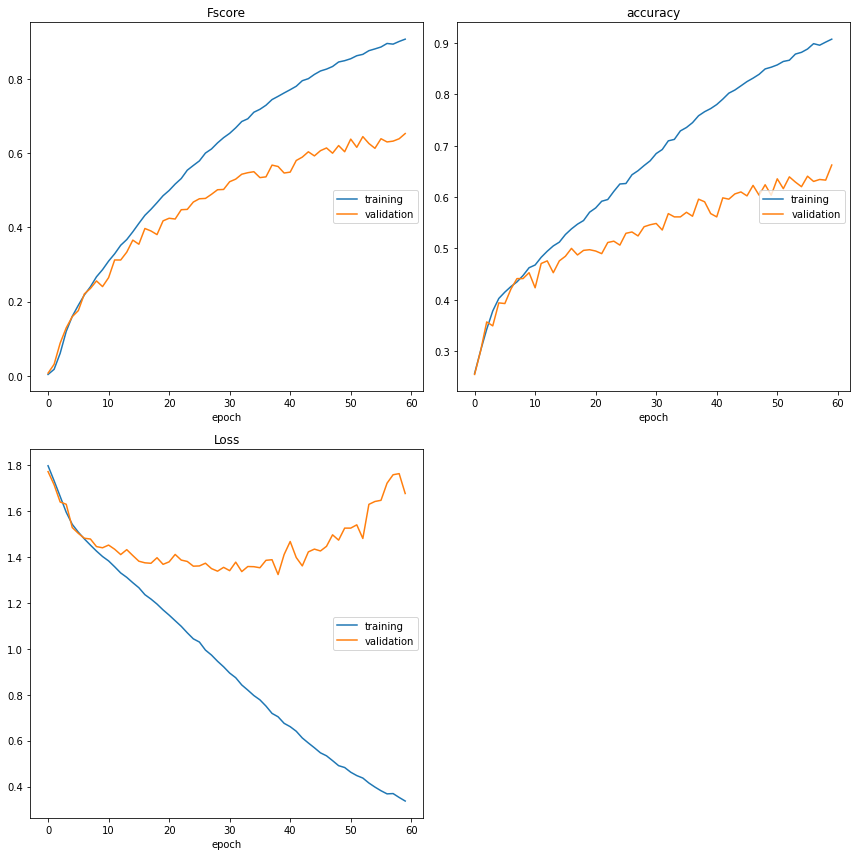

Fscore
	training         	 (min:    0.004, max:    0.907, cur:    0.907)
	validation       	 (min:    0.007, max:    0.653, cur:    0.653)
accuracy
	training         	 (min:    0.256, max:    0.908, cur:    0.908)
	validation       	 (min:    0.254, max:    0.662, cur:    0.662)
Loss
	training         	 (min:    0.337, max:    1.799, cur:    0.337)
	validation       	 (min:    1.324, max:    1.773, cur:    1.678)


In [ ]:
#Model training
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=50, batch_size=32,
                    callbacks=[PlotLossesKeras()])


70/70 [==============================] - 1s 11ms/step - loss: 0.3169 - accuracy: 0.9198 - Fscore: 0.9176
Accuracy on test data :  0.9198028445243835


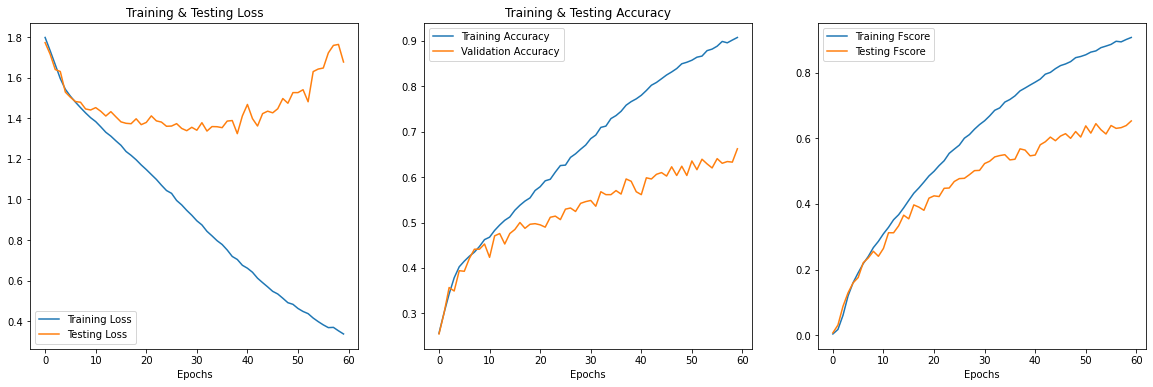

In [ ]:
print("Accuracy on test data : " , model.evaluate(X_test,y_test)[1])

fig , ax = plt.subplots(1,3)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']
fscore= history.history['Fscore']
fscore_test= history.history['val_Fscore']
fig.set_size_inches(20,6)
ax[0].plot(train_loss, label = 'Training Loss')
ax[0].plot(test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(train_acc, label = 'Training Accuracy')
ax[1].plot(test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")

ax[2].plot(fscore, label = 'Training Fscore')
ax[2].plot(fscore_test, label = 'Testing Fscore')
ax[2].legend()
ax[2].set_xlabel("Epochs")
plt.show()

In [ ]:
#Saving model onto drive
model_json = model.to_json()
with open("model3.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model3.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
!gsutil -q -m cp model3.h5 model3.json /content/drive/MyDrive/Last

In [ ]:
#extracting model from drive
from keras.models import model_from_json
json_file = open('/content/drive/MyDrive/Last/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("/content/drive/MyDrive/Last/model.h5")
opt = tf.keras.optimizers.Adam(learning_rate=0.00008)

loaded_model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy',Fscore])

**Confusion matrix**





In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_confusion_matrix(cm, classes,cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

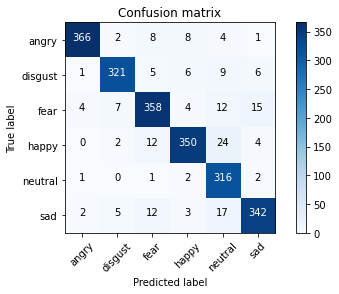

In [ ]:
# y_pred = model.predict(X_test,batch_size=32)
y_pred = model.predict(X_test,batch_size=32) #if loaded model
y_pred = np.argmax(y_pred, axis=1)
y_check = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true=y_check, y_pred=y_pred)
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']
plot_confusion_matrix(cm=cm, classes= emotions)